In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners = [
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
#    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20)
#    spreading_rate = normal_ci(0.5, 1.5, 20)
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)


By changing the coverage of school and work districts over the home districts we can make the disease spread faster or slower as desired .  
def setup_grid_layout(model, population_size,
        home_grid_height, home_grid_width,work_height,work_width, school_height, school_width):
    

Makes a grid of homogeneous home districts, overlaid by school and work districts.
    

home_grid_height is the number of home districts high the grid is, and
    

home_grid_width is the nmber of home districts wide the grid is
    

school height and work height are how many home districts high a school
    

district and work are respectively, and the same for their length.
    

each begins in grid 0,0 and cover the orignal home district grid.
    

Persons assigned to the home districts are also assigned to the school
    

and work districts that cover them. The parameters determine the amount
    

of leakage across groups of people.  With parameters (10,10,1,1,1,1), you get 100
    

completely separated districts with no leakage.  With parameters (6,6,2,2,3,3), illustrated below, you
    

get a grid where every one is connected to everyone else, but there is a
    

degree of separation.  For example, a person in home district (0,0) can be infected
    

by a person in (5,5) but it would be bridged by three infections, slowing the
    

virus down.  Larger sizes for work and school districts enable faster spread. Fastest
    

spread occurs with parameters (1,1,1,1,1,1) or equivalently (10,10, 10,10,10,10)
    

or any of the same number
    

Since this is just a way to allocate human interactions, no label is needed and
    

the grid need not be saved, for interactions to occur, although this informamtion
    

may be useful for visualizations. 


 


<img src="grids.jpg">

 Without locality, the defaults to multiple_run are :  home_grid_height = 1, home_grid_width = 1,work_height = 1, work_width =1, school_height=1, school_width=1.  


In [4]:
from platform import python_version

print(python_version())

3.6.8


Save these seeds if you want to rerun a scenario
[9675]
log initialized
Average similarity between family members is 0.9845310293271402 at temperature -1
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 no

Average similarity between workers is 0.757800304301087 at temperature -1
Average friend similarity for adults: 0.9730770997163198 for kids: 0.9825064561638469
run with seed 9675:
avg restaurant similarity 0.4274455154296355
avg restaurant similarity 0.35080502065057173
avg restaurant similarity 0.3544164936045453
avg restaurant similarity 0.39609609952202596
avg restaurant similarity 0.2469885173580384
avg restaurant similarity 0.24195970787703347
avg restaurant similarity 0.2326220041513517
avg restaurant similarity 0.2927177047046523
avg restaurant similarity 0.2632535657583936
avg restaurant similarity 0.18528665762001958
avg restaurant similarity 0.3704246136444872
avg restaurant similarity 0.2202103682889691
avg restaurant similarity 0.260393443805056
avg restaurant similarity 0.24150493639659182
avg restaurant similarity 0.2589388892255498
avg restaurant similarity 0.32142495408756766
avg restaurant similarity 0.4818650857569438
avg restaurant similarity 0.16904298717713964
avg 

avg restaurant similarity 0.2558461022551542
avg restaurant similarity 0.18529204115355472
avg restaurant similarity 0.24678033722289405
avg restaurant similarity 0.21191572303721237
avg restaurant similarity 0.34768194546792947
avg restaurant similarity 0.30965023848438417
avg restaurant similarity 0.20574090400327907
avg restaurant similarity 0.17877629260461
avg restaurant similarity 0.1840871837110174
avg restaurant similarity 0.24262536536806995
avg restaurant similarity 0.18048150914121383
avg restaurant similarity 0.18092993728169837
avg restaurant similarity 0.17362218389453313
avg restaurant similarity 0.17122383463975152
avg restaurant similarity 0.35334401170080815
avg restaurant similarity 0.2759204585645481
avg restaurant similarity 0.20455715797816532
avg restaurant similarity 0.04116992765619526
avg restaurant similarity 0.17947449278961333
avg restaurant similarity 0.39917471929408216
avg restaurant similarity 0.5163913041552329
avg restaurant similarity 0.3005347679735

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.7578444444444444]
min:
0.7578444444444444
max:
0.7578444444444444
std:
0.0
mean:
0.7578444444444444
median:
0.7578444444444444
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.024575]
min:
0.024575
max:
0.024575
std:
0.0
mean:
0.024575
median:
0.024575
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.1965638888888889]
min:
0.1965638888888889
max:
0.1965638888888889
std:
0.0
mean:
0.1965638888888889
median:
0.1965638888888889
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.004633333333333333]
min:
0.004633333333333333
max:
0.004633333333333333
std:
0.0
mean:
0.004633333333333333
median:
0.004633333333333333
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on icu:
data: [0.0011583333333333335]
min:
0.0011583333333333

(<function dict.items>, <function dict.items>, <function dict.items>)

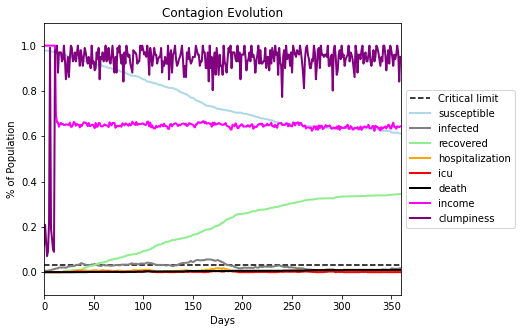

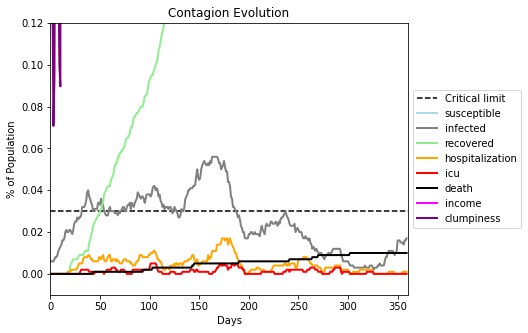

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)

Save these seeds if you want to rerun a scenario
[9675]
Max is 0.9832520772318784 but chosen is 0.9816000053316838 for temperature -0.999
Max is 0.9916621963340759 but chosen is 0.9835333097957343 for temperature -0.999
Max is 0.9919959161743589 but chosen is 0.9870518237775296 for temperature -0.999
Max is 0.9947576853611234 but chosen is 0.9908970074928712 for temperature -0.999
Max is 0.9937465021085714 but chosen is 0.9932096520085159 for temperature -0.999
Max is 0.9959943947778871 but chosen is 0.9946695234644872 for temperature -0.999
Max is 0.996591682538321 but chosen is 0.996223193130892 for temperature -0.999
Max is 0.9955574188911881 but chosen is 0.9953066003676265 for temperature -0.999
Max is 0.9945781482487874 but chosen is 0.9944707357044118 for temperature -0.999
Max is 0.9945189580306647 but chosen is 0.9936792437016725 for temperature -0.999
Max is 0.9910509052332981 but chosen is 0.9908905962988214 for temperature -0.999
Max is 0.998369773603538 but chosen is 0.996

Max is 0.995101777569561 but chosen is 0.9950507606320907 for temperature -0.999
Max is 0.9962647175104454 but chosen is 0.9945085776133922 for temperature -0.999
Max is 0.9946691402547981 but chosen is 0.9941179302626569 for temperature -0.999
Max is 0.9906938527778844 but chosen is 0.9900085992937411 for temperature -0.999
Max is 0.9869006389785651 but chosen is 0.9865968042659022 for temperature -0.999
Max is 0.9861090771132393 but chosen is 0.98477359514415 for temperature -0.999
Max is 0.9962391565603398 but chosen is 0.9921292952545637 for temperature -0.999
Max is 0.9971499527403026 but chosen is 0.9956211867627457 for temperature -0.999
Max is 0.9953764276398519 but chosen is 0.9943967214239329 for temperature -0.999
Max is 0.9869547558704689 but chosen is 0.9854959143645169 for temperature -0.999
Max is 0.9933613932144768 but chosen is 0.9920306946725318 for temperature -0.999
Max is 0.9887922648485571 but chosen is 0.9884567065975504 for temperature -0.999
Max is 0.9922427000

Max is 0.9874364424618363 but chosen is 0.9865288201863218 for temperature -0.999
Max is 0.9934617848514948 but chosen is 0.990418327957084 for temperature -0.999
Max is 0.9946849073687883 but chosen is 0.9927219456341314 for temperature -0.999
Max is 0.9941558141483815 but chosen is 0.9919510882726853 for temperature -0.999
Max is 0.996076324846358 but chosen is 0.9933341908421509 for temperature -0.999
Max is 0.9895685797178851 but chosen is 0.9851214037658377 for temperature -0.999
Max is 0.9781813633123525 but chosen is 0.9740610861705976 for temperature -0.999
Max is 0.9919213564083014 but chosen is 0.9915066543030983 for temperature -0.999
Max is 0.9945062206180889 but chosen is 0.9924615978463126 for temperature -0.999
Max is 0.9948740812240634 but chosen is 0.9904537171151605 for temperature -0.999
Max is 0.9919310413669972 but chosen is 0.9889492574511938 for temperature -0.999
Max is 0.984248294640648 but chosen is 0.9783682812811036 for temperature -0.999
Max is 0.9874107913

Max is 0.9963954427634674 but chosen is 0.9951677250029598 for temperature -0.999
Max is 0.9971343039843199 but chosen is 0.9956791770195184 for temperature -0.999
Max is 0.9965887973037358 but chosen is 0.9948591602712272 for temperature -0.999
Max is 0.9941557359612865 but chosen is 0.9939724012951734 for temperature -0.999
Max is 0.9957764752429167 but chosen is 0.9948706406037326 for temperature -0.999
Max is 0.995060309359512 but chosen is 0.9937730871982607 for temperature -0.999
Max is 0.9962725655022885 but chosen is 0.9953764930561909 for temperature -0.999
Max is 0.9898386906439834 but chosen is 0.989000968334826 for temperature -0.999
Max is 0.9946029324175119 but chosen is 0.9930506503428675 for temperature -0.999
Max is 0.99613486587755 but chosen is 0.99541406831981 for temperature -0.999
Max is 0.9964347577390412 but chosen is 0.9942386823163242 for temperature -0.999
Max is 0.9923264734224481 but chosen is 0.9877986297641068 for temperature -0.999
Max is 0.9957511501793

Max is 0.996353219997147 but chosen is 0.9963295112750626 for temperature -0.999
Max is 0.9963535082678375 but chosen is 0.9962321946788398 for temperature -0.999
Max is 0.995994413059552 but chosen is 0.9948940756807744 for temperature -0.999
Max is 0.9955903710696692 but chosen is 0.9953697533718332 for temperature -0.999
Max is 0.9962725655022885 but chosen is 0.9934231814817254 for temperature -0.999
Max is 0.9956524950057611 but chosen is 0.9954204878410312 for temperature -0.999
Max is 0.9977569844939326 but chosen is 0.9952408952218466 for temperature -0.999
Max is 0.9918823360302754 but chosen is 0.9911178428906953 for temperature -0.999
Max is 0.9944966505541801 but chosen is 0.9935618179750995 for temperature -0.999
Max is 0.9954140683198103 but chosen is 0.9942386823163242 for temperature -0.999
tup_vec1 not in keepset of size 38
Max is 0.9955749308331026 but chosen is 0.9953291581559127 for temperature -0.999
Max is 0.996442195802315 but chosen is 0.9943627343221553 for tem

Max is 0.9971343039843199 but chosen is 0.9963954427634674 for temperature -0.999
Max is 0.9936105256526855 but chosen is 0.9929141326188037 for temperature -0.999
Max is 0.9956709244767995 but chosen is 0.9947686539547449 for temperature -0.999
Max is 0.998369773603538 but chosen is 0.9969976117087985 for temperature -0.999
Max is 0.9957764752429167 but chosen is 0.9952352311467517 for temperature -0.999
Max is 0.9964715019557848 but chosen is 0.9963535082678375 for temperature -0.999
Max is 0.9962042776226355 but chosen is 0.995994413059552 for temperature -0.999
Max is 0.9939724012951734 but chosen is 0.9927562154385025 for temperature -0.999
Max is 0.9974547294093149 but chosen is 0.996591682538321 for temperature -0.999
Max is 0.9923264734224481 but chosen is 0.9915342556571606 for temperature -0.999
Max is 0.9962725655022885 but chosen is 0.9953764930561909 for temperature -0.999
tup_vec1 not in keepset of size 40
Max is 0.9977569844939326 but chosen is 0.9952408952218466 for tem

Max is 0.9928682328778252 but chosen is 0.9918018388565019 for temperature -0.999
Max is 0.9861188331034321 but chosen is 0.9828133623950647 for temperature -0.999
Max is 0.9937652416920554 but chosen is 0.9858990354901062 for temperature -0.999
Max is 0.9852620643817113 but chosen is 0.9851631222794729 for temperature -0.999
Max is 0.9929333883607305 but chosen is 0.9906415319596759 for temperature -0.999
Max is 0.9936788825296571 but chosen is 0.9932290807740186 for temperature -0.999
Max is 0.9922406848144203 but chosen is 0.9892484761876901 for temperature -0.999
Max is 0.9929336561753633 but chosen is 0.9912767786988023 for temperature -0.999
Max is 0.9876908466554835 but chosen is 0.9872936224846609 for temperature -0.999
Max is 0.9853997967008722 but chosen is 0.9822266471386109 for temperature -0.999
Max is 0.9846031067548192 but chosen is 0.9838693535577121 for temperature -0.999
Max is 0.9946979657494094 but chosen is 0.9871316632783721 for temperature -0.999
Max is 0.9919114

Max is 0.9908798214488322 but chosen is 0.9907576982871884 for temperature -0.999
Max is 0.9821775708208365 but chosen is 0.9815862305899905 for temperature -0.999
Max is 0.9837166015633467 but chosen is 0.9828133623950647 for temperature -0.999
tup_vec1 not in keepset of size 45
Max is 0.9841661718128628 but chosen is 0.9839562483578356 for temperature -0.999
Max is 0.9911278162160555 but chosen is 0.9892151787998495 for temperature -0.999
Max is 0.9880623409832937 but chosen is 0.9819772408813242 for temperature -0.999
Max is 0.9862350832519612 but chosen is 0.9858897711656965 for temperature -0.999
Max is 0.9868366607507294 but chosen is 0.985042886572716 for temperature -0.999
Max is 0.9869846628747525 but chosen is 0.9846031067548192 for temperature -0.999
Max is 0.984778669488585 but chosen is 0.979999972354827 for temperature -0.999
Max is 0.9773028348999603 but chosen is 0.9746379984774035 for temperature -0.999
Max is 0.9892212450671288 but chosen is 0.9890427513556376 for tem

Max is 0.9842478399008656 but chosen is 0.9795998543003968 for temperature -0.999
Max is 0.9923678137824522 but chosen is 0.9915529468026971 for temperature -0.999
tup_vec1 not in keepset of size 33
Max is 0.981729323038093 but chosen is 0.9758181015227323 for temperature -0.999
Max is 0.9705740799653607 but chosen is 0.9695168150766108 for temperature -0.999
Max is 0.9854945551082345 but chosen is 0.9757461473019209 for temperature -0.999
Max is 0.9749680654752354 but chosen is 0.9734513074796934 for temperature -0.999
Max is 0.9821100642340888 but chosen is 0.9782348657268053 for temperature -0.999
Max is 0.9779755158622013 but chosen is 0.9759455691998309 for temperature -0.999
Max is 0.9699852668518066 but chosen is 0.9665635707650955 for temperature -0.999
Max is 0.9764190819802958 but chosen is 0.9648357572945403 for temperature -0.999
Max is 0.9581802836205289 but chosen is 0.9561634423587028 for temperature -0.999
Max is 0.9621382517037221 but chosen is 0.9599446115856631 for t

Max is 0.989650609636957 but chosen is 0.9841552584349724 for temperature -0.999
tup_vec1 not in keepset of size 5
Max is 0.9613475940038428 but chosen is 0.9582485067486124 for temperature -0.999
Max is 0.9953066003676265 but chosen is 0.9945781482487874 for temperature -0.999
Max is 0.9946158926327333 but chosen is 0.9938836552571088 for temperature -0.999
Max is 0.994244390529569 but chosen is 0.9928004099064595 for temperature -0.999
Max is 0.9950635350569327 but chosen is 0.9945370328007597 for temperature -0.999
Max is 0.9947137963312456 but chosen is 0.9940908285723274 for temperature -0.999
Max is 0.9956542770504793 but chosen is 0.9914731030042456 for temperature -0.999
Max is 0.9913027221567723 but chosen is 0.9897299144170355 for temperature -0.999
Max is 0.9945128079438248 but chosen is 0.9929181032557142 for temperature -0.999
Max is 0.9917429596437435 but chosen is 0.9910383222536782 for temperature -0.999
Max is 0.9949740910305188 but chosen is 0.991129909142571 for temp

Max is 0.9906037283714556 but chosen is 0.9900516132653249 for temperature -0.999
Max is 0.9976415513237673 but chosen is 0.996124416801044 for temperature -0.999
Max is 0.9943974253124402 but chosen is 0.9942830913693216 for temperature -0.999
Max is 0.9933994589603047 but chosen is 0.9931622506330362 for temperature -0.999
Max is 0.9932947620614512 but chosen is 0.9918569850706144 for temperature -0.999
Max is 0.9946426891714901 but chosen is 0.9926925666926688 for temperature -0.999
Max is 0.9917756304312177 but chosen is 0.991274129519777 for temperature -0.999
Max is 0.9946056392744977 but chosen is 0.9945832132486518 for temperature -0.999
Max is 0.9939506540881591 but chosen is 0.993906389099316 for temperature -0.999
Max is 0.996090797186381 but chosen is 0.9943538793552584 for temperature -0.999
Max is 0.9947351443501258 but chosen is 0.9945370328007597 for temperature -0.999
Max is 0.997620876542213 but chosen is 0.9942975572023278 for temperature -0.999
Max is 0.994000213761

Max is 0.9960013277196096 but chosen is 0.9956785169976592 for temperature -0.999
Max is 0.9948175433197098 but chosen is 0.9934355875859616 for temperature -0.999
Max is 0.9963954427634674 but chosen is 0.9951677250029598 for temperature -0.999
Max is 0.9951443755479612 but chosen is 0.9936105256526855 for temperature -0.999
Max is 0.9977569844939326 but chosen is 0.9952408952218466 for temperature -0.999
Max is 0.9900900634311195 but chosen is 0.9898128549614379 for temperature -0.999
Max is 0.995825458457378 but chosen is 0.9950017243738705 for temperature -0.999
Max is 0.9973399712979367 but chosen is 0.9956791770195184 for temperature -0.999
Max is 0.9958374137568704 but chosen is 0.9951423841595295 for temperature -0.999
Max is 0.9937263819458917 but chosen is 0.9858741779911953 for temperature -0.999
Max is 0.9911410735169024 but chosen is 0.9868193744750141 for temperature -0.999
Max is 0.9973540804526791 but chosen is 0.9927701003875831 for temperature -0.999
Max is 0.99251559

Max is 0.9980260052404373 but chosen is 0.9978422495233421 for temperature -0.999
Max is 0.9961187456286481 but chosen is 0.995070181367051 for temperature -0.999
Max is 0.9931038430406064 but chosen is 0.992128934085837 for temperature -0.999
Max is 0.9967514261723833 but chosen is 0.9952408952218463 for temperature -0.999
Max is 0.9977569844939326 but chosen is 0.994985360671649 for temperature -0.999
Max is 0.9963351748330123 but chosen is 0.9954204878410312 for temperature -0.999
Max is 0.9913014318135064 but chosen is 0.9896420750648438 for temperature -0.999
Max is 0.9938065767026175 but chosen is 0.9913555516079835 for temperature -0.999
Max is 0.996442195802315 but chosen is 0.9943627343221553 for temperature -0.999
tup_vec1 not in keepset of size 43
Max is 0.9934786293151981 but chosen is 0.9927701003875831 for temperature -0.999
Max is 0.9973540804526791 but chosen is 0.9963294093282911 for temperature -0.999
Max is 0.9962321946788398 but chosen is 0.9938220206327258 for temp

Max is 0.9960013277196096 but chosen is 0.9956785169976592 for temperature -0.999
tup_vec1 not in keepset of size 59
Max is 0.998369773603538 but chosen is 0.9969462806191836 for temperature -0.999
Max is 0.9964469798918693 but chosen is 0.9961503450515949 for temperature -0.999
Max is 0.9951423841595295 but chosen is 0.9949147488784135 for temperature -0.999
Max is 0.99722848115783 but chosen is 0.9956266432380156 for temperature -0.999
Max is 0.9931038430406064 but chosen is 0.9917583420080963 for temperature -0.999
Max is 0.9942095553770601 but chosen is 0.9915351475854458 for temperature -0.999
Max is 0.9935618179750995 but chosen is 0.9907207956410634 for temperature -0.999
Max is 0.99613486587755 but chosen is 0.9923969311831962 for temperature -0.999
Max is 0.9945567124405507 but chosen is 0.9932710873994571 for temperature -0.999
tup_vec1 not in keepset of size 40
Max is 0.9936105256526855 but chosen is 0.9926460293487703 for temperature -0.999
Max is 0.9903263434915943 but cho

Max is 0.990341102935385 but chosen is 0.9890594056785429 for temperature -0.999
Max is 0.9858897711656965 but chosen is 0.9847060744285521 for temperature -0.999
Max is 0.9906316393041664 but chosen is 0.9897622324482244 for temperature -0.999
Max is 0.9862353071781063 but chosen is 0.9805823268165476 for temperature -0.999
Max is 0.9892151787998495 but chosen is 0.9819772408813242 for temperature -0.999
Max is 0.9862350832519612 but chosen is 0.9856248825278797 for temperature -0.999
Max is 0.9816061018676884 but chosen is 0.9776059563996671 for temperature -0.999
Max is 0.9837166015633467 but chosen is 0.9815862305899905 for temperature -0.999
Max is 0.9821775708208365 but chosen is 0.981270619271938 for temperature -0.999
Max is 0.9911278162160555 but chosen is 0.9880089776226827 for temperature -0.999
Max is 0.9859379806968779 but chosen is 0.984982068492187 for temperature -0.999
Max is 0.9932957632492619 but chosen is 0.9876621312873787 for temperature -0.999
Max is 0.9905142425

Max is 0.9894629748951991 but chosen is 0.9875925073124309 for temperature -0.999
tup_vec1 not in keepset of size 41
Max is 0.9883956762866313 but chosen is 0.9876908466554835 for temperature -0.999
Max is 0.9906316393041664 but chosen is 0.9874918281693991 for temperature -0.999
Max is 0.9919310413669974 but chosen is 0.9872549191239608 for temperature -0.999
Max is 0.9867494426583121 but chosen is 0.9848925111133359 for temperature -0.999
Max is 0.984778669488585 but chosen is 0.9783269703371129 for temperature -0.999
Max is 0.9821038002040877 but chosen is 0.9791188641844017 for temperature -0.999
Max is 0.9640727678796023 but chosen is 0.9636272437313504 for temperature -0.999
Max is 0.9861188331034321 but chosen is 0.9837166015633467 for temperature -0.999
Max is 0.9735565724831956 but chosen is 0.9734273242516521 for temperature -0.999
Max is 0.9900085992937411 but chosen is 0.9898622948609774 for temperature -0.999
Max is 0.9906938527778844 but chosen is 0.9897216699602183 for t

Max is 0.9762337205034817 but chosen is 0.9615738049145485 for temperature -0.999
Max is 0.9816000053316838 but chosen is 0.9785199114130317 for temperature -0.999
Max is 0.9714440313047255 but chosen is 0.9672418276239054 for temperature -0.999
Max is 0.9789828060473228 but chosen is 0.9769287729756281 for temperature -0.999
tup_vec1 not in keepset of size 14
Max is 0.9895680365452056 but chosen is 0.9759819688250978 for temperature -0.999
Max is 0.9627584599097656 but chosen is 0.9504917520366889 for temperature -0.999
Max is 0.970280368816925 but chosen is 0.9607667050077593 for temperature -0.999
Max is 0.9605532726048673 but chosen is 0.9559442755778215 for temperature -0.999
Max is 0.976642058251901 but chosen is 0.9581013022991185 for temperature -0.999
Max is 0.9783208469290721 but chosen is 0.965752878671398 for temperature -0.999
Max is 0.9659259554750987 but chosen is 0.958190115677286 for temperature -0.999
Max is 0.9648357572945405 but chosen is 0.957256216497099 for tempe

Max is 0.991037459560194 but chosen is 0.9904915393693984 for temperature -0.999
Max is 0.9944480700031826 but chosen is 0.9943974253124402 for temperature -0.999
Max is 0.9945832132486518 but chosen is 0.9939506540881591 for temperature -0.999
Max is 0.9924341055659547 but chosen is 0.9918328392164895 for temperature -0.999
Max is 0.9887076580243525 but chosen is 0.9882351733386006 for temperature -0.999
Max is 0.9946056392744977 but chosen is 0.9930321844320587 for temperature -0.999
Max is 0.996090797186381 but chosen is 0.9951688191393497 for temperature -0.999
Max is 0.9972406974966297 but chosen is 0.9951281828437492 for temperature -0.999
Max is 0.9952143231012782 but chosen is 0.9944707357044118 for temperature -0.999
Max is 0.9949740910305188 but chosen is 0.9946525518144579 for temperature -0.999
Max is 0.9938326003295974 but chosen is 0.9930762278057143 for temperature -0.999
Max is 0.9890795836815742 but chosen is 0.988920733210523 for temperature -0.999
Max is 0.9923741329

Max is 0.9939003239931483 but chosen is 0.9929682277536379 for temperature -0.999
Max is 0.9950635350569327 but chosen is 0.9947351443501258 for temperature -0.999
Max is 0.9935594359375954 but chosen is 0.9928004099064595 for temperature -0.999
Max is 0.9945319001617692 but chosen is 0.994244390529569 for temperature -0.999
Max is 0.9938597666078607 but chosen is 0.9905802369409709 for temperature -0.999
Max is 0.9923274026601582 but chosen is 0.9908922362247797 for temperature -0.999
Max is 0.9973244109694556 but chosen is 0.9942549615311325 for temperature -0.999
Max is 0.997620876542213 but chosen is 0.9947137963312456 for temperature -0.999
Max is 0.9940002137615621 but chosen is 0.9891663689361381 for temperature -0.999
Max is 0.9956542770504793 but chosen is 0.9914731030042456 for temperature -0.999
Max is 0.9897299144170355 but chosen is 0.9894690087066551 for temperature -0.999
Max is 0.9966484951633364 but chosen is 0.9924491749102903 for temperature -0.999
Max is 0.987318438

Max is 0.9935510044382646 but chosen is 0.9910133728260897 for temperature -0.999
Max is 0.9962985868605885 but chosen is 0.9955611181883085 for temperature -0.999
Max is 0.9943393484040702 but chosen is 0.9928098803601891 for temperature -0.999
Max is 0.9950422184669684 but chosen is 0.9914578330037606 for temperature -0.999
Max is 0.9941896915858442 but chosen is 0.9918006629919717 for temperature -0.999
Max is 0.9931276942239109 but chosen is 0.9902974975788147 for temperature -0.999
Max is 0.9913419871604612 but chosen is 0.9888099715768932 for temperature -0.999
Max is 0.9895020554165405 but chosen is 0.9878110282792423 for temperature -0.999
Max is 0.9927323770135984 but chosen is 0.9924306750140947 for temperature -0.999
Max is 0.9946353558352614 but chosen is 0.9936884707511013 for temperature -0.999
Max is 0.9934280722761841 but chosen is 0.9926537840221915 for temperature -0.999
Max is 0.995141743897474 but chosen is 0.9938854852423262 for temperature -0.999
Max is 0.98813274

Max is 0.9978819337736007 but chosen is 0.9929460094602884 for temperature -0.999
Max is 0.9953783626985587 but chosen is 0.9945796841476044 for temperature -0.999
Max is 0.9931276942239109 but chosen is 0.9928723569135699 for temperature -0.999
Max is 0.9934328268786647 but chosen is 0.9882277246395527 for temperature -0.999
Max is 0.9919213564083014 but chosen is 0.9915066543030983 for temperature -0.999
tup_vec1 not in keepset of size 43
Max is 0.9946226604034515 but chosen is 0.9942633365508863 for temperature -0.999
Max is 0.9917504166948532 but chosen is 0.990382439219111 for temperature -0.999
Max is 0.9881327416059079 but chosen is 0.987291568423161 for temperature -0.999
Max is 0.9890545270250769 but chosen is 0.9874145103127073 for temperature -0.999
Max is 0.9858656169187694 but chosen is 0.985037890657612 for temperature -0.999
Max is 0.9913419871604612 but chosen is 0.9888099715768932 for temperature -0.999
Max is 0.9934115610500396 but chosen is 0.9899026323082732 for tem

Max is 0.9955581655889615 but chosen is 0.9942101441913894 for temperature -0.999
Max is 0.9950422184669682 but chosen is 0.9942562901111965 for temperature -0.999
Max is 0.9835439118120347 but chosen is 0.9831063259525175 for temperature -0.999
Max is 0.9899498133800134 but chosen is 0.9853912425038293 for temperature -0.999
Max is 0.9940054939737565 but chosen is 0.9937040078862007 for temperature -0.999
tup_vec1 not in keepset of size 41
Max is 0.988172867433715 but chosen is 0.9869127709026121 for temperature -0.999
Max is 0.9914040071715324 but chosen is 0.9903655690752798 for temperature -0.999
Max is 0.9928521673885186 but chosen is 0.9835319749390042 for temperature -0.999
Max is 0.9927213910538143 but chosen is 0.9908215066346768 for temperature -0.999
Max is 0.9873411186933668 but chosen is 0.9870602202011338 for temperature -0.999
Max is 0.9930386508751394 but chosen is 0.990075845176934 for temperature -0.999
Max is 0.9915066543030983 but chosen is 0.9900640415467156 for te

Max is 0.991729779065474 but chosen is 0.9879577212477323 for temperature -0.999
Max is 0.983697585636058 but chosen is 0.982393960086642 for temperature -0.999
Max is 0.9909955949411309 but chosen is 0.9908438697924233 for temperature -0.999
Max is 0.9901480468259971 but chosen is 0.9887360101997343 for temperature -0.999
Max is 0.9932437920605732 but chosen is 0.9923483780850909 for temperature -0.999
Max is 0.9855136046434716 but chosen is 0.9848444920810151 for temperature -0.999
Max is 0.9743149476172214 but chosen is 0.9720901548559399 for temperature -0.999
Max is 0.9931702300320959 but chosen is 0.9798710374054483 for temperature -0.999
Max is 0.9904831266531304 but chosen is 0.9619619585851256 for temperature -0.999
Max is 0.9728254195711907 but chosen is 0.9695175739601096 for temperature -0.999
Max is 0.9691849425502491 but chosen is 0.9681378651621328 for temperature -0.999
Max is 0.9697833956679162 but chosen is 0.9654277995629206 for temperature -0.999
Max is 0.9923867819

Max is 0.9938558479118829 but chosen is 0.9935574768117341 for temperature -0.999
Max is 0.9978550690118929 but chosen is 0.9946849073687883 for temperature -0.999
Max is 0.9953702487184606 but chosen is 0.9935842528198503 for temperature -0.999
Max is 0.9971499527403025 but chosen is 0.9953764276398517 for temperature -0.999
Max is 0.9982554966829702 but chosen is 0.9951313351241581 for temperature -0.999
Max is 0.9914079535197396 but chosen is 0.9877351734778043 for temperature -0.999
tup_vec1 not in keepset of size 63
Max is 0.9928082633148195 but chosen is 0.9927572388236096 for temperature -0.999
Max is 0.9939854764859511 but chosen is 0.9939790478226236 for temperature -0.999
Max is 0.9946124001377068 but chosen is 0.9934961514382705 for temperature -0.999
Max is 0.992670363894806 but chosen is 0.992195654609046 for temperature -0.999
Max is 0.9953274346816732 but chosen is 0.9922547106375329 for temperature -0.999
Max is 0.9912191682644506 but chosen is 0.9910711182658464 for te

Max is 0.9972161023986661 but chosen is 0.9951624308396444 for temperature -0.999
Max is 0.9967349541873306 but chosen is 0.995979522961758 for temperature -0.999
Max is 0.994371247612934 but chosen is 0.9942543883699256 for temperature -0.999
Max is 0.9934033436889751 but chosen is 0.992670363894806 for temperature -0.999
tup_vec1 not in keepset of size 59
Max is 0.9939360354205492 but chosen is 0.993225491142716 for temperature -0.999
Max is 0.9982554966829703 but chosen is 0.9956211867627459 for temperature -0.999
Max is 0.9970220663065847 but chosen is 0.9953764276398517 for temperature -0.999
Max is 0.998057098620504 but chosen is 0.9953396258874532 for temperature -0.999
Max is 0.9934617848514948 but chosen is 0.9925544681387993 for temperature -0.999
Max is 0.9958853875756227 but chosen is 0.9942629315868459 for temperature -0.999
Max is 0.9870378035816575 but chosen is 0.9865325301572351 for temperature -0.999
Max is 0.995645202190526 but chosen is 0.9951711104966153 for temper

Max is 0.990318586167211 but chosen is 0.9885990521975482 for temperature -0.999
Max is 0.9914655549209841 but chosen is 0.9878623724465518 for temperature -0.999
Max is 0.9848956687334247 but chosen is 0.9839337623177462 for temperature -0.999
Max is 0.9933613932144768 but chosen is 0.9920306946725318 for temperature -0.999
Max is 0.9849127118529795 but chosen is 0.9848567348142846 for temperature -0.999
Max is 0.9881817030682135 but chosen is 0.9812474144229105 for temperature -0.999
Max is 0.9923675769851794 but chosen is 0.9850666201538445 for temperature -0.999
Max is 0.9916303388621733 but chosen is 0.9908437394772043 for temperature -0.999
Max is 0.9906063962841843 but chosen is 0.9879516090023309 for temperature -0.999
Max is 0.9974303871971741 but chosen is 0.9919542435130416 for temperature -0.999
Max is 0.9854056707983009 but chosen is 0.9803813958560769 for temperature -0.999
Max is 0.979995664344694 but chosen is 0.9787887706929425 for temperature -0.999
Max is 0.985082078

Max is 0.9865105900293075 but chosen is 0.983282524921806 for temperature -0.999
Max is 0.9895970402490343 but chosen is 0.9877392917249295 for temperature -0.999
Max is 0.990318586167211 but chosen is 0.986962285981134 for temperature -0.999
Max is 0.9887582223957211 but chosen is 0.9861679880626273 for temperature -0.999
Max is 0.9954008288921341 but chosen is 0.9941331999628735 for temperature -0.999
Max is 0.9969886069276661 but chosen is 0.9967835442635911 for temperature -0.999
Max is 0.9965658844881623 but chosen is 0.9955258488926861 for temperature -0.999
Max is 0.9967179811921223 but chosen is 0.9963378416925325 for temperature -0.999
Max is 0.9965365459565032 but chosen is 0.9946713042095946 for temperature -0.999
Max is 0.9928428784889521 but chosen is 0.9914539531262148 for temperature -0.999
Max is 0.9936224827167571 but chosen is 0.9920680052673453 for temperature -0.999
Max is 0.9947886551267926 but chosen is 0.9900859600885736 for temperature -0.999
Max is 0.9905371681

Max is 0.9842068428716263 but chosen is 0.9829682902205727 for temperature -0.999
Max is 0.9856777175526766 but chosen is 0.9790575993678136 for temperature -0.999
Max is 0.9799779097664939 but chosen is 0.9759659795178081 for temperature -0.999
Max is 0.9860226562500048 but chosen is 0.980549985526148 for temperature -0.999
Max is 0.9937198736963532 but chosen is 0.9928428784889525 for temperature -0.999
Max is 0.9924887940484394 but chosen is 0.9914539531262148 for temperature -0.999
Max is 0.9968714684812539 but chosen is 0.9963454161338089 for temperature -0.999
Max is 0.9932253526469081 but chosen is 0.9931206727476195 for temperature -0.999
Max is 0.9936037128115563 but chosen is 0.9917254501253169 for temperature -0.999
Max is 0.9961164390949627 but chosen is 0.995521693468703 for temperature -0.999
Max is 0.9967179811921223 but chosen is 0.9957029053135954 for temperature -0.999
Max is 0.9965658844881623 but chosen is 0.9962985868605885 for temperature -0.999
Max is 0.995725825

Max is 0.9951272506481531 but chosen is 0.9946713042095946 for temperature -0.999
Max is 0.9961164390949627 but chosen is 0.995521693468703 for temperature -0.999
Max is 0.9908288002282875 but chosen is 0.9868222396385178 for temperature -0.999
Max is 0.9930386508751394 but chosen is 0.9913419871604612 for temperature -0.999
Max is 0.989853387364364 but chosen is 0.989361604808786 for temperature -0.999
Max is 0.9928814144246325 but chosen is 0.9902685922434739 for temperature -0.999
Max is 0.9941549873794365 but chosen is 0.9939023908850971 for temperature -0.999
Max is 0.9949476616613584 but chosen is 0.9944415753805643 for temperature -0.999
Max is 0.997172598250379 but chosen is 0.9955581655889615 for temperature -0.999
Max is 0.9919213564083014 but chosen is 0.9915066543030983 for temperature -0.999
Max is 0.9955860437128861 but chosen is 0.9920680052673453 for temperature -0.999
Max is 0.9954008288921341 but chosen is 0.9936224827167571 for temperature -0.999
Max is 0.99169646111

Max is 0.9961164390949627 but chosen is 0.9955258488926861 for temperature -0.999
Max is 0.9933025376242772 but chosen is 0.9929931880599506 for temperature -0.999
Max is 0.9963454161338089 but chosen is 0.9932253526469081 for temperature -0.999
Max is 0.9946713042095946 but chosen is 0.9930533091244188 for temperature -0.999
Max is 0.9907907256440435 but chosen is 0.9895020554165406 for temperature -0.999
Max is 0.9878110282792423 but chosen is 0.987291568423161 for temperature -0.999
Max is 0.9917504166948532 but chosen is 0.9911747625372004 for temperature -0.999
Max is 0.9947227761190711 but chosen is 0.9936198255419028 for temperature -0.999
Max is 0.9941896915858442 but chosen is 0.9902685922434739 for temperature -0.999
Max is 0.9913419871604612 but chosen is 0.9888099715768932 for temperature -0.999
Max is 0.9934115610500396 but chosen is 0.9900640415467156 for temperature -0.999
Max is 0.9955860437128863 but chosen is 0.9947886551267926 for temperature -0.999
Max is 0.98850674

Max is 0.9783649045439168 but chosen is 0.9603148856648649 for temperature -0.999
Max is 0.9777734783942434 but chosen is 0.9728254195711905 for temperature -0.999
Max is 0.9908302733932766 but chosen is 0.9879750215334411 for temperature -0.999
tup_vec1 not in keepset of size 81
Max is 0.9957226953043748 but chosen is 0.9942892038001274 for temperature -0.999
Max is 0.9966567867444266 but chosen is 0.9925779513361402 for temperature -0.999
Max is 0.9942492640376953 but chosen is 0.9938589125560198 for temperature -0.999
Max is 0.9925806015198635 but chosen is 0.9911075594906661 for temperature -0.999
Max is 0.9950507606320907 but chosen is 0.9950419351003907 for temperature -0.999
Max is 0.9910267412373465 but chosen is 0.9907694377357331 for temperature -0.999
Max is 0.9958379323001916 but chosen is 0.9952235481788836 for temperature -0.999
Max is 0.9954594673100413 but chosen is 0.9953859590844178 for temperature -0.999
Max is 0.9948498962292762 but chosen is 0.9946493393369066 for 

Max is 0.9939790478226236 but chosen is 0.9937880993191377 for temperature -0.999
Max is 0.9967349541873306 but chosen is 0.995979522961758 for temperature -0.999
Max is 0.9942543883699256 but chosen is 0.9939341293277156 for temperature -0.999
Max is 0.9943933707855405 but chosen is 0.9928889574603379 for temperature -0.999
Max is 0.99719976245383 but chosen is 0.9951624308396444 for temperature -0.999
Max is 0.9972161023986661 but chosen is 0.997215742658296 for temperature -0.999
Max is 0.9960277025725212 but chosen is 0.995303551788011 for temperature -0.999
Max is 0.9938558479118829 but chosen is 0.9935574768117341 for temperature -0.999
Max is 0.9978550690118929 but chosen is 0.9946849073687883 for temperature -0.999
Max is 0.9927219456341314 but chosen is 0.9923181823969544 for temperature -0.999
Max is 0.9908052186191141 but chosen is 0.9897803930778746 for temperature -0.999
Max is 0.9972501084819452 but chosen is 0.9949187188849621 for temperature -0.999
Max is 0.997149952740

tup_vec1 not in keepset of size 63
Max is 0.9869907351521203 but chosen is 0.9858004176058892 for temperature -0.999
Max is 0.9923675769851794 but chosen is 0.9874388957341155 for temperature -0.999
Max is 0.9930756121479639 but chosen is 0.9908970074928712 for temperature -0.999
Max is 0.9947576853611234 but chosen is 0.9900945524464194 for temperature -0.999
Max is 0.9954640904036111 but chosen is 0.9948429237697551 for temperature -0.999
Max is 0.9959961904917587 but chosen is 0.9926710372909744 for temperature -0.999
Max is 0.9909571173820084 but chosen is 0.9885713408868948 for temperature -0.999
Max is 0.997430387197174 but chosen is 0.9930893616058522 for temperature -0.999
Max is 0.9933859256747668 but chosen is 0.9911369271781075 for temperature -0.999
Max is 0.989562691591136 but chosen is 0.9874152752455087 for temperature -0.999
tup_vec1 not in keepset of size 44
Max is 0.9959347623680623 but chosen is 0.9927080261568534 for temperature -0.999
Max is 0.9923009517652852 but 

Max is 0.99366974656809 but chosen is 0.9917647966813735 for temperature -0.999
Max is 0.9954679395950853 but chosen is 0.9926632212589765 for temperature -0.999
Max is 0.9933545113247484 but chosen is 0.9883284049479518 for temperature -0.999
Max is 0.9861118895741653 but chosen is 0.9858004176058893 for temperature -0.999
Max is 0.9975044834711905 but chosen is 0.9870069481786118 for temperature -0.999
Max is 0.9865316403817047 but chosen is 0.9850011959308165 for temperature -0.999
Max is 0.9911740191760926 but chosen is 0.9844064545689282 for temperature -0.999
Max is 0.9896790331993183 but chosen is 0.9895123332682068 for temperature -0.999
Max is 0.989312004625562 but chosen is 0.9890146898661137 for temperature -0.999
Max is 0.9802566391309879 but chosen is 0.9753989097005714 for temperature -0.999
Max is 0.9887922648485571 but chosen is 0.9848567348142846 for temperature -0.999
Max is 0.9919959161743589 but chosen is 0.9796402154962695 for temperature -0.999
Max is 0.9804094837

Max is 0.9965017713297106 but chosen is 0.9964763740656791 for temperature -0.999
Max is 0.9967399662154972 but chosen is 0.995544729143527 for temperature -0.999
Max is 0.9928300738972874 but chosen is 0.9925216027256453 for temperature -0.999
Max is 0.990962780007231 but chosen is 0.9907876553736874 for temperature -0.999
Max is 0.9933573538163819 but chosen is 0.9921146662376319 for temperature -0.999
tup_vec1 not in keepset of size 30
Max is 0.9921221031163907 but chosen is 0.9917940358529876 for temperature -0.999
Max is 0.9956033149070209 but chosen is 0.9937890315772214 for temperature -0.999
Max is 0.9897457017732181 but chosen is 0.9891932004791079 for temperature -0.999
Max is 0.9873723206206628 but chosen is 0.9856616394258272 for temperature -0.999
Max is 0.9882169618754462 but chosen is 0.9871395730088753 for temperature -0.999
Max is 0.9832995996676329 but chosen is 0.9812970390300758 for temperature -0.999
Max is 0.9944382857839332 but chosen is 0.9901407481907779 for te

Max is 0.9960421465826119 but chosen is 0.988960372445933 for temperature -0.999
Max is 0.9937529383365565 but chosen is 0.991588085167729 for temperature -0.999
Max is 0.9961844775777343 but chosen is 0.9919293290956485 for temperature -0.999
Max is 0.991131962772719 but chosen is 0.9876666350302112 for temperature -0.999
Max is 0.9929087046254484 but chosen is 0.9920544450829263 for temperature -0.999
Max is 0.9909450417345302 but chosen is 0.9901530819809427 for temperature -0.999
Max is 0.9918805335135112 but chosen is 0.9882169618754462 for temperature -0.999
Max is 0.9875661135792504 but chosen is 0.986579134973913 for temperature -0.999
Max is 0.997559722955745 but chosen is 0.9970638611207661 for temperature -0.999
Max is 0.9953716335981927 but chosen is 0.9945562407804641 for temperature -0.999
Max is 0.9974969866494328 but chosen is 0.9962551078127495 for temperature -0.999
Max is 0.9961844775777343 but chosen is 0.9953801462925401 for temperature -0.999
Max is 0.992901660643

Max is 0.9916229921111644 but chosen is 0.9893243808675617 for temperature -0.999
Max is 0.9928300738972874 but chosen is 0.9909876466216818 for temperature -0.999
Max is 0.992586889441207 but chosen is 0.9881777000004719 for temperature -0.999
Max is 0.9889368478999204 but chosen is 0.9832012961633412 for temperature -0.999
Max is 0.9892764195619582 but chosen is 0.988076136166152 for temperature -0.999
tup_vec1 not in keepset of size 14
Max is 0.9920564417987754 but chosen is 0.9897461361105161 for temperature -0.999
Max is 0.9921331464918632 but chosen is 0.9822994075349366 for temperature -0.999
Max is 0.9875661135792504 but chosen is 0.9788831414713445 for temperature -0.999
Max is 0.9863630053403131 but chosen is 0.9860906973500523 for temperature -0.999
Max is 0.981716847370264 but chosen is 0.979740273773705 for temperature -0.999
Max is 0.9865791349739133 but chosen is 0.9821974998222587 for temperature -0.999
Max is 0.9843455586111914 but chosen is 0.9484550330871077 for temp

Max is 0.9860070714841148 but chosen is 0.9802737545299048 for temperature -0.999
Max is 0.9941168491355479 but chosen is 0.9930892230234966 for temperature -0.999
Max is 0.9929449112190436 but chosen is 0.9909521830359966 for temperature -0.999
Max is 0.9928677189982344 but chosen is 0.9924099837198321 for temperature -0.999
Max is 0.994402247461742 but chosen is 0.9919326762942872 for temperature -0.999
Max is 0.9932817140857968 but chosen is 0.9924643868206865 for temperature -0.999
Max is 0.9943814385858064 but chosen is 0.99362094246992 for temperature -0.999
Max is 0.997321934539439 but chosen is 0.9951065762191886 for temperature -0.999
Max is 0.9901940928138391 but chosen is 0.9880111135650305 for temperature -0.999
Max is 0.9935951943082366 but chosen is 0.9915044918115176 for temperature -0.999
Max is 0.9935617005855609 but chosen is 0.9922464631829839 for temperature -0.999
Max is 0.9927627493655043 but chosen is 0.9922295664338268 for temperature -0.999
Max is 0.99488535693

Max is 0.9966097019325327 but chosen is 0.995470871168151 for temperature -0.999
Max is 0.9947113630573097 but chosen is 0.9943299558534567 for temperature -0.999
Max is 0.9963811336626899 but chosen is 0.9928677189982344 for temperature -0.999
Max is 0.9943824847582465 but chosen is 0.9924099837198321 for temperature -0.999
Max is 0.9905568854936988 but chosen is 0.9888935671989646 for temperature -0.999
Max is 0.990964296107266 but chosen is 0.9901940928138391 for temperature -0.999
Max is 0.9944937846931224 but chosen is 0.9885058362443296 for temperature -0.999
Max is 0.9914792656578697 but chosen is 0.9905031846963643 for temperature -0.999
Max is 0.9910921878867645 but chosen is 0.9894706048038835 for temperature -0.999
Max is 0.9876288225128464 but chosen is 0.9847943089901887 for temperature -0.999
Max is 0.9920772835524423 but chosen is 0.9900125071350716 for temperature -0.999
Max is 0.9896421415495479 but chosen is 0.9863685632625029 for temperature -0.999
Max is 0.993327758

Max is 0.9918581165110765 but chosen is 0.9905097573312691 for temperature -0.999
Max is 0.9963735463202018 but chosen is 0.9948919213375103 for temperature -0.999
Max is 0.9961024032105882 but chosen is 0.9951827414793837 for temperature -0.999
Max is 0.9910862077368091 but chosen is 0.9896509059703268 for temperature -0.999
Max is 0.9951476906411952 but chosen is 0.994118666613051 for temperature -0.999
Max is 0.9951921817768755 but chosen is 0.9930918904706876 for temperature -0.999
Max is 0.990647907035159 but chosen is 0.98817086039231 for temperature -0.999
Max is 0.9959801666134683 but chosen is 0.9929344761859012 for temperature -0.999
Max is 0.9968702993492314 but chosen is 0.9956311237737031 for temperature -0.999
Max is 0.9923652724231915 but chosen is 0.9922400735275568 for temperature -0.999
Max is 0.9928781602928141 but chosen is 0.9902018176746274 for temperature -0.999
Max is 0.991330878414994 but chosen is 0.9889564838503614 for temperature -0.999
Max is 0.991145058216

Max is 0.9950317271075493 but chosen is 0.9944697558849936 for temperature -0.999
Max is 0.9910758296431788 but chosen is 0.9899374049566768 for temperature -0.999
Max is 0.99304114535765 but chosen is 0.9924525412255742 for temperature -0.999
Max is 0.9944483974438315 but chosen is 0.9933009178784484 for temperature -0.999
Max is 0.9937883242239494 but chosen is 0.992032513771224 for temperature -0.999
Max is 0.993869638135821 but chosen is 0.99045651396898 for temperature -0.999
tup_vec1 not in keepset of size 43
Max is 0.99417864128316 but chosen is 0.9929247643353533 for temperature -0.999
Max is 0.9954252019215128 but chosen is 0.9946496922821099 for temperature -0.999
Max is 0.9937923855077997 but chosen is 0.9917201793708095 for temperature -0.999
Max is 0.9908905962988214 but chosen is 0.9856997065002466 for temperature -0.999
Max is 0.986727144506541 but chosen is 0.9867205291319167 for temperature -0.999
Max is 0.9943274516922048 but chosen is 0.991801858436941 for temperatur

Max is 0.9938779342599566 but chosen is 0.9917797304860577 for temperature -0.999
Max is 0.9943274516922049 but chosen is 0.9930917248519219 for temperature -0.999
Max is 0.9909038336062115 but chosen is 0.9902640077651143 for temperature -0.999
Max is 0.9936792437016725 but chosen is 0.9934401495740842 for temperature -0.999
Max is 0.9869092133163117 but chosen is 0.9864636277900646 for temperature -0.999
Max is 0.9934351437811778 but chosen is 0.9933643985129501 for temperature -0.999
Max is 0.9948745776632693 but chosen is 0.9913221818651363 for temperature -0.999
Max is 0.9900190411838061 but chosen is 0.9882799377563141 for temperature -0.999
Max is 0.9923464486306804 but chosen is 0.9909430708605497 for temperature -0.999
Max is 0.9943145490741795 but chosen is 0.9937541988119272 for temperature -0.999
Max is 0.9923607173745183 but chosen is 0.9921518265908263 for temperature -0.999
Max is 0.9954252019215128 but chosen is 0.9950015389571666 for temperature -0.999
Max is 0.9954533

Max is 0.9931276942239109 but chosen is 0.9911980670258881 for temperature -0.999
Max is 0.9949476616613584 but chosen is 0.9948855734374229 for temperature -0.999
Max is 0.9955258488926861 but chosen is 0.9922683083603022 for temperature -0.999
Max is 0.9935510044382646 but chosen is 0.9910577819646857 for temperature -0.999
Max is 0.9963454161338089 but chosen is 0.9940645350493335 for temperature -0.999
Max is 0.9968714684812539 but chosen is 0.9921966774694708 for temperature -0.999
Max is 0.9950422184669682 but chosen is 0.9942562901111965 for temperature -0.999
Max is 0.9928428784889521 but chosen is 0.9923834077533188 for temperature -0.999
Max is 0.997172598250379 but chosen is 0.9955581655889615 for temperature -0.999
Max is 0.9905327630390924 but chosen is 0.9874719100019803 for temperature -0.999
Max is 0.9955860437128863 but chosen is 0.9947886551267926 for temperature -0.999
Max is 0.989459749068814 but chosen is 0.9886120632374188 for temperature -0.999
Max is 0.989902632

Max is 0.9863081380699489 but chosen is 0.98477359514415 for temperature -0.999
Max is 0.9941179302626569 but chosen is 0.9898622948609774 for temperature -0.999
Max is 0.9900085992937411 but chosen is 0.9890047944288662 for temperature -0.999
Max is 0.9898829810413432 but chosen is 0.9887627105421894 for temperature -0.999
Max is 0.9822323710573775 but chosen is 0.9816581104452089 for temperature -0.999
Max is 0.9883930004481766 but chosen is 0.9882073157190338 for temperature -0.999
Max is 0.9883697229375458 but chosen is 0.9874542610096524 for temperature -0.999
Max is 0.9913591528737337 but chosen is 0.9912506237315527 for temperature -0.999
Max is 0.9846832321381955 but chosen is 0.9836642379243478 for temperature -0.999
Max is 0.9827365174511614 but chosen is 0.9744121910421913 for temperature -0.999
Max is 0.9892132454556074 but chosen is 0.9824592819292838 for temperature -0.999
Max is 0.9856699851336173 but chosen is 0.9817633313421363 for temperature -0.999
Max is 0.981251524

Max is 0.9912351501662362 but chosen is 0.9910177767823212 for temperature -0.999
Max is 0.9901070466088299 but chosen is 0.9899727268225638 for temperature -0.999
Max is 0.997321934539439 but chosen is 0.9946342653519845 for temperature -0.999
Max is 0.9936209424699202 but chosen is 0.9915810803625399 for temperature -0.999
Max is 0.9863940282780873 but chosen is 0.983062418565088 for temperature -0.999
Max is 0.9899751500124541 but chosen is 0.9876145252737433 for temperature -0.999
Max is 0.9938759853079564 but chosen is 0.9895690025398671 for temperature -0.999
Max is 0.9898529836511765 but chosen is 0.9873689905086296 for temperature -0.999
Max is 0.9943330047265398 but chosen is 0.9908724627510322 for temperature -0.999
Max is 0.9941618518734952 but chosen is 0.9932462628490366 for temperature -0.999
Max is 0.9948692580192803 but chosen is 0.9925035652041974 for temperature -0.999
Max is 0.9902708203020215 but chosen is 0.9895686862584591 for temperature -0.999
Average similarity

Max is 0.1819674643509811 but chosen is 0.18087064306796016 for temperature -0.999
Max is 0.20020524304742376 but chosen is 0.19962479930545804 for temperature -0.999
Max is 0.9911221045510109 but chosen is 0.989215158466322 for temperature -0.999
Max is 0.2617606644508215 but chosen is 0.25081205155730524 for temperature -0.999
Max is 0.998057098620504 but chosen is 0.9970220663065849 for temperature -0.999
Max is 0.9875006057790691 but chosen is 0.983524104132063 for temperature -0.999
Max is 0.9933200931135836 but chosen is 0.9926789644085756 for temperature -0.999
Max is 0.9926466888433889 but chosen is 0.9909460246588465 for temperature -0.999
Max is 0.3226905576068048 but chosen is 0.3071836156182355 for temperature -0.999
Max is 0.995645202190526 but chosen is 0.9951711104966153 for temperature -0.999
Max is 0.9978550690118929 but chosen is 0.9946849073687883 for temperature -0.999
Max is 0.9881867604658098 but chosen is 0.9852377897144472 for temperature -0.999
Max is 0.9959613

Max is 0.9965262831941389 but chosen is 0.9960626206083563 for temperature -0.999
Max is 0.9884624978027644 but chosen is 0.9883850575794765 for temperature -0.999
Max is 0.9858097318093242 but chosen is 0.9814064696710667 for temperature -0.999
Max is 0.3752668369066408 but chosen is 0.37402102698814294 for temperature -0.999
Max is 0.5083771356355717 but chosen is 0.4977837790041715 for temperature -0.999
Max is 0.9960907971863814 but chosen is 0.9945690067300863 for temperature -0.999
Max is 0.9977569844939326 but chosen is 0.9967514261723833 for temperature -0.999
Max is 0.48835264160574043 but chosen is 0.4780949369808756 for temperature -0.999
Max is 0.46677387678774446 but chosen is 0.46404825731654187 for temperature -0.999
Max is 0.9966087743847845 but chosen is 0.9945128079438248 for temperature -0.999
Max is 0.9952753213042648 but chosen is 0.9945906448967065 for temperature -0.999
Max is 0.432115576428935 but chosen is 0.42830364354701056 for temperature -0.999
Max is 0.561

Max is 0.9957978447896765 but chosen is 0.9942691755428086 for temperature -0.999
Max is 0.9942745208138555 but chosen is 0.9933673234626669 for temperature -0.999
Max is 0.6847996303305548 but chosen is 0.6728636077527939 for temperature -0.999
Max is 0.1811427082405233 but chosen is 0.17816887086183494 for temperature -0.999
Max is 0.42369087509892905 but chosen is 0.4058622297185158 for temperature -0.999
Max is 0.06114116757478493 but chosen is 0.060529457052285365 for temperature -0.999
Max is 0.9849193643615135 but chosen is 0.9841762729168313 for temperature -0.999
Max is 0.9935202636521773 but chosen is 0.9934378489576866 for temperature -0.999
Max is 0.17907653857291908 but chosen is 0.17412754976938613 for temperature -0.999
Max is 0.9956311237737031 but chosen is 0.9949061902233294 for temperature -0.999
Max is -0.032007834852270434 but chosen is -0.03229406943300569 for temperature -0.999
Max is 0.9931967859567314 but chosen is 0.990602968801964 for temperature -0.999
Max i

Max is 0.4265949631698944 but chosen is 0.416941022867694 for temperature -0.999
Max is 0.9883071966417032 but chosen is 0.9877510449902727 for temperature -0.999
Max is 0.9974400183546689 but chosen is 0.9931336981293709 for temperature -0.999
Max is 0.9951476906411952 but chosen is 0.9950572073481878 for temperature -0.999
Max is 0.9950419351003906 but chosen is 0.9929490038999412 for temperature -0.999
Max is 0.1989053804906865 but chosen is 0.1907912939724122 for temperature -0.999
Max is 0.9903106744330338 but chosen is 0.989289989011575 for temperature -0.999
Max is 0.7079754993465845 but chosen is 0.691398139620218 for temperature -0.999
Max is 0.42167224609129417 but chosen is 0.4007787017463205 for temperature -0.999
Max is 0.5012842337770205 but chosen is 0.49327111275465085 for temperature -0.999
Max is 0.998369773603538 but chosen is 0.9961459091341196 for temperature -0.999
Max is 0.9938446439050439 but chosen is 0.9929169907479639 for temperature -0.999
Max is -0.03195503

Max is 0.1309556673492028 but chosen is 0.11053430848177664 for temperature -0.999
Max is 0.07424887521826087 but chosen is 0.01631658105555753 for temperature -0.999
Max is -0.06058723527500304 but chosen is -0.07242801144578828 for temperature -0.999
Max is 0.17395406505410496 but chosen is 0.15314218338981136 for temperature -0.999
Max is -0.056052382272029 but chosen is -0.08541197982368041 for temperature -0.999
Max is -0.056052382272029 but chosen is -0.08941160252128344 for temperature -0.999
Max is -0.056052382272029 but chosen is -0.197661054107336 for temperature -0.999
Max is -0.056052382272029 but chosen is -0.2105226522683356 for temperature -0.999
Max is 0.150937189306307 but chosen is 0.1482389710193107 for temperature -0.999
Max is 0.08272166942733301 but chosen is -0.014450502368934755 for temperature -0.999
Max is 0.08272166942733301 but chosen is -0.09330456201588068 for temperature -0.999
Max is 0.08272166942733301 but chosen is -0.19734060604668027 for temperature 

Max is -0.2674459313040503 but chosen is -0.27398859680452897 for temperature -0.999
Max is -0.2674459313040503 but chosen is -0.30778130597728576 for temperature -0.999
Max is 0.5637790931751003 but chosen is 0.3742900572583662 for temperature -0.999
Max is 0.34055728080879966 but chosen is 0.30420205468123457 for temperature -0.999
Max is 0.34055728080879966 but chosen is 0.2878163373119866 for temperature -0.999
Max is 0.28436271972607174 but chosen is 0.26834013374408 for temperature -0.999
Max is 0.28436271972607174 but chosen is 0.23452594243360358 for temperature -0.999
Max is -0.09168099848569186 but chosen is -0.17681399265433062 for temperature -0.999
Max is -0.20817830391129394 but chosen is -0.2127963615629396 for temperature -0.999
Max is -0.307827899781939 but chosen is -0.322920316513657 for temperature -0.999
Max is 0.4484671349845636 but chosen is 0.06068725325174902 for temperature -0.999
Max is -0.10715919444646074 but chosen is -0.15498146983234887 for temperature -

Max is -0.09543043055960507 but chosen is -0.40598909492013974 for temperature -0.999
Max is -0.47909974708870817 but chosen is -0.5357137227982135 for temperature -0.999
Max is 0.9806774638173796 but chosen is 0.5001878357888573 for temperature -0.999
Max is 0.41001256980621853 but chosen is 0.40315126136345103 for temperature -0.999
Max is 0.3986225620345302 but chosen is 0.35905733734346945 for temperature -0.999
Max is 0.3986225620345302 but chosen is 0.22432592772457677 for temperature -0.999
Max is 0.3986225620345302 but chosen is 0.20059224729196107 for temperature -0.999
Max is 0.18915139236634693 but chosen is 0.17619679469049743 for temperature -0.999
Max is 0.18915139236634693 but chosen is -0.09444528041994775 for temperature -0.999
Max is 0.0385618988566871 but chosen is -0.0328300852862074 for temperature -0.999
Max is -0.1305008333295237 but chosen is -0.16075616805571996 for temperature -0.999
Max is -0.1305008333295237 but chosen is -0.19599558820986018 for temperature

Max is 0.9869914251722433 but chosen is 0.9861896706006948 for temperature -0.999
Max is 0.9869914251722433 but chosen is 0.9667312525118706 for temperature -0.999
Max is 0.30453923417648604 but chosen is 0.29554485203806663 for temperature -0.999
Max is 0.30453923417648604 but chosen is 0.22064640240940347 for temperature -0.999
Max is 0.9692308620277474 but chosen is 0.956846181959866 for temperature -0.999
Max is 0.9522530267775267 but chosen is 0.6778075520824414 for temperature -0.999
Max is 0.4200433211845755 but chosen is 0.3738402388133285 for temperature -0.999
Max is 0.17164826384818535 but chosen is 0.16636284347449598 for temperature -0.999
Max is 0.3593098162723646 but chosen is -0.03694729738847519 for temperature -0.999
Max is -0.290530693235163 but chosen is -0.36466483192411814 for temperature -0.999
Max is -0.4290488953707783 but chosen is -0.6020488473051854 for temperature -0.999
Max is 0.385381657554619 but chosen is -0.13435100553275958 for temperature -0.999
Max 

Max is 0.1981823311120581 but chosen is -0.008274263009202582 for temperature -0.999
Max is -0.010767401429539268 but chosen is -0.06214134261127525 for temperature -0.999
Max is -0.010767401429539268 but chosen is -0.1031262932438267 for temperature -0.999
Max is -0.16396179039645034 but chosen is -0.5149901396752087 for temperature -0.999
Max is 0.28686428176706386 but chosen is 0.28360644507839966 for temperature -0.999
Max is 0.27446166855175097 but chosen is 0.2591038975005991 for temperature -0.999
Max is 0.27446166855175097 but chosen is 0.22365493518632218 for temperature -0.999
Max is 0.14358916323039986 but chosen is 0.12510018640093143 for temperature -0.999
Max is 0.14358916323039986 but chosen is -0.23288140222549758 for temperature -0.999
Max is 0.3422343428553244 but chosen is 0.3313702425339678 for temperature -0.999
Max is 0.3422343428553244 but chosen is 0.31720050388017806 for temperature -0.999
Max is 0.3422343428553244 but chosen is 0.3118947109967935 for temperatu

Max is -0.29388306850322105 but chosen is -0.2951885597644948 for temperature -0.999
Max is 0.957256078995851 but chosen is 0.9549236747742459 for temperature -0.999
Max is 0.3398072516062889 but chosen is 0.2685464939604982 for temperature -0.999
Max is 0.10891388879783696 but chosen is 0.005033998310930843 for temperature -0.999
Max is 0.9713524956106148 but chosen is 0.9654488374376665 for temperature -0.999
Max is 0.9713524956106148 but chosen is 0.7315038602155565 for temperature -0.999
Max is 0.36592352643912945 but chosen is 0.325199271979111 for temperature -0.999
Max is 0.36592352643912945 but chosen is 0.2952115818168386 for temperature -0.999
Max is 0.2172941997942519 but chosen is 0.09386365504315534 for temperature -0.999
Max is 0.9898105847285293 but chosen is 0.9881555234833937 for temperature -0.999
Max is 0.9898105847285293 but chosen is 0.9792422325873327 for temperature -0.999
Max is 0.37668857101642844 but chosen is 0.34457455082299654 for temperature -0.999
Max is 

Max is 0.9774395911603879 but chosen is 0.9688683762537298 for temperature -0.999
Max is 0.5375145194000049 but chosen is 0.37666343995219403 for temperature -0.999
Max is 0.20722394540776268 but chosen is 0.16932498763294196 for temperature -0.999
Max is 0.20722394540776268 but chosen is 0.1587137064746099 for temperature -0.999
Max is 0.48511232807584087 but chosen is 0.3678911625531439 for temperature -0.999
Max is 0.9906568515294595 but chosen is 0.9798725989868723 for temperature -0.999
Max is 0.9906568515294595 but chosen is 0.9710856596999836 for temperature -0.999
Max is 0.9906568515294595 but chosen is 0.956856983637712 for temperature -0.999
Max is 0.6445914461588516 but chosen is 0.39654699864580994 for temperature -0.999
Max is 0.2802829256909713 but chosen is 0.24057816040269506 for temperature -0.999
Max is 0.2802829256909713 but chosen is 0.20468361516107086 for temperature -0.999
Max is 0.2802829256909713 but chosen is 0.166256295082127 for temperature -0.999
Max is 0.9

Max is 0.07042070054831553 but chosen is -0.04587630286240264 for temperature -0.999
Max is -0.12866212879602967 but chosen is -0.2302720831945481 for temperature -0.999
Max is 0.10340748641081612 but chosen is 0.016410484480041822 for temperature -0.999
Max is 0.006447319033635941 but chosen is 0.005539117369999432 for temperature -0.999
Max is -0.016721199883829085 but chosen is -0.13336572858982493 for temperature -0.999
Max is 0.5274970696521998 but chosen is 0.514322529934423 for temperature -0.999
Max is 0.5274970696521998 but chosen is 0.46061741490454966 for temperature -0.999
Max is 0.1047452174789112 but chosen is 0.09527318671158089 for temperature -0.999
Max is 0.1047452174789112 but chosen is 0.015866287133539315 for temperature -0.999
Max is -0.016303729726526255 but chosen is -0.03352743210066131 for temperature -0.999
Max is 0.9855034698107595 but chosen is 0.6259170724703027 for temperature -0.999
Max is 0.9855034698107595 but chosen is 0.6057843817553442 for temperatu

Max is 0.5026803872951858 but chosen is 0.0797282609879873 for temperature -0.999
Max is -0.05388286937907647 but chosen is -0.06057657341731384 for temperature -0.999
Max is -0.07887474728177785 but chosen is -0.10905787454382704 for temperature -0.999
Max is 0.6516681742604332 but chosen is 0.4522635020917068 for temperature -0.999
Max is 0.03914404636887134 but chosen is -0.031984099631840957 for temperature -0.999
Max is 0.03914404636887134 but chosen is -0.042177616151281794 for temperature -0.999
Max is -0.13238847919603267 but chosen is -0.16444357103573037 for temperature -0.999
Max is -0.13238847919603267 but chosen is -0.18205968674962167 for temperature -0.999
Max is -0.13238847919603267 but chosen is -0.3262998718166695 for temperature -0.999
Max is -0.2443742232442247 but chosen is -0.28629995223818633 for temperature -0.999
Max is -0.5329809629781607 but chosen is -0.602456112649943 for temperature -0.999
Max is -0.5329809629781607 but chosen is -0.611403096497691 for tem

Max is -0.31680396574361197 but chosen is -0.39253960833773716 for temperature -0.999
Max is 0.9856480589584758 but chosen is 0.17488066486727852 for temperature -0.999
Max is 0.03130925355218916 but chosen is -0.08687772211575275 for temperature -0.999
Max is 0.03130925355218916 but chosen is -0.23631434429751308 for temperature -0.999
Max is 0.03130925355218916 but chosen is -0.28327051153549726 for temperature -0.999
Max is -0.31385414209522045 but chosen is -0.32258476760714033 for temperature -0.999
Max is -0.31385414209522045 but chosen is -0.35394931743375174 for temperature -0.999
Max is 0.1274846477143059 but chosen is 0.024013473897200432 for temperature -0.999
Max is -0.08592952477942808 but chosen is -0.18117231154657526 for temperature -0.999
Max is -0.08592952477942808 but chosen is -0.21983124622385847 for temperature -0.999
Max is -0.08592952477942808 but chosen is -0.25228260523676077 for temperature -0.999
Max is 0.2964191491704891 but chosen is 0.1402802196590715 for

Max is 0.08172395051087228 but chosen is -0.1592770633627721 for temperature -0.999
Max is 0.7405492722772558 but chosen is 0.7349934266894034 for temperature -0.999
Max is 0.7405492722772558 but chosen is 0.7171149134418773 for temperature -0.999
Max is 0.2574832434581643 but chosen is 0.21373015135969275 for temperature -0.999
Max is 0.5006631656480803 but chosen is -0.010419477470257473 for temperature -0.999
Max is -0.012917247780698143 but chosen is -0.07255807253504462 for temperature -0.999
Max is -0.012917247780698143 but chosen is -0.11903912687870437 for temperature -0.999
Max is -0.25283591026528757 but chosen is -0.27409016960015253 for temperature -0.999
Max is -0.25283591026528757 but chosen is -0.28632806425607765 for temperature -0.999
Max is -0.033360883508677316 but chosen is -0.08931959202706788 for temperature -0.999
Max is -0.033360883508677316 but chosen is -0.18485550930145037 for temperature -0.999
Max is -0.292117910308486 but chosen is -0.2929751217342115 for 

Max is 0.17042793221271105 but chosen is 0.15347134894694706 for temperature -0.999
Max is 0.028203715009144804 but chosen is -0.16003603276111478 for temperature -0.999
Max is 0.5619956639230221 but chosen is 0.27086211343512295 for temperature -0.999
Max is 0.5619956639230221 but chosen is 0.2573792279542158 for temperature -0.999
Max is 0.22930301487534607 but chosen is 0.22857295424632476 for temperature -0.999
Max is 0.22930301487534607 but chosen is 0.18872372447693261 for temperature -0.999
Max is 0.14823299797923278 but chosen is 0.09533497224678412 for temperature -0.999
Max is 0.14823299797923278 but chosen is -0.13800255437301456 for temperature -0.999
Max is 0.5420859667418086 but chosen is 0.295774689599589 for temperature -0.999
Max is 0.27067511437459923 but chosen is 0.2669453958792779 for temperature -0.999
Max is 0.24303477576567636 but chosen is 0.1958838646441642 for temperature -0.999
Max is 0.24303477576567636 but chosen is 0.15280061370712303 for temperature -0.9

Max is -0.13505510976160223 but chosen is -0.1707403142083734 for temperature -0.999
Max is 0.34217016210660806 but chosen is 0.12958630994881032 for temperature -0.999
Max is -0.11563403655736833 but chosen is -0.15179824084873866 for temperature -0.999
Max is -0.11563403655736833 but chosen is -0.3783022062415803 for temperature -0.999
Max is 0.606462614670882 but chosen is 0.4156701632440842 for temperature -0.999
Max is -0.11940601729800375 but chosen is -0.16002744551127845 for temperature -0.999
Max is -0.21222061769414527 but chosen is -0.3638444340120619 for temperature -0.999
Max is 0.0982983735431392 but chosen is 0.06551227843489674 for temperature -0.999
Max is -0.012723377035999418 but chosen is -0.01766054687828636 for temperature -0.999
Max is -0.012723377035999418 but chosen is -0.10252776556805065 for temperature -0.999
Max is -0.016781820390100254 but chosen is -0.03165489494190982 for temperature -0.999
Max is -0.016781820390100254 but chosen is -0.03488084226814654 

Max is 0.3219071214250025 but chosen is 0.30351198584140404 for temperature -0.999
Max is 0.4118025986380694 but chosen is 0.4117925567768195 for temperature -0.999
Max is 0.4118025986380694 but chosen is 0.39460266737724636 for temperature -0.999
Max is 0.9822891571804951 but chosen is 0.9744123962334608 for temperature -0.999
Max is 0.6768938803856347 but chosen is 0.28185358922756787 for temperature -0.999
Max is 0.6768938803856347 but chosen is 0.250933749026588 for temperature -0.999
Max is 0.13477049559388574 but chosen is 0.11557273846301234 for temperature -0.999
Max is 0.9887264554999288 but chosen is 0.9791846806150852 for temperature -0.999
Max is 0.9765099597193974 but chosen is 0.9748258314011741 for temperature -0.999
Max is 0.9765099597193974 but chosen is 0.706127538607562 for temperature -0.999
Max is 0.31333239244562805 but chosen is 0.2787163606603798 for temperature -0.999
Max is 0.2390453706852002 but chosen is 0.14425593002194362 for temperature -0.999
Max is 0.23

Max is 0.35638192685117354 but chosen is 0.34871968028103867 for temperature -0.999
Max is 0.35638192685117354 but chosen is 0.32467276833007275 for temperature -0.999
Max is 0.35638192685117354 but chosen is 0.315946659114025 for temperature -0.999
Max is 0.35638192685117354 but chosen is 0.22415111216208528 for temperature -0.999
Max is 0.21500539877753036 but chosen is 0.19279451384980023 for temperature -0.999
Max is 0.21500539877753036 but chosen is 0.1249749597567047 for temperature -0.999
Max is 0.21500539877753036 but chosen is -0.20438222071000356 for temperature -0.999
Max is 0.5240808140861767 but chosen is 0.38952847700478355 for temperature -0.999
Max is 0.38323447188668724 but chosen is 0.37267358509681164 for temperature -0.999
Max is 0.38323447188668724 but chosen is 0.3441047521783484 for temperature -0.999
Max is 0.26002875841893025 but chosen is 0.2383583360548335 for temperature -0.999
Max is 0.26002875841893025 but chosen is 0.22411158269740986 for temperature -0.9

Max is 0.9794083379844207 but chosen is 0.9732528454004685 for temperature -0.999
Max is 0.957463948195417 but chosen is 0.7202952836784401 for temperature -0.999
Max is 0.957463948195417 but chosen is 0.3571307183815632 for temperature -0.999
Max is 0.33876381864814614 but chosen is 0.32172770593449757 for temperature -0.999
Max is 0.6808300907208458 but chosen is 0.42552426974357205 for temperature -0.999
Max is 0.6808300907208458 but chosen is 0.38851664499729016 for temperature -0.999
Max is 0.6808300907208458 but chosen is 0.3550939641322607 for temperature -0.999
Max is 0.187366801195657 but chosen is 0.10892715679124504 for temperature -0.999
Max is 0.187366801195657 but chosen is -0.2704495113256543 for temperature -0.999
Max is 0.9723767215696036 but chosen is 0.9717045640527826 for temperature -0.999
Max is 0.1625028685233812 but chosen is 0.0843607793102189 for temperature -0.999
Max is 0.1625028685233812 but chosen is 0.028633817526470966 for temperature -0.999
Max is 0.020

Max is -0.03901057692450489 but chosen is -0.10145389889030824 for temperature -0.999
Max is -0.2913866145640295 but chosen is -0.30400258395113305 for temperature -0.999
Max is -0.1025505797987623 but chosen is -0.12247915020249076 for temperature -0.999
Max is -0.4728785956600895 but chosen is -0.478209553956728 for temperature -0.999
Max is 0.009653106032943384 but chosen is -0.1164798673772362 for temperature -0.999
Max is 0.009653106032943384 but chosen is -0.13254549864587836 for temperature -0.999
Max is -0.35921937264750353 but chosen is -0.3826782276931699 for temperature -0.999
Max is -0.35921937264750353 but chosen is -0.3887650879234037 for temperature -0.999
Max is 0.989361604808786 but chosen is 0.98285698987132 for temperature -0.999
Max is 0.9526715274142713 but chosen is 0.5193398791450389 for temperature -0.999
Max is 0.9526715274142713 but chosen is 0.4810893479706075 for temperature -0.999
Max is 0.4116542009210359 but chosen is 0.37295466108425807 for temperature -

Max is 0.022501615254990753 but chosen is -0.1326823845228601 for temperature -0.999
Max is 0.9924574841146793 but chosen is 0.6898565753900737 for temperature -0.999
Max is 0.6708100237340421 but chosen is 0.6494747122537069 for temperature -0.999
Max is 0.6130088791398933 but chosen is 0.2323019044360798 for temperature -0.999
Max is 0.22913589023883157 but chosen is 0.18963032599145793 for temperature -0.999
Max is 0.9688354200331661 but chosen is 0.5654167643421226 for temperature -0.999
Max is 0.3812501134638644 but chosen is 0.3317011362580737 for temperature -0.999
Max is 0.3812501134638644 but chosen is 0.324440595443425 for temperature -0.999
Max is 0.3812501134638644 but chosen is 0.29030591734033895 for temperature -0.999
Max is 0.28838328795927415 but chosen is 0.27571439152853855 for temperature -0.999
Max is 0.28838328795927415 but chosen is 0.23928487150310762 for temperature -0.999
Max is 0.5372938102694351 but chosen is 0.3060661218640435 for temperature -0.999
Max is 

Max is -0.07563988621025367 but chosen is -0.08409216899124497 for temperature -0.999
Max is 0.40418064944220516 but chosen is 0.2562743847544651 for temperature -0.999
Max is 0.40418064944220516 but chosen is 0.16977497484677692 for temperature -0.999
Max is 0.40418064944220516 but chosen is 0.07718099369138996 for temperature -0.999
Max is 0.40418064944220516 but chosen is -0.0011671700889817835 for temperature -0.999
Max is 0.21786808568500626 but chosen is 0.15257895780072467 for temperature -0.999
Max is 0.028588906987450417 but chosen is -0.013676369832545034 for temperature -0.999
Max is -0.028799909635948865 but chosen is -0.05883501788550608 for temperature -0.999
Max is 0.14526482988672113 but chosen is 0.11969119533208947 for temperature -0.999
Max is 0.07176781664149696 but chosen is 0.05983942411775444 for temperature -0.999
Max is 0.07176781664149696 but chosen is 0.018924908755060678 for temperature -0.999
Max is 0.07176781664149696 but chosen is -0.03901666334194747 for

Max is 0.4929707733174599 but chosen is 0.26882339104669123 for temperature -0.999
Max is 0.264658408320758 but chosen is 0.25150159233662917 for temperature -0.999
Max is 0.264658408320758 but chosen is 0.15243605153610043 for temperature -0.999
Max is 0.06864638567518752 but chosen is 0.05223097598684997 for temperature -0.999
Max is 0.06864638567518752 but chosen is -0.007076489353021788 for temperature -0.999
Max is 0.28905630886562267 but chosen is 0.28417508246362994 for temperature -0.999
Max is 0.2334212580734611 but chosen is 0.19929359768281854 for temperature -0.999
Max is 0.13694642289412523 but chosen is 0.08092062459758742 for temperature -0.999
Max is 0.27722439362305235 but chosen is 0.22077245881098528 for temperature -0.999
Max is 0.27722439362305235 but chosen is 0.21616323631045625 for temperature -0.999
Max is 0.27722439362305235 but chosen is 0.19815099766508595 for temperature -0.999
Max is 0.27722439362305235 but chosen is 0.19273816926302118 for temperature -0.

Max is 0.3480742127205217 but chosen is 0.3468930413785707 for temperature -0.999
Max is 0.3480742127205217 but chosen is 0.3183021843665524 for temperature -0.999
Max is 0.3480742127205217 but chosen is 0.2919280711222371 for temperature -0.999
Max is 0.2545414562014499 but chosen is 0.13542059737011042 for temperature -0.999
Max is 0.9760745556991351 but chosen is 0.9635936724780652 for temperature -0.999
Max is 0.5991648327200197 but chosen is 0.3925988752604279 for temperature -0.999
Max is 0.5991648327200197 but chosen is 0.35614599237463446 for temperature -0.999
Max is 0.26249422135635014 but chosen is 0.21455164516778452 for temperature -0.999
Max is 0.26249422135635014 but chosen is 0.08836781777964442 for temperature -0.999
Max is 0.3344013914254844 but chosen is -0.0173253795096975 for temperature -0.999
Max is -0.06128410085784739 but chosen is -0.13672880941377522 for temperature -0.999
Max is -0.06128410085784739 but chosen is -0.2466311397159388 for temperature -0.999
Ma

Max is -0.13416099538845996 but chosen is -0.17385208964958912 for temperature -0.999
Max is -0.13416099538845996 but chosen is -0.1959373825751453 for temperature -0.999
Max is 0.6189744388694559 but chosen is 0.43185283766520355 for temperature -0.999
Max is 0.6189744388694559 but chosen is 0.1353561021783321 for temperature -0.999
Max is 0.13330708795523347 but chosen is 0.07919164210801224 for temperature -0.999
Max is 0.13330708795523347 but chosen is 0.07094820671234132 for temperature -0.999
Max is 0.13330708795523347 but chosen is 0.053883859696609644 for temperature -0.999
Max is 0.13330708795523347 but chosen is -0.11325883883908072 for temperature -0.999
Max is 0.13330708795523347 but chosen is -0.15265063483498 for temperature -0.999
Max is -0.015336056368251276 but chosen is -0.023023467452962982 for temperature -0.999
Max is -0.04065181204852487 but chosen is -0.06511334604533164 for temperature -0.999
Max is -0.17210079335932663 but chosen is -0.20004369851191905 for tem

Max is 0.9770777610999338 but chosen is 0.9769287729756281 for temperature -0.999
Max is 0.9770777610999338 but chosen is 0.9764190819802958 for temperature -0.999
Max is 0.9749680654752354 but chosen is 0.9719514280887002 for temperature -0.999
Max is 0.9749680654752354 but chosen is 0.9706633584701272 for temperature -0.999
Max is 0.9749680654752354 but chosen is 0.9699623018835313 for temperature -0.999
Max is 0.9677620828852406 but chosen is 0.9672418276239054 for temperature -0.999
Max is 0.9677620828852406 but chosen is 0.965118184127977 for temperature -0.999
Max is 0.9762870291325298 but chosen is 0.9731029653873603 for temperature -0.999
Max is 0.9699759579434535 but chosen is 0.9442402512220824 for temperature -0.999
Max is 0.9699759579434535 but chosen is 0.6066350337686975 for temperature -0.999
Max is 0.9816581104452089 but chosen is 0.9816000053316838 for temperature -0.999
Max is 0.9766082800714859 but chosen is 0.9762870291325298 for temperature -0.999
Max is 0.97538908

Max is 0.9838731763978472 but chosen is 0.9838434323619625 for temperature -0.999
Max is 0.9830720720679279 but chosen is 0.9819912796367803 for temperature -0.999
Max is 0.9830720720679279 but chosen is 0.9812445136409192 for temperature -0.999
Max is 0.9805331269561419 but chosen is 0.9783510184271882 for temperature -0.999
Max is 0.9805331269561419 but chosen is 0.9783119459330405 for temperature -0.999
Max is 0.9805331269561419 but chosen is 0.9780416222406324 for temperature -0.999
Max is 0.9861532582857558 but chosen is 0.9761834075932369 for temperature -0.999
Max is 0.9931557264410745 but chosen is 0.9923483780850909 for temperature -0.999
Max is 0.9931557264410745 but chosen is 0.9914090827718669 for temperature -0.999
Max is 0.9931557264410745 but chosen is 0.9913367673478888 for temperature -0.999
Max is 0.9931557264410745 but chosen is 0.990742350626103 for temperature -0.999
Max is 0.9931557264410745 but chosen is 0.9904537037108214 for temperature -0.999
Max is 0.99315572

Max is 0.9852352367771816 but chosen is 0.9851884916725451 for temperature -0.999
Max is 0.9848973084086706 but chosen is 0.9848017600218649 for temperature -0.999
Max is 0.9833298792737905 but chosen is 0.9827905248363479 for temperature -0.999
Max is 0.9827563684461278 but chosen is 0.9793125473962255 for temperature -0.999
Max is 0.9788833441100292 but chosen is 0.9770343875418428 for temperature -0.999
Max is 0.9769001726784577 but chosen is 0.9763851537562719 for temperature -0.999
Max is 0.9769001726784577 but chosen is 0.9761754716334515 for temperature -0.999
Max is 0.9769001726784577 but chosen is 0.9712152533722344 for temperature -0.999
Max is 0.9690985117741358 but chosen is 0.968202352377035 for temperature -0.999
Max is 0.9660141861408434 but chosen is 0.9641880674820956 for temperature -0.999
Max is 0.9827905248363479 but chosen is 0.9827563684461278 for temperature -0.999
Max is 0.9770343875418428 but chosen is 0.9769001726784577 for temperature -0.999
Max is 0.97703438

Max is 0.9936569289917468 but chosen is 0.993375853888768 for temperature -0.999
Max is 0.9948991476401322 but chosen is 0.993474191527806 for temperature -0.999
Max is 0.9948991476401322 but chosen is 0.992962811124508 for temperature -0.999
Max is 0.992189656013202 but chosen is 0.9914978214600145 for temperature -0.999
Max is 0.9868593316889483 but chosen is 0.9861930642037166 for temperature -0.999
Max is 0.9868593316889483 but chosen is 0.9858834192733605 for temperature -0.999
Max is 0.9868593316889483 but chosen is 0.9855031817347004 for temperature -0.999
Max is 0.9863940282780873 but chosen is 0.9851975647692486 for temperature -0.999
Max is 0.9903263434915943 but chosen is 0.9898128549614379 for temperature -0.999
Max is 0.9903263434915943 but chosen is 0.9896635694478635 for temperature -0.999
Max is 0.9896095280601633 but chosen is 0.98921603609539 for temperature -0.999
Max is 0.9896095280601633 but chosen is 0.9888940191773803 for temperature -0.999
Max is 0.9887205571103

Max is 0.9846531170756814 but chosen is 0.9843360822517659 for temperature -0.999
Max is 0.9846531170756814 but chosen is 0.9831640873326855 for temperature -0.999
Max is 0.9846531170756814 but chosen is 0.9831502387686829 for temperature -0.999
Max is 0.982995903177825 but chosen is 0.9829150028938186 for temperature -0.999
Max is 0.982995903177825 but chosen is 0.9827448987288547 for temperature -0.999
Max is 0.9826906502523519 but chosen is 0.9826361598810622 for temperature -0.999
Max is 0.9822049260500271 but chosen is 0.9818456697121403 for temperature -0.999
Max is 0.9931522894113596 but chosen is 0.9930501786115459 for temperature -0.999
Max is 0.9967835442635911 but chosen is 0.995407779729906 for temperature -0.999
Max is 0.9930501786115459 but chosen is 0.9929389488685407 for temperature -0.999
Max is 0.9967835442635911 but chosen is 0.9961164390949627 for temperature -0.999
Max is 0.9936729994299062 but chosen is 0.991139996144227 for temperature -0.999
Max is 0.98949864462

Max is 0.9938056513664737 but chosen is 0.9913110150639743 for temperature -0.999
Max is 0.9938056513664737 but chosen is 0.9898994828413954 for temperature -0.999
Max is 0.9938056513664737 but chosen is 0.9897579143021012 for temperature -0.999
Max is 0.9938056513664737 but chosen is 0.989215158466322 for temperature -0.999
Max is 0.9938056513664737 but chosen is 0.9888989261559232 for temperature -0.999
Max is 0.9938056513664737 but chosen is 0.9883936335541487 for temperature -0.999
Max is 0.9875187242454774 but chosen is 0.9864352284849931 for temperature -0.999
Max is 0.9863879984646889 but chosen is 0.982936632802577 for temperature -0.999
Max is 0.997172598250379 but chosen is 0.9954008288921341 for temperature -0.999
Max is 0.9941295924918989 but chosen is 0.9904965980884523 for temperature -0.999
Max is 0.9941295924918989 but chosen is 0.990402949437989 for temperature -0.999
Max is 0.9941295924918989 but chosen is 0.9875606080859152 for temperature -0.999
Max is 0.99412959249

Max is 0.9922107826647693 but chosen is 0.9921483366591966 for temperature -0.999
Max is 0.9922107826647693 but chosen is 0.9919931408278917 for temperature -0.999
Max is 0.9904825167759451 but chosen is 0.9904620050534165 for temperature -0.999
Max is 0.9903855707196388 but chosen is 0.9902803109775289 for temperature -0.999
Max is 0.9941270759968076 but chosen is 0.9840719517695136 for temperature -0.999
Max is 0.9948224554286047 but chosen is 0.9941270759968076 for temperature -0.999
Max is 0.9927701003875831 but chosen is 0.9921483366591966 for temperature -0.999
Max is 0.9927701003875831 but chosen is 0.9898253027906118 for temperature -0.999
Max is 0.9897286218821761 but chosen is 0.9893695400588697 for temperature -0.999
Max is 0.9890040292076978 but chosen is 0.9886304123694551 for temperature -0.999
Max is 0.9890040292076978 but chosen is 0.9884484006868721 for temperature -0.999
Max is 0.9890040292076978 but chosen is 0.9874790571293236 for temperature -0.999
Max is 0.9907854

Max is 0.9819026531010836 but chosen is 0.9817245518972004 for temperature -0.999
Max is 0.9933009178784484 but chosen is 0.9929561609514787 for temperature -0.999
Max is 0.9933009178784484 but chosen is 0.9881508780380088 for temperature -0.999
Max is 0.9929561609514787 but chosen is 0.9928143640705089 for temperature -0.999
Max is 0.9929561609514787 but chosen is 0.9917366020815949 for temperature -0.999
Max is 0.9937628294251531 but chosen is 0.9913027221567723 for temperature -0.999
Max is 0.9890422117873546 but chosen is 0.9888751466115467 for temperature -0.999
Max is 0.9890422117873546 but chosen is 0.9877434402593178 for temperature -0.999
Max is 0.9890422117873546 but chosen is 0.9875096146752779 for temperature -0.999
Max is 0.9866906100666789 but chosen is 0.9866866608756885 for temperature -0.999
Max is 0.9866906100666789 but chosen is 0.9863857834207401 for temperature -0.999
Max is 0.9866906100666789 but chosen is 0.9862642251365487 for temperature -0.999
Max is 0.9866906

Max is 0.9928267497864692 but chosen is 0.9893427435843504 for temperature -0.999
Max is 0.9928267497864692 but chosen is 0.988664477956336 for temperature -0.999
Max is 0.984379477315192 but chosen is 0.9838053760290307 for temperature -0.999
Max is 0.984379477315192 but chosen is 0.9836971560512536 for temperature -0.999
Max is 0.9825782711123773 but chosen is 0.9821398064864281 for temperature -0.999
Max is 0.9825782711123773 but chosen is 0.9821063527691606 for temperature -0.999
Max is 0.9825782711123773 but chosen is 0.9820590632963443 for temperature -0.999
Max is 0.9825782711123773 but chosen is 0.9817397958175775 for temperature -0.999
Max is 0.9959438256067354 but chosen is 0.9870088934772694 for temperature -0.999
Max is 0.9959438256067354 but chosen is 0.9868760404041456 for temperature -0.999
Max is 0.9959438256067354 but chosen is 0.9866156158131427 for temperature -0.999
Max is 0.9836184768940267 but chosen is 0.9818215404387298 for temperature -0.999
Max is 0.9959438256

Max is 0.9936198255419028 but chosen is 0.9888854002043475 for temperature -0.999
Max is 0.9869229773248998 but chosen is 0.985929605355481 for temperature -0.999
Max is 0.985017021888648 but chosen is 0.9849356551407576 for temperature -0.999
Max is 0.985017021888648 but chosen is 0.9828788965272278 for temperature -0.999
Max is 0.985017021888648 but chosen is 0.9817181560743207 for temperature -0.999
Max is 0.985017021888648 but chosen is 0.9764771897514685 for temperature -0.999
Max is 0.9764177266518591 but chosen is 0.9753385812778337 for temperature -0.999
Max is 0.9907235108416879 but chosen is 0.9899751500124541 for temperature -0.999
Max is 0.9907235108416879 but chosen is 0.9876145252737433 for temperature -0.999
Max is 0.9869579876295634 but chosen is 0.9855982474773285 for temperature -0.999
Max is 0.9846672005473269 but chosen is 0.9819355738863658 for temperature -0.999
Max is 0.9846672005473269 but chosen is 0.9805933274090756 for temperature -0.999
Max is 0.979756808730

Max is 0.9908984090965249 but chosen is 0.9908644277705181 for temperature -0.999
Max is 0.9894107117843748 but chosen is 0.9885126253813054 for temperature -0.999
Max is 0.9894107117843748 but chosen is 0.9877784784924551 for temperature -0.999
Max is 0.9894107117843748 but chosen is 0.9877270309977935 for temperature -0.999
Max is 0.9894107117843748 but chosen is 0.9871465687666238 for temperature -0.999
Max is 0.9894107117843748 but chosen is 0.9861750678494771 for temperature -0.999
Max is 0.985796298972452 but chosen is 0.9857178734169181 for temperature -0.999
Max is 0.9840425224500877 but chosen is 0.9825878195443337 for temperature -0.999
Max is 0.9820285673973781 but chosen is 0.9817795607382922 for temperature -0.999
Max is 0.9888543809201198 but chosen is 0.9887235802355423 for temperature -0.999
Max is 0.9888543809201198 but chosen is 0.9885211367671703 for temperature -0.999
Max is 0.9888543809201198 but chosen is 0.9876562279385782 for temperature -0.999
Max is 0.98641643

Max is 0.9788015745702274 but chosen is 0.9769044104955558 for temperature -0.999
Max is 0.9788015745702274 but chosen is 0.976263049419364 for temperature -0.999
Max is 0.9709384031598179 but chosen is 0.9705612332095161 for temperature -0.999
Max is 0.9685601461599865 but chosen is 0.9640730944824178 for temperature -0.999
Max is 0.9633251417007223 but chosen is 0.9632555407972127 for temperature -0.999
Max is 0.9824762179113484 but chosen is 0.9804787137995611 for temperature -0.999
Max is 0.9797647362175494 but chosen is 0.9771939601169767 for temperature -0.999
Max is 0.9797647362175494 but chosen is 0.97705205380768 for temperature -0.999
Max is 0.9769876854397622 but chosen is 0.9763817972031106 for temperature -0.999
Max is 0.9891284568582852 but chosen is 0.988185650135793 for temperature -0.999
Max is 0.9826965638844884 but chosen is 0.9824762179113484 for temperature -0.999
Max is 0.9804787137995611 but chosen is 0.9801022972272065 for temperature -0.999
Max is 0.98047871379

Max is 0.9892969517658066 but chosen is 0.9889100123079528 for temperature -0.999
Max is 0.9867003939723158 but chosen is 0.9862332445827191 for temperature -0.999
Max is 0.9867003939723158 but chosen is 0.9859427703587431 for temperature -0.999
Max is 0.985037890657612 but chosen is 0.9848724801566748 for temperature -0.999
Max is -0.012247956064812106 but chosen is -0.020267085586488306 for temperature -0.999
Max is 0.9865574746485519 but chosen is 0.9860652981814199 for temperature -0.999
Max is 0.9859916866344395 but chosen is 0.9857332218781891 for temperature -0.999
Max is 0.9856384345513902 but chosen is 0.9843496031748677 for temperature -0.999
Max is 0.9856384345513902 but chosen is 0.9826402172282397 for temperature -0.999
Max is 0.9824085961807809 but chosen is 0.9822788116406487 for temperature -0.999
Max is 0.9863088465141711 but chosen is 0.9829208736997895 for temperature -0.999
Max is 0.9936569289917468 but chosen is 0.9935321494406384 for temperature -0.999
Max is 0.99

Max is 0.9945370328007597 but chosen is 0.9925233077933392 for temperature -0.999
Max is 0.9945370328007597 but chosen is 0.9920461246955258 for temperature -0.999
Max is 0.9945370328007597 but chosen is 0.9915070471876981 for temperature -0.999
Max is 0.9945370328007597 but chosen is 0.9904811786770648 for temperature -0.999
Max is 0.9945370328007597 but chosen is 0.9896274222427119 for temperature -0.999
Max is 0.9884709915412752 but chosen is 0.9881460134363794 for temperature -0.999
Max is 0.985198816381841 but chosen is 0.9841673281640774 for temperature -0.999
Max is 0.985198816381841 but chosen is 0.9835791428073489 for temperature -0.999
Max is 0.9819045723846433 but chosen is 0.9795673047001575 for temperature -0.999
Max is 0.9819045723846433 but chosen is 0.9786056702548717 for temperature -0.999
Max is 0.9912546343052355 but chosen is 0.9910831701621592 for temperature -0.999
Max is 0.9907854647239299 but chosen is 0.9881193753327511 for temperature -0.999
Max is 0.995330873

Max is 0.9876211786809027 but chosen is 0.9851694687656498 for temperature -0.999
Max is 0.9843008386048985 but chosen is 0.9842275556447798 for temperature -0.999
Max is 0.9843008386048985 but chosen is 0.9837790306826352 for temperature -0.999
Max is 0.9836353242302195 but chosen is 0.9811596118125238 for temperature -0.999
Max is 0.9807930865381237 but chosen is 0.9798153000750028 for temperature -0.999
Max is 0.9807930865381237 but chosen is 0.9797568087303968 for temperature -0.999
Max is 0.9853219813619294 but chosen is 0.9762683365244322 for temperature -0.999
Max is 0.9853219813619294 but chosen is 0.9679392988628962 for temperature -0.999
Max is 0.9944937846931224 but chosen is 0.9885058362443296 for temperature -0.999
Max is 0.9874986680805135 but chosen is 0.986250852695418 for temperature -0.999
Max is 0.9874986680805135 but chosen is 0.986140658755353 for temperature -0.999
Max is 0.9874986680805135 but chosen is 0.9853219813619294 for temperature -0.999
Max is 0.987498668

Max is 0.9919684955067416 but chosen is 0.9913682304795692 for temperature -0.999
Max is 0.9919684955067416 but chosen is 0.9911296193479993 for temperature -0.999
Max is 0.9919684955067416 but chosen is 0.988501945520899 for temperature -0.999
Max is 0.988402402427471 but chosen is 0.9881829872336929 for temperature -0.999
Max is 0.9864155906498407 but chosen is 0.9860834144213555 for temperature -0.999
Max is 0.9864155906498407 but chosen is 0.9812093460986244 for temperature -0.999
Max is 0.9864155906498407 but chosen is 0.9811555553513736 for temperature -0.999
Max is 0.9864155906498407 but chosen is 0.9794673550573395 for temperature -0.999
Max is 0.9864155906498407 but chosen is 0.9794526430006278 for temperature -0.999
Max is 0.9792439995356621 but chosen is 0.9781968026950967 for temperature -0.999
Max is 0.9923879538940112 but chosen is 0.9916896415545541 for temperature -0.999
Max is 0.989919247502451 but chosen is 0.9884652586812552 for temperature -0.999
Max is 0.9880269668

Max is 0.9900458300942885 but chosen is 0.9890458344717398 for temperature -0.999
Max is 0.9866611734352434 but chosen is 0.9633128738036455 for temperature -0.999
Max is 0.9902084261203394 but chosen is 0.9879121546780308 for temperature -0.999
Max is 0.9871743834666711 but chosen is 0.9869384298651458 for temperature -0.999
Max is 0.9871743834666711 but chosen is 0.9866611734352434 for temperature -0.999
Max is 0.9860248268799473 but chosen is 0.9841333169846315 for temperature -0.999
Max is 0.9860248268799473 but chosen is 0.9836712075038037 for temperature -0.999
Max is 0.9860248268799473 but chosen is 0.9830641994032137 for temperature -0.999
Max is 0.9860248268799473 but chosen is 0.9825650392679512 for temperature -0.999
Max is 0.9806965629123918 but chosen is 0.9803414004348736 for temperature -0.999
Max is 0.9792602328619275 but chosen is 0.9788978053087852 for temperature -0.999
Max is 0.9929449112190436 but chosen is 0.98937757046136 for temperature -0.999
Max is 0.992944911

Max is 0.9855167064917113 but chosen is 0.9843215415681498 for temperature -0.999
Max is 0.9831888013036288 but chosen is 0.9831808608152469 for temperature -0.999
Max is 0.9926832036278902 but chosen is 0.9921247272301534 for temperature -0.999
Max is 0.989428204086713 but chosen is 0.9883648538018759 for temperature -0.999
Max is 0.988173372477516 but chosen is 0.9865966378288096 for temperature -0.999
Max is 0.985716906831326 but chosen is 0.9855373472611593 for temperature -0.999
Max is 0.985716906831326 but chosen is 0.9842496523843101 for temperature -0.999
Max is 0.985716906831326 but chosen is 0.982582359496328 for temperature -0.999
Max is 0.985716906831326 but chosen is 0.9825415384897527 for temperature -0.999
Max is 0.985716906831326 but chosen is 0.9814936597796791 for temperature -0.999
Max is 0.977698929691307 but chosen is 0.9755611288860289 for temperature -0.999
Max is 0.977698929691307 but chosen is 0.975089518217789 for temperature -0.999
Max is 0.977698929691307 bu

Max is 0.9907423506261032 but chosen is 0.9899244743635128 for temperature -0.999
Max is 0.9907423506261032 but chosen is 0.9853119291798651 for temperature -0.999
Max is 0.9843852315281515 but chosen is 0.9835997054981617 for temperature -0.999
Max is 0.9822808622317086 but chosen is 0.9818636248364746 for temperature -0.999
Max is 0.9822808622317086 but chosen is 0.9803014210832396 for temperature -0.999
Max is 0.9800594460943033 but chosen is 0.9784434175740445 for temperature -0.999
Max is 0.9800594460943033 but chosen is 0.9770350761107166 for temperature -0.999
Max is 0.9944504546197103 but chosen is 0.987452522997111 for temperature -0.999
Max is 0.9931557264410745 but chosen is 0.9916470486158993 for temperature -0.999
Max is 0.9907492608837878 but chosen is 0.9902743797179809 for temperature -0.999
Max is 0.9907492608837878 but chosen is 0.9827935415583435 for temperature -0.999
Max is 0.9942492640376953 but chosen is 0.9921527974209697 for temperature -0.999
Max is 0.99101000

Max is 0.9913337802543024 but chosen is 0.9910856421459027 for temperature -0.999
Max is 0.9913337802543024 but chosen is 0.9905906416526413 for temperature -0.999
Max is 0.988704248556041 but chosen is 0.9884919425787511 for temperature -0.999
Max is 0.9853027208285152 but chosen is 0.9847800740205104 for temperature -0.999
Max is 0.9853027208285152 but chosen is 0.9846531170756814 for temperature -0.999
Max is 0.9853027208285152 but chosen is 0.9844463870959547 for temperature -0.999
Max is 0.9853027208285152 but chosen is 0.9841202372266405 for temperature -0.999
Max is 0.9935510044382646 but chosen is 0.9888561533148886 for temperature -0.999
Max is 0.9935510044382646 but chosen is 0.9877297083874031 for temperature -0.999
Max is 0.9935510044382646 but chosen is 0.9868886482587268 for temperature -0.999
Max is 0.9848622773629647 but chosen is 0.9839425376314438 for temperature -0.999
Max is 0.9814512775255178 but chosen is 0.9786396583870529 for temperature -0.999
Max is 0.97762083

Max is 0.9865728923079944 but chosen is 0.9863298336485707 for temperature -0.999
Max is 0.9849516687572163 but chosen is 0.9840213710229672 for temperature -0.999
Max is 0.9849516687572163 but chosen is 0.9831407412817205 for temperature -0.999
Max is 0.9849516687572163 but chosen is 0.9824842905702088 for temperature -0.999
Max is 0.9921349957856787 but chosen is 0.9903810426807881 for temperature -0.999
Max is 0.9784828781088113 but chosen is 0.977251500848729 for temperature -0.999
Max is 0.9784828781088113 but chosen is 0.9769044104955558 for temperature -0.999
Max is 0.9894647241728188 but chosen is 0.9779202910515483 for temperature -0.999
Max is 0.9764930129669256 but chosen is 0.9748346492753917 for temperature -0.999
Max is 0.9745713368291706 but chosen is 0.9729153789872208 for temperature -0.999
Max is 0.9745713368291706 but chosen is 0.9721341666894869 for temperature -0.999
Max is 0.9620530142160065 but chosen is 0.961984970810248 for temperature -0.999
Max is 0.980808450

Max is 0.9901529665988925 but chosen is 0.9896947377821055 for temperature -0.999
Max is 0.9901529665988925 but chosen is 0.9891723206422418 for temperature -0.999
Max is 0.9901529665988925 but chosen is 0.9887604466089406 for temperature -0.999
Max is 0.9836871509857494 but chosen is 0.9824804426847126 for temperature -0.999
Max is 0.97921153047883 but chosen is 0.978253092484552 for temperature -0.999
Max is 0.97921153047883 but chosen is 0.9781613768221489 for temperature -0.999
Max is 0.97921153047883 but chosen is 0.9775820556723346 for temperature -0.999
Max is 0.9864636277900646 but chosen is 0.9849542143559924 for temperature -0.999
Max is 0.9864636277900646 but chosen is 0.9842906605013073 for temperature -0.999
Max is 0.984098842875858 but chosen is 0.9836871509857494 for temperature -0.999
Max is 0.984098842875858 but chosen is 0.9824997993901418 for temperature -0.999
Max is 0.984098842875858 but chosen is 0.9824804426847126 for temperature -0.999
Max is 0.984098842875858 b

Max is 0.9828437793712907 but chosen is 0.9820722512086373 for temperature -0.999
Max is 0.9819917560612879 but chosen is 0.9809624082064559 for temperature -0.999
Max is 0.980597991669007 but chosen is 0.9802686346071349 for temperature -0.999
Max is 0.9797937526764473 but chosen is 0.9794475282129088 for temperature -0.999
Max is 0.9866611734352434 but chosen is 0.9601723898726848 for temperature -0.999
Max is 0.9866611734352434 but chosen is 0.9859522128595005 for temperature -0.999
Max is 0.9866611734352434 but chosen is 0.9851447337632269 for temperature -0.999
Max is 0.9866611734352434 but chosen is 0.9840872204324829 for temperature -0.999
Max is 0.9866611734352434 but chosen is 0.9838081201638462 for temperature -0.999
Max is 0.9814628669757006 but chosen is 0.9806156294993362 for temperature -0.999
Max is 0.9814628669757006 but chosen is 0.9798315554344065 for temperature -0.999
Max is 0.9814628669757006 but chosen is 0.9791862071563019 for temperature -0.999
Max is 0.98644076

Max is 0.9862647529078389 but chosen is 0.9856753685797274 for temperature -0.999
Max is 0.9927326891257713 but chosen is 0.9908008672818222 for temperature -0.999
Max is 0.9927326891257713 but chosen is 0.9901758079637923 for temperature -0.999
Max is 0.9927326891257713 but chosen is 0.9892632981654429 for temperature -0.999
Max is 0.993249218782548 but chosen is 0.9922547106375329 for temperature -0.999
Max is 0.993249218782548 but chosen is 0.9922547106375329 for temperature -0.999
Max is 0.993249218782548 but chosen is 0.9902577299087293 for temperature -0.999
Max is 0.9900053314487516 but chosen is 0.9894323016876287 for temperature -0.999
Max is 0.9865005179292246 but chosen is 0.9843455586111914 for temperature -0.999
Max is 0.9865005179292246 but chosen is 0.9827856041129003 for temperature -0.999
Max is 0.9822440841169291 but chosen is 0.9821974998222585 for temperature -0.999
Max is 0.9799575265068688 but chosen is 0.9796643415423463 for temperature -0.999
Max is 0.9935277797

Max is 0.9773028348999603 but chosen is 0.9768068208960579 for temperature -0.999
Max is 0.9766518393973004 but chosen is 0.9760529185774164 for temperature -0.999
Max is 0.9766518393973004 but chosen is 0.9760454306776182 for temperature -0.999
Max is 0.9766518393973004 but chosen is 0.9731431241258148 for temperature -0.999
Max is 0.9810360192579707 but chosen is 0.9808877679744552 for temperature -0.999
Max is 0.9810360192579707 but chosen is 0.9803227502631827 for temperature -0.999
Max is 0.9772685117387526 but chosen is 0.9764003373719712 for temperature -0.999
Max is 0.9772685117387526 but chosen is 0.9762135740056169 for temperature -0.999
Max is 0.9859379806968779 but chosen is 0.9855276150710433 for temperature -0.999
Max is 0.9859379806968779 but chosen is 0.9821901741687578 for temperature -0.999
Max is 0.9859379806968779 but chosen is 0.9821321049706834 for temperature -0.999
Max is 0.9859379806968779 but chosen is 0.9817151225603798 for temperature -0.999
Max is 0.9859379

Max is 0.9892623110933345 but chosen is 0.9886067301178064 for temperature -0.999
Max is 0.9939360354205492 but chosen is 0.9925481832575866 for temperature -0.999
Max is 0.9939360354205492 but chosen is 0.9922399507089129 for temperature -0.999
Max is 0.9909106714237907 but chosen is 0.9903848197563088 for temperature -0.999
Max is 0.9886154849391134 but chosen is 0.988446185240137 for temperature -0.999
Max is 0.9886154849391134 but chosen is 0.9884371637172231 for temperature -0.999
Max is 0.9886154849391134 but chosen is 0.9871935630349403 for temperature -0.999
Max is 0.9886154849391134 but chosen is 0.9871090933930605 for temperature -0.999
Max is 0.9886154849391134 but chosen is 0.9854623523603886 for temperature -0.999
Max is 0.9796804709231877 but chosen is 0.975694830342808 for temperature -0.999
Max is 0.9796804709231877 but chosen is 0.9735695866694752 for temperature -0.999
Max is 0.9937994166147958 but chosen is 0.992837479285205 for temperature -0.999
Max is 0.9914754902

Max is 0.9853132780458763 but chosen is 0.9851794418806039 for temperature -0.999
Max is 0.9853132780458763 but chosen is 0.9850183059707672 for temperature -0.999
Max is 0.9840051388613771 but chosen is 0.9836577645887689 for temperature -0.999
Max is 0.9840051388613771 but chosen is 0.9827768926778514 for temperature -0.999
Max is 0.9939443659301094 but chosen is 0.9925859594682015 for temperature -0.999
Max is 0.9883239285994377 but chosen is 0.9807792820429239 for temperature -0.999
Max is 0.9883239285994377 but chosen is 0.9793708730351157 for temperature -0.999
Max is 0.9890989695279183 but chosen is 0.9889170155912435 for temperature -0.999
Max is 0.9890989695279183 but chosen is 0.9883239285994377 for temperature -0.999
Max is 0.9890989695279183 but chosen is 0.98230443421104 for temperature -0.999
Max is 0.9890989695279183 but chosen is 0.9820767190344462 for temperature -0.999
Max is 0.9890989695279183 but chosen is 0.9817830388802736 for temperature -0.999
Max is 0.993246262

Max is 0.988607326298439 but chosen is 0.9867257200863444 for temperature -0.999
Max is 0.9774929890256773 but chosen is 0.9730805000937022 for temperature -0.999
Max is 0.9774929890256773 but chosen is 0.9703964524579305 for temperature -0.999
Max is 0.982667179567578 but chosen is 0.9826623834473375 for temperature -0.999
Max is 0.9903216744487876 but chosen is 0.9878550375453977 for temperature -0.999
Max is 0.9914061848938062 but chosen is 0.988521295893237 for temperature -0.999
Max is 0.9915930285648745 but chosen is 0.9915085377851184 for temperature -0.999
Max is 0.9877439398411945 but chosen is 0.9770096383549274 for temperature -0.999
Max is 0.9952893283844985 but chosen is 0.9948331804203864 for temperature -0.999
Max is 0.993894478451538 but chosen is 0.9937316197118801 for temperature -0.999
Max is 0.9959621930054615 but chosen is 0.9920544450829263 for temperature -0.999
Max is 0.9959621930054615 but chosen is 0.9952893283844985 for temperature -0.999
Max is 0.99596219300

Max is 0.9932831421287621 but chosen is 0.9916537384108449 for temperature -0.999
Max is 0.9891995543139523 but chosen is 0.9885318205009815 for temperature -0.999
Max is 0.9883213650481208 but chosen is 0.9875949026675331 for temperature -0.999
Max is 0.9874468872682685 but chosen is 0.9871641530710987 for temperature -0.999
Max is 0.9874468872682685 but chosen is 0.9870742543552913 for temperature -0.999
Max is 0.9932831421287621 but chosen is 0.9928098803601891 for temperature -0.999
Max is 0.9884361140010325 but chosen is 0.9883213650481208 for temperature -0.999
Max is 0.9881914053835297 but chosen is 0.9880639798154515 for temperature -0.999
Max is 0.9875949026675331 but chosen is 0.9874704733394193 for temperature -0.999
Max is 0.9875949026675331 but chosen is 0.9874468872682685 for temperature -0.999
Max is 0.985598226032749 but chosen is 0.9855636711071329 for temperature -0.999
Max is 0.9853199954599401 but chosen is 0.9851656101218795 for temperature -0.999
Max is 0.98399110

Max is 0.990550595245297 but chosen is 0.9895690025398671 for temperature -0.999
Max is 0.987748213681457 but chosen is 0.9875468574074858 for temperature -0.999
Max is 0.987748213681457 but chosen is 0.9875355270375229 for temperature -0.999
Max is 0.9867797648638058 but chosen is 0.9862380481201912 for temperature -0.999
Max is 0.9867797648638058 but chosen is 0.9860248268799473 for temperature -0.999
Max is 0.9867797648638058 but chosen is 0.9846878551934656 for temperature -0.999
Max is 0.9836644753401764 but chosen is 0.9833310537519513 for temperature -0.999
Max is 0.9912499525284684 but chosen is 0.9908645328721986 for temperature -0.999
Max is 0.9912499525284684 but chosen is 0.9896370580743197 for temperature -0.999
Max is 0.9912499525284684 but chosen is 0.9895686862584591 for temperature -0.999
Max is 0.9912499525284684 but chosen is 0.9885405608755011 for temperature -0.999
Max is 0.9877070367822258 but chosen is 0.9869515154218248 for temperature -0.999
Max is 0.9877070367

Max is 0.9862484492530649 but chosen is 0.9859437622901872 for temperature -0.999
Max is 0.9862484492530649 but chosen is 0.9849034215983166 for temperature -0.999
Max is 0.9862484492530649 but chosen is 0.984603370246817 for temperature -0.999
Max is 0.6671333769474198 but chosen is 0.6546436301089642 for temperature -0.999
Max is 0.6671333769474198 but chosen is 0.6538546855599786 for temperature -0.999
Max is 0.6671333769474198 but chosen is 0.6287936225369424 for temperature -0.999
Max is 0.6671333769474198 but chosen is 0.3990935309029339 for temperature -0.999
Max is 0.984020698245411 but chosen is 0.9829431185805594 for temperature -0.999
Max is 0.9748258314011741 but chosen is 0.974533730879197 for temperature -0.999
Max is 0.9748258314011741 but chosen is 0.973967481792312 for temperature -0.999
Max is 0.9728992002388187 but chosen is 0.9727843853087228 for temperature -0.999
Max is 0.9728992002388187 but chosen is 0.9721973297096775 for temperature -0.999
Max is 0.97167500638

Max is 0.9862350832519612 but chosen is 0.9850002328225186 for temperature -0.999
Max is 0.9825304664792684 but chosen is 0.9776047800731242 for temperature -0.999
Max is 0.9850002328225186 but chosen is 0.9825304664792684 for temperature -0.999
Max is 0.9796280686412184 but chosen is 0.9776047800731242 for temperature -0.999
Max is 0.9862350832519612 but chosen is 0.9816061018676884 for temperature -0.999
Max is 0.9862350832519612 but chosen is 0.9777221817765531 for temperature -0.999
Max is 0.9862350832519612 but chosen is 0.9769293308957775 for temperature -0.999
Max is 0.9862350832519612 but chosen is 0.9768376998118449 for temperature -0.999
Max is 0.9862350832519612 but chosen is 0.9759420328297436 for temperature -0.999
Max is 0.9862350832519612 but chosen is 0.975806384896391 for temperature -0.999
Max is 0.9862350832519612 but chosen is 0.9730300497533523 for temperature -0.999
Max is 0.9873633491796634 but chosen is 0.9862350832519612 for temperature -0.999
Max is 0.98736334

Max is 0.9937883242239495 but chosen is 0.9922784928512425 for temperature -0.999
Max is 0.9937883242239495 but chosen is 0.991825991104802 for temperature -0.999
Max is 0.9937883242239495 but chosen is 0.9909038336062115 for temperature -0.999
Max is 0.9875709709088585 but chosen is 0.9829208736997895 for temperature -0.999
Max is 0.9928143640705089 but chosen is 0.9915083093503534 for temperature -0.999
Max is 0.9884036753369889 but chosen is 0.9875709709088585 for temperature -0.999
Max is 0.9884036753369889 but chosen is 0.9874539719309279 for temperature -0.999
Max is 0.986906424806429 but chosen is 0.9864432262885178 for temperature -0.999
Max is 0.986906424806429 but chosen is 0.9864154991876661 for temperature -0.999
Max is 0.9863167175039935 but chosen is 0.9862583812815876 for temperature -0.999
Max is 0.9863167175039935 but chosen is 0.985351561751 for temperature -0.999
Max is 0.9863167175039935 but chosen is 0.9845340048584076 for temperature -0.999
Max is 0.99046566792643

Max is 0.9853960804558161 but chosen is 0.9847687946160467 for temperature -0.999
Max is 0.9845833465566124 but chosen is 0.9842765419306004 for temperature -0.999
Max is 0.9836688903181384 but chosen is 0.9834970874438941 for temperature -0.999
Max is 0.9834951039497228 but chosen is 0.9834509297986017 for temperature -0.999
Max is 0.9834951039497228 but chosen is 0.9825824514472772 for temperature -0.999
Max is 0.985949268696814 but chosen is 0.9850138179144566 for temperature -0.999
Max is 0.9803641732047084 but chosen is 0.9802767441624396 for temperature -0.999
Max is 0.9786880267325991 but chosen is 0.9783006883672288 for temperature -0.999
Max is 0.985949268696814 but chosen is 0.9850138179144566 for temperature -0.999
Max is 0.9817971073043648 but chosen is 0.9817245518972004 for temperature -0.999
Max is 0.9816825210395276 but chosen is 0.9803641732047084 for temperature -0.999
Max is 0.9928581624061718 but chosen is 0.9921466387900681 for temperature -0.999
Max is 0.992858162

Max is 0.9902018176746274 but chosen is 0.9900220175772756 for temperature -0.999
Max is 0.9902018176746274 but chosen is 0.9896161616902254 for temperature -0.999
Max is 0.989188900078169 but chosen is 0.9887554965090483 for temperature -0.999
Max is 0.989188900078169 but chosen is 0.988509906659506 for temperature -0.999
Max is 0.988199510638157 but chosen is 0.9881400494718598 for temperature -0.999
Max is 0.9868097260059885 but chosen is 0.9867537459178319 for temperature -0.999
Max is 0.9909038336062114 but chosen is 0.9906054217309944 for temperature -0.999
Max is 0.9899087234001892 but chosen is 0.9874540163576724 for temperature -0.999
Max is 0.9863255863829294 but chosen is 0.9858920477774182 for temperature -0.999
Max is 0.9863255863829294 but chosen is 0.9846934249228085 for temperature -0.999
Max is 0.9906054217309944 but chosen is 0.9899087234001892 for temperature -0.999
Max is 0.9891841946285364 but chosen is 0.9874540163576724 for temperature -0.999
Max is 0.98918419462

Max is 0.994620286372853 but chosen is 0.9944492866854426 for temperature -0.999
Max is 0.9936437046275665 but chosen is 0.9935778029367173 for temperature -0.999
Max is 0.9936437046275665 but chosen is 0.993293006626098 for temperature -0.999
Max is 0.9877439398411945 but chosen is 0.984165086002462 for temperature -0.999
Max is 0.7400722448305551 but chosen is 0.6287936225369424 for temperature -0.999
Max is 0.9946202863728532 but chosen is 0.9931820280343889 for temperature -0.999
Max is 0.9946202863728532 but chosen is 0.9929695004173541 for temperature -0.999
Max is 0.9907890548715788 but chosen is 0.9893052330858455 for temperature -0.999
Max is 0.9907890548715788 but chosen is 0.9883536174424997 for temperature -0.999
Max is 0.9880240546827145 but chosen is 0.9877439398411945 for temperature -0.999
Max is 0.9866767664136994 but chosen is 0.986339186995441 for temperature -0.999
Max is 0.9866767664136994 but chosen is 0.9862118843524968 for temperature -0.999
Max is 0.97634341599

Max is 0.9891633527855098 but chosen is 0.9868766896858184 for temperature -0.999
Max is 0.9856658028741081 but chosen is 0.9850623338085267 for temperature -0.999
Max is 0.9856658028741081 but chosen is 0.9838295307341636 for temperature -0.999
Max is 0.9945319001617692 but chosen is 0.994244390529569 for temperature -0.999
Max is 0.9889349551463729 but chosen is 0.988840802952797 for temperature -0.999
Max is 0.9889349551463729 but chosen is 0.9882605584363763 for temperature -0.999
Max is 0.9889349551463729 but chosen is 0.9876852678961783 for temperature -0.999
Max is 0.9869304772420888 but chosen is 0.9865838311707907 for temperature -0.999
Max is 0.9861924841806567 but chosen is 0.9860516999875867 for temperature -0.999
Max is 0.9851672783064221 but chosen is 0.9849564005002472 for temperature -0.999
Max is 0.9851672783064221 but chosen is 0.9845522924206809 for temperature -0.999
Max is 0.9711138547119494 but chosen is 0.9524276329910327 for temperature -0.999
Max is 0.980939566

Max is 0.9765536561497433 but chosen is 0.9729561019026757 for temperature -0.999
Max is 0.9864832061578117 but chosen is 0.984824705367586 for temperature -0.999
Max is 0.9864832061578117 but chosen is 0.9847610119580555 for temperature -0.999
Max is 0.9864832061578117 but chosen is 0.9813373716047171 for temperature -0.999
Max is 0.9798434582951981 but chosen is 0.9795101583407031 for temperature -0.999
Max is 0.9779964979325115 but chosen is 0.9774723229667932 for temperature -0.999
Max is 0.9747147536006513 but chosen is 0.9746218251326557 for temperature -0.999
Max is 0.9648297535994147 but chosen is 0.9644393004120899 for temperature -0.999
Max is 0.9609645341103294 but chosen is 0.9520407401915464 for temperature -0.999
Max is 0.9325931655801345 but chosen is 0.9303985719461222 for temperature -0.999
Max is 0.671282579764532 but chosen is 0.6710156806667277 for temperature -0.999
Max is 0.6389546639140036 but chosen is 0.637326852861981 for temperature -0.999
Max is 0.9803560318

Max is 0.9914769240914774 but chosen is 0.9913014318135064 for temperature -0.999
Max is 0.9914769240914774 but chosen is 0.9909639772652324 for temperature -0.999
Max is 0.9906872585921743 but chosen is 0.9905540724084956 for temperature -0.999
Max is 0.990412991811732 but chosen is 0.9896997307986775 for temperature -0.999
Max is 0.990412991811732 but chosen is 0.9894128278556386 for temperature -0.999
Max is 0.9957978447896765 but chosen is 0.9957764752429169 for temperature -0.999
Max is 0.9953764930561909 but chosen is 0.9922917693845382 for temperature -0.999
Max is 0.9919276082292386 but chosen is 0.9909510711210708 for temperature -0.999
Max is 0.9919276082292386 but chosen is 0.9907661376528021 for temperature -0.999
Max is 0.9919276082292386 but chosen is 0.9906351075192854 for temperature -0.999
Max is 0.9919276082292386 but chosen is 0.9905966493017511 for temperature -0.999
Max is 0.9812560683405915 but chosen is 0.977448719822982 for temperature -0.999
Max is 0.9751680492

Max is 0.9917540316056903 but chosen is 0.9901663557117493 for temperature -0.999
Max is 0.9899746222870855 but chosen is 0.9886302365249787 for temperature -0.999
Max is 0.9899746222870855 but chosen is 0.9876590945800762 for temperature -0.999
Max is 0.9899746222870855 but chosen is 0.9870050538645794 for temperature -0.999
Max is 0.9864006711358991 but chosen is 0.985679321467849 for temperature -0.999
Max is 0.9867507102076996 but chosen is 0.9862587638188689 for temperature -0.999
Max is 0.9859212653586723 but chosen is 0.9839745895789063 for temperature -0.999
Max is 0.9751796190996093 but chosen is 0.9744160428901932 for temperature -0.999
Max is 0.9923181823969544 but chosen is 0.9901262939539986 for temperature -0.999
Max is 0.9923181823969544 but chosen is 0.9897803930778746 for temperature -0.999
Max is 0.9923181823969544 but chosen is 0.9886302365249787 for temperature -0.999
Max is 0.9872302802702313 but chosen is 0.9867507102076996 for temperature -0.999
Max is 0.98625876

Max is 0.9885257838769029 but chosen is 0.9808438085877821 for temperature -0.999
Max is 0.9769691419932105 but chosen is 0.9736900297916121 for temperature -0.999
Max is 0.9769691419932105 but chosen is 0.9726598135282684 for temperature -0.999
Max is 0.9769691419932105 but chosen is 0.9724984879819571 for temperature -0.999
Max is 0.9713571628394844 but chosen is 0.9706633584701272 for temperature -0.999
Max is 0.9884553962159918 but chosen is 0.9836531161610136 for temperature -0.999
Max is 0.9884553962159918 but chosen is 0.9817633313421363 for temperature -0.999
Max is 0.9884553962159918 but chosen is 0.9816992539867361 for temperature -0.999
Max is 0.972248841782761 but chosen is 0.9715980483663559 for temperature -0.999
Max is 0.972248841782761 but chosen is 0.9715689080934129 for temperature -0.999
Max is 0.9798396398599751 but chosen is 0.9779936033550369 for temperature -0.999
Max is 0.981747858041645 but chosen is 0.9798396398599751 for temperature -0.999
Max is 0.9880639830

Max is 0.9818828251049532 but chosen is 0.9817397958175775 for temperature -0.999
Max is 0.9818828251049532 but chosen is 0.9806239422634987 for temperature -0.999
Max is 0.9818828251049532 but chosen is 0.9804872653587906 for temperature -0.999
Max is 0.9871316632783721 but chosen is 0.9868408827655014 for temperature -0.999
Max is 0.9860465176295573 but chosen is 0.9829412804431427 for temperature -0.999
Max is 0.9860465176295573 but chosen is 0.9799770059885995 for temperature -0.999
Max is 0.9763440711202475 but chosen is 0.975089518217789 for temperature -0.999
Max is 0.9783924608222136 but chosen is 0.977698929691307 for temperature -0.999
Max is 0.9783924608222136 but chosen is 0.9759220900563783 for temperature -0.999
Max is 0.9783924608222136 but chosen is 0.9741241901796643 for temperature -0.999
Max is 0.9821990475044217 but chosen is 0.9760649870083629 for temperature -0.999
Max is 0.9821990475044217 but chosen is 0.9759102195203205 for temperature -0.999
Max is 0.982199047

Max is 0.9770579075372327 but chosen is 0.9770573549599011 for temperature -0.999
Max is 0.9770579075372327 but chosen is 0.9767662529109753 for temperature -0.999
Max is 0.9770579075372327 but chosen is 0.9760778383673613 for temperature -0.999
Max is 0.9728253279134332 but chosen is 0.9727349857669275 for temperature -0.999
Max is 0.9722223083512116 but chosen is 0.9717809559089929 for temperature -0.999
Max is 0.9713769735352945 but chosen is 0.9707348627426365 for temperature -0.999
Max is 0.9692375926699099 but chosen is 0.9688796788377153 for temperature -0.999
Max is 0.9924306750140947 but chosen is 0.9917504166948533 for temperature -0.999
Max is 0.9893377262559662 but chosen is 0.98850732156842 for temperature -0.999
Max is 0.9893377262559662 but chosen is 0.988506749897541 for temperature -0.999
Max is 0.988150789457277 but chosen is 0.9877904643812889 for temperature -0.999
Max is 0.995141743897474 but chosen is 0.9926537840221915 for temperature -0.999
Max is 0.990413190559

Max is 0.9892883754685042 but chosen is 0.984487564460074 for temperature -0.999
Max is 0.992207613275292 but chosen is 0.9919542435130416 for temperature -0.999
Max is 0.9875131175567604 but chosen is 0.9822682601018995 for temperature -0.999
Max is 0.9748704662809032 but chosen is 0.9703964524579306 for temperature -0.999
Max is 0.9748704662809032 but chosen is 0.9650210333409157 for temperature -0.999
Max is 0.9974303871971741 but chosen is 0.992207613275292 for temperature -0.999
Max is 0.9974303871971741 but chosen is 0.9919542435130416 for temperature -0.999
Max is 0.9909352653251345 but chosen is 0.988131607907769 for temperature -0.999
Max is 0.9909352653251345 but chosen is 0.9879516090023311 for temperature -0.999
Max is 0.9878236901524408 but chosen is 0.9876264334193084 for temperature -0.999
Max is 0.9875131175567604 but chosen is 0.9839955218714904 for temperature -0.999
Max is 0.9916332758634879 but chosen is 0.988638118539636 for temperature -0.999
Max is 0.991633275863

Max is 0.9832032331411521 but chosen is 0.9828960346032041 for temperature -0.999
Max is 0.9832032331411521 but chosen is 0.9827538456615024 for temperature -0.999
Max is 0.9832032331411521 but chosen is 0.9826119830866774 for temperature -0.999
Max is 0.9824943042028091 but chosen is 0.9821628930273121 for temperature -0.999
Max is 0.9916584278766855 but chosen is 0.9891841690259985 for temperature -0.999
Max is 0.9890909987422599 but chosen is 0.9884114305851862 for temperature -0.999
Max is 0.9890909987422599 but chosen is 0.9875732588599794 for temperature -0.999
Max is 0.9890909987422599 but chosen is 0.9874545202421915 for temperature -0.999
Max is 0.9890909987422599 but chosen is 0.9866380466882865 for temperature -0.999
Max is 0.9890909987422599 but chosen is 0.9849368148611458 for temperature -0.999
Max is 0.9827563684461278 but chosen is 0.9826323686007348 for temperature -0.999
Max is 0.9805599268824251 but chosen is 0.6357155478635323 for temperature -0.999
Max is 0.9925233

Max is 0.9845522376892527 but chosen is 0.9839562483578356 for temperature -0.999
Max is 0.9898449432809052 but chosen is 0.9888991753497614 for temperature -0.999
Max is 0.9898449432809052 but chosen is 0.9868167983560207 for temperature -0.999
Max is 0.9898449432809052 but chosen is 0.9854189080583232 for temperature -0.999
Max is 0.9848242929546548 but chosen is 0.983991200613755 for temperature -0.999
Max is 0.9830163827330275 but chosen is 0.9828413330759576 for temperature -0.999
Max is 0.9830163827330275 but chosen is 0.9827153117208279 for temperature -0.999
Max is 0.9830163827330275 but chosen is 0.9820546465947548 for temperature -0.999
Max is 0.9830163827330275 but chosen is 0.9819458915715711 for temperature -0.999
Max is 0.9814033661502448 but chosen is 0.9807746925263737 for temperature -0.999
Max is 0.9814033661502448 but chosen is 0.9807706868093227 for temperature -0.999
Max is 0.9850167914221444 but chosen is 0.9747348967049334 for temperature -0.999
Max is 0.98084835

Max is 0.984593084617631 but chosen is 0.9829624748372002 for temperature -0.999
Max is 0.984593084617631 but chosen is 0.982366692886072 for temperature -0.999
Max is 0.990532625157439 but chosen is 0.9886154849391134 for temperature -0.999
Max is 0.9881618687608368 but chosen is 0.9880980533771632 for temperature -0.999
Max is 0.9879618952742387 but chosen is 0.9866433505395206 for temperature -0.999
Max is 0.9879618952742387 but chosen is 0.9854201507433575 for temperature -0.999
Max is 0.9846541531902029 but chosen is 0.9836461138166398 for temperature -0.999
Max is 0.9863751281525813 but chosen is 0.9853834680092155 for temperature -0.999
Max is 0.9863751281525813 but chosen is 0.9833269416411063 for temperature -0.999
Max is 0.9863751281525813 but chosen is 0.9744339346902571 for temperature -0.999
Max is 0.9863751281525813 but chosen is 0.9714264491213458 for temperature -0.999
Max is 0.9863751281525813 but chosen is 0.9697751885446144 for temperature -0.999
Max is 0.99039742262

Max is 0.9592447621237032 but chosen is 0.9559003457585377 for temperature -0.999
Max is 0.9592447621237032 but chosen is 0.9552570892390301 for temperature -0.999
Max is 0.9592447621237032 but chosen is 0.9536944012706108 for temperature -0.999
Max is 0.9516961996041179 but chosen is 0.951645586827739 for temperature -0.999
Max is 0.9516961996041179 but chosen is 0.9505171506764788 for temperature -0.999
Max is 0.9685898061270045 but chosen is 0.9661539716399719 for temperature -0.999
Max is 0.9685898061270045 but chosen is 0.962480895878195 for temperature -0.999
Max is 0.9685898061270045 but chosen is 0.9570105695706108 for temperature -0.999
Max is 0.9558793996501884 but chosen is 0.9558766923258641 for temperature -0.999
Max is 0.9558766923258641 but chosen is 0.9549549444907057 for temperature -0.999
Max is 0.9656784014444934 but chosen is 0.9621645582014702 for temperature -0.999
Max is 0.9811213435810348 but chosen is 0.9802925920192774 for temperature -0.999
Max is 0.981121343

Max is 0.9860749393323678 but chosen is 0.9860226562500048 for temperature -0.999
Max is 0.9860749393323678 but chosen is 0.9859707016835382 for temperature -0.999
Max is 0.9852290066961804 but chosen is 0.9850380647472914 for temperature -0.999
Max is 0.9950611914199823 but chosen is 0.9897383858317391 for temperature -0.999
Max is 0.9884246067108181 but chosen is 0.9869543462661063 for temperature -0.999
Max is 0.9869512060974992 but chosen is 0.9858383446475837 for temperature -0.999
Max is 0.9869512060974992 but chosen is 0.9847800740205102 for temperature -0.999
Max is 0.9869512060974992 but chosen is 0.9845342844111008 for temperature -0.999
Max is 0.98406601936529 but chosen is 0.9830584908740647 for temperature -0.999
Max is 0.98406601936529 but chosen is 0.9826733981455504 for temperature -0.999
Max is 0.9902729016637313 but chosen is 0.9897383858317391 for temperature -0.999
Max is 0.9902729016637313 but chosen is 0.9896930911219466 for temperature -0.999
Max is 0.98924525029

Max is 0.9872059443269579 but chosen is 0.9865125579481475 for temperature -0.999
Max is 0.9857584872029013 but chosen is 0.9855887329355566 for temperature -0.999
Max is 0.983201296163341 but chosen is 0.9831233295866674 for temperature -0.999
Max is 0.98283957054828 but chosen is 0.9826187279671004 for temperature -0.999
Max is 0.991131962772719 but chosen is 0.9898242552706275 for temperature -0.999
Max is 0.991131962772719 but chosen is 0.9898242552706275 for temperature -0.999
Max is 0.991131962772719 but chosen is 0.9894577703630502 for temperature -0.999
Max is 0.9931804668543469 but chosen is 0.9928889574603379 for temperature -0.999
Max is 0.9931804668543469 but chosen is 0.9918826763676875 for temperature -0.999
Max is 0.9902220384356152 but chosen is 0.9893324845702754 for temperature -0.999
Max is 0.9942543883699256 but chosen is 0.9917565741040371 for temperature -0.999
Max is 0.9836536471762111 but chosen is 0.9808882061756575 for temperature -0.999
Max is 0.9797132495244

Max is 0.9791846806150852 but chosen is 0.9785897617750384 for temperature -0.999
Max is 0.978464012730769 but chosen is 0.978130476230784 for temperature -0.999
Max is 0.978464012730769 but chosen is 0.977959481002481 for temperature -0.999
Max is 0.978464012730769 but chosen is 0.9776659587011879 for temperature -0.999
Max is 0.978464012730769 but chosen is 0.9774419054475575 for temperature -0.999
Max is 0.9771819549686669 but chosen is 0.9769471195733912 for temperature -0.999
Max is 0.9771819549686669 but chosen is 0.9769365403417646 for temperature -0.999
Max is 0.9892571627457379 but chosen is 0.9879457266884607 for temperature -0.999
Max is 0.9870645219424511 but chosen is 0.9868097260059885 for temperature -0.999
Max is 0.9867251899266205 but chosen is 0.9864285868301665 for temperature -0.999
Max is 0.9867251899266205 but chosen is 0.9862821097717119 for temperature -0.999
Max is 0.9867251899266205 but chosen is 0.9860795053193577 for temperature -0.999
Max is 0.9843353364645

Max is 0.9864849088090917 but chosen is 0.9859870835105846 for temperature -0.999
Max is 0.9842373666170919 but chosen is 0.9841652475340767 for temperature -0.999
Max is 0.989919247502451 but chosen is 0.9898624688313619 for temperature -0.999
Max is 0.989919247502451 but chosen is 0.9893934130874403 for temperature -0.999
Max is 0.9883997815714284 but chosen is 0.9881829872336929 for temperature -0.999
Max is 0.9883997815714284 but chosen is 0.9877489709088974 for temperature -0.999
Max is 0.9883997815714284 but chosen is 0.9851192332522761 for temperature -0.999
Max is 0.9915156993465768 but chosen is 0.9914410814128969 for temperature -0.999
Max is 0.9915156993465768 but chosen is 0.9902878398255115 for temperature -0.999
Max is 0.9883347698841901 but chosen is 0.9877759639338493 for temperature -0.999
Max is 0.9944846180405277 but chosen is 0.9937705830562396 for temperature -0.999
Max is 0.9901717260367068 but chosen is 0.9898615128093525 for temperature -0.999
Max is 0.990171726

Max is 0.9793326195405486 but chosen is 0.9785611296074606 for temperature -0.999
Max is 0.9793326195405486 but chosen is 0.9776385673781852 for temperature -0.999
Max is 0.9793326195405486 but chosen is 0.9772677113494653 for temperature -0.999
Max is 0.9793326195405486 but chosen is 0.9765924671922094 for temperature -0.999
Max is 0.9893520028753373 but chosen is 0.9881508780380088 for temperature -0.999
Max is 0.9893520028753373 but chosen is 0.9872987343908992 for temperature -0.999
Max is 0.9893520028753373 but chosen is 0.9868732536088667 for temperature -0.999
Max is 0.9893520028753373 but chosen is 0.9867563049876737 for temperature -0.999
Max is 0.991051940393175 but chosen is 0.9907571589159319 for temperature -0.999
Max is 0.9906251667522289 but chosen is 0.9901492314405995 for temperature -0.999
Max is 0.9906251667522289 but chosen is 0.9900033215825329 for temperature -0.999
Max is 0.9927565464514329 but chosen is 0.9898819408531363 for temperature -0.999
Max is 0.97323226

Max is 0.9895179797278091 but chosen is 0.9886934025331295 for temperature -0.999
Max is 0.9895179797278091 but chosen is 0.9881453362638675 for temperature -0.999
Max is 0.987853887917399 but chosen is 0.9878437332768076 for temperature -0.999
Max is 0.9865463660714777 but chosen is 0.9862362653857216 for temperature -0.999
Max is 0.9852524080621747 but chosen is 0.981494589967452 for temperature -0.999
Max is 0.9852524080621747 but chosen is 0.9812210591027335 for temperature -0.999
Max is 0.9795101583407031 but chosen is 0.978742693542367 for temperature -0.999
Max is 0.9795101583407031 but chosen is 0.978202649492482 for temperature -0.999
Max is 0.9757152956121321 but chosen is 0.9754688527848586 for temperature -0.999
Max is 0.9876652872325934 but chosen is 0.9863049296283243 for temperature -0.999
Max is 0.9857082689648827 but chosen is 0.9856445592159456 for temperature -0.999
Max is 0.9857082689648827 but chosen is 0.9853706223861464 for temperature -0.999
Max is 0.98912218271

Max is 0.9789851248446575 but chosen is 0.9788325622459927 for temperature -0.999
Max is 0.9789851248446575 but chosen is 0.9777376578814858 for temperature -0.999
Max is 0.9789851248446575 but chosen is 0.9769059098520847 for temperature -0.999
Max is 0.9760133998524435 but chosen is 0.9758488179314417 for temperature -0.999
Max is 0.9760133998524435 but chosen is 0.9753761889171756 for temperature -0.999
Max is 0.9760133998524435 but chosen is 0.974613702607211 for temperature -0.999
Max is 0.9760133998524435 but chosen is 0.9713207114619582 for temperature -0.999
Max is 0.9908356675970647 but chosen is 0.9894057007785348 for temperature -0.999
Max is 0.9871465687666237 but chosen is 0.9868195401626777 for temperature -0.999
Max is 0.9871465687666237 but chosen is 0.9863456646680405 for temperature -0.999
Max is 0.9852546880604551 but chosen is 0.9849270003528571 for temperature -0.999
Max is 0.9852546880604551 but chosen is 0.9843989430853488 for temperature -0.999
Max is 0.98525468

Max is 0.9893569357509071 but chosen is 0.976785660343546 for temperature -0.999
Max is 0.975468699282859 but chosen is 0.975361131332837 for temperature -0.999
Max is 0.9732610706944508 but chosen is 0.9732081871675837 for temperature -0.999
Max is 0.9732610706944508 but chosen is 0.9711443484729085 for temperature -0.999
Max is 0.9732610706944508 but chosen is 0.9684481814603313 for temperature -0.999
Max is 0.9732610706944508 but chosen is 0.9671827776172925 for temperature -0.999
Max is 0.9732610706944508 but chosen is 0.9662004146203859 for temperature -0.999
Max is 0.9617790132092118 but chosen is 0.9613500885165532 for temperature -0.999
Max is 0.9796963113202476 but chosen is 0.9773028348999603 for temperature -0.999
Max is 0.9772441379224072 but chosen is 0.9736389808308236 for temperature -0.999
Max is 0.9690468701847201 but chosen is 0.9681880804279553 for temperature -0.999
Max is 0.9796963113202476 but chosen is 0.9796223168541485 for temperature -0.999
Max is 0.9796963113

Max is 0.980148832892646 but chosen is 0.9777559705940686 for temperature -0.999
Max is 0.9772942629595325 but chosen is 0.9769132256766967 for temperature -0.999
Max is 0.9758854408653109 but chosen is 0.9751583978123312 for temperature -0.999
Max is 0.9738195969324875 but chosen is 0.9735929557138363 for temperature -0.999
Max is 0.9738195969324875 but chosen is 0.973293153029072 for temperature -0.999
Max is 0.9710706089617692 but chosen is 0.9705297744048555 for temperature -0.999
Max is 0.9710706089617692 but chosen is 0.9699991882967239 for temperature -0.999
Max is 0.9710706089617692 but chosen is 0.9688990284840504 for temperature -0.999
Max is 0.9710706089617692 but chosen is 0.9676872837597017 for temperature -0.999
Max is 0.384572929743538 but chosen is 0.3226960391938992 for temperature -0.999
Max is 0.384572929743538 but chosen is 0.3157553650272822 for temperature -0.999
Max is 0.3009171076927596 but chosen is 0.29360240572019514 for temperature -0.999
Max is 0.9813405745

Max is 0.983157910095889 but chosen is 0.9824777532569553 for temperature -0.999
Max is 0.983157910095889 but chosen is 0.9822057425072639 for temperature -0.999
Max is 0.9812437144494971 but chosen is 0.9812232783575399 for temperature -0.999
Max is 0.9930282261917299 but chosen is 0.9925035652041974 for temperature -0.999
Max is 0.9930282261917299 but chosen is 0.9895686862584591 for temperature -0.999
Max is 0.9930282261917299 but chosen is 0.9892368269050128 for temperature -0.999
Max is 0.9875355270375229 but chosen is 0.9868807973423588 for temperature -0.999
Max is 0.9857705298138413 but chosen is 0.9851634714523195 for temperature -0.999
Max is 0.9834234531102879 but chosen is 0.9822373257146981 for temperature -0.999
Max is 0.9820591855894815 but chosen is 0.9808897403727641 for temperature -0.999
Max is 0.9820591855894815 but chosen is 0.9807767583334318 for temperature -0.999
Max is 0.9888066432664283 but chosen is 0.9865391505974586 for temperature -0.999
Max is 0.991160186

Max is 0.9894042907063729 but chosen is 0.9858313058123439 for temperature -0.999
Max is 0.9894042907063729 but chosen is 0.9847732035811348 for temperature -0.999
Max is 0.98468209909085 but chosen is 0.9843120354830869 for temperature -0.999
Max is 0.98468209909085 but chosen is 0.9841656487763631 for temperature -0.999
Max is 0.98468209909085 but chosen is 0.9832805846557915 for temperature -0.999
Max is 0.98468209909085 but chosen is 0.9832012961633412 for temperature -0.999
Max is 0.9830969570662164 but chosen is 0.9830342985934315 for temperature -0.999
Max is 0.9826187279671005 but chosen is 0.9822298214953273 for temperature -0.999
Max is 0.9821925855120277 but chosen is 0.9817735106593451 for temperature -0.999
Max is 0.9821925855120277 but chosen is 0.9813086757720191 for temperature -0.999
Max is 0.9954169394475895 but chosen is 0.992404848254812 for temperature -0.999
Max is 0.9954169394475895 but chosen is 0.9921146662376319 for temperature -0.999
Max is 0.9899499422146585

Max is 0.967877771043353 but chosen is 0.9665377507687171 for temperature -0.999
Max is 0.967877771043353 but chosen is 0.9659737828779321 for temperature -0.999
Max is 0.9657853610389695 but chosen is 0.9654439231529122 for temperature -0.999
Max is 0.965053052254827 but chosen is 0.9648879418591519 for temperature -0.999
Max is 0.9640309979412472 but chosen is 0.9637425391238231 for temperature -0.999
Max is 0.9623614620967474 but chosen is 0.9621766584132522 for temperature -0.999
Max is 0.9727275509318216 but chosen is 0.9704078922208969 for temperature -0.999
Max is 0.9642764956860629 but chosen is 0.9636375521206489 for temperature -0.999
Max is 0.9630628604294431 but chosen is 0.9596138711748893 for temperature -0.999
Max is 0.9815765684587897 but chosen is 0.9797855744820174 for temperature -0.999
Max is 0.9815765684587897 but chosen is 0.9787073307279579 for temperature -0.999
Max is 0.9727275509318216 but chosen is 0.9714661835426508 for temperature -0.999
Max is 0.9709962102

Max is 0.993945779937079 but chosen is 0.9929087046254484 for temperature -0.999
Max is 0.9907884862791729 but chosen is 0.9907171939907135 for temperature -0.999
Max is 0.990609405482342 but chosen is 0.9886903784941589 for temperature -0.999
Max is 0.9901724655469021 but chosen is 0.9861674970843495 for temperature -0.999
Max is 0.9901724655469021 but chosen is 0.9855902093051899 for temperature -0.999
Max is 0.9841521235291605 but chosen is 0.9839844162992445 for temperature -0.999
Max is 0.9925179117988049 but chosen is 0.9901724655469021 for temperature -0.999
Max is 0.9891476583818688 but chosen is 0.9861674970843495 for temperature -0.999
Max is 0.9891476583818688 but chosen is 0.9855902093051899 for temperature -0.999
Max is 0.9839451288565921 but chosen is 0.9839350937373148 for temperature -0.999
Max is 0.9929141326188037 but chosen is 0.9926460293487703 for temperature -0.999
Max is 0.9897613549659334 but chosen is 0.9887447184922116 for temperature -0.999
Max is 0.985973696

Max is 0.9825938576885953 but chosen is 0.9821819373789754 for temperature -0.999
Max is 0.9825938576885953 but chosen is 0.9820285673973779 for temperature -0.999
Max is 0.9825938576885953 but chosen is 0.9804856649954209 for temperature -0.999
Max is 0.980134538072202 but chosen is 0.9791343387871546 for temperature -0.999
Max is 0.9776560692603393 but chosen is 0.9769918387777887 for temperature -0.999
Max is 0.9776560692603393 but chosen is 0.9768903314040474 for temperature -0.999
Max is 0.9872889649523212 but chosen is 0.9859894525022078 for temperature -0.999
Max is 0.9827251832634701 but chosen is 0.9815499177757331 for temperature -0.999
Max is 0.9814940573877191 but chosen is 0.9796999283124964 for temperature -0.999
Max is 0.9814940573877191 but chosen is 0.9793760832928191 for temperature -0.999
Max is 0.9904024362034392 but chosen is 0.9872889649523212 for temperature -0.999
Max is 0.9904024362034392 but chosen is 0.9859894525022078 for temperature -0.999
Max is 0.98377277

Max is 0.9799196498170352 but chosen is 0.979917230876674 for temperature -0.999
Max is 0.9789062331426521 but chosen is 0.978569558004956 for temperature -0.999
Max is 0.9789062331426521 but chosen is 0.9782135836748574 for temperature -0.999
Max is 0.9789062331426521 but chosen is 0.9782113942652736 for temperature -0.999
Max is 0.9778083226738192 but chosen is 0.9776646072774634 for temperature -0.999
Max is 0.9687903272709467 but chosen is 0.5083771356355715 for temperature -0.999
Max is 0.9924643868206862 but chosen is 0.9908794142046886 for temperature -0.999
Max is 0.9924643868206862 but chosen is 0.9903909686032667 for temperature -0.999
Max is 0.9873900165722055 but chosen is 0.9873689905086296 for temperature -0.999
Max is 0.9869515154218247 but chosen is 0.9852396284599224 for temperature -0.999
Max is 0.9847177551264171 but chosen is 0.9820591855894814 for temperature -0.999
Max is 0.9909470433535953 but chosen is 0.9898386906439834 for temperature -0.999
Max is 0.990947043

avg restaurant similarity 0.3223973568776536
avg restaurant similarity 0.055503335708436886
avg restaurant similarity 0.11987383692346183
avg restaurant similarity 0.11419723889310905
avg restaurant similarity 0.18855578326168443
avg restaurant similarity 0.30243372708290467
avg restaurant similarity 0.05151984661803341
avg restaurant similarity 0.08694659400995497
avg restaurant similarity 0.17078324672331902
avg restaurant similarity 0.2336100183723279
avg restaurant similarity 0.1413006716239103
avg restaurant similarity 0.24228593782194038
avg restaurant similarity 0.23162983453277286
avg restaurant similarity 0.2323641729155251
avg restaurant similarity 0.18754243092909698
avg restaurant similarity 0.3399110098981047
avg restaurant similarity 0.17725983044486784
avg restaurant similarity 0.2881143173365489
avg restaurant similarity 0.20663972249033208
avg restaurant similarity 0.2931642521388776
avg restaurant similarity 0.34294864773928707
avg restaurant similarity 0.164742471455

(<function dict.items>, <function dict.items>, <function dict.items>)

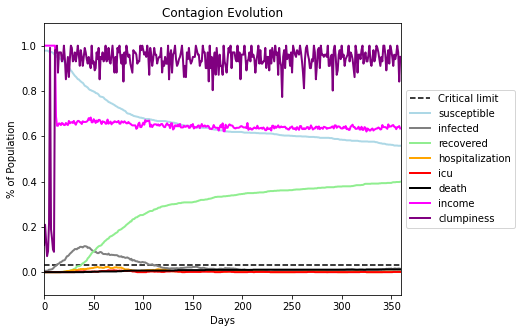

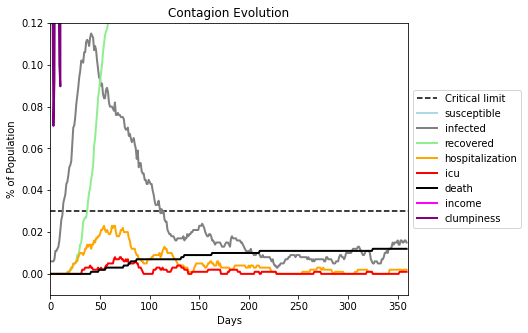

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds=seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)

Save these seeds if you want to rerun a scenario
[9675]
Max is 0.9768436772674389 but chosen is -0.11416740546921064 for temperature 1
Max is 0.9919349673138271 but chosen is -0.042564560452753177 for temperature 1
Max is 0.9836531161610136 but chosen is -0.15124534199961495 for temperature 1
Max is 0.9931967859567314 but chosen is -0.3824488556894614 for temperature 1
Max is 0.9947050097617687 but chosen is -0.11764210471904236 for temperature 1
Max is 0.9955986894270095 but chosen is -0.24754735206156514 for temperature 1
Max is 0.9956657192076346 but chosen is 0.5438858947849781 for temperature 1
Max is 0.9959361514530988 but chosen is 0.45161389084015496 for temperature 1
Max is 0.9955749308331026 but chosen is -0.44792336819382833 for temperature 1
Max is 0.9900647743431173 but chosen is 0.18769416873541125 for temperature 1
Max is 0.9917945830824929 but chosen is 0.6439771848464273 for temperature 1
Max is 0.9966484951633364 but chosen is -0.6680477636877342 for temperature 1
Max

Max is 0.9954533951046225 but chosen is -0.31285674819877085 for temperature 1
Max is 0.9933335322345321 but chosen is 0.21853562281063899 for temperature 1
Max is 0.9966097019325325 but chosen is 0.976309461517056 for temperature 1
Max is 0.9928598300746 but chosen is 0.08892879546975477 for temperature 1
Max is 0.9923208544529235 but chosen is 0.02386349930553949 for temperature 1
Max is 0.9911122054888365 but chosen is -0.06346713979122351 for temperature 1
Max is 0.9959961904917587 but chosen is 0.9873113613009324 for temperature 1
Max is 0.9909368991279751 but chosen is -0.8256527328964536 for temperature 1
Max is 0.9925593953929142 but chosen is -0.08279360818437127 for temperature 1
Max is 0.9937142874057086 but chosen is 0.379856002453206 for temperature 1
Max is 0.99613486587755 but chosen is -0.4278758326230718 for temperature 1
Max is 0.9975593621524858 but chosen is -0.2461685924338701 for temperature 1
Max is 0.9943689017183379 but chosen is 0.09315600994249237 for tempera

Max is 0.9900679703294833 but chosen is 0.2673380472226303 for temperature 1
Max is 0.9959438256067354 but chosen is 0.7685218910254822 for temperature 1
Max is 0.9931191703394983 but chosen is -0.5944841215113038 for temperature 1
Max is 0.996471501955785 but chosen is -0.1271704883410652 for temperature 1
Max is 0.9894334106504559 but chosen is 0.15909803254962224 for temperature 1
Max is 0.9973540804526791 but chosen is -0.22682695541424533 for temperature 1
Max is 0.9946691402547981 but chosen is -0.6674957045651166 for temperature 1
Max is 0.9956311237737031 but chosen is 0.055720660031982894 for temperature 1
Max is 0.9953716335981927 but chosen is -0.1279000331673928 for temperature 1
Max is 0.9930951772814596 but chosen is -0.2247675639916828 for temperature 1
Max is 0.9930809115187288 but chosen is -0.01687807029535685 for temperature 1
Max is 0.9934313873082087 but chosen is 0.09304849741361515 for temperature 1
Max is 0.9947005536245368 but chosen is -0.30867232575226305 for

Max is 0.9941179302626569 but chosen is -0.6750315616899585 for temperature 1
Max is 0.9853612441418794 but chosen is 0.5514475306690727 for temperature 1
Max is 0.988669545596472 but chosen is 0.14049688716001765 for temperature 1
Max is 0.9952475200982457 but chosen is -0.2637786623881038 for temperature 1
Max is 0.9905103866383481 but chosen is -0.6464724290997415 for temperature 1
Max is 0.9916621963340759 but chosen is 0.37158829844667945 for temperature 1
Max is 0.9943393484040702 but chosen is 0.31085752371256986 for temperature 1
Max is 0.9879209041975333 but chosen is -0.1388715187367926 for temperature 1
Max is 0.9932429555575203 but chosen is -0.053659589917107176 for temperature 1
Max is 0.9949138167883437 but chosen is -0.06478669435830975 for temperature 1
Max is 0.9953702487184606 but chosen is 0.016288771253844855 for temperature 1
Max is 0.9904938603567124 but chosen is 0.09238282263874943 for temperature 1
Max is 0.9911366615174623 but chosen is -0.04255167689643449 f

Max is 0.9805526542566697 but chosen is -0.21711158845775463 for temperature 1
Max is 0.996076324846358 but chosen is 0.39314617373197563 for temperature 1
Max is 0.9903115888158138 but chosen is -0.3666719887488329 for temperature 1
Max is 0.9859153621825468 but chosen is -0.3266594917622718 for temperature 1
Max is 0.9728915090100781 but chosen is -0.31914303280414397 for temperature 1
Max is 0.9962498958277859 but chosen is 0.3945648659134984 for temperature 1
Max is 0.9917953066820638 but chosen is -0.13877124432406882 for temperature 1
Max is 0.9952408952218463 but chosen is -0.35346901425166416 for temperature 1
Max is 0.9922813306541336 but chosen is 0.16499483474873397 for temperature 1
Max is 0.9860883110297308 but chosen is 0.45877308478880363 for temperature 1
Max is 0.9940908285723271 but chosen is -0.11071312268412453 for temperature 1
Max is 0.9935228806568266 but chosen is -0.027798622145749456 for temperature 1
Max is 0.9925544681387993 but chosen is 0.10742968350156464

Max is 0.9872667013284764 but chosen is 0.15416957484870877 for temperature 1
Max is 0.9948692580192803 but chosen is -0.0989991028846153 for temperature 1
Max is 0.9892132454556074 but chosen is 0.9736936838953946 for temperature 1
Max is 0.9762180538215196 but chosen is -0.6787721996251681 for temperature 1
Max is 0.9827980413674856 but chosen is -0.09683097338940398 for temperature 1
Max is 0.9774565828041546 but chosen is 0.7302966770308791 for temperature 1
Max is 0.9894739062576375 but chosen is 0.47067391276685683 for temperature 1
Max is 0.9782292744960362 but chosen is -0.5473898505968692 for temperature 1
Max is 0.9854117534398528 but chosen is 0.4062805833441342 for temperature 1
Max is 0.991295845174641 but chosen is -0.10542676384872544 for temperature 1
Max is 0.9837279658143272 but chosen is -0.7623943297783475 for temperature 1
Max is 0.9932957632492619 but chosen is 0.098883894067508 for temperature 1
Max is 0.9881483505504938 but chosen is -0.013336902986272967 for te

Max is 0.9964469798918693 but chosen is 0.9904539313181437 for temperature 1
Max is 0.9939557439189932 but chosen is 0.9894368824831252 for temperature 1
Max is 0.9939019984786357 but chosen is 0.9773086149997423 for temperature 1
Max is 0.9964218383731753 but chosen is 0.9851754469489139 for temperature 1
Max is 0.9961329384574998 but chosen is 0.9887993550917209 for temperature 1
Max is 0.9957511501793475 but chosen is 0.9867873039502536 for temperature 1
Max is 0.9979380188789237 but chosen is 0.9910644204422862 for temperature 1
Max is 0.9967514261723833 but chosen is 0.980649963901701 for temperature 1
Max is 0.9963954427634674 but chosen is 0.9846827670499211 for temperature 1
Max is 0.9937994166147958 but chosen is 0.9910066725866333 for temperature 1
Max is 0.9955749308331026 but chosen is 0.9849724689534655 for temperature 1
Max is 0.9941270759968076 but chosen is 0.9840620043300006 for temperature 1
tup_vec1 not in keepset of size 49
Max is 0.9941270759968076 but chosen is 0.

Max is 0.9955749308331026 but chosen is 0.9950823006442076 for temperature 1
Max is 0.9963954427634674 but chosen is 0.991895570395918 for temperature 1
Max is 0.9952753213042648 but chosen is 0.9810044177750915 for temperature 1
Max is 0.9963575841772891 but chosen is 0.9830584746142875 for temperature 1
Max is 0.9964469798918693 but chosen is 0.9805961340805764 for temperature 1
Max is 0.9937089490353841 but chosen is 0.9843673293684588 for temperature 1
Max is 0.9961329384574998 but chosen is 0.9787300852789428 for temperature 1
Max is 0.9967514261723833 but chosen is 0.9858589188979872 for temperature 1
Max is 0.9973540804526791 but chosen is 0.9859135516811113 for temperature 1
Max is 0.9977569844939326 but chosen is 0.9767859862252845 for temperature 1
Max is 0.9964347577390412 but chosen is 0.9901510127397017 for temperature 1
Max is 0.9948968523242635 but chosen is 0.975730100094967 for temperature 1
Max is 0.9940968440295592 but chosen is 0.9857551323461723 for temperature 1
M

Max is 0.9926646228124733 but chosen is 0.9733779154149022 for temperature 1
Max is 0.9930506503428675 but chosen is 0.9872138718369651 for temperature 1
Max is 0.9907854647239299 but chosen is 0.9805692571789351 for temperature 1
Max is 0.9864480232833608 but chosen is 0.9713905688059569 for temperature 1
Max is 0.9934919699469547 but chosen is 0.9864893459676849 for temperature 1
Max is 0.9949165237360982 but chosen is 0.9784645503928046 for temperature 1
Max is 0.9905358631633417 but chosen is 0.9773086149997423 for temperature 1
Max is 0.9964218383731753 but chosen is 0.9925783298610246 for temperature 1
Max is 0.9970868512791692 but chosen is 0.9825961949733006 for temperature 1
Max is 0.9923264734224481 but chosen is 0.9745817581801508 for temperature 1
Max is 0.9914484613531515 but chosen is 0.9855277499238801 for temperature 1
Max is 0.9858424329264873 but chosen is 0.983203903167268 for temperature 1
Max is 0.9746116010339944 but chosen is 0.9730478519540463 for temperature 1


Max is 0.996591682538321 but chosen is 0.9960454563586656 for temperature 1
Max is 0.9968778341179276 but chosen is 0.9874264271089572 for temperature 1
Max is 0.9973540804526791 but chosen is 0.9716598712112168 for temperature 1
Max is 0.9930506503428677 but chosen is 0.9796468112754502 for temperature 1
Max is 0.9924857026664561 but chosen is 0.9856180191353107 for temperature 1
Max is 0.9949147488784132 but chosen is 0.9834511824681187 for temperature 1
Max is 0.9942520371919317 but chosen is 0.9825315930781043 for temperature 1
Max is 0.9953917289047348 but chosen is 0.9853919497321906 for temperature 1
Max is 0.9962033478208941 but chosen is 0.9839760760543118 for temperature 1
Max is 0.9964421958023146 but chosen is 0.9829463838676902 for temperature 1
Max is 0.9947164839505158 but chosen is 0.9789902016743041 for temperature 1
Max is 0.9922107826647693 but chosen is 0.981509257722523 for temperature 1
Max is 0.9903400886408102 but chosen is 0.9842669832010223 for temperature 1
M

Max is 0.9862215444997808 but chosen is 0.9670746229435369 for temperature 1
Max is 0.9911278162160555 but chosen is 0.9710573419955502 for temperature 1
Max is 0.9848198694770255 but chosen is 0.9803503163125329 for temperature 1
Max is 0.9917608357273162 but chosen is 0.9708681429217517 for temperature 1
Max is 0.9911469222322687 but chosen is 0.977698929691307 for temperature 1
Max is 0.9928282935814394 but chosen is 0.967557639630677 for temperature 1
Max is 0.9942509695875449 but chosen is 0.9634243614622047 for temperature 1
Max is 0.9932290807740186 but chosen is 0.9606238312561131 for temperature 1
Max is 0.9948740812240634 but chosen is 0.9790222917535091 for temperature 1
Max is 0.9899403940623808 but chosen is 0.9663825526508056 for temperature 1
Max is 0.9873633491796634 but chosen is 0.9697035707968603 for temperature 1
Max is 0.9959438256067354 but chosen is 0.9868760404041456 for temperature 1
Max is 0.9892064406346196 but chosen is 0.9757461668092794 for temperature 1
M

Max is 0.9905142425280477 but chosen is 0.9675121996560576 for temperature 1
Max is 0.9919142257504707 but chosen is 0.9735151496613227 for temperature 1
Max is 0.9915699264049523 but chosen is 0.9742139503725487 for temperature 1
Max is 0.9919114869057581 but chosen is 0.9488472155008504 for temperature 1
Max is 0.9748613609237115 but chosen is 0.9416253299875681 for temperature 1
Max is 0.9901342763878007 but chosen is 0.9608984757996047 for temperature 1
Max is 0.9932441053714043 but chosen is 0.9762508827086968 for temperature 1
Max is 0.9902496522673225 but chosen is 0.965310920789769 for temperature 1
Max is 0.9936788825296571 but chosen is 0.9786434194306686 for temperature 1
Max is 0.9932957632492619 but chosen is 0.9348696865427244 for temperature 1
Max is 0.9844850161175499 but chosen is 0.9613650103041917 for temperature 1
Max is 0.9922406848144203 but chosen is 0.9821063527691606 for temperature 1
Max is 0.995010377164559 but chosen is 0.9813479859208186 for temperature 1
M

Max is 0.9915699264049523 but chosen is 0.9764003373719712 for temperature 1
Max is 0.9942509695875449 but chosen is 0.9689153985384226 for temperature 1
Max is 0.9869608802231461 but chosen is 0.9654056181994606 for temperature 1
Max is 0.984414548067024 but chosen is 0.9833436950156897 for temperature 1
Max is 0.9897079480772578 but chosen is 0.9854578798503535 for temperature 1
Max is 0.9944870996574955 but chosen is 0.9608025043973991 for temperature 1
Max is 0.9892064406346196 but chosen is 0.9616477461240807 for temperature 1
Max is 0.9748613609237115 but chosen is 0.9535321765255925 for temperature 1
Max is 0.9932441053714043 but chosen is 0.978032205748864 for temperature 1
Max is 0.988080457187272 but chosen is 0.9798725989868723 for temperature 1
Max is 0.9841614714324338 but chosen is 0.9697462718266701 for temperature 1
Max is 0.9837166015633467 but chosen is 0.9476740522213725 for temperature 1
Max is 0.9861325899960006 but chosen is 0.9631766556971049 for temperature 1
Ma

Max is 0.9879209041975333 but chosen is 0.9489714341766174 for temperature 1
Max is 0.9935154092454211 but chosen is 0.9439986170658072 for temperature 1
Max is 0.9792350305457128 but chosen is 0.9326421050970417 for temperature 1
Max is 0.9941179302626569 but chosen is 0.9655972968752055 for temperature 1
Max is 0.9825075915792092 but chosen is 0.9673746600560922 for temperature 1
Max is 0.9915529468026971 but chosen is 0.9291692882006557 for temperature 1
Max is 0.9854224816781075 but chosen is 0.9579202248715101 for temperature 1
tup_vec1 not in keepset of size 70
Max is 0.9888593754459769 but chosen is 0.9690757916883953 for temperature 1
Max is 0.9913591528737337 but chosen is 0.9836774132448284 for temperature 1
Max is 0.9898622948609774 but chosen is 0.9587930542402645 for temperature 1
Max is 0.9871275256130951 but chosen is 0.9728860362738556 for temperature 1
Max is 0.9930809115187288 but chosen is 0.9538095386855985 for temperature 1
Max is 0.9814608671752114 but chosen is 0

Max is 0.990607392442993 but chosen is 0.9603744147890375 for temperature 1
Max is 0.9926466888433889 but chosen is 0.959255763366066 for temperature 1
Max is 0.9836531161610136 but chosen is 0.917012208229728 for temperature 1
Max is 0.9804111755463626 but chosen is 0.9781195702306206 for temperature 1
Max is 0.9932038063401433 but chosen is 0.9719430971276736 for temperature 1
Max is 0.9854945551082345 but chosen is 0.9711138547119494 for temperature 1
tup_vec1 not in keepset of size 59
Max is 0.9893554983941615 but chosen is 0.9549129807209681 for temperature 1
Max is 0.9835858433863013 but chosen is 0.9609994779816294 for temperature 1
Max is 0.9916621963340759 but chosen is 0.9808316128404956 for temperature 1
Max is 0.9941179302626569 but chosen is 0.9683772485684367 for temperature 1
Max is 0.9779755158622012 but chosen is 0.9008161416804534 for temperature 1
Max is 0.9711116987969965 but chosen is 0.935657586370629 for temperature 1
Max is 0.9858370266875501 but chosen is 0.981

Max is 0.9922600332058438 but chosen is 0.9613695704714834 for temperature 1
Max is 0.9923741329915173 but chosen is 0.9699743737986495 for temperature 1
Max is 0.9924491749102903 but chosen is 0.988521295893237 for temperature 1
Max is 0.9951458241985545 but chosen is 0.9808407715423259 for temperature 1
Max is 0.9902789473338618 but chosen is 0.9484175356299521 for temperature 1
Max is 0.9834240544343494 but chosen is 0.9628558473766579 for temperature 1
Max is 0.9945062206180889 but chosen is 0.9822763094659489 for temperature 1
Max is 0.9938128865501468 but chosen is 0.9790530990914125 for temperature 1
Max is 0.9937921449566065 but chosen is 0.9841761945732755 for temperature 1
Max is 0.9949214475747594 but chosen is 0.973186785769308 for temperature 1
Max is 0.9942549615311325 but chosen is 0.9703855213214122 for temperature 1
Max is 0.9968446637194017 but chosen is 0.9883266279949307 for temperature 1
tup_vec1 not in keepset of size 29
Max is 0.9908922362247797 but chosen is 0.9

Max is 0.9932213260603127 but chosen is 0.9794148885417532 for temperature 1
Max is 0.9926051065342572 but chosen is 0.9853615618325595 for temperature 1
Max is 0.9945319001617692 but chosen is 0.9929154685752682 for temperature 1
Max is 0.993906389099316 but chosen is 0.9814761604642026 for temperature 1
Max is 0.9954613182709457 but chosen is 0.9899441894617793 for temperature 1
Max is 0.9937628294251531 but chosen is 0.951310538121426 for temperature 1
Max is 0.9887076580243525 but chosen is 0.9721690163550514 for temperature 1
tup_vec1 not in keepset of size 20
Max is 0.9905089254462319 but chosen is 0.9594966042946115 for temperature 1
Max is 0.9908460453061537 but chosen is 0.9781546516717998 for temperature 1
Max is 0.996090797186381 but chosen is 0.9863325596098867 for temperature 1
Max is 0.9896471866022606 but chosen is 0.968882298570704 for temperature 1
Max is 0.9875529919187159 but chosen is 0.9820023186526647 for temperature 1
Max is 0.9862589110953578 but chosen is 0.973

Max is 0.9977569844939326 but chosen is 0.9819908918091287 for temperature 1
Max is 0.9949147488784132 but chosen is 0.983429671661424 for temperature 1
Max is 0.9955749308331026 but chosen is 0.9827352028241285 for temperature 1
Max is 0.9939883602515307 but chosen is 0.9776830044040417 for temperature 1
Max is 0.9962033478208941 but chosen is 0.9917583420080963 for temperature 1
Max is 0.998369773603538 but chosen is 0.9823720682109506 for temperature 1
tup_vec1 not in keepset of size 70
Max is 0.9955749308331026 but chosen is 0.9823064783916641 for temperature 1
Max is 0.9961348658775501 but chosen is 0.9907948632489143 for temperature 1
Max is 0.9973399712979367 but chosen is 0.9923620353147934 for temperature 1
Max is 0.9926646228124733 but chosen is 0.9793869309795553 for temperature 1
Max is 0.9932689648532106 but chosen is 0.9780578945131454 for temperature 1
Max is 0.9961329384574998 but chosen is 0.974222522267648 for temperature 1
Max is 0.9903400886408102 but chosen is 0.97

Max is 0.9956791770195184 but chosen is 0.9875617747265674 for temperature 1
Max is 0.9948175433197098 but chosen is 0.987241905024083 for temperature 1
Max is 0.9979380188789237 but chosen is 0.9957459959408885 for temperature 1
Max is 0.998369773603538 but chosen is 0.9932580720353812 for temperature 1
Max is 0.9958374137568706 but chosen is 0.9934703677297728 for temperature 1
Max is 0.9964218383731753 but chosen is 0.9942056378782647 for temperature 1
Max is 0.993003390028676 but chosen is 0.9863723754924837 for temperature 1
Max is 0.9957511501793475 but chosen is 0.9877986297641068 for temperature 1
Max is 0.9973540804526791 but chosen is 0.9823287859831445 for temperature 1
Max is 0.9904818510400674 but chosen is 0.9730478519540465 for temperature 1
Max is 0.9890469967799476 but chosen is 0.9837358165366614 for temperature 1
Max is 0.9969462806191836 but chosen is 0.9854421593270751 for temperature 1
Max is 0.9964715019557848 but chosen is 0.9906502030758679 for temperature 1
Ma

Max is 0.996335174833012 but chosen is 0.9718956517176157 for temperature 1
Max is 0.9956708102663362 but chosen is 0.9809131301302828 for temperature 1
Max is 0.9922495566800712 but chosen is 0.9899458032151284 for temperature 1
tup_vec1 not in keepset of size 43
Max is 0.9963575841772891 but chosen is 0.9779128349035588 for temperature 1
Max is 0.9956266432380156 but chosen is 0.9876967744043346 for temperature 1
Max is 0.9963295112750626 but chosen is 0.9953888399798629 for temperature 1
Max is 0.9961329384574998 but chosen is 0.9886002413930811 for temperature 1
Max is 0.9967545553282025 but chosen is 0.9856243136283066 for temperature 1
Max is 0.9934786293151981 but chosen is 0.984447999210427 for temperature 1
Max is 0.9917299799869604 but chosen is 0.9795955974733753 for temperature 1
Max is 0.9964421958023146 but chosen is 0.9919969918439719 for temperature 1
Max is 0.9955617001210043 but chosen is 0.9936510738792336 for temperature 1
Max is 0.9956791770195184 but chosen is 0.9

Max is 0.9893395783904676 but chosen is 0.9762750294256571 for temperature 1
Max is 0.9969280531044222 but chosen is 0.9856073747196917 for temperature 1
Max is 0.9947033191479789 but chosen is 0.969400432349038 for temperature 1
Max is 0.9905929251228546 but chosen is 0.9655905129381168 for temperature 1
Max is 0.9974547294093149 but chosen is 0.985838337453633 for temperature 1
Max is 0.9951677250029598 but chosen is 0.9917041640213984 for temperature 1
Max is 0.998369773603538 but chosen is 0.9927865045231361 for temperature 1
Max is 0.9967545553282025 but chosen is 0.9877684075900616 for temperature 1
Max is 0.996591682538321 but chosen is 0.9868498768705506 for temperature 1
Max is 0.9936105256526857 but chosen is 0.9890048814044609 for temperature 1
Max is 0.9970868512791692 but chosen is 0.9945196900971591 for temperature 1
Max is 0.9960182032534852 but chosen is 0.9937071496496354 for temperature 1
Max is 0.9956524950057611 but chosen is 0.9937228667845984 for temperature 1
Max

Max is 0.9932957632492619 but chosen is 0.9794083379844207 for temperature 1
Max is 0.9869846628747525 but chosen is 0.9771670265864388 for temperature 1
Max is 0.9948740812240634 but chosen is 0.9890594056785429 for temperature 1
Max is 0.9919310413669974 but chosen is 0.9866078494630832 for temperature 1
Max is 0.9928682328778252 but chosen is 0.9918018388565019 for temperature 1
Max is 0.9959438256067354 but chosen is 0.9798087411899817 for temperature 1
Max is 0.9946979657494094 but chosen is 0.9696784301167329 for temperature 1
Max is 0.9953877382923267 but chosen is 0.9664483316435136 for temperature 1
Max is 0.9944870996574955 but chosen is 0.9427987188539152 for temperature 1
Max is 0.9879783610040197 but chosen is 0.9614725788565787 for temperature 1
Max is 0.9936788825296571 but chosen is 0.961488272984751 for temperature 1
Max is 0.9765734795003238 but chosen is 0.9573239581799611 for temperature 1
Max is 0.9903810426807881 but chosen is 0.9773574318233156 for temperature 1


Max is 0.9944870996574953 but chosen is 0.966128645867397 for temperature 1
Max is 0.9892064406346196 but chosen is 0.946312104840351 for temperature 1
Max is 0.9899403940623808 but chosen is 0.9604786828494272 for temperature 1
Max is 0.9866759917993128 but chosen is 0.957804575610546 for temperature 1
Max is 0.9946979657494094 but chosen is 0.9829412804431427 for temperature 1
Max is 0.9959331942549424 but chosen is 0.9676915336926378 for temperature 1
Max is 0.9886634043083559 but chosen is 0.973286971142908 for temperature 1
Max is 0.9937652416920554 but chosen is 0.9908227387109132 for temperature 1
Max is 0.9940621998096878 but chosen is 0.9501720681414548 for temperature 1
Max is 0.9906415319596759 but chosen is 0.9499835822749583 for temperature 1
Max is 0.9873633491796634 but chosen is 0.9825677516429489 for temperature 1
Max is 0.9948740812240634 but chosen is 0.9890594056785429 for temperature 1
Max is 0.9919310413669974 but chosen is 0.9880941653690759 for temperature 1
Max

Max is 0.9919310413669974 but chosen is 0.9723936123511525 for temperature 1
Max is 0.9919142257504707 but chosen is 0.964361249107765 for temperature 1
Max is 0.9926832036278902 but chosen is 0.9815509554259773 for temperature 1
Max is 0.9891304079217335 but chosen is 0.9599712250725391 for temperature 1
Max is 0.9779160619576771 but chosen is 0.9544401650322616 for temperature 1
Max is 0.9794976793827322 but chosen is 0.9400112944844276 for temperature 1
Max is 0.9869846628747525 but chosen is 0.9526330683146004 for temperature 1
Max is 0.9877056094611544 but chosen is 0.9575984824299157 for temperature 1
Max is 0.984778669488585 but chosen is 0.9783269703371129 for temperature 1
Max is 0.9879783610040197 but chosen is 0.9608984757996047 for temperature 1
Max is 0.9844428550648593 but chosen is 0.9510686788714353 for temperature 1
Max is 0.9766976615175806 but chosen is 0.9701028111144876 for temperature 1
tup_vec1 not in keepset of size 45
Max is 0.9948740812240634 but chosen is 0.9

Max is 0.9805150229848695 but chosen is 0.9512582080264822 for temperature 1
Max is 0.9615339726685851 but chosen is 0.8701405431288427 for temperature 1
Max is 0.9842478399008655 but chosen is 0.9406118598825387 for temperature 1
Max is 0.9733627590282122 but chosen is 0.9412966185326024 for temperature 1
Max is 0.9795998543003968 but chosen is 0.9735811182370151 for temperature 1
Max is 0.9874107913044718 but chosen is 0.9631353305471883 for temperature 1
Max is 0.9926466888433889 but chosen is 0.9714321276746182 for temperature 1
Max is 0.9881867604658098 but chosen is 0.9752942230668944 for temperature 1
Max is 0.9864676662737916 but chosen is 0.9726547005028165 for temperature 1
Max is 0.9813371616901486 but chosen is 0.9805585140795381 for temperature 1
Max is 0.9771164174408975 but chosen is 0.9732419249241945 for temperature 1
Max is 0.9866881037785583 but chosen is 0.9656093300628925 for temperature 1
Max is 0.9866556735990162 but chosen is 0.9522410650732858 for temperature 1

Max is 0.9841124964609761 but chosen is 0.9270300169601737 for temperature 1
Max is 0.9854945551082345 but chosen is 0.9546337593014784 for temperature 1
Max is 0.9876784627268499 but chosen is 0.9658266167435858 for temperature 1
Max is 0.9821100642340888 but chosen is 0.9632425101519831 for temperature 1
Max is 0.9783816676318793 but chosen is 0.9448875446514966 for temperature 1
Max is 0.9925593953929142 but chosen is 0.9781792645556547 for temperature 1
Max is 0.9923678137824522 but chosen is 0.9761484748248082 for temperature 1
Max is 0.9935154092454211 but chosen is 0.9681788710739758 for temperature 1
Max is 0.9874107913044718 but chosen is 0.9852066146335451 for temperature 1
Max is 0.9852377897144472 but chosen is 0.9597755249310125 for temperature 1
Max is 0.9900085992937411 but chosen is 0.9587930542402645 for temperature 1
Max is 0.9871275256130951 but chosen is 0.9682475056040166 for temperature 1
Max is 0.9881867604658098 but chosen is 0.9855502856546574 for temperature 1

Max is 0.9966484951633364 but chosen is 0.9898383316899877 for temperature 1
Max is 0.997620876542213 but chosen is 0.9885126133414991 for temperature 1
Max is 0.9968446637194017 but chosen is 0.990942697063343 for temperature 1
Max is 0.996090797186381 but chosen is 0.9822879550784417 for temperature 1
Max is 0.9912438756075234 but chosen is 0.9767607083946848 for temperature 1
Max is 0.9959002874496987 but chosen is 0.9846007453886632 for temperature 1
Max is 0.993906389099316 but chosen is 0.972647894838596 for temperature 1
Max is 0.9888846406790086 but chosen is 0.9556281910534322 for temperature 1
Max is 0.9908390232984651 but chosen is 0.9669536407728577 for temperature 1
Max is 0.9950635350569327 but chosen is 0.959857863464113 for temperature 1
Max is 0.9917429596437435 but chosen is 0.975158659503052 for temperature 1
Max is 0.9972406974966297 but chosen is 0.9811899666163054 for temperature 1
Max is 0.9899880609226154 but chosen is 0.960734778433406 for temperature 1
Max is 

Max is 0.994244390529569 but chosen is 0.9704273784362737 for temperature 1
Max is 0.9947137963312456 but chosen is 0.9625855386366537 for temperature 1
Max is 0.9961494666819489 but chosen is 0.9702760765231022 for temperature 1
Max is 0.9939276136605154 but chosen is 0.9741379467575716 for temperature 1
Max is 0.9945319001617692 but chosen is 0.9784133178116462 for temperature 1
Max is 0.9945062206180889 but chosen is 0.9771634719219436 for temperature 1
Max is 0.9924491749102903 but chosen is 0.9827892128800709 for temperature 1
Max is 0.9961322763347551 but chosen is 0.9900075955652604 for temperature 1
Max is 0.9940908285723274 but chosen is 0.9804544891651362 for temperature 1
tup_vec1 not in keepset of size 36
Max is 0.9914731030042457 but chosen is 0.9651900846018547 for temperature 1
Max is 0.9918328392164895 but chosen is 0.9712086359949627 for temperature 1
Max is 0.9852673521471752 but chosen is 0.9511421930470365 for temperature 1
Max is 0.9908460453061537 but chosen is 0.

Max is 0.9950611914199823 but chosen is 0.979727393509818 for temperature 1
Max is 0.9840003249200915 but chosen is 0.9577625185791092 for temperature 1
Max is 0.9893377262559662 but chosen is 0.9845594584786101 for temperature 1
Max is 0.9890545270250769 but chosen is 0.967127857732104 for temperature 1
Max is 0.9845342844111011 but chosen is 0.9616434448543487 for temperature 1
Max is 0.9922683083603022 but chosen is 0.9702425782310021 for temperature 1
Max is 0.9918111293207348 but chosen is 0.9767251722241068 for temperature 1
Max is 0.9860924680084128 but chosen is 0.9785681975898385 for temperature 1
Max is 0.9814142300211376 but chosen is 0.9656710274254392 for temperature 1
tup_vec1 not in keepset of size 6
Max is 0.9788995987463021 but chosen is 0.9616038223866644 for temperature 1
Max is 0.9813249757514616 but chosen is 0.9721351894237492 for temperature 1
Max is 0.9591078853104454 but chosen is 0.9587328968887514 for temperature 1
Max is 0.9928521673885184 but chosen is 0.94

Max is 0.9962985868605885 but chosen is 0.9819443934281024 for temperature 1
Max is 0.995378362698559 but chosen is 0.9797853347165466 for temperature 1
Max is 0.9937142874057086 but chosen is 0.9861753578008877 for temperature 1
Max is 0.9942633365508863 but chosen is 0.9863954765778831 for temperature 1
Max is 0.9968714684812539 but chosen is 0.9859063329399306 for temperature 1
Max is 0.9910849516244259 but chosen is 0.9695931273222044 for temperature 1
Max is 0.9904191786535299 but chosen is 0.9833655464253107 for temperature 1
Max is 0.9938854852423264 but chosen is 0.967298407160794 for temperature 1
Max is 0.9955581655889617 but chosen is 0.9893338875726483 for temperature 1
Max is 0.9950611914199823 but chosen is 0.979041184212478 for temperature 1
Max is 0.9917199371971619 but chosen is 0.9698902871215087 for temperature 1
Max is 0.9917706597645264 but chosen is 0.9857296499470325 for temperature 1
Max is 0.9955611181883085 but chosen is 0.9894493048236102 for temperature 1
Ma

Max is 0.9928098803601891 but chosen is 0.9805841445000824 for temperature 1
Max is 0.9955581655889617 but chosen is 0.9760576086650853 for temperature 1
Max is 0.9905371681690089 but chosen is 0.9804947005937683 for temperature 1
Max is 0.9925077871889648 but chosen is 0.9833555152713516 for temperature 1
Max is 0.9946134494141833 but chosen is 0.9837899493102834 for temperature 1
Max is 0.9954077797299062 but chosen is 0.9807202104225304 for temperature 1
Max is 0.992902786170613 but chosen is 0.9827305232999158 for temperature 1
Max is 0.9917706597645264 but chosen is 0.9768129966716428 for temperature 1
Max is 0.997172598250379 but chosen is 0.9860806435059637 for temperature 1
Max is 0.9963454161338089 but chosen is 0.9763858294795378 for temperature 1
Max is 0.9885883019283112 but chosen is 0.985748332434626 for temperature 1
Max is 0.9942562901111965 but chosen is 0.9916166109820737 for temperature 1
Max is 0.9950611914199823 but chosen is 0.9916834647138891 for temperature 1
tu

Max is 0.9928532087976379 but chosen is 0.9704471275478066 for temperature 1
Max is 0.9911747625372004 but chosen is 0.9502348346030115 for temperature 1
Max is 0.9905327630390922 but chosen is 0.9612033881997178 for temperature 1
Max is 0.9941896915858442 but chosen is 0.9774250425603968 for temperature 1
Max is 0.9917439069206856 but chosen is 0.9834848962076963 for temperature 1
Max is 0.9947886551267925 but chosen is 0.9607297454010649 for temperature 1
Max is 0.9937040078862007 but chosen is 0.9850617169484377 for temperature 1
Max is 0.9967835442635911 but chosen is 0.9864276661683794 for temperature 1
Max is 0.9936224827167571 but chosen is 0.9870097156559416 for temperature 1
Max is 0.9937198736963532 but chosen is 0.9843422308554769 for temperature 1
Max is 0.9880639830288203 but chosen is 0.9672812429239767 for temperature 1
Max is 0.9940645350493335 but chosen is 0.9765443443787982 for temperature 1
tup_vec1 not in keepset of size 33
Max is 0.9947886551267925 but chosen is 0

Max is 0.9969886069276661 but chosen is 0.9770308223574271 for temperature 1
Max is 0.9928521673885186 but chosen is 0.9586749804605932 for temperature 1
Max is 0.9947886551267926 but chosen is 0.9881676478390523 for temperature 1
Max is 0.991899823246336 but chosen is 0.97604355469303 for temperature 1
Max is 0.9967835442635911 but chosen is 0.9818296044159446 for temperature 1
Max is 0.9873814566430732 but chosen is 0.9612709078886893 for temperature 1
Max is 0.9954008288921341 but chosen is 0.9803659556975957 for temperature 1
Max is 0.992628295113039 but chosen is 0.9836254720458686 for temperature 1
Max is 0.9942492640376953 but chosen is 0.9719815449826069 for temperature 1
Max is 0.993402775181595 but chosen is 0.9840327459898403 for temperature 1
Max is 0.9932437920605732 but chosen is 0.9693942397138829 for temperature 1
Max is 0.9958379323001916 but chosen is 0.9859920641096065 for temperature 1
Max is 0.9950419351003906 but chosen is 0.9807706868093227 for temperature 1
Max 

Max is 0.9950419351003906 but chosen is 0.9807706868093227 for temperature 1
Max is 0.9917864240001467 but chosen is 0.984456010183212 for temperature 1
Max is 0.9911315062670691 but chosen is 0.965219170663928 for temperature 1
Max is 0.9875612718351899 but chosen is 0.9730122635411321 for temperature 1
Max is 0.9924680099996626 but chosen is 0.979742567038312 for temperature 1
Max is 0.9889155741657212 but chosen is 0.9371130327800432 for temperature 1
Max is 0.9923867819338857 but chosen is 0.9685900780215618 for temperature 1
Max is 0.9939383491208547 but chosen is 0.9743890027255716 for temperature 1
Max is 0.993155617787133 but chosen is 0.9793314659265773 for temperature 1
Max is 0.9935202636521773 but chosen is 0.965419327194874 for temperature 1
Max is 0.9944504546197103 but chosen is 0.988520831680903 for temperature 1
Max is 0.9938589125560198 but chosen is 0.9774991425160299 for temperature 1
Max is 0.9930951772814596 but chosen is 0.9731610334990678 for temperature 1
Max i

Max is 0.9933623670108527 but chosen is 0.9652683545732197 for temperature 1
Max is 0.9911122054888365 but chosen is 0.9807923178957395 for temperature 1
Max is 0.993155617787133 but chosen is 0.9779899579067225 for temperature 1
Max is 0.9931702300320959 but chosen is 0.9643754454588268 for temperature 1
Max is 0.9922813306541336 but chosen is 0.9596176064935686 for temperature 1
Max is 0.9916470486158994 but chosen is 0.9649088893437024 for temperature 1
Max is 0.993953172843152 but chosen is 0.9470795614958496 for temperature 1
Max is 0.9888651302776994 but chosen is 0.9275208094565047 for temperature 1
Max is 0.9889155741657212 but chosen is 0.9571211439650785 for temperature 1
Max is 0.9946493393369066 but chosen is 0.9700265381976949 for temperature 1
Max is 0.9888216679623478 but chosen is 0.9708867276017811 for temperature 1
Max is 0.9966567867444266 but chosen is 0.9786525216037445 for temperature 1
Max is 0.9899361715703461 but chosen is 0.9792644855923592 for temperature 1
M

Max is 0.9949187188849621 but chosen is 0.970858364048591 for temperature 1
Max is 0.991765496909927 but chosen is 0.9781484137999028 for temperature 1
Max is 0.9956992980686488 but chosen is 0.9868692212335215 for temperature 1
Max is 0.9949866757821894 but chosen is 0.9904224613958593 for temperature 1
Max is 0.995303551788011 but chosen is 0.9765460177077245 for temperature 1
Max is 0.9958853875756225 but chosen is 0.9751092751365101 for temperature 1
Max is 0.9933644929810778 but chosen is 0.9895254962112572 for temperature 1
Max is 0.9928657256104193 but chosen is 0.984522370161818 for temperature 1
Max is 0.9941558141483815 but chosen is 0.9779668393710733 for temperature 1
Max is 0.9926789644085756 but chosen is 0.9746820147456539 for temperature 1
Max is 0.9958876157381485 but chosen is 0.9733779436871892 for temperature 1
Max is 0.9962391565603398 but chosen is 0.9767655567515922 for temperature 1
Max is 0.9953187031978317 but chosen is 0.9850293503375764 for temperature 1
Max

Max is 0.9948496873763438 but chosen is 0.9875173916208899 for temperature 1
Max is 0.9946849073687883 but chosen is 0.9845092392227565 for temperature 1
Max is 0.9933351923725645 but chosen is 0.983651785797617 for temperature 1
Max is 0.990712852149905 but chosen is 0.9785810005086274 for temperature 1
Max is 0.9908502326211414 but chosen is 0.9835781195944334 for temperature 1
Max is 0.9926541102599696 but chosen is 0.964932874069024 for temperature 1
Max is 0.9922141471813944 but chosen is 0.9814396654400472 for temperature 1
Max is 0.9934121279963338 but chosen is 0.9662892539650643 for temperature 1
Max is 0.9911102735289901 but chosen is 0.9819903051713136 for temperature 1
Max is 0.9842814919166419 but chosen is 0.9647279962523473 for temperature 1
Max is 0.9832894765103394 but chosen is 0.9822770218522049 for temperature 1
Max is 0.9929872172960013 but chosen is 0.9881437483019071 for temperature 1
Max is 0.9972501084819452 but chosen is 0.989215158466322 for temperature 1
Max

Max is 0.9932478196204134 but chosen is 0.9561185096208944 for temperature 1
Max is 0.995467939595085 but chosen is 0.966580654331144 for temperature 1
Max is 0.9874390393497663 but chosen is 0.9661053452393601 for temperature 1
Max is 0.9945380669328193 but chosen is 0.9842482946406478 for temperature 1
Max is 0.9909571173820086 but chosen is 0.9722018778322632 for temperature 1
Max is 0.9911740191760923 but chosen is 0.9788871394309455 for temperature 1
Max is 0.9963697307740914 but chosen is 0.9540295181905749 for temperature 1
Max is 0.9959961904917587 but chosen is 0.9753280399522878 for temperature 1
Max is 0.9975044834711905 but chosen is 0.9735473802186884 for temperature 1
Max is 0.997430387197174 but chosen is 0.9713872298005348 for temperature 1
Max is 0.9935867047216667 but chosen is 0.9856492002286668 for temperature 1
Max is 0.9947576853611234 but chosen is 0.9627807595433396 for temperature 1
Max is 0.9914841599531427 but chosen is 0.9790751904795555 for temperature 1
Ma

Max is 0.9919811617160316 but chosen is 0.9739397780075044 for temperature 1
Max is 0.9860883110297308 but chosen is 0.9555691334727286 for temperature 1
Max is 0.9917953066820638 but chosen is 0.9840913172038286 for temperature 1
Max is 0.9910394158277771 but chosen is 0.9580491888608188 for temperature 1
Max is 0.9852201749821491 but chosen is 0.9764540657753766 for temperature 1
Max is 0.9870069481786118 but chosen is 0.9666185246343455 for temperature 1
Max is 0.9833961992156255 but chosen is 0.9669421766545553 for temperature 1
Max is 0.9954679395950853 but chosen is 0.9900756710387871 for temperature 1
Max is 0.9902622351878626 but chosen is 0.9721718778339603 for temperature 1
Max is 0.9917945830824929 but chosen is 0.9731550904410535 for temperature 1
Max is 0.9923009517652852 but chosen is 0.9742323834049119 for temperature 1
Max is 0.9878623724465518 but chosen is 0.9734244766145626 for temperature 1
Max is 0.9932949705170063 but chosen is 0.9837694440158261 for temperature 1

Max is 0.997172598250379 but chosen is 0.9753276419260614 for temperature 1
Max is 0.9955782046060191 but chosen is 0.9790950447708244 for temperature 1
Max is 0.9930386508751394 but chosen is 0.979652548278716 for temperature 1
Max is 0.9968714684812539 but chosen is 0.982972743321543 for temperature 1
Max is 0.9927181372301189 but chosen is 0.9875129757510142 for temperature 1
Max is 0.9965658844881623 but chosen is 0.9698690096175209 for temperature 1
Max is 0.9885883019283112 but chosen is 0.9732807142297838 for temperature 1
Max is 0.9965365459565032 but chosen is 0.9808457585021565 for temperature 1
Max is 0.989361604808786 but chosen is 0.9871063496002811 for temperature 1
Max is 0.9950611914199823 but chosen is 0.989333887572648 for temperature 1
Max is 0.9928428784889525 but chosen is 0.9836674356799646 for temperature 1
Max is 0.984103175604658 but chosen is 0.9738093807022726 for temperature 1
Max is 0.9914539531262148 but chosen is 0.9870242429493603 for temperature 1
Max i

Max is 0.9791146709890358 but chosen is 0.9565054513529617 for temperature 1
Max is 0.9963378416925325 but chosen is 0.9885895384278311 for temperature 1
Max is 0.9930223631668301 but chosen is 0.9728384077431282 for temperature 1
Max is 0.9950611914199823 but chosen is 0.9760528410447269 for temperature 1
Max is 0.9926580124889595 but chosen is 0.9827986887901252 for temperature 1
tup_vec1 not in keepset of size 14
Max is 0.9890042557506132 but chosen is 0.9647549338692007 for temperature 1
Max is 0.9928428784889521 but chosen is 0.9763884433431805 for temperature 1
Max is 0.9910133728260897 but chosen is 0.9893539910183553 for temperature 1
Max is 0.9921721787610669 but chosen is 0.9762441288660068 for temperature 1
Max is 0.9930386508751394 but chosen is 0.9883158903501416 for temperature 1
Max is 0.9911063284233445 but chosen is 0.9898816810225164 for temperature 1
Max is 0.9946713042095946 but chosen is 0.9838509880813734 for temperature 1
Max is 0.9855824801433798 but chosen is 0

Max is 0.9965658844881623 but chosen is 0.9825550787548449 for temperature 1
Max is 0.9937040078862007 but chosen is 0.9607297454010649 for temperature 1
Max is 0.9947886551267925 but chosen is 0.9749778605351922 for temperature 1
Max is 0.9953001413411189 but chosen is 0.9882634331984068 for temperature 1
Max is 0.9934328268786647 but chosen is 0.976514490819367 for temperature 1
Max is 0.9967179811921223 but chosen is 0.9851498325547625 for temperature 1
Max is 0.9923671372708781 but chosen is 0.9807988807942345 for temperature 1
Max is 0.9948863747869694 but chosen is 0.9900395392188356 for temperature 1
Max is 0.9950611914199823 but chosen is 0.9794842086559128 for temperature 1
Max is 0.9955860437128861 but chosen is 0.974292568377972 for temperature 1
Max is 0.9892310040198469 but chosen is 0.9829251184833674 for temperature 1
Max is 0.995578204606019 but chosen is 0.9825809241979299 for temperature 1
Max is 0.9942633365508863 but chosen is 0.982285801636374 for temperature 1
Max

Max is 0.9943393484040702 but chosen is 0.9869967297733407 for temperature 1
Max is 0.9950422184669682 but chosen is 0.9621965035688426 for temperature 1
Max is 0.9885286061053358 but chosen is 0.9796920815706249 for temperature 1
Max is 0.9968714684812539 but chosen is 0.9873031275750432 for temperature 1
Max is 0.9920711033601505 but chosen is 0.9737662825956731 for temperature 1
Max is 0.9932831421287621 but chosen is 0.9747686490158962 for temperature 1
Max is 0.9928723569135699 but chosen is 0.9800384147761692 for temperature 1
Max is 0.9957258258902107 but chosen is 0.9746718750274572 for temperature 1
Max is 0.9969886069276661 but chosen is 0.9929931880599506 for temperature 1
Max is 0.9933025376242772 but chosen is 0.983518281139813 for temperature 1
Max is 0.9931206727476195 but chosen is 0.9865276281594481 for temperature 1
Max is 0.995378362698559 but chosen is 0.9697695545722045 for temperature 1
Max is 0.9899498133800134 but chosen is 0.9732067198965586 for temperature 1
M

Max is 0.9917199371971619 but chosen is 0.9914040071715324 for temperature 1
Max is 0.9941896915858442 but chosen is 0.9877816181687976 for temperature 1
Max is 0.9893334749541994 but chosen is 0.9819731460977338 for temperature 1
Max is 0.9925567758136021 but chosen is 0.9753310934794124 for temperature 1
Max is 0.9899498133800132 but chosen is 0.9681731642596568 for temperature 1
tup_vec1 not in keepset of size 45
Max is 0.9962985868605885 but chosen is 0.9901740792363707 for temperature 1
Max is 0.9967835442635911 but chosen is 0.9908100639015482 for temperature 1
Max is 0.9950611914199823 but chosen is 0.9896930765576087 for temperature 1
Max is 0.9924887940484394 but chosen is 0.9904463789839957 for temperature 1
Max is 0.9959940623907642 but chosen is 0.9641360892903839 for temperature 1
Max is 0.9933025376242772 but chosen is 0.9713050227729915 for temperature 1
Max is 0.9882328526440838 but chosen is 0.97604355469303 for temperature 1
Max is 0.9929460094602884 but chosen is 0.9

Max is 0.9918019821613314 but chosen is 0.9733163916006868 for temperature 1
Max is 0.9907492608837878 but chosen is 0.9716994053621787 for temperature 1
Max is 0.9890142018418114 but chosen is 0.9757807967685105 for temperature 1
Max is 0.9866199272193735 but chosen is 0.9776149243413371 for temperature 1
Max is 0.991277362719849 but chosen is 0.980686199029438 for temperature 1
Max is 0.9876592314637349 but chosen is 0.9831521349530808 for temperature 1
Max is 0.9881175305461037 but chosen is 0.9836838831271069 for temperature 1
Max is 0.9817266052121573 but chosen is 0.967244295259384 for temperature 1
Max is 0.9835150277122146 but chosen is 0.9543513849828258 for temperature 1
Max is 0.9740722128425588 but chosen is 0.9624620428738635 for temperature 1
Max is 0.971915234667086 but chosen is 0.9383052325885719 for temperature 1
Max is 0.9924422799065578 but chosen is 0.9831153805898959 for temperature 1
Max is 0.993189603899672 but chosen is 0.9857509469107962 for temperature 1
Max 

Max is 0.9930379303544808 but chosen is 0.9711458769181601 for temperature 1
Max is 0.9952786083254049 but chosen is 0.9813800865693634 for temperature 1
Max is 0.995629529611128 but chosen is 0.9799076221668834 for temperature 1
Max is 0.9950531715813226 but chosen is 0.9498329100711473 for temperature 1
Max is 0.9908302733932766 but chosen is 0.9799333294755155 for temperature 1
Max is 0.9942940429207963 but chosen is 0.9753847134143528 for temperature 1
Max is 0.9911122054888365 but chosen is 0.9747216107427729 for temperature 1
Max is 0.9907492608837878 but chosen is 0.9648647616623587 for temperature 1
Max is 0.9893168924434687 but chosen is 0.9762263524614316 for temperature 1
Max is 0.9924422799065578 but chosen is 0.9772050594037732 for temperature 1
Max is 0.9925225920138936 but chosen is 0.9880805730442414 for temperature 1
Max is 0.9951017775695609 but chosen is 0.9876606450304221 for temperature 1
Max is 0.9910853726642378 but chosen is 0.9825251704454112 for temperature 1


Max is 0.9961002293247788 but chosen is 0.9868016170907696 for temperature 1
Max is 0.9951711104966154 but chosen is 0.9833917669959081 for temperature 1
Max is 0.9962391565603398 but chosen is 0.9791154320178338 for temperature 1
Max is 0.9940651054852623 but chosen is 0.9812932456034218 for temperature 1
Max is 0.9961390229641288 but chosen is 0.968693643556777 for temperature 1
Max is 0.9949187188849621 but chosen is 0.9870649818233161 for temperature 1
Max is 0.9929613952422154 but chosen is 0.9820262386567852 for temperature 1
Max is 0.9953764276398519 but chosen is 0.9838361880105466 for temperature 1
Max is 0.9937880993191377 but chosen is 0.9798820704164084 for temperature 1
Max is 0.9922547106375329 but chosen is 0.9677715397352735 for temperature 1
Max is 0.9920143282145033 but chosen is 0.973859997673984 for temperature 1
Max is 0.9923474272686428 but chosen is 0.9719856809189195 for temperature 1
Max is 0.9919355576823246 but chosen is 0.9820737821316754 for temperature 1
M

Max is 0.9904024362034392 but chosen is 0.9686659865957744 for temperature 1
Max is 0.9951633616473119 but chosen is 0.9858629418146654 for temperature 1
Max is 0.9941558141483813 but chosen is 0.9818323667630129 for temperature 1
Max is 0.9939854764859511 but chosen is 0.9803781013400148 for temperature 1
Max is 0.9972501084819453 but chosen is 0.9898498945711276 for temperature 1
Max is 0.9937501587200487 but chosen is 0.9765153493155592 for temperature 1
Max is 0.9897755400023921 but chosen is 0.9822063314598173 for temperature 1
tup_vec1 not in keepset of size 36
Max is 0.9929872172960013 but chosen is 0.9799269102398739 for temperature 1
Max is 0.991765496909927 but chosen is 0.9688189933224418 for temperature 1
Max is 0.9946614751974349 but chosen is 0.9791630449228702 for temperature 1
Max is 0.9959613209113832 but chosen is 0.992491806524314 for temperature 1
Max is 0.9948189208910662 but chosen is 0.9907574829708149 for temperature 1
Max is 0.9942010617429548 but chosen is 0.9

Max is 0.9930756121479639 but chosen is 0.9757898452321603 for temperature 1
Max is 0.9908699369611729 but chosen is 0.9878018397681139 for temperature 1
Max is 0.9893036028145108 but chosen is 0.966789578634073 for temperature 1
Max is 0.9835554999507399 but chosen is 0.9500408341206776 for temperature 1
Max is 0.9818636591304981 but chosen is 0.9568394544491396 for temperature 1
Max is 0.9787051554479853 but chosen is 0.9596917594820765 for temperature 1
tup_vec1 not in keepset of size 5
Max is 0.9855019784650776 but chosen is 0.9843752024498525 for temperature 1
Max is 0.9896545568510303 but chosen is 0.9797434477384932 for temperature 1
Max is 0.989562691591136 but chosen is 0.9693909774521582 for temperature 1
Max is 0.9911740191760926 but chosen is 0.9829718898915252 for temperature 1
Max is 0.9919172029779895 but chosen is 0.9637355875810006 for temperature 1
Max is 0.9963697307740914 but chosen is 0.9794115607909254 for temperature 1
Max is 0.9959961904917587 but chosen is 0.97

Max is 0.9901984530675728 but chosen is 0.9846327990340197 for temperature 1
Max is 0.9893289223014213 but chosen is 0.9843582880898474 for temperature 1
Max is 0.9920273868494306 but chosen is 0.9706975682138904 for temperature 1
Max is 0.9919959161743589 but chosen is 0.9636407555098047 for temperature 1
Max is 0.9919172029779895 but chosen is 0.9829718898915252 for temperature 1
Max is 0.9911740191760926 but chosen is 0.9865316403817047 for temperature 1
Max is 0.9870069481786118 but chosen is 0.9600590662199098 for temperature 1
Max is 0.9947832869100116 but chosen is 0.975025136019525 for temperature 1
Max is 0.9920306946725318 but chosen is 0.9720947625897702 for temperature 1
Max is 0.9845645142509999 but chosen is 0.9657029982727905 for temperature 1
Max is 0.9909571173820084 but chosen is 0.956303834486525 for temperature 1
Max is 0.9825873936229188 but chosen is 0.9568628163850387 for temperature 1
Max is 0.989562691591136 but chosen is 0.9701703252176896 for temperature 1
Ma

Max is 0.9961844775777343 but chosen is 0.9931486879056478 for temperature 1
Max is 0.9951784702329366 but chosen is 0.9842992319462632 for temperature 1
Max is 0.9954522735147888 but chosen is 0.9878437332768076 for temperature 1
Max is 0.9963676968447424 but chosen is 0.9899518676583832 for temperature 1
Max is 0.9956033149070209 but chosen is 0.9737663467897603 for temperature 1
Max is 0.9910027566080022 but chosen is 0.9807605066619602 for temperature 1
Max is 0.9954496202432678 but chosen is 0.9846030686588391 for temperature 1
Max is 0.9940017259145804 but chosen is 0.9734925998084507 for temperature 1
Max is 0.9949471697420881 but chosen is 0.9911114973981509 for temperature 1
Max is 0.994620286372853 but chosen is 0.9898007014558164 for temperature 1
Max is 0.9944382857839332 but chosen is 0.9825636215770748 for temperature 1
tup_vec1 not in keepset of size 45
Max is 0.9940017259145804 but chosen is 0.978830024526904 for temperature 1
Max is 0.9911139562242094 but chosen is 0.9

Max is 0.9954496202432678 but chosen is 0.9838136316236995 for temperature 1
Max is 0.9937890315772214 but chosen is 0.9834259233766697 for temperature 1
Max is 0.9956033149070209 but chosen is 0.9863419102408534 for temperature 1
Max is 0.9931191703394983 but chosen is 0.9776639865152679 for temperature 1
Max is 0.9930461217799312 but chosen is 0.9821666031357897 for temperature 1
Max is 0.9949641779126642 but chosen is 0.9873101839945154 for temperature 1
Max is 0.9928300738972874 but chosen is 0.9874693257446016 for temperature 1
Max is 0.9936746631776521 but chosen is 0.9648715056172595 for temperature 1
tup_vec1 not in keepset of size 35
Max is 0.9931191703394983 but chosen is 0.9795793474743487 for temperature 1
Max is 0.9923971657750735 but chosen is 0.9777541543783419 for temperature 1
Max is 0.9922569706388811 but chosen is 0.98468209909085 for temperature 1
Max is 0.9921146662376319 but chosen is 0.9817990228055101 for temperature 1
Max is 0.9943947404615383 but chosen is 0.9

Max is 0.989788810989033 but chosen is 0.9857301555529744 for temperature 1
Max is 0.992586889441207 but chosen is 0.9774920390743366 for temperature 1
Max is 0.9914269907797918 but chosen is 0.9894577703630502 for temperature 1
Max is 0.9975833708370314 but chosen is 0.9900266221202678 for temperature 1
Max is 0.9951066929374915 but chosen is 0.9806309388084252 for temperature 1
Max is 0.9973949550489031 but chosen is 0.9902809838542292 for temperature 1
Max is 0.996026101603972 but chosen is 0.9835601043927206 for temperature 1
Max is 0.9915906377889843 but chosen is 0.9516817548785736 for temperature 1
Max is 0.9895491013824546 but chosen is 0.9487382712004 for temperature 1
Max is 0.9943968915795891 but chosen is 0.9700710742216716 for temperature 1
Max is 0.9918805335135112 but chosen is 0.9732475625059761 for temperature 1
Max is 0.9954522735147887 but chosen is 0.9755658800355352 for temperature 1
Max is 0.9908323674894047 but chosen is 0.984826583102681 for temperature 1
Max is

Max is 0.9954522735147887 but chosen is 0.9930407476748465 for temperature 1
Max is 0.9970958912650181 but chosen is 0.9932626295341239 for temperature 1
Max is 0.9956573182190921 but chosen is 0.9935778029367174 for temperature 1
Max is 0.9951784702329365 but chosen is 0.9854211436603485 for temperature 1
Max is 0.9918805335135112 but chosen is 0.9803752146396146 for temperature 1
Max is 0.993945779937079 but chosen is 0.9864070886348445 for temperature 1
Max is 0.997559722955745 but chosen is 0.9861650481624402 for temperature 1
Max is 0.9964740988555589 but chosen is 0.9919138809194344 for temperature 1
Max is 0.9972832675223934 but chosen is 0.9884275653408102 for temperature 1
Max is 0.9956033149070209 but chosen is 0.993461619555452 for temperature 1
Max is 0.9965017713297106 but chosen is 0.9793175776313932 for temperature 1
Max is 0.9915906377889843 but chosen is 0.988686089786291 for temperature 1
Max is 0.9955888466170218 but chosen is 0.9825355974268156 for temperature 1
Max

Max is 0.9963676968447424 but chosen is 0.9899518676583832 for temperature 1
Max is 0.9948671936883031 but chosen is 0.9862298729500409 for temperature 1
Max is 0.9949471697420877 but chosen is 0.9782322655829556 for temperature 1
Max is 0.9928128489350047 but chosen is 0.9893455026544753 for temperature 1
Max is 0.991131962772719 but chosen is 0.9814162629053949 for temperature 1
Max is 0.9956271781550197 but chosen is 0.9805401415313877 for temperature 1
Max is 0.9936746631776521 but chosen is 0.9787669093497959 for temperature 1
Max is 0.9954169394475895 but chosen is 0.9732988864142037 for temperature 1
Max is 0.9965017713297109 but chosen is 0.9869608559363179 for temperature 1
Max is 0.9926445141182134 but chosen is 0.965954984998281 for temperature 1
Max is 0.9908516300667702 but chosen is 0.9798356023917073 for temperature 1
Max is 0.9970958912650181 but chosen is 0.9884533892370486 for temperature 1
Max is 0.9973949550489031 but chosen is 0.9806309388084252 for temperature 1
M

Max is 0.9860070714841148 but chosen is 0.9603938966478679 for temperature 1
Max is 0.991334493649002 but chosen is 0.971133341353721 for temperature 1
Max is 0.9911601866752144 but chosen is 0.9887654234244063 for temperature 1
Max is 0.9906030467083754 but chosen is 0.9817327499480912 for temperature 1
Max is 0.9905792038655281 but chosen is 0.9781275390373535 for temperature 1
Max is 0.983362886634224 but chosen is 0.9481501132837955 for temperature 1
Max is 0.9914041594801106 but chosen is 0.9852611153627149 for temperature 1
Max is 0.9948853569331404 but chosen is 0.9700913790944897 for temperature 1
Max is 0.984289993883488 but chosen is 0.9623019832041555 for temperature 1
Max is 0.989276057518467 but chosen is 0.9550738148758887 for temperature 1
Max is 0.9963811336626897 but chosen is 0.9701649009641227 for temperature 1
tup_vec1 not in keepset of size 27
Max is 0.976343415997851 but chosen is 0.9382585440074979 for temperature 1
Max is 0.9907235108416879 but chosen is 0.97013

Max is 0.9877864538648082 but chosen is 0.9795367282046455 for temperature 1
Max is 0.9927142580375866 but chosen is 0.966005337880101 for temperature 1
Max is 0.9741350426831771 but chosen is 0.9708422521534928 for temperature 1
Max is 0.9905031846963643 but chosen is 0.9111466799630138 for temperature 1
Max is 0.976343415997851 but chosen is 0.9280833397845525 for temperature 1
Max is 0.9837310815757262 but chosen is 0.982615504899238 for temperature 1
Max is 0.9885070534144831 but chosen is 0.9806205181353007 for temperature 1
Max is 0.9858004686047251 but chosen is 0.9776231196263868 for temperature 1
Max is 0.9927032343626071 but chosen is 0.9769882812403263 for temperature 1
Max is 0.9887798824864521 but chosen is 0.9749722033540127 for temperature 1
Max is 0.9938759853079564 but chosen is 0.9852152937155223 for temperature 1
Max is 0.9832349071891521 but chosen is 0.9702801208569612 for temperature 1
Max is 0.9902314841067645 but chosen is 0.971761069168531 for temperature 1
Max

Max is 0.9946496926260617 but chosen is 0.9675396678555206 for temperature 1
Max is 0.9925017697581263 but chosen is 0.9836027652998697 for temperature 1
Max is 0.9980001647336653 but chosen is 0.9833562811867277 for temperature 1
Max is 0.9959310984687736 but chosen is 0.9800616620542236 for temperature 1
tup_vec1 not in keepset of size 67
Max is 0.9928744940373234 but chosen is 0.9702203144213248 for temperature 1
Max is 0.9943273515582979 but chosen is 0.9884380678388541 for temperature 1
Max is 0.9951827414793839 but chosen is 0.9845513866595963 for temperature 1
Max is 0.9975593621524858 but chosen is 0.9852366076400136 for temperature 1
Max is 0.9923272949714717 but chosen is 0.9860843920480951 for temperature 1
Max is 0.9896754736430048 but chosen is 0.9797338122559079 for temperature 1
Max is 0.9949997890003651 but chosen is 0.9829161900021309 for temperature 1
Max is 0.9951921817768755 but chosen is 0.9828887985372857 for temperature 1
Max is 0.995433934447935 but chosen is 0.

Max is 0.9928100232238257 but chosen is 0.9691127371727357 for temperature 1
Max is 0.9973511896891206 but chosen is 0.9664482315691411 for temperature 1
Max is 0.9892571627457379 but chosen is 0.9771384545874869 for temperature 1
Max is 0.9931336981293709 but chosen is 0.973699148463175 for temperature 1
Max is 0.9913539168937758 but chosen is 0.9836599733049803 for temperature 1
Max is 0.9929169907479639 but chosen is 0.9700196004049719 for temperature 1
Max is 0.9946496926260617 but chosen is 0.958328191269717 for temperature 1
Max is 0.9894650472952394 but chosen is 0.9792404762875806 for temperature 1
Max is 0.995433934447935 but chosen is 0.9829394868828898 for temperature 1
Max is 0.9951827414793839 but chosen is 0.9754008811640098 for temperature 1
Max is 0.995413196319003 but chosen is 0.9743355872055242 for temperature 1
Max is 0.9932361428906024 but chosen is 0.9823229414739016 for temperature 1
Max is 0.9937105258933712 but chosen is 0.9898869027605107 for temperature 1
Max

Max is 0.9947243573045745 but chosen is 0.9877910815399148 for temperature 1
Max is 0.9912348558405158 but chosen is 0.9856997065002466 for temperature 1
Max is 0.9908905962988214 but chosen is 0.9742465812359457 for temperature 1
tup_vec1 not in keepset of size 23
Max is 0.9963287863477197 but chosen is 0.9807214925511245 for temperature 1
Max is 0.9951574805760856 but chosen is 0.9820924566986591 for temperature 1
Max is 0.9938779342599566 but chosen is 0.9919482654694849 for temperature 1
Max is 0.9957968728542228 but chosen is 0.9920908273524514 for temperature 1
Max is 0.9938864273613727 but chosen is 0.9858059487790097 for temperature 1
Max is 0.9952098568337299 but chosen is 0.9791399900481037 for temperature 1
Max is 0.991478685576184 but chosen is 0.9886040483274873 for temperature 1
Max is 0.9946496922821096 but chosen is 0.9848930042427984 for temperature 1
Max is 0.9917981553872403 but chosen is 0.9737922286597984 for temperature 1
Max is 0.9955502544697687 but chosen is 0.

Max is 0.9815758153037047 but chosen is 0.9812906675990954 for temperature 1
Max is 0.994711214534 but chosen is 0.9921785635925963 for temperature 1
Max is 0.9932792840938619 but chosen is 0.9835945397453837 for temperature 1
Max is 0.9947683578654969 but chosen is 0.9863255863829294 for temperature 1
Max is 0.9934006231549186 but chosen is 0.9796366085885181 for temperature 1
Max is 0.9918018584369412 but chosen is 0.9428088898293818 for temperature 1
Max is 0.9944697558849936 but chosen is 0.9694149697838212 for temperature 1
Max is 0.9915213694744407 but chosen is 0.9780602288349781 for temperature 1
Max is 0.9958247962858435 but chosen is 0.9915533886698107 for temperature 1
Max is 0.9966150280254076 but chosen is 0.9889287511255554 for temperature 1
Max is 0.9951837438762218 but chosen is 0.9668270311975732 for temperature 1
Max is 0.9972930541826849 but chosen is 0.9843994056327049 for temperature 1
Max is 0.9962647175104454 but chosen is 0.9877483984640407 for temperature 1
Max

Max is 0.9874918281693991 but chosen is 0.9649720651671024 for temperature 1
Max is 0.9929336561753633 but chosen is -0.32818903246662845 for temperature 1
Max is 0.9967545553282025 but chosen is 0.9951625568277401 for temperature 1
Max is 0.998369773603538 but chosen is 0.9850212626341586 for temperature 1
Max is 0.9944517893041076 but chosen is -0.26688317017370183 for temperature 1
Max is 0.9891304079217335 but chosen is -0.2324723175452631 for temperature 1
Max is 0.995060309359512 but chosen is -0.33965439686996884 for temperature 1
Max is 0.9951163639023746 but chosen is 0.9880941653690759 for temperature 1
Max is 0.9890594056785429 but chosen is 0.9781436917262621 for temperature 1
Max is 0.9959331942549424 but chosen is -0.27309910694393996 for temperature 1
Max is 0.9930506503428677 but chosen is 0.9780998494479218 for temperature 1
Max is 0.9948224554286047 but chosen is 0.9871391308730897 for temperature 1
Max is 0.9963954427634674 but chosen is -0.247293222008185 for temper

Max is 0.9962985868605885 but chosen is 0.2026440574535673 for temperature 1
Max is 0.9949641779126642 but chosen is -0.013276667646475105 for temperature 1
Max is 0.995629529611128 but chosen is 0.9881621517959326 for temperature 1
Max is 0.9869089949190498 but chosen is 0.9571755916857229 for temperature 1
Max is 0.9968837747586826 but chosen is -0.08685099558598008 for temperature 1
Max is 0.9964222171123321 but chosen is 0.9923528104687958 for temperature 1
Max is 0.9972832675223934 but chosen is 0.9847636850370817 for temperature 1
Max is 0.9952182345174105 but chosen is -0.025116727231202715 for temperature 1
Max is 0.9923867819338857 but chosen is 0.9477538264566517 for temperature 1
Max is 0.9924680099996626 but chosen is -0.1533529523492273 for temperature 1
Max is 0.9908323674894047 but chosen is 0.23789654343682184 for temperature 1
Max is 0.9925077871889648 but chosen is 0.9729265894269337 for temperature 1
Max is 0.9949476616613584 but chosen is 0.18197657011255172 for tem

Max is 0.9954169394475895 but chosen is -0.2734103493039028 for temperature 1
Max is 0.9932361428906024 but chosen is -0.13672821107719177 for temperature 1
Max is 0.9943274516922048 but chosen is -0.15964825256441792 for temperature 1
Max is 0.9959801666134683 but chosen is -0.37542496310947643 for temperature 1
Max is 0.9943947404615383 but chosen is 0.40050136295532995 for temperature 1
Max is 0.9947241619716544 but chosen is -0.15266273791284957 for temperature 1
Max is 0.985749567309192 but chosen is -0.5723693343527236 for temperature 1
Max is 0.9975833708370314 but chosen is -0.33005767314237733 for temperature 1
Max is 0.9957427802796371 but chosen is 0.9798395023457144 for temperature 1
Max is 0.9949061902233294 but chosen is -0.1798489964316976 for temperature 1
Max is 0.9972832675223934 but chosen is 0.9828898087209166 for temperature 1
Max is 0.9944382857839332 but chosen is -0.6027747162030322 for temperature 1
Max is 0.9930892230234966 but chosen is -0.6399868251027554 fo

Max is 0.9874107913044718 but chosen is -0.6789307220195238 for temperature 1
Max is 0.9945319001617692 but chosen is 0.5220499443088908 for temperature 1
Max is 0.9885990521975482 but chosen is -0.7254167683451009 for temperature 1
Max is 0.9854224816781075 but chosen is -0.6660919618747096 for temperature 1
Max is 0.9934740766733234 but chosen is 0.02884457129170699 for temperature 1
Max is 0.990607392442993 but chosen is -0.6336036135310193 for temperature 1
Max is 0.9953066003676265 but chosen is 0.6328617370959789 for temperature 1
Max is 0.9845645142509999 but chosen is -0.8746258317569601 for temperature 1
Max is 0.9771842978918154 but chosen is -0.8129722996667106 for temperature 1
Max is 0.99366974656809 but chosen is 0.5497656915887931 for temperature 1
Max is 0.9960907971863814 but chosen is -0.6543293106217435 for temperature 1
Max is 0.9893554983941615 but chosen is -0.6241693745700939 for temperature 1
Max is 0.9939959946499086 but chosen is 0.9732257374477112 for tempera

Max is 0.9932361428906024 but chosen is 0.011550547348653553 for temperature 1
Max is 0.9961002293247788 but chosen is 0.06329613431383693 for temperature 1
Max is 0.9911971976113624 but chosen is 0.35959452510528084 for temperature 1
Max is 0.9967545553282025 but chosen is -0.29739387098914216 for temperature 1
Max is 0.9758585262602943 but chosen is 0.2237080623256259 for temperature 1
Max is 0.9902562301141216 but chosen is -0.13129876131022666 for temperature 1
Max is 0.996442195802315 but chosen is 0.15640013875927067 for temperature 1
Max is 0.9967179811921223 but chosen is -0.2126039246013561 for temperature 1
Max is 0.995796872854223 but chosen is 0.9883701914671829 for temperature 1
Max is 0.9945189580306647 but chosen is -0.16518078635824673 for temperature 1
Max is 0.9918581165110765 but chosen is -0.2867669608435957 for temperature 1
Max is 0.9880191659256148 but chosen is -0.6455117499178415 for temperature 1
Max is 0.9922406848144203 but chosen is 0.759760919589481 for te

Max is 0.9964469798918693 but chosen is 0.9849807199828197 for temperature 1
Max is 0.995994413059552 but chosen is 0.07587788963748573 for temperature 1
Max is 0.9959613209113833 but chosen is 0.15743996081591863 for temperature 1
Max is 0.9947137963312456 but chosen is -0.7958886668458736 for temperature 1
Max is 0.9842478399008656 but chosen is -0.7067649240036941 for temperature 1
Max is 0.9953113597118042 but chosen is -0.19819045501398377 for temperature 1
Max is 0.992099141306302 but chosen is -0.20342537033507332 for temperature 1
Max is 0.991037459560194 but chosen is 0.20120867728325587 for temperature 1
Max is 0.9906415319596759 but chosen is -0.4336142261481774 for temperature 1
Max is 0.9892132454556074 but chosen is 0.35421414133776963 for temperature 1
Max is 0.9957511501793475 but chosen is -0.4217757740324594 for temperature 1
Max is 0.99114505821663 but chosen is -0.10645194722395918 for temperature 1
Max is 0.9963287863477197 but chosen is -0.04623543888463107 for te

Max is -0.018862773569916755 but chosen is -0.31902561265124596 for temperature 1
Max is 0.9957258258902107 but chosen is 0.9760992802220977 for temperature 1
Max is 0.6882760333202241 but chosen is 0.5991315974885718 for temperature 1
Max is 0.995629529611128 but chosen is 0.05594674822274321 for temperature 1
Max is 0.9904375426435017 but chosen is 0.4210498130038776 for temperature 1
Max is 0.9953556647350341 but chosen is -0.3900416963196628 for temperature 1
Max is 0.9933364914753884 but chosen is 0.979401958828998 for temperature 1
Max is 0.3517554029648409 but chosen is -0.4743063663968244 for temperature 1
Max is 0.98800373063179 but chosen is 0.9583184094687457 for temperature 1
Max is 0.23244424407565042 but chosen is 0.11494854035554668 for temperature 1
Max is 0.9901407481907779 but chosen is -0.3537481402743239 for temperature 1
Max is 0.40521210763207954 but chosen is -0.21206559351867713 for temperature 1
Max is 0.9921785635925963 but chosen is -0.06238336140018718 for t

Max is 0.9776602465237895 but chosen is -0.17065792131275975 for temperature 1
Max is 0.48447112083580285 but chosen is 0.2101065570693246 for temperature 1
Max is 0.5701590665010259 but chosen is 0.45121621923917316 for temperature 1
Max is 0.9844242383645563 but chosen is 0.19517222472753895 for temperature 1
Max is 0.9876505159458758 but chosen is 0.9567706232618034 for temperature 1
Max is 0.07253004548056469 but chosen is -0.12213106314323213 for temperature 1
Max is 0.9906063962841843 but chosen is 0.08235729704460608 for temperature 1
Max is 0.4441943144944651 but chosen is -0.14940730588068976 for temperature 1
Max is 0.6847862213971387 but chosen is -0.834136414698377 for temperature 1
Max is 0.11446618365408533 but chosen is -0.013894116204744329 for temperature 1
Max is 0.12820023313806528 but chosen is -0.29797768280913145 for temperature 1
Max is 0.3654842620237774 but chosen is -0.43491675728634654 for temperature 1
Max is 0.27538791861601697 but chosen is -0.055190843915

Max is 0.9942386823163242 but chosen is -0.26707364356996866 for temperature 1
Max is 0.9882455062705398 but chosen is 0.10405344887419796 for temperature 1
Max is 0.9913682304795692 but chosen is 0.9835564999457622 for temperature 1
Max is 0.9939019984786357 but chosen is 0.23246580780047293 for temperature 1
Max is 0.9974969866494328 but chosen is 0.7198431320315714 for temperature 1
Max is 0.9891186085930245 but chosen is -0.2161987425717995 for temperature 1
Max is 0.9922827840924493 but chosen is -0.0986414699480967 for temperature 1
Max is 0.9970220663065849 but chosen is -0.0030340499146959774 for temperature 1
Max is 0.9947969907402591 but chosen is 0.9866157573405377 for temperature 1
Max is 0.9970683085419458 but chosen is 0.9878693649988549 for temperature 1
Max is 0.991938660373055 but chosen is 0.44336374108322363 for temperature 1
Max is 0.9961322763347551 but chosen is 0.2968576993452849 for temperature 1
Max is 0.9714264118461101 but chosen is -0.24012389671474185 for t

Max is 0.9894081233232267 but chosen is -0.19802688655162504 for temperature 1
Max is 0.9876294926504803 but chosen is 0.4444898617466374 for temperature 1
Max is 0.9872486983087225 but chosen is 0.9630715504624724 for temperature 1
Max is 0.9950419351003907 but chosen is 0.6086148756464075 for temperature 1
Max is 0.9911988323816007 but chosen is 0.9885946137135446 for temperature 1
Max is 0.9906938527778844 but chosen is -0.12841448527504892 for temperature 1
Max is 0.9867517473709607 but chosen is -0.11924891597723314 for temperature 1
Max is 0.9878955794829074 but chosen is 0.07553157814754304 for temperature 1
Max is 0.9807504685305366 but chosen is 0.5770766352946964 for temperature 1
Max is 0.995142648148394 but chosen is 0.2659482042666666 for temperature 1
Max is 0.9948224554286047 but chosen is 0.004852587132665417 for temperature 1
Max is 0.9914886915501898 but chosen is 0.15964918625477129 for temperature 1
Max is 0.9906037283714556 but chosen is -0.21150339358784315 for te

Max is 0.9951677250029598 but chosen is 0.40671043604276536 for temperature 1
Max is 0.9866478573673194 but chosen is 0.2848057764114198 for temperature 1
Max is 0.9832971188036337 but chosen is 0.17807982559976251 for temperature 1
Max is 0.9842478399008655 but chosen is 0.2914640876476838 for temperature 1
Max is 0.9900190411838061 but chosen is -0.04244033290680364 for temperature 1
Max is 0.995994413059552 but chosen is -0.10809817054511373 for temperature 1
Max is 0.9864963535707426 but chosen is -0.3388990740229319 for temperature 1
Max is 0.9833961992156255 but chosen is -0.24936297902454715 for temperature 1
Max is 0.9785532763093383 but chosen is -0.8155768330849639 for temperature 1
Max is 0.9949144105791017 but chosen is 0.9915853786011455 for temperature 1
Max is 0.9734179314882304 but chosen is -0.8406853049803381 for temperature 1
Max is 0.9955502544697687 but chosen is 0.973850582655705 for temperature 1
Max is 0.9865000629216701 but chosen is 0.39004071248844635 for tem

Max is 0.989904792100245 but chosen is 0.0679146763840669 for temperature 1
Max is 0.9931206727476195 but chosen is 0.09657164044644839 for temperature 1
Max is 0.9868180440567093 but chosen is -0.24565225149824954 for temperature 1
Max is 0.9800572247202581 but chosen is -0.0019878073712176814 for temperature 1
Max is 0.9911601866752144 but chosen is -0.028800648439011065 for temperature 1
Max is 0.9933335322345321 but chosen is -0.17479306475352072 for temperature 1
Max is 0.9904191786535299 but chosen is 0.39060336610855684 for temperature 1
Max is 0.9972832675223934 but chosen is 0.053590944922397805 for temperature 1
Max is 0.9906351075192854 but chosen is 0.975290064676228 for temperature 1
Max is 0.9901984530675728 but chosen is 0.23229382655219452 for temperature 1
Max is 0.99613486587755 but chosen is 0.1691059138690669 for temperature 1
Max is 0.9946525518144579 but chosen is 0.49816555626129033 for temperature 1
Max is 0.9943824847582465 but chosen is 0.12542371573715666 for

Max is 0.9930115159726616 but chosen is 0.14378012633766235 for temperature 1
Max is 0.9823944514756537 but chosen is -0.38769680693948005 for temperature 1
Max is 0.9872434718143172 but chosen is -0.057227592645699286 for temperature 1
Max is 0.9916093522204684 but chosen is 0.08926306528672173 for temperature 1
Max is 0.9842793980201535 but chosen is 0.5452210377806923 for temperature 1
Max is 0.9817830388802736 but chosen is -0.3269339299285568 for temperature 1
Max is 0.9892132454556074 but chosen is -0.6200651711069322 for temperature 1
Max is 0.9854945551082345 but chosen is 0.22731858172149105 for temperature 1
Max is 0.9782543794783377 but chosen is 0.550428452442631 for temperature 1
Max is 0.9915810803625399 but chosen is -0.00313899202081513 for temperature 1
Max is 0.9871268178944383 but chosen is -0.12273149692145548 for temperature 1
Max is 0.9896560237700155 but chosen is -0.06723282521185248 for temperature 1
Max is 0.9938558479118831 but chosen is 0.013901466108659583 

Max is 0.9821632580006983 but chosen is 0.06533678050291113 for temperature 1
Max is 0.9921113863153022 but chosen is -0.3998118632531002 for temperature 1
Max is 0.9932361428906024 but chosen is -0.14320338587312645 for temperature 1
Max is 0.9888216679623476 but chosen is -0.2362370438244077 for temperature 1
Max is 0.9923181823969544 but chosen is 0.13716740201125072 for temperature 1
Max is 0.9860070714841148 but chosen is -0.27557913306008003 for temperature 1
Max is 0.9846327990340197 but chosen is -0.19033674765551598 for temperature 1
Max is 0.9938912550023571 but chosen is 0.7883418227486666 for temperature 1
Max is 0.9876841027013666 but chosen is 0.44972994455501913 for temperature 1
Max is 0.9896989221157155 but chosen is 0.9687937191019185 for temperature 1
Max is 0.9886432947404296 but chosen is 0.20745009771049838 for temperature 1
Max is 0.9952753213042648 but chosen is -0.3983586298554404 for temperature 1
Max is 0.9909751598102273 but chosen is -0.19967098645806558 fo

Max is 0.6604618634839958 but chosen is -0.22007869133299912 for temperature 1
Max is 0.6604618634839958 but chosen is 0.35043990566588856 for temperature 1
Max is 0.6137151048257741 but chosen is -0.28193768398175845 for temperature 1
Max is 0.2728579939424967 but chosen is -0.40178455597334695 for temperature 1
Max is 0.2728579939424967 but chosen is -0.30081612483988596 for temperature 1
Max is 0.2728579939424967 but chosen is 0.0009777491725597286 for temperature 1
Max is 0.2728579939424967 but chosen is -0.5736270928158785 for temperature 1
Max is 0.2728579939424967 but chosen is 0.20811695945812753 for temperature 1
Max is 0.23473403182811653 but chosen is -0.06266713443163231 for temperature 1
Max is 0.23473403182811653 but chosen is -0.3007737969207187 for temperature 1
Max is 0.9832772391746674 but chosen is 0.002877840564146283 for temperature 1
Max is 0.9832772391746674 but chosen is -0.16983067917184147 for temperature 1
Max is 0.9832772391746674 but chosen is -0.0147420237

Max is 0.6186041196741738 but chosen is -0.3452793234680696 for temperature 1
Max is 0.6186041196741738 but chosen is 0.2702620528743677 for temperature 1
Max is 0.6186041196741738 but chosen is 0.2421169093898685 for temperature 1
Max is 0.6186041196741738 but chosen is -0.3426424161000344 for temperature 1
Max is 0.6186041196741738 but chosen is 0.30951655982565285 for temperature 1
Max is 0.6186041196741738 but chosen is -0.573618164894967 for temperature 1
Max is 0.6186041196741738 but chosen is -0.02245858811312672 for temperature 1
Max is 0.6549943106539512 but chosen is 0.6065914070502305 for temperature 1
Max is 0.6549943106539512 but chosen is 0.2015852711327735 for temperature 1
Max is 0.6549943106539512 but chosen is 0.3405096748131405 for temperature 1
Max is 0.6549943106539512 but chosen is -0.7431351249155977 for temperature 1
Max is 0.6549943106539512 but chosen is -0.20936396069545363 for temperature 1
Max is 0.6549943106539512 but chosen is -0.8230488878601373 for temp

Max is 0.43562169038407994 but chosen is 0.18995461458655513 for temperature 1
Max is 0.43562169038407994 but chosen is -0.36873659574242723 for temperature 1
Max is 0.43562169038407994 but chosen is -0.18185331799141763 for temperature 1
Max is 0.43562169038407994 but chosen is -0.14154917026275654 for temperature 1
Max is 0.4652822972002661 but chosen is -0.18927385606257596 for temperature 1
Max is 0.4652822972002661 but chosen is 0.06675231640523645 for temperature 1
Max is 0.4652822972002661 but chosen is -0.07040433899694201 for temperature 1
Max is 0.4652822972002661 but chosen is -0.1462915344306592 for temperature 1
Max is 0.4652822972002661 but chosen is -0.3631252411517651 for temperature 1
Max is 0.4652822972002661 but chosen is -0.33061468907806485 for temperature 1
Max is -0.052968156378549076 but chosen is -0.24531218589188697 for temperature 1
Max is -0.052968156378549076 but chosen is -0.1431268737300937 for temperature 1
Max is -0.052968156378549076 but chosen is -0.0

Max is 0.9653957559730845 but chosen is -0.7297245785477005 for temperature 1
Max is 0.9653957559730845 but chosen is -0.3592787081184153 for temperature 1
Max is 0.9653957559730845 but chosen is 0.9637520927052394 for temperature 1
Max is 0.9653957559730845 but chosen is 0.07400151185697144 for temperature 1
Max is 0.9653957559730845 but chosen is -0.6948044011831337 for temperature 1
Max is 0.4188404282955349 but chosen is -0.24928172496200554 for temperature 1
Max is 0.4188404282955349 but chosen is -0.2501864414993715 for temperature 1
Max is 0.4188404282955349 but chosen is -0.33967786118033305 for temperature 1
Max is 0.4188404282955349 but chosen is -0.1904718914006547 for temperature 1
Max is 0.4188404282955349 but chosen is -0.372909896448014 for temperature 1
Max is 0.4188404282955349 but chosen is -0.13384920047890012 for temperature 1
Max is 0.10802651345043764 but chosen is -0.07988094510305217 for temperature 1
Max is 0.10802651345043764 but chosen is -0.33087707090856233

Max is 0.3073304027856842 but chosen is -0.06787679067549265 for temperature 1
Max is 0.3073304027856842 but chosen is -0.014660766048913212 for temperature 1
Max is 0.42151093677292617 but chosen is -0.38817407967935114 for temperature 1
Max is 0.42151093677292617 but chosen is -0.11110983200259439 for temperature 1
Max is 0.42151093677292617 but chosen is -0.18792005835388664 for temperature 1
Max is 0.42151093677292617 but chosen is -0.2147141520193937 for temperature 1
Max is 0.42151093677292617 but chosen is -0.18299471218512164 for temperature 1
Max is 0.42151093677292617 but chosen is 0.11914101924449236 for temperature 1
Max is 0.42151093677292617 but chosen is -0.40477998707411417 for temperature 1
Max is 0.42151093677292617 but chosen is -0.1371608717010095 for temperature 1
Max is 0.42151093677292617 but chosen is -0.11791157510714088 for temperature 1
Max is 0.9738882622667383 but chosen is 0.20014311858950806 for temperature 1
Max is 0.9688815543151276 but chosen is -0.293

Max is 0.6295625805054508 but chosen is 0.21019726875908415 for temperature 1
Max is 0.6295625805054508 but chosen is -0.40741658864249647 for temperature 1
Max is 0.6295625805054508 but chosen is -0.26327484705951254 for temperature 1
Max is 0.26399359272183204 but chosen is 0.0004384872732035842 for temperature 1
Max is 0.26399359272183204 but chosen is -0.08252815297662881 for temperature 1
Max is 0.26399359272183204 but chosen is -0.5476020588765449 for temperature 1
Max is 0.26399359272183204 but chosen is 0.1949770547400137 for temperature 1
Max is 0.26399359272183204 but chosen is -0.28524338130704596 for temperature 1
Max is 0.26399359272183204 but chosen is -0.015495384789440517 for temperature 1
Max is 0.35571767396080156 but chosen is 0.3389568219289067 for temperature 1
Max is 0.35571767396080156 but chosen is 0.18481948327190947 for temperature 1
Max is 0.35571767396080156 but chosen is -0.007990329781660428 for temperature 1
Max is 0.35571767396080156 but chosen is -0.016

Max is 0.9663860048605203 but chosen is -0.659690427905276 for temperature 1
Max is 0.9663860048605203 but chosen is 0.004966681774109717 for temperature 1
Max is 0.9663860048605203 but chosen is 0.36892856951284625 for temperature 1
Max is 0.9663860048605203 but chosen is 0.30138977322645366 for temperature 1
Max is 0.9663860048605203 but chosen is 0.9454663311926622 for temperature 1
Max is 0.9663860048605203 but chosen is -0.034353068643842306 for temperature 1
Max is 0.9663860048605203 but chosen is -0.013770919494263283 for temperature 1
Max is 0.9663860048605203 but chosen is 0.32429639591793263 for temperature 1
Max is 0.9663860048605203 but chosen is -0.1897255397771414 for temperature 1
Max is 0.9941050251108138 but chosen is 0.09029807561918773 for temperature 1
Max is 0.9941050251108138 but chosen is 0.9851656101218793 for temperature 1
Max is 0.9941050251108138 but chosen is -0.14379362816010074 for temperature 1
Max is 0.9941050251108138 but chosen is -0.1605635680106696 f

Max is 0.61773157604929 but chosen is 0.24648024926659357 for temperature 1
Max is 0.61773157604929 but chosen is -0.3238161054584555 for temperature 1
Max is 0.61773157604929 but chosen is 0.21705860450700334 for temperature 1
Max is 0.61773157604929 but chosen is -0.3355254331597011 for temperature 1
Max is 0.29050784032929383 but chosen is -0.11971283338519154 for temperature 1
Max is 0.29050784032929383 but chosen is -0.5739422774335731 for temperature 1
Max is -0.04665704464457739 but chosen is -0.4388382660805527 for temperature 1
Max is 0.9817330634896787 but chosen is 0.15107567617007434 for temperature 1
Max is 0.9817330634896787 but chosen is 0.025641614481867053 for temperature 1
Max is 0.9817330634896787 but chosen is 0.9797498213721607 for temperature 1
Max is 0.9817330634896787 but chosen is 0.17332721455534986 for temperature 1
Max is 0.9817330634896787 but chosen is 0.18256210989491212 for temperature 1
Max is 0.9817330634896787 but chosen is -0.16394121584979554 for te

Max is 0.538430644829083 but chosen is -0.6968008106750618 for temperature 1
Max is 0.538430644829083 but chosen is 0.4779069965326415 for temperature 1
Max is 0.538430644829083 but chosen is 0.270237661861926 for temperature 1
Max is 0.538430644829083 but chosen is 0.4465752347906135 for temperature 1
Max is 0.538430644829083 but chosen is -0.17612628369969624 for temperature 1
Max is 0.538430644829083 but chosen is -0.7479111698234598 for temperature 1
Max is 0.538430644829083 but chosen is -0.19272993364339078 for temperature 1
Max is 0.538430644829083 but chosen is 0.39516352845566777 for temperature 1
Max is 0.538430644829083 but chosen is -0.12964586156438626 for temperature 1
Max is 0.9960013277196096 but chosen is -0.34567866860272217 for temperature 1
Max is 0.9960013277196096 but chosen is 0.1177643363279681 for temperature 1
Max is 0.9960013277196096 but chosen is 0.13670626421601903 for temperature 1
Max is 0.9916059967778983 but chosen is 0.9910546193829325 for temperature

Max is 0.9785947819806349 but chosen is 0.15269933880270303 for temperature 1
Max is 0.9785947819806349 but chosen is 0.05365932823340387 for temperature 1
Max is 0.9785947819806349 but chosen is -0.11161418144891654 for temperature 1
Max is 0.9785947819806349 but chosen is -0.1217285695594331 for temperature 1
Max is 0.9785947819806349 but chosen is 0.5493172566846372 for temperature 1
Max is 0.9785947819806349 but chosen is 0.09340760013223931 for temperature 1
Max is 0.9746054555491886 but chosen is 0.9692784563661154 for temperature 1
Max is 0.9917675099980584 but chosen is 0.08470934916652349 for temperature 1
Max is 0.9824121588747701 but chosen is 0.9815972691011474 for temperature 1
Max is 0.9824121588747701 but chosen is 0.16185722905101613 for temperature 1
Max is 0.5180006221697733 but chosen is -0.15434031605992882 for temperature 1
Max is 0.5180006221697733 but chosen is -0.16037173698921375 for temperature 1
Max is 0.5180006221697733 but chosen is 0.14123052435537775 for 

Max is 0.22349886948713352 but chosen is -0.1368907216545427 for temperature 1
Max is 0.22349886948713352 but chosen is 0.21622105506326925 for temperature 1
Max is 0.22349886948713352 but chosen is -0.052083862758419294 for temperature 1
Max is 0.22349886948713352 but chosen is -0.3234996194302113 for temperature 1
Max is 0.22349886948713352 but chosen is -0.4857588115170688 for temperature 1
Max is 0.22349886948713352 but chosen is -0.3215749374512543 for temperature 1
Max is 0.22349886948713352 but chosen is 0.02019355425186317 for temperature 1
Max is 0.9804476370466947 but chosen is 0.5352420847866942 for temperature 1
Max is 0.9804476370466947 but chosen is -0.03563082117497277 for temperature 1
Max is 0.9804476370466947 but chosen is -0.13562052869703875 for temperature 1
Max is 0.9804476370466947 but chosen is -0.04531275478124039 for temperature 1
Max is 0.9804476370466947 but chosen is -0.011560159105701049 for temperature 1
Max is 0.9804476370466947 but chosen is 0.001029731

Max is 0.35112666939899345 but chosen is 0.32366254737467515 for temperature 1
Max is 0.35112666939899345 but chosen is -0.2822448555498457 for temperature 1
Max is 0.35112666939899345 but chosen is -0.30809582198795166 for temperature 1
Max is 0.35112666939899345 but chosen is -0.2330781231848648 for temperature 1
Max is 0.35112666939899345 but chosen is -0.30858851431189177 for temperature 1
Max is 0.35112666939899345 but chosen is -0.022741919761154965 for temperature 1
Max is 0.35112666939899345 but chosen is 0.019773798037945302 for temperature 1
Max is 0.35112666939899345 but chosen is 0.19632719349539207 for temperature 1
Max is 0.33903249650026945 but chosen is -0.3865690857661121 for temperature 1
Max is 0.9760982368596708 but chosen is 0.355872689171487 for temperature 1
Max is 0.9760982368596708 but chosen is -0.6336752050674025 for temperature 1
Max is 0.9760982368596708 but chosen is -0.026632907065027335 for temperature 1
Max is 0.9760982368596708 but chosen is -0.6470333

Max is 0.9940246913850022 but chosen is 0.1783196810631182 for temperature 1
Max is 0.9940246913850022 but chosen is -0.29256311348875363 for temperature 1
Max is 0.9940246913850022 but chosen is -0.39397335017660556 for temperature 1
Max is 0.9830713906623803 but chosen is -0.37911271632101246 for temperature 1
Max is 0.9830713906623803 but chosen is -0.6961621316292753 for temperature 1
Max is 0.9830713906623803 but chosen is -0.6750115030844314 for temperature 1
Max is 0.9830713906623803 but chosen is -0.1186551625340367 for temperature 1
Max is 0.9811331538380863 but chosen is -0.1694495581621286 for temperature 1
Max is 0.9811331538380863 but chosen is -0.4014128269734692 for temperature 1
Max is 0.9811331538380863 but chosen is -0.15041856349245306 for temperature 1
Max is 0.09230516178719221 but chosen is -0.3909345510153484 for temperature 1
Max is 0.9555908077558536 but chosen is 0.3712978916713386 for temperature 1
Max is 0.9555908077558536 but chosen is 0.32040924867861564 f

Max is 0.5342899529740494 but chosen is -0.12731807520531496 for temperature 1
Max is 0.5342899529740494 but chosen is -0.5347464435914566 for temperature 1
Max is 0.5342899529740494 but chosen is 0.16900275291841013 for temperature 1
Max is 0.5342899529740494 but chosen is -0.29201053811342464 for temperature 1
Max is 0.5342899529740494 but chosen is 0.4073503849326947 for temperature 1
Max is 0.5342899529740494 but chosen is -0.21477500629140772 for temperature 1
Max is 0.5342899529740494 but chosen is -0.0681567790081822 for temperature 1
Max is 0.6387083390879155 but chosen is 0.30425384607582906 for temperature 1
Max is 0.6387083390879155 but chosen is -0.3060113051361575 for temperature 1
Max is 0.6387083390879155 but chosen is -0.7554714955486046 for temperature 1
Max is 0.6387083390879155 but chosen is -0.2919965858474633 for temperature 1
Max is 0.6387083390879155 but chosen is 0.22495307072650247 for temperature 1
Max is 0.6387083390879155 but chosen is 0.5679679079008313 for

Max is 0.9823594154698999 but chosen is 0.9781525195126934 for temperature 1
Max is 0.9823594154698999 but chosen is -0.08447162473776194 for temperature 1
Max is 0.5573949951601125 but chosen is 0.05354723653525302 for temperature 1
Max is 0.5573949951601125 but chosen is -0.2608397407045136 for temperature 1
Max is 0.5573949951601125 but chosen is -0.2671777054916377 for temperature 1
Max is 0.5573949951601125 but chosen is -0.17286470754154465 for temperature 1
Max is 0.5573949951601125 but chosen is 0.22065221411494743 for temperature 1
Max is 0.5573949951601125 but chosen is 0.20963309530420332 for temperature 1
Max is 0.5573949951601125 but chosen is 0.5554201303763411 for temperature 1
Max is 0.5573949951601125 but chosen is -0.20541096482856322 for temperature 1
Max is 0.5573949951601125 but chosen is -0.7000495613645442 for temperature 1
Max is 0.5573949951601125 but chosen is 0.25604578650959287 for temperature 1
Max is 0.32972172813018547 but chosen is -0.3305017078358336 fo

Max is 0.2236894660032833 but chosen is -0.632583953425833 for temperature 1
Max is 0.2236894660032833 but chosen is -0.06982332723857976 for temperature 1
Max is 0.2236894660032833 but chosen is -0.2743622437124051 for temperature 1
Max is 0.2236894660032833 but chosen is 0.19957471252218933 for temperature 1
Max is 0.2236894660032833 but chosen is -0.10935523156629783 for temperature 1
Max is 0.279271512166652 but chosen is -0.33489954219631013 for temperature 1
Max is 0.279271512166652 but chosen is 0.07902215053786 for temperature 1
Max is 0.279271512166652 but chosen is -0.2633106858829727 for temperature 1
Max is -0.0251504490288881 but chosen is -0.25956550862077193 for temperature 1
Max is -0.0251504490288881 but chosen is -0.17778647805928643 for temperature 1
Max is -0.0251504490288881 but chosen is -0.05846183540322974 for temperature 1
Max is -0.0251504490288881 but chosen is -0.28997886209556195 for temperature 1
Max is -0.0251504490288881 but chosen is -0.2061628130741822

Max is 0.5961391391198151 but chosen is 0.5116695895969754 for temperature 1
Max is 0.5961391391198151 but chosen is -0.21746347564763968 for temperature 1
Max is 0.5961391391198151 but chosen is 0.17917368529464714 for temperature 1
Max is 0.5961391391198151 but chosen is 0.2553815221860217 for temperature 1
Max is 0.5961391391198151 but chosen is 0.2506603801601923 for temperature 1
Max is -0.16860768222129374 but chosen is -0.22108312072951256 for temperature 1
Max is -0.16860768222129374 but chosen is -0.7535303945392335 for temperature 1
Max is 0.9814329213186417 but chosen is -0.6362801022786837 for temperature 1
Max is 0.9814329213186417 but chosen is -0.4821865307596703 for temperature 1
Max is 0.9649489847780061 but chosen is -0.15316570621818007 for temperature 1
Max is 0.9649489847780061 but chosen is -0.010811098081734367 for temperature 1
Max is 0.9649489847780061 but chosen is -0.18125995168758507 for temperature 1
Max is -0.10984116277908766 but chosen is -0.293860039221

Max is 0.9913337802543024 but chosen is -0.1212933024574931 for temperature 1
Max is 0.9913337802543024 but chosen is 0.13113932490946453 for temperature 1
Max is 0.9913337802543024 but chosen is 0.5446233088264351 for temperature 1
Max is 0.9913337802543024 but chosen is 0.14254544073788755 for temperature 1
Max is 0.9913337802543024 but chosen is -0.049970545615559116 for temperature 1
Max is 0.9913337802543024 but chosen is -0.22540840109737542 for temperature 1
Max is 0.9913337802543024 but chosen is 0.10037929499983562 for temperature 1
Max is 0.9913337802543024 but chosen is 0.9857470669105133 for temperature 1
Max is 0.9913337802543024 but chosen is -0.1638204854586373 for temperature 1
Max is 0.9913337802543024 but chosen is 0.16531819554477978 for temperature 1
Max is 0.9948926904716157 but chosen is 0.18923313406422207 for temperature 1
Max is 0.9948926904716157 but chosen is 0.27515790514747707 for temperature 1
Max is 0.9948926904716157 but chosen is 0.475468344364276 for t

Max is 0.9642723699097934 but chosen is -0.1132607402877963 for temperature 1
Max is 0.9780719073631625 but chosen is -0.40307347926919695 for temperature 1
Max is 0.9780719073631625 but chosen is -0.6529471752110767 for temperature 1
Max is 0.9780719073631625 but chosen is -0.24648919923184673 for temperature 1
Max is 0.9780719073631625 but chosen is 0.04576236865257263 for temperature 1
Max is 0.9780719073631625 but chosen is 0.9702869019835774 for temperature 1
Max is 0.9780719073631625 but chosen is -0.16455653391738836 for temperature 1
Max is 0.9780719073631625 but chosen is -0.3973975845109811 for temperature 1
Max is 0.9780719073631625 but chosen is -0.6345274157356886 for temperature 1
Max is 0.9780719073631625 but chosen is -0.3592331425851718 for temperature 1
Max is 0.9780719073631625 but chosen is -0.2166749806103917 for temperature 1
Max is 0.7049437467816635 but chosen is -0.5615783377935454 for temperature 1
Max is 0.7049437467816635 but chosen is -0.021848669665031864 

Max is 0.12156392875290398 but chosen is 0.07947106326870139 for temperature 1
Max is 0.12156392875290398 but chosen is -0.20340311587766524 for temperature 1
Max is 0.9859827608447715 but chosen is 0.19463009987143662 for temperature 1
Max is 0.9859827608447715 but chosen is -0.31439040921572053 for temperature 1
Max is 0.9859827608447715 but chosen is -0.34845610804099053 for temperature 1
Max is 0.9859827608447715 but chosen is -0.3557422819198911 for temperature 1
Max is 0.9859827608447715 but chosen is -0.26415506110428544 for temperature 1
Max is 0.9859827608447715 but chosen is 0.21499089145311165 for temperature 1
Max is 0.9859827608447715 but chosen is -0.17725632031679933 for temperature 1
Max is 0.9859827608447715 but chosen is -0.3642196463252337 for temperature 1
Max is 0.9859827608447715 but chosen is 0.16160601177123216 for temperature 1
Max is 0.9859827608447715 but chosen is 0.09324587847238386 for temperature 1
Max is 0.5003686225825357 but chosen is -0.29308603491231

Max is 0.38743421715333876 but chosen is 0.1077203210729503 for temperature 1
Max is 0.38743421715333876 but chosen is -0.06243875151727013 for temperature 1
Max is 0.38743421715333876 but chosen is -0.25563368923545765 for temperature 1
Max is 0.35495464171918584 but chosen is -0.23900502711290805 for temperature 1
Max is 0.9890573539235272 but chosen is 0.5325034773117742 for temperature 1
Max is 0.9890573539235272 but chosen is 0.9821661364951223 for temperature 1
Max is 0.9890573539235272 but chosen is 0.30852375959665795 for temperature 1
Max is 0.9890573539235272 but chosen is 0.12574790337704903 for temperature 1
Max is 0.9890573539235272 but chosen is -0.507444308019995 for temperature 1
Max is 0.9849210813545374 but chosen is -0.05855963728127004 for temperature 1
Max is 0.9849210813545374 but chosen is -0.3917087867818743 for temperature 1
Max is 0.9849210813545374 but chosen is -0.3489209166603206 for temperature 1
Max is 0.9847486615659025 but chosen is -0.45368822720562485

Max is 0.6299118117521424 but chosen is 0.26916279898020545 for temperature 1
Max is 0.6299118117521424 but chosen is -0.7542219291249842 for temperature 1
Max is 0.6299118117521424 but chosen is -0.7775812155397079 for temperature 1
Max is 0.6299118117521424 but chosen is 0.3268606810936315 for temperature 1
Max is 0.6299118117521424 but chosen is -0.20400881485843153 for temperature 1
Max is 0.6299118117521424 but chosen is -0.11934364461243022 for temperature 1
Max is 0.991977800536292 but chosen is -0.35187310791579646 for temperature 1
Max is 0.991977800536292 but chosen is -0.5138282225614805 for temperature 1
Max is 0.991977800536292 but chosen is 0.9873509539968626 for temperature 1
Max is 0.991977800536292 but chosen is 0.0926052908527249 for temperature 1
Max is 0.991977800536292 but chosen is 0.29143181968147913 for temperature 1
Max is 0.991977800536292 but chosen is -0.37623958901896093 for temperature 1
Max is 0.991977800536292 but chosen is 0.9905942522250549 for tempera

Max is 0.9849356551407576 but chosen is 0.059873009510320076 for temperature 1
Max is 0.9741946980309855 but chosen is 0.12239822989080384 for temperature 1
Max is 0.9741946980309855 but chosen is -0.011867603640447264 for temperature 1
Max is 0.1897708247869447 but chosen is -0.21929575001522797 for temperature 1
Max is 0.1897708247869447 but chosen is -0.1171004417256128 for temperature 1
Max is 0.1897708247869447 but chosen is -0.08845717466940427 for temperature 1
Max is 0.9709851932646827 but chosen is 0.2525883818398031 for temperature 1
Max is 0.9709851932646827 but chosen is -0.30468985514279295 for temperature 1
Max is 0.9709851932646827 but chosen is -0.46423342246525623 for temperature 1
Max is 0.9709851932646827 but chosen is -0.47008541165827655 for temperature 1
Max is 0.2874115285250145 but chosen is -0.23200663220563364 for temperature 1
Max is 0.2874115285250145 but chosen is -0.04530030418695026 for temperature 1
Max is 0.2874115285250145 but chosen is 0.2290718793653

Max is 0.6695480263639391 but chosen is 0.3698285081713918 for temperature 1
Max is 0.6695480263639391 but chosen is -0.35359210625689 for temperature 1
Max is 0.6695480263639391 but chosen is -0.28817690428252113 for temperature 1
Max is 0.6695480263639391 but chosen is -0.5397786818936369 for temperature 1
Max is 0.6695480263639391 but chosen is -0.14015276482555225 for temperature 1
Max is 0.41134019318865883 but chosen is 0.10072999574296003 for temperature 1
Max is 0.41134019318865883 but chosen is -0.08087326150669281 for temperature 1
Max is 0.41134019318865883 but chosen is 0.3522997948675922 for temperature 1
Max is 0.41134019318865883 but chosen is -0.28892466204106065 for temperature 1
Max is 0.598463994404526 but chosen is 0.17467360526138356 for temperature 1
Max is 0.5060067143130175 but chosen is -0.7632240559704124 for temperature 1
Max is 0.5060067143130175 but chosen is 0.16890612882839462 for temperature 1
Max is 0.5060067143130175 but chosen is -0.20209788896976344 

Max is -0.03179997692551825 but chosen is -0.2002836446981164 for temperature 1
Max is -0.03179997692551825 but chosen is -0.0321867394833684 for temperature 1
Max is 0.7295234473435404 but chosen is -0.17904880642848756 for temperature 1
Max is 0.7295234473435404 but chosen is -0.2637817984846765 for temperature 1
Max is 0.7295234473435404 but chosen is 0.23409739169655486 for temperature 1
Max is 0.7295234473435404 but chosen is 0.05166665717726502 for temperature 1
Max is 0.302679992008321 but chosen is -0.32605184799819575 for temperature 1
Max is 0.302679992008321 but chosen is -0.09162876053645898 for temperature 1
Max is 0.302679992008321 but chosen is -0.46693326407114644 for temperature 1
Max is 0.302679992008321 but chosen is -0.30133230995047033 for temperature 1
Max is 0.302679992008321 but chosen is -0.3066888591492873 for temperature 1
Max is 0.44913193448163796 but chosen is -0.20694910833182878 for temperature 1
Max is 0.44913193448163796 but chosen is 0.046061781762351

Max is 0.9886934025331295 but chosen is 0.13513434770721647 for temperature 1
Max is 0.9886934025331295 but chosen is -0.21290060909478936 for temperature 1
Max is 0.9886934025331295 but chosen is -0.25298548145968913 for temperature 1
Max is 0.9886934025331295 but chosen is -0.3764116935288041 for temperature 1
Max is 0.9886934025331295 but chosen is -0.39583087673642164 for temperature 1
Max is 0.9886934025331295 but chosen is -0.4113730978469658 for temperature 1
Max is 0.9886934025331295 but chosen is -0.3839078650417899 for temperature 1
Max is 0.2429824570661033 but chosen is 0.05087555027293251 for temperature 1
Max is 0.2429824570661033 but chosen is 0.22836172497037635 for temperature 1
Max is 0.2429824570661033 but chosen is -0.2256187971872771 for temperature 1
Max is 0.2429824570661033 but chosen is -0.1535803468903378 for temperature 1
Max is 0.2429824570661033 but chosen is -0.3001146072617537 for temperature 1
Max is 0.2429824570661033 but chosen is -0.32637857536591236 

Max is 0.9700570082245235 but chosen is -0.1244430750181779 for temperature 1
Max is 0.2721791039313862 but chosen is -0.054303952139139675 for temperature 1
Max is 0.2721791039313862 but chosen is -0.4600817250079627 for temperature 1
Max is 0.2721791039313862 but chosen is 0.24330608840995732 for temperature 1
Max is 0.2721791039313862 but chosen is 0.23198591280781564 for temperature 1
Max is 0.20132850425660812 but chosen is -0.2415443717338278 for temperature 1
Max is -0.32623269187031173 but chosen is -0.4856080558029962 for temperature 1
Max is 0.984296031429323 but chosen is -0.43728965569612316 for temperature 1
Max is 0.984296031429323 but chosen is 0.21760644574078605 for temperature 1
Max is 0.984296031429323 but chosen is -0.3388747224836008 for temperature 1
Max is 0.984296031429323 but chosen is -0.24940982517470076 for temperature 1
Max is 0.984296031429323 but chosen is 0.1896272366052389 for temperature 1
Max is 0.1839356518042589 but chosen is -0.4063693780928426 for

Max is 0.6170068775774544 but chosen is 0.06289340996914748 for temperature 1
Max is 0.6170068775774544 but chosen is -0.2668643551795277 for temperature 1
Max is 0.6170068775774544 but chosen is 0.315100470754246 for temperature 1
Max is 0.4653772388705911 but chosen is 0.3764936326879773 for temperature 1
Max is 0.4653772388705911 but chosen is -0.08134824264368103 for temperature 1
Max is 0.4653772388705911 but chosen is -0.34945841359475344 for temperature 1
Max is 0.30410539967200106 but chosen is -0.010228390848247995 for temperature 1
Max is 0.30410539967200106 but chosen is -0.616217754854598 for temperature 1
Max is 0.32742123232024956 but chosen is -0.18705292355019282 for temperature 1
Max is 0.07796353348058623 but chosen is -0.1881541664828434 for temperature 1
Max is 0.07796353348058623 but chosen is -0.3970904008101507 for temperature 1
Max is 0.07796353348058623 but chosen is -0.19385060995550588 for temperature 1
Max is 0.07796353348058623 but chosen is -0.351319940602

Max is 0.34383896817723386 but chosen is -0.16039719329076238 for temperature 1
Max is 0.34383896817723386 but chosen is -0.153639096843117 for temperature 1
Max is 0.5011093740330502 but chosen is -0.17681111861506782 for temperature 1
Max is 0.5011093740330502 but chosen is 0.2575476311973065 for temperature 1
Max is 0.5011093740330502 but chosen is -0.16631924023487726 for temperature 1
Max is 0.5011093740330502 but chosen is -0.09933341116088487 for temperature 1
Max is 0.5011093740330502 but chosen is 0.3275412069752296 for temperature 1
Max is 0.5011093740330502 but chosen is -0.00993047910676963 for temperature 1
Max is 0.5011093740330502 but chosen is -0.2617000736323881 for temperature 1
Max is 0.5011093740330502 but chosen is -0.11472823876700762 for temperature 1
Max is 0.5011093740330502 but chosen is 0.3520275542829987 for temperature 1
Max is 0.9855446964311148 but chosen is 0.18126509346011005 for temperature 1
Max is 0.9855446964311148 but chosen is -0.3863045665665928 

Max is 0.42608103593014257 but chosen is -0.14100767719284685 for temperature 1
Max is 0.42608103593014257 but chosen is 0.3080671223151178 for temperature 1
Max is 0.42608103593014257 but chosen is -0.6561768016415142 for temperature 1
Max is 0.42608103593014257 but chosen is -0.06252309035973366 for temperature 1
Max is 0.42608103593014257 but chosen is -0.07511014567261509 for temperature 1
Max is 0.5299610010851985 but chosen is 0.28590867883355103 for temperature 1
Max is 0.5299610010851985 but chosen is 0.3061651797309857 for temperature 1
Max is 0.5299610010851985 but chosen is -0.7585643297637501 for temperature 1
Max is 0.3818420856677327 but chosen is -0.2195215954355538 for temperature 1
Max is 0.3818420856677327 but chosen is -0.1907128860873659 for temperature 1
Max is 0.3818420856677327 but chosen is 0.16888513665550775 for temperature 1
Max is 0.3818420856677327 but chosen is -0.2034133832293993 for temperature 1
Max is 0.3818420856677327 but chosen is -0.782701498819853

Max is 0.9634409440214303 but chosen is -0.12466789343620364 for temperature 1
Max is 0.9634409440214303 but chosen is -0.7114208434215826 for temperature 1
Max is 0.9634409440214303 but chosen is -0.05137089584234614 for temperature 1
Max is 0.9634409440214303 but chosen is -0.6961024363266273 for temperature 1
Max is 0.9634409440214303 but chosen is 0.4267580806451908 for temperature 1
Max is 0.9634409440214303 but chosen is -0.06022823346566853 for temperature 1
Max is 0.9634409440214303 but chosen is 0.3568655619370641 for temperature 1
Max is 0.9634409440214303 but chosen is -0.08223052179559148 for temperature 1
Max is 0.5591980004758595 but chosen is -0.6419131473616584 for temperature 1
Max is 0.5591980004758595 but chosen is -0.02134422058931672 for temperature 1
Max is 0.5591980004758595 but chosen is -0.11462959037065325 for temperature 1
Max is 0.5591980004758595 but chosen is 0.1780074079620166 for temperature 1
Max is 0.5591980004758595 but chosen is -0.09233840141546909 

Max is 0.9631137543918622 but chosen is -0.005852323620768748 for temperature 1
Max is 0.9631137543918622 but chosen is -0.18473024979221464 for temperature 1
Max is 0.9631137543918622 but chosen is -0.16576943027032554 for temperature 1
Max is 0.9631137543918622 but chosen is -0.04733219371240142 for temperature 1
Max is 0.9631137543918622 but chosen is 0.030983515163639987 for temperature 1
Max is 0.9631137543918622 but chosen is 0.6038263093611795 for temperature 1
Max is 0.9631137543918622 but chosen is 0.5977267109488247 for temperature 1
Max is 0.9631137543918622 but chosen is 0.053089644897073456 for temperature 1
Max is 0.9631137543918622 but chosen is 0.555343763107975 for temperature 1
Max is 0.9631137543918622 but chosen is -0.08764476866286793 for temperature 1
Max is 0.46792403869492655 but chosen is -0.15907555057433537 for temperature 1
Max is 0.46792403869492655 but chosen is -0.23546747579561098 for temperature 1
Max is 0.46792403869492655 but chosen is -0.137405446790

Max is 0.15193504774700836 but chosen is -0.274520150638602 for temperature 1
Max is 0.15193504774700836 but chosen is -0.23320767426170727 for temperature 1
Max is 0.15193504774700836 but chosen is -0.008538482498645816 for temperature 1
Max is 0.4050431539577788 but chosen is 0.34820639560206906 for temperature 1
Max is 0.27809079679436843 but chosen is -0.2629238837320763 for temperature 1
Max is 0.27809079679436843 but chosen is 0.028141537769604864 for temperature 1
Max is 0.27809079679436843 but chosen is -0.03991320182961934 for temperature 1
Max is 0.27809079679436843 but chosen is 0.267514318140298 for temperature 1
Max is 0.27809079679436843 but chosen is -0.005723788063741915 for temperature 1
Max is 0.27809079679436843 but chosen is -0.5917898802774667 for temperature 1
Max is 0.27809079679436843 but chosen is -0.0788037495800912 for temperature 1
Max is 0.5171198225256805 but chosen is -0.21909604972596372 for temperature 1
Max is 0.5171198225256805 but chosen is 0.1875872

Max is 0.9734554025985255 but chosen is -0.8516640465453815 for temperature 1
Max is 0.9734554025985255 but chosen is -0.7559942868007208 for temperature 1
Max is 0.9734554025985255 but chosen is -0.2234843811824832 for temperature 1
Max is 0.9734554025985255 but chosen is -0.6675518939176238 for temperature 1
Max is 0.9734554025985255 but chosen is 0.438091145761695 for temperature 1
Max is 0.9734554025985255 but chosen is 0.9294399019235342 for temperature 1
Max is 0.9734554025985255 but chosen is -0.19125329796684773 for temperature 1
Max is 0.9734554025985255 but chosen is -0.44198587624044866 for temperature 1
Max is 0.9734554025985255 but chosen is -0.7325384014524525 for temperature 1
Max is 0.9734554025985255 but chosen is 0.4410203251074457 for temperature 1
Max is 0.9734554025985255 but chosen is 0.48399338717096807 for temperature 1
Max is 0.9734554025985255 but chosen is -0.7713453515926347 for temperature 1
Max is 0.9734554025985255 but chosen is -0.6181203156026572 for te

Max is 0.9956657192076346 but chosen is 0.12963798140390817 for temperature 1
Max is 0.9956657192076346 but chosen is 0.21183943994487178 for temperature 1
Max is 0.9956657192076346 but chosen is 0.05998298559070697 for temperature 1
Max is 0.9956657192076346 but chosen is 0.4129702769666438 for temperature 1
Max is 0.9956657192076346 but chosen is 0.00787124015942908 for temperature 1
Max is 0.9956657192076346 but chosen is 0.21436868848078394 for temperature 1
Max is 0.9956657192076346 but chosen is 0.23400970289328868 for temperature 1
Max is 0.9956657192076346 but chosen is 0.1453185823984454 for temperature 1
Max is 0.9956657192076346 but chosen is -0.1425696325615409 for temperature 1
Max is 0.9956657192076346 but chosen is 0.9546353884427102 for temperature 1
Max is 0.9956657192076346 but chosen is 0.16650908126873226 for temperature 1
Max is 0.9956657192076346 but chosen is -0.26413567099973834 for temperature 1
Max is 0.9956657192076346 but chosen is -0.15107838982765032 for t

Max is 0.9945128079438248 but chosen is 0.4747050732064667 for temperature 1
Max is 0.997559722955745 but chosen is 0.3273409137974315 for temperature 1
Max is 0.997559722955745 but chosen is -0.4005951980988132 for temperature 1
Max is 0.997559722955745 but chosen is -0.5775412285532459 for temperature 1
Max is 0.997559722955745 but chosen is 0.7400514457629476 for temperature 1
Max is 0.997559722955745 but chosen is -0.6834879068100729 for temperature 1
Max is 0.997559722955745 but chosen is -0.04897348104773823 for temperature 1
Max is 0.997559722955745 but chosen is 0.5972231099110052 for temperature 1
Max is 0.997559722955745 but chosen is 0.7671010700761199 for temperature 1
Max is 0.997559722955745 but chosen is -0.22127759059241575 for temperature 1
Max is 0.997559722955745 but chosen is -0.22556171728328164 for temperature 1
Max is 0.997559722955745 but chosen is -0.16468050569112744 for temperature 1
Max is 0.9907758061201454 but chosen is 0.00630186061239979 for temperature 

Max is 0.9973244109694556 but chosen is -0.3623826278164959 for temperature 1
Max is 0.9973244109694556 but chosen is 0.23184340282161717 for temperature 1
Max is 0.9973244109694556 but chosen is -0.26803019501299974 for temperature 1
Max is 0.9973244109694556 but chosen is -0.18190644571099937 for temperature 1
Max is 0.9973244109694556 but chosen is -0.6855060363912753 for temperature 1
Max is 0.9973244109694556 but chosen is 0.07294833336322036 for temperature 1
Max is 0.9973244109694556 but chosen is 0.5290512401435605 for temperature 1
Max is 0.9973244109694556 but chosen is -0.2684110195609069 for temperature 1
Max is 0.9973244109694556 but chosen is 0.43858066829297965 for temperature 1
Max is 0.9973244109694556 but chosen is -0.24842035972275606 for temperature 1
Max is 0.9973244109694556 but chosen is 0.9680471025108767 for temperature 1
Max is 0.9973244109694556 but chosen is -0.1981588372653788 for temperature 1
Max is 0.9973244109694556 but chosen is 0.24674815426015567 for

Max is 0.9953877382923267 but chosen is 0.06543707696480636 for temperature 1
Max is 0.9953877382923267 but chosen is -0.4183255676097157 for temperature 1
Max is 0.9953877382923267 but chosen is -0.11973360012544941 for temperature 1
Max is 0.9953877382923267 but chosen is 0.14829396211727253 for temperature 1
Max is 0.9953877382923267 but chosen is -0.40584143474316653 for temperature 1
Max is 0.9953877382923267 but chosen is 0.3192442461372844 for temperature 1
Max is 0.9953877382923267 but chosen is 0.23302875001392218 for temperature 1
Max is 0.9953877382923267 but chosen is -0.5094425897389702 for temperature 1
Max is 0.9953877382923267 but chosen is -0.3368723280102248 for temperature 1
Max is 0.9953877382923267 but chosen is 0.18995094471530963 for temperature 1
Max is 0.9953877382923267 but chosen is -0.26471294954046115 for temperature 1
Max is 0.9953877382923267 but chosen is -0.28610015479597567 for temperature 1
Max is 0.9953877382923267 but chosen is 0.14746459823009017 f

Max is 0.9951942054388153 but chosen is -0.1967835942466439 for temperature 1
Max is 0.9951942054388153 but chosen is -0.21252562520901566 for temperature 1
Max is 0.9951942054388153 but chosen is -0.051082044631367576 for temperature 1
Max is 0.9951942054388153 but chosen is -0.2511078360101379 for temperature 1
Max is 0.9951942054388153 but chosen is 0.3808029107083049 for temperature 1
Max is 0.9951942054388153 but chosen is 0.9767012567053244 for temperature 1
Max is 0.9951942054388153 but chosen is 0.5992780971275141 for temperature 1
Max is 0.9951942054388153 but chosen is -0.28709032863619477 for temperature 1
Max is 0.9951942054388153 but chosen is 0.07817152026718037 for temperature 1
Max is 0.9951942054388153 but chosen is -0.13258565999321945 for temperature 1
Max is 0.9951942054388153 but chosen is -0.2868281399211354 for temperature 1
Max is 0.9951942054388153 but chosen is 0.6464658267264366 for temperature 1
Max is 0.9951942054388153 but chosen is -0.16403223064816094 fo

Max is 0.995433934447935 but chosen is -0.12249550690580827 for temperature 1
Max is 0.995433934447935 but chosen is 0.43005185434478266 for temperature 1
Max is 0.995433934447935 but chosen is -0.16730300534566891 for temperature 1
Max is 0.995433934447935 but chosen is -0.3460683623606407 for temperature 1
Max is 0.995433934447935 but chosen is -0.7166274367650272 for temperature 1
Max is 0.995433934447935 but chosen is 0.9894787498182409 for temperature 1
Max is 0.995433934447935 but chosen is -0.22222472719698896 for temperature 1
Max is 0.995433934447935 but chosen is -0.22150263844397766 for temperature 1
Max is 0.995433934447935 but chosen is 0.4166832396899151 for temperature 1
Max is 0.995433934447935 but chosen is -0.3185354431268952 for temperature 1
Max is 0.9853947603674806 but chosen is 0.9713209905621446 for temperature 1
Max is 0.9853947603674806 but chosen is -0.3350668542416327 for temperature 1
Max is 0.9853947603674806 but chosen is -0.15803193144727906 for temperat

Max is 0.988185650135793 but chosen is -0.5216511014823908 for temperature 1
Max is 0.988185650135793 but chosen is 0.2586090745191651 for temperature 1
Max is 0.9917285439784529 but chosen is 0.01656580847731745 for temperature 1
Max is 0.23067298930795735 but chosen is -0.23250430404903882 for temperature 1
Max is 0.23067298930795735 but chosen is -0.0787214137509672 for temperature 1
Max is 0.23067298930795735 but chosen is -0.6403342049381044 for temperature 1
Max is 0.23067298930795735 but chosen is -0.2605376888193549 for temperature 1
Max is 0.23067298930795735 but chosen is -0.08717596883776876 for temperature 1
Max is 0.9892204326274232 but chosen is -0.748984640374844 for temperature 1
Max is 0.9892204326274232 but chosen is -0.04898602155007943 for temperature 1
Max is 0.9892204326274232 but chosen is -0.02722525309903085 for temperature 1
Max is 0.9892204326274232 but chosen is 0.18570731736551996 for temperature 1
Max is 0.9892204326274232 but chosen is -0.3324508675751200

Max is 0.9927181372301189 but chosen is 0.13134003781256254 for temperature 1
Max is 0.9927181372301189 but chosen is 0.17346453484331661 for temperature 1
Max is 0.9927181372301189 but chosen is -0.07744045052667503 for temperature 1
Max is 0.9927181372301189 but chosen is 0.2991039381484633 for temperature 1
Max is 0.9927181372301189 but chosen is 0.047771322172526436 for temperature 1
Max is 0.9927181372301189 but chosen is -0.1603969117506323 for temperature 1
Max is 0.9927181372301189 but chosen is 0.9629508886164249 for temperature 1
Max is 0.9927181372301189 but chosen is -0.14363125245789385 for temperature 1
Max is 0.9927181372301189 but chosen is 0.39378814914462407 for temperature 1
Max is 0.9927181372301189 but chosen is 0.3856684595619311 for temperature 1
Max is 0.9927181372301189 but chosen is -0.17682885493679404 for temperature 1
Max is 0.9927181372301189 but chosen is 0.4924092053824552 for temperature 1
Max is 0.9927181372301189 but chosen is -0.29792961824659525 for

Max is 0.9971499527403025 but chosen is 0.04585119991514494 for temperature 1
Max is 0.9971499527403025 but chosen is 0.08955235412540315 for temperature 1
Max is 0.9971499527403025 but chosen is -0.0076199782227869784 for temperature 1
Max is 0.9971499527403025 but chosen is -0.010516403109569727 for temperature 1
Max is 0.9971499527403025 but chosen is -0.026463649226309945 for temperature 1
Max is 0.9971499527403025 but chosen is 0.22389904044417291 for temperature 1
Max is 0.9971499527403025 but chosen is 0.14971787990259472 for temperature 1
Max is 0.9971499527403025 but chosen is 0.9846293493602893 for temperature 1
Max is 0.9971499527403025 but chosen is -0.014529850434992731 for temperature 1
Max is 0.9971499527403025 but chosen is 0.43567357422301733 for temperature 1
Max is 0.9971499527403025 but chosen is 0.5471205963496386 for temperature 1
Max is 0.9971499527403025 but chosen is 0.9896044410797151 for temperature 1
Max is 0.9971499527403025 but chosen is 0.0935260041951315

Max is 0.9922865777971884 but chosen is -0.018421653235386446 for temperature 1
Max is 0.9922865777971884 but chosen is 0.0023192271651349987 for temperature 1
Max is 0.9922865777971884 but chosen is 0.18784925502833785 for temperature 1
Max is 0.9922865777971884 but chosen is -0.1778056473491041 for temperature 1
Max is 0.9922865777971884 but chosen is -0.20432515819558902 for temperature 1
Max is 0.9893596274001487 but chosen is 0.1459502599137444 for temperature 1
Max is 0.9893596274001487 but chosen is 0.9760597341700761 for temperature 1
Max is 0.9893596274001487 but chosen is 0.5362754012956674 for temperature 1
Max is 0.9893596274001487 but chosen is 0.11707361525693874 for temperature 1
Max is 0.9893596274001487 but chosen is 0.2583041256420004 for temperature 1
Max is 0.9893596274001487 but chosen is 0.08886352048658655 for temperature 1
Max is 0.9893596274001487 but chosen is 0.22412342904925478 for temperature 1
Max is 0.9893596274001487 but chosen is 0.5278278734848276 for 

Max is 0.9896887632699514 but chosen is -0.3252744259950508 for temperature 1
Max is 0.5537359911593246 but chosen is -0.7740894736372865 for temperature 1
Max is 0.5537359911593246 but chosen is 0.11240270488410395 for temperature 1
Max is 0.9919172029779895 but chosen is -0.08313091096962237 for temperature 1
Max is 0.9919172029779895 but chosen is 0.30631579318149743 for temperature 1
Max is 0.9919172029779895 but chosen is 0.07960604076773935 for temperature 1
Max is 0.9919172029779895 but chosen is 0.6007381636796694 for temperature 1
Max is 0.9919172029779895 but chosen is -0.8920266486749167 for temperature 1
Max is 0.9960421465826119 but chosen is -0.2505179434926019 for temperature 1
Max is 0.9960421465826119 but chosen is -0.354948198642851 for temperature 1
Max is 0.9960421465826119 but chosen is -0.10741407901524093 for temperature 1
Max is 0.9960421465826119 but chosen is 0.9851209054730621 for temperature 1
Max is 0.9960421465826119 but chosen is -0.035099005872953316 for

Max is 0.9968446637194017 but chosen is -0.26722717519759986 for temperature 1
Max is 0.9968446637194017 but chosen is 0.5549243740092936 for temperature 1
Max is 0.9968446637194017 but chosen is -0.3970200478034477 for temperature 1
Max is 0.9943274516922049 but chosen is -0.35339009385886466 for temperature 1
Max is 0.9943274516922049 but chosen is 0.4121813103135262 for temperature 1
Max is 0.9943274516922049 but chosen is 0.6049485191215876 for temperature 1
Max is 0.9937079713192841 but chosen is -0.029929136300836764 for temperature 1
Max is 0.9937079713192841 but chosen is -0.1992639535626526 for temperature 1
Max is 0.9937079713192841 but chosen is -0.17903292099696408 for temperature 1
Max is 0.9937079713192841 but chosen is 0.4576109885112942 for temperature 1
Max is 0.9937079713192841 but chosen is 0.004628985397354692 for temperature 1
Max is 0.9937079713192841 but chosen is -0.11980160986956216 for temperature 1
Max is 0.9937079713192841 but chosen is 0.34691755899694005 f

Max is 0.9843526780189141 but chosen is -0.23919453520342332 for temperature 1
Max is 0.9843526780189141 but chosen is 0.08777205064260973 for temperature 1
Max is 0.9843526780189141 but chosen is 0.44302079711533454 for temperature 1
Max is 0.9843526780189141 but chosen is 0.23058993444862141 for temperature 1
Max is 0.9843526780189141 but chosen is -0.17956160382239678 for temperature 1
Max is 0.9831134141176604 but chosen is 0.5405830932378605 for temperature 1
Max is 0.9831134141176604 but chosen is 0.5790948787314866 for temperature 1
Max is 0.9831134141176604 but chosen is -0.7367793681289341 for temperature 1
Max is 0.9831134141176604 but chosen is 0.2893247424735689 for temperature 1
Max is 0.9881621517959324 but chosen is 0.3426081723854133 for temperature 1
Max is 0.9881621517959324 but chosen is 0.1920970645884155 for temperature 1
Max is 0.9881621517959324 but chosen is 0.06766286087444917 for temperature 1
Max is 0.9881621517959324 but chosen is 0.6752177053890216 for temp

Max is 0.9943145490741795 but chosen is -0.08766833857265857 for temperature 1
Max is 0.9943145490741795 but chosen is -0.09507681335627757 for temperature 1
Max is 0.9943145490741795 but chosen is -0.23995820665931877 for temperature 1
Max is 0.9943145490741795 but chosen is -0.2165415733531029 for temperature 1
Max is 0.9943145490741795 but chosen is -0.2084769408752132 for temperature 1
Max is 0.9943145490741795 but chosen is -0.13810537604441697 for temperature 1
Max is 0.9943145490741795 but chosen is 0.03993433388360208 for temperature 1
Max is 0.9943145490741795 but chosen is -0.1226236262203005 for temperature 1
Max is 0.9943145490741795 but chosen is 0.030918524748190634 for temperature 1
Max is 0.9943145490741795 but chosen is 0.647825177139196 for temperature 1
Max is 0.9884207412749209 but chosen is 0.9836491600158324 for temperature 1
Max is 0.9884207412749209 but chosen is 0.5709720184459522 for temperature 1
Max is 0.996787444694656 but chosen is 0.4032904339890167 for t

Max is 0.9972930541826849 but chosen is -0.44058525476989896 for temperature 1
Max is 0.9972930541826849 but chosen is 0.40214626459704383 for temperature 1
Max is 0.9972930541826849 but chosen is -0.46452276375883084 for temperature 1
Max is 0.9972930541826849 but chosen is 0.019928211417403197 for temperature 1
Max is 0.9972930541826849 but chosen is -0.02616047832739743 for temperature 1
Max is 0.9971343039843201 but chosen is 0.9882855913002684 for temperature 1
Max is 0.9971343039843201 but chosen is -0.3954787970783563 for temperature 1
Max is 0.9971343039843201 but chosen is -0.36088815655859274 for temperature 1
Max is 0.9971343039843201 but chosen is -0.32107129695451214 for temperature 1
Max is 0.9971343039843201 but chosen is 0.1878350881366438 for temperature 1
Max is 0.9971343039843201 but chosen is -0.2925514177956696 for temperature 1
Max is 0.9971343039843201 but chosen is -0.43954216896476417 for temperature 1
Max is 0.9971343039843201 but chosen is -0.2820402692677726

Max is 0.9917742291290073 but chosen is 0.58528644261786 for temperature 1
Max is 0.9917742291290073 but chosen is 0.1873290764190283 for temperature 1
Max is 0.9917742291290073 but chosen is 0.16786635292996632 for temperature 1
Max is 0.9917742291290073 but chosen is 0.16472637904488738 for temperature 1
Max is 0.9917742291290073 but chosen is -0.21509565880683426 for temperature 1
Max is 0.9712791921348621 but chosen is 0.4863132597470718 for temperature 1
Max is 0.9712791921348621 but chosen is -0.19554468563172508 for temperature 1
Max is 0.9935951943082366 but chosen is -0.15243124656051607 for temperature 1
Max is 0.9935951943082366 but chosen is 0.14742983058877052 for temperature 1
Max is 0.9935951943082366 but chosen is -0.08389736800996173 for temperature 1
Max is 0.9851975647692486 but chosen is 0.2380954154917607 for temperature 1
Max is 0.9851975647692486 but chosen is -0.1338981059139707 for temperature 1
Max is 0.9851975647692486 but chosen is -0.0416978509090869 for te

Max is 0.9937142874057086 but chosen is 0.014584064667999013 for temperature 1
Max is 0.9937142874057086 but chosen is -0.2712559869923383 for temperature 1
Max is 0.9782584211867783 but chosen is 0.4665831855018251 for temperature 1
Max is 0.9782584211867783 but chosen is -0.17143217255864698 for temperature 1
Max is 0.9782584211867783 but chosen is -0.08126817652636682 for temperature 1
Max is 0.9782584211867783 but chosen is -0.029059205274909853 for temperature 1
Max is 0.9782584211867783 but chosen is 0.40942489378141567 for temperature 1
Max is 0.995645202190526 but chosen is 0.09968220061964393 for temperature 1
Max is 0.995645202190526 but chosen is -0.12656247500427437 for temperature 1
Max is 0.995645202190526 but chosen is 0.029664890489035135 for temperature 1
Max is 0.995645202190526 but chosen is 0.10474145772249048 for temperature 1
Max is 0.995645202190526 but chosen is 0.9797387720600901 for temperature 1
Max is 0.995645202190526 but chosen is 0.11707496301745643 for t

Max is 0.9931076473243238 but chosen is -0.1772343765462044 for temperature 1
Max is 0.9931076473243238 but chosen is -0.15098162353425118 for temperature 1
Max is 0.9931076473243238 but chosen is -0.44587638225821835 for temperature 1
Max is 0.9931076473243238 but chosen is -0.41344396058778454 for temperature 1
Max is 0.9931076473243238 but chosen is -0.12771368761099025 for temperature 1
Max is 0.9931076473243238 but chosen is -0.4180319666209791 for temperature 1
Max is 0.9931076473243238 but chosen is 0.0011279816864538223 for temperature 1
Max is 0.9931076473243238 but chosen is -0.41554467318258825 for temperature 1
Max is 0.9931076473243238 but chosen is -0.073163403355009 for temperature 1
Max is 0.9931076473243238 but chosen is -0.4264523677509067 for temperature 1
Max is 0.9931076473243238 but chosen is -0.04380847935672437 for temperature 1
Max is 0.9931076473243238 but chosen is -0.6612010836227491 for temperature 1
Max is 0.9931076473243238 but chosen is -0.22792511468285

Max is 0.9921466387900681 but chosen is 0.206392532539331 for temperature 1
Max is 0.9921466387900681 but chosen is 0.22520415967661686 for temperature 1
Max is 0.9921466387900681 but chosen is -0.16707264835320498 for temperature 1
Max is 0.9921466387900681 but chosen is 0.6259718813820934 for temperature 1
Max is 0.9921466387900681 but chosen is 0.4886803015943359 for temperature 1
Max is 0.9921466387900681 but chosen is -0.1635115751656937 for temperature 1
Max is 0.9921466387900681 but chosen is -0.6738205802942889 for temperature 1
Max is 0.9921466387900681 but chosen is -0.3614560864943016 for temperature 1
Max is 0.9921466387900681 but chosen is -0.26178808295164396 for temperature 1
Max is 0.9921466387900681 but chosen is -0.13449949115415186 for temperature 1
Max is 0.9921466387900681 but chosen is -0.6117988729207746 for temperature 1
Max is 0.9921466387900681 but chosen is -0.2750759374723537 for temperature 1
Max is 0.9921466387900681 but chosen is -0.2860995028669939 for t

Max is 0.9949061902233294 but chosen is 0.9812437144494971 for temperature 1
Max is 0.9949061902233294 but chosen is -0.07006716788098 for temperature 1
Max is 0.9949061902233294 but chosen is -0.12416504699792832 for temperature 1
Max is 0.9949061902233294 but chosen is -0.21688117762335857 for temperature 1
Max is 0.9949061902233294 but chosen is -0.13178593362969945 for temperature 1
Max is 0.9949061902233294 but chosen is -0.5131854792129229 for temperature 1
Max is 0.9949061902233294 but chosen is 0.4945264309933404 for temperature 1
Max is 0.9949061902233294 but chosen is -0.32388306113666715 for temperature 1
Max is 0.9949061902233294 but chosen is -0.11437663601694328 for temperature 1
Max is 0.9949061902233294 but chosen is -0.16765480569419156 for temperature 1
Max is 0.9949061902233294 but chosen is -0.5918741631613786 for temperature 1
Max is 0.9930809348987142 but chosen is -0.7273467782350044 for temperature 1
Max is 0.9930809348987142 but chosen is 0.40465883614164827 fo

Max is 0.995467939595085 but chosen is -0.18194671025642947 for temperature 1
Max is 0.995467939595085 but chosen is -0.18861449462671379 for temperature 1
Max is 0.995467939595085 but chosen is 0.30951082051059275 for temperature 1
Max is 0.995467939595085 but chosen is -0.07601115180543283 for temperature 1
Max is 0.995467939595085 but chosen is -0.11131881924218925 for temperature 1
Max is 0.995467939595085 but chosen is 0.04100086018955148 for temperature 1
Max is 0.06928180645910542 but chosen is -0.32385235418067476 for temperature 1
Max is 0.06928180645910542 but chosen is -0.2725254106108502 for temperature 1
Max is 0.06928180645910542 but chosen is -0.3986925476875151 for temperature 1
Max is 0.9908197164652608 but chosen is 0.3394951982128192 for temperature 1
Max is 0.9908197164652608 but chosen is -0.3263643068623918 for temperature 1
Max is 0.9908197164652608 but chosen is 0.023513514856534117 for temperature 1
Max is 0.9908197164652608 but chosen is 0.7084519032047719 for

Max is 0.9885257838769029 but chosen is -0.011659613147140792 for temperature 1
Max is 0.9885257838769029 but chosen is -0.1236790244292112 for temperature 1
Max is 0.9885257838769029 but chosen is -0.1599007319240022 for temperature 1
Max is 0.9885257838769029 but chosen is -0.556232710838733 for temperature 1
Max is 0.9885257838769029 but chosen is -0.8431161802412439 for temperature 1
Max is 0.9885257838769029 but chosen is 0.4842602171904375 for temperature 1
Max is 0.9885257838769029 but chosen is -0.4128590360463591 for temperature 1
Max is 0.996223193130892 but chosen is -0.41488338992032686 for temperature 1
Max is 0.996223193130892 but chosen is 0.012103511607840714 for temperature 1
Max is 0.996223193130892 but chosen is -0.4657623517809297 for temperature 1
Max is 0.996223193130892 but chosen is 0.14222266989401458 for temperature 1
Max is 0.996223193130892 but chosen is 0.010864791484671765 for temperature 1
Max is 0.996223193130892 but chosen is 0.28025888748518585 for tem

Max is 0.9917796560147036 but chosen is 0.6145449697246507 for temperature 1
Max is 0.9917796560147036 but chosen is 0.6233792990503103 for temperature 1
Max is 0.9917796560147036 but chosen is 0.5482355632298653 for temperature 1
Max is 0.9917796560147036 but chosen is -0.21893492994879543 for temperature 1
Max is 0.9917796560147036 but chosen is 0.008414990457232045 for temperature 1
Max is 0.9917796560147036 but chosen is 0.6113282531110741 for temperature 1
Max is 0.9917796560147036 but chosen is -0.35588848875540585 for temperature 1
Max is 0.600983864442379 but chosen is -0.2780407933537425 for temperature 1
Max is 0.9940375954439049 but chosen is -0.08566470366333162 for temperature 1
Max is -0.17437930115901287 but chosen is -0.27725416968991307 for temperature 1
Max is 0.9962558664239145 but chosen is -0.2894523684006009 for temperature 1
Max is 0.9962558664239145 but chosen is 0.6044585186601759 for temperature 1
Max is 0.9962558664239145 but chosen is -0.028310879618715014 f

Max is 0.9913419871604612 but chosen is 0.14762896675894194 for temperature 1
Max is 0.9826988210531007 but chosen is 0.1987099199395645 for temperature 1
Max is 0.9826988210531007 but chosen is -0.2976412702019736 for temperature 1
Max is 0.9934078442625227 but chosen is 0.03791768813163552 for temperature 1
Max is 0.9934078442625227 but chosen is -0.23349242033410972 for temperature 1
Max is 0.9934078442625227 but chosen is -0.1490383259758502 for temperature 1
Max is 0.9934078442625227 but chosen is -0.24313909191465774 for temperature 1
Max is 0.9934078442625227 but chosen is -0.14484180283540546 for temperature 1
Max is 0.9934078442625227 but chosen is -0.22057172739332623 for temperature 1
Max is 0.9934078442625227 but chosen is -0.26023396272472493 for temperature 1
Max is 0.9934078442625227 but chosen is -0.24353992424173784 for temperature 1
Max is 0.9934078442625227 but chosen is -0.07474864765980405 for temperature 1
Max is 0.9934078442625227 but chosen is -0.263370091009925

Max is 0.9747625987639451 but chosen is 0.37182853862772086 for temperature 1
Max is 0.9747625987639451 but chosen is -0.29212942259302493 for temperature 1
Max is 0.9747625987639451 but chosen is -0.2697567523860769 for temperature 1
Max is 0.9747625987639451 but chosen is 0.013904665404804352 for temperature 1
Max is 0.9747625987639451 but chosen is 0.04064695408149316 for temperature 1
Max is 0.9747625987639451 but chosen is -0.7119697108793379 for temperature 1
Max is 0.9747625987639451 but chosen is 0.038785633548421544 for temperature 1
Max is 0.9747625987639451 but chosen is -0.7191971557204132 for temperature 1
Max is 0.9747625987639451 but chosen is -0.14671963659088724 for temperature 1
Max is 0.9747625987639451 but chosen is 0.2873165253546216 for temperature 1
Max is 0.9747625987639451 but chosen is -0.2029102839098512 for temperature 1
Max is 0.9747625987639451 but chosen is -0.04240636915879958 for temperature 1
Max is 0.9747625987639451 but chosen is 0.33381396575293937 

Max is 0.9911278162160555 but chosen is 0.2974414058978635 for temperature 1
Max is 0.9911278162160555 but chosen is -0.5855732292367998 for temperature 1
Max is 0.9911278162160555 but chosen is 0.2676802284670175 for temperature 1
Max is 0.9911278162160555 but chosen is -0.5308943603385753 for temperature 1
Max is 0.9911278162160555 but chosen is -0.37571354906222015 for temperature 1
Max is 0.9911278162160555 but chosen is 0.3137731891118684 for temperature 1
Max is 0.9911278162160555 but chosen is -0.6589989089534305 for temperature 1
Max is 0.9911278162160555 but chosen is -0.42831756142226635 for temperature 1
Max is 0.9911278162160555 but chosen is -0.35903327254038636 for temperature 1
Max is 0.9911278162160555 but chosen is -0.08496866034100493 for temperature 1
Max is 0.9911278162160555 but chosen is 0.7355875031345699 for temperature 1
Max is 0.9911278162160555 but chosen is -0.15189222739744093 for temperature 1
Max is 0.9911278162160555 but chosen is 0.207893075619563 for t

Max is 0.9924443770599802 but chosen is -0.260110977899895 for temperature 1
Max is 0.9924443770599802 but chosen is 0.0846483527960066 for temperature 1
Max is 0.9924443770599802 but chosen is 0.4899147598358663 for temperature 1
Max is 0.9924443770599802 but chosen is -0.37018609849761897 for temperature 1
Max is 0.9924443770599802 but chosen is -0.06407198533631298 for temperature 1
Max is 0.9924443770599802 but chosen is -0.4130279601591484 for temperature 1
Max is 0.9924443770599802 but chosen is -0.17937099039575088 for temperature 1
Max is 0.9924443770599802 but chosen is -0.3631833996876915 for temperature 1
Max is 0.9899298259398794 but chosen is -0.6467866682217666 for temperature 1
Max is 0.9899298259398794 but chosen is 0.21700256917799182 for temperature 1
Max is 0.9899298259398794 but chosen is 0.38084551617686935 for temperature 1
Max is 0.9963697307740914 but chosen is 0.9715793083565766 for temperature 1
Max is 0.9963697307740914 but chosen is 0.13292447736321392 for t

Max is 0.9944937846931224 but chosen is 0.22258692337357988 for temperature 1
Max is 0.9944937846931224 but chosen is 0.0521708215891777 for temperature 1
Max is 0.9944937846931224 but chosen is -0.18484689434554002 for temperature 1
Max is 0.9944937846931224 but chosen is -0.12079535666630281 for temperature 1
Max is 0.9944937846931224 but chosen is 0.113302184156849 for temperature 1
Max is 0.9944937846931224 but chosen is -0.10734435736191349 for temperature 1
Max is 0.9944937846931224 but chosen is -0.054755864522988903 for temperature 1
Max is 0.9944937846931224 but chosen is 0.9641573687633754 for temperature 1
Max is 0.9944937846931224 but chosen is -0.5971917873003428 for temperature 1
Max is 0.9944937846931224 but chosen is -0.24014918766672752 for temperature 1
Max is 0.9944937846931224 but chosen is -0.04267264092478602 for temperature 1
Max is 0.9944937846931224 but chosen is 0.13807591871380615 for temperature 1
Max is 0.9944937846931224 but chosen is -0.661980387013786 fo

Max is 0.9900690946207066 but chosen is -0.14418166766730026 for temperature 1
Max is 0.9900690946207066 but chosen is -0.34906190364143885 for temperature 1
Max is 0.9900690946207066 but chosen is 0.4586419171120747 for temperature 1
Max is 0.9900690946207066 but chosen is -0.07111831971893959 for temperature 1
Max is 0.9900690946207066 but chosen is 0.31837468130457625 for temperature 1
Max is 0.9900690946207066 but chosen is 0.9776207813327179 for temperature 1
Max is 0.9900690946207066 but chosen is 0.005793590391179059 for temperature 1
Max is 0.9900690946207066 but chosen is 0.2675569542350909 for temperature 1
Max is 0.9900690946207066 but chosen is 0.3566922208228701 for temperature 1
Max is 0.9900690946207066 but chosen is 0.3849688547181597 for temperature 1
Max is 0.9900690946207066 but chosen is -0.049770957251946454 for temperature 1
Max is 0.9900690946207066 but chosen is -0.36566860034848353 for temperature 1
Max is 0.9900690946207066 but chosen is -0.21493682391687266 f

Max is 0.9954496202432679 but chosen is -0.3341086312705241 for temperature 1
Max is 0.9954496202432679 but chosen is 0.6354016759959844 for temperature 1
Max is 0.9954496202432679 but chosen is -0.6767537935304442 for temperature 1
Max is 0.9954496202432679 but chosen is -0.3664716112305651 for temperature 1
Max is 0.9954496202432679 but chosen is 0.9527974640956115 for temperature 1
Max is 0.9954496202432679 but chosen is -0.35608177404607866 for temperature 1
Max is 0.9954496202432679 but chosen is -0.19116145902856682 for temperature 1
Max is 0.9954496202432679 but chosen is 0.9809929779201515 for temperature 1
Max is 0.9954496202432679 but chosen is 0.45379496637918265 for temperature 1
Max is 0.9954496202432679 but chosen is -0.03922223732835427 for temperature 1
Max is 0.9954496202432679 but chosen is -0.046957724773346664 for temperature 1
Max is 0.9954496202432679 but chosen is -0.1531698101983486 for temperature 1
Max is 0.9954496202432679 but chosen is -0.06879100216342297 f

Max is 0.9928359340149058 but chosen is -0.45605813289371244 for temperature 1
Max is 0.9928359340149058 but chosen is -0.35911014337110014 for temperature 1
Max is 0.9928359340149058 but chosen is 0.06753767571226718 for temperature 1
Max is 0.9928359340149058 but chosen is -0.6591157122983349 for temperature 1
Max is 0.5727874658157472 but chosen is 0.409934509665758 for temperature 1
Max is 0.5727874658157472 but chosen is -0.11345314561027856 for temperature 1
Max is 0.9925360416365528 but chosen is -0.21156258103068637 for temperature 1
Max is 0.9925360416365528 but chosen is 0.26437280416226694 for temperature 1
Max is 0.9925360416365528 but chosen is 0.3855852082417282 for temperature 1
Max is 0.9925360416365528 but chosen is -0.24117761948034755 for temperature 1
Max is 0.9925360416365528 but chosen is 0.9710637612887496 for temperature 1
Max is 0.9925360416365528 but chosen is 0.4807467672644302 for temperature 1
Max is 0.9925360416365528 but chosen is 0.3833414302028593 for t

Max is 0.9920508941173861 but chosen is 0.7374033497810977 for temperature 1
Max is 0.9920508941173861 but chosen is -0.2253077331842143 for temperature 1
Max is 0.9920508941173861 but chosen is 0.0725571399217539 for temperature 1
Max is 0.9920508941173861 but chosen is 0.2952242557411047 for temperature 1
Max is 0.9920508941173861 but chosen is 0.1732419121467512 for temperature 1
Max is 0.9920508941173861 but chosen is 0.004230681156987501 for temperature 1
Max is 0.9920508941173861 but chosen is 0.16342822677490054 for temperature 1
Max is 0.9920508941173861 but chosen is 0.04983871865954073 for temperature 1
Max is 0.9920508941173861 but chosen is -0.6830205157084899 for temperature 1
Max is 0.9920508941173861 but chosen is 0.3112424124888882 for temperature 1
Max is 0.9920508941173861 but chosen is 0.23981185108537412 for temperature 1
Max is 0.9920508941173861 but chosen is 0.9839501881884107 for temperature 1
Max is 0.9920508941173861 but chosen is 0.1688997312336205 for temper

Max is 0.9950572073481878 but chosen is -0.1283669790974361 for temperature 1
Max is 0.9950572073481878 but chosen is 0.47761810070116134 for temperature 1
Max is 0.9950572073481878 but chosen is -0.5141585076037297 for temperature 1
Max is 0.9796223168541485 but chosen is -0.6775369529531355 for temperature 1
Max is 0.9796223168541485 but chosen is -0.6480624422991274 for temperature 1
Max is 0.9796223168541485 but chosen is 0.493140484158078 for temperature 1
Max is 0.9953716335981927 but chosen is -0.08171477756830552 for temperature 1
Max is 0.9953716335981927 but chosen is -0.1136493093047747 for temperature 1
Max is 0.9953716335981927 but chosen is -0.062027171951152336 for temperature 1
Max is 0.9953716335981927 but chosen is 0.9837168490737539 for temperature 1
Max is 0.9953716335981927 but chosen is -0.7195050624099106 for temperature 1
Max is 0.9953716335981927 but chosen is 0.7177265174910932 for temperature 1
Max is 0.9953716335981927 but chosen is 0.2149821131962156 for te

Max is 0.9842478399008655 but chosen is -0.7454846694538682 for temperature 1
Max is 0.9842478399008655 but chosen is 0.06443217777416732 for temperature 1
Max is 0.9842478399008655 but chosen is -0.12243002062819336 for temperature 1
Max is 0.9842478399008655 but chosen is 0.4825412255244084 for temperature 1
Max is 0.9842478399008655 but chosen is 0.259769353436952 for temperature 1
Max is 0.9842478399008655 but chosen is 0.31754194163660415 for temperature 1
Max is 0.9842478399008655 but chosen is -0.16752129233186142 for temperature 1
Max is 0.9842478399008655 but chosen is 0.0759532666725464 for temperature 1
Max is 0.9842478399008655 but chosen is 0.021004077039586764 for temperature 1
Max is 0.9842478399008655 but chosen is -0.7496612057376543 for temperature 1
Max is 0.9842478399008655 but chosen is -0.7874696959009068 for temperature 1
Max is 0.9842478399008655 but chosen is 0.058445264182653854 for temperature 1
Max is 0.9842478399008655 but chosen is -0.757504143290241 for t

Max is 0.9909811352756772 but chosen is 0.6171961785992918 for temperature 1
Max is 0.9909811352756772 but chosen is 0.06646141755762516 for temperature 1
Max is 0.9909811352756772 but chosen is -0.49891519669356404 for temperature 1
Max is 0.9909811352756772 but chosen is -0.024129975167712134 for temperature 1
Max is 0.9909811352756772 but chosen is -0.10040728402640359 for temperature 1
Max is 0.9909811352756772 but chosen is -0.20457966146785908 for temperature 1
Max is 0.9909811352756772 but chosen is -0.13035323169494786 for temperature 1
Max is 0.9909811352756772 but chosen is 0.06343711431354315 for temperature 1
Max is 0.9909811352756772 but chosen is -0.4057259172922226 for temperature 1
Max is 0.9909811352756772 but chosen is 0.17708307899545825 for temperature 1
Max is 0.20680960148454267 but chosen is -0.5926869889957294 for temperature 1
Max is -0.3196031343121415 but chosen is -0.5549820970739865 for temperature 1
Max is 0.9879783610040197 but chosen is -0.26707392424836

Max is 0.9940070052062258 but chosen is 0.26368748420744886 for temperature 1
Max is 0.9940070052062258 but chosen is -0.030858460036403385 for temperature 1
Max is 0.9940070052062258 but chosen is 0.040228957398417156 for temperature 1
Max is 0.9940070052062258 but chosen is 0.083028565769307 for temperature 1
Max is 0.9940070052062258 but chosen is 0.1181103082119483 for temperature 1
Max is 0.9940070052062258 but chosen is 0.01674870425475439 for temperature 1
Max is 0.9940070052062258 but chosen is -0.013214641499594554 for temperature 1
Max is 0.9940070052062258 but chosen is 0.11474374354686873 for temperature 1
Max is 0.9940070052062258 but chosen is 0.10978109767360315 for temperature 1
Max is 0.9940070052062258 but chosen is 0.43422547065286576 for temperature 1
Max is 0.9940070052062258 but chosen is 0.09445496895632542 for temperature 1
Max is 0.9940070052062258 but chosen is -0.023762250007648884 for temperature 1
Max is 0.9940070052062258 but chosen is 0.005728825975795058

Max is 0.9935202636521773 but chosen is -0.08473220032399659 for temperature 1
Max is 0.9935202636521773 but chosen is -0.35434907608023875 for temperature 1
Max is 0.9935202636521773 but chosen is 0.9758102095118193 for temperature 1
Max is 0.9935202636521773 but chosen is -0.26527089255879127 for temperature 1
Max is 0.9935202636521773 but chosen is 0.01692589924519851 for temperature 1
Max is 0.9935202636521773 but chosen is 0.35208353107479057 for temperature 1
Max is 0.9935202636521773 but chosen is -0.20340206813780673 for temperature 1
Max is 0.9935202636521773 but chosen is -0.015895343043591293 for temperature 1
Max is 0.9935202636521773 but chosen is 0.019854286385413235 for temperature 1
Max is 0.9935202636521773 but chosen is 0.33940018273768685 for temperature 1
Max is 0.9935202636521773 but chosen is 0.11877739975345145 for temperature 1
Max is 0.9935202636521773 but chosen is -0.30409538903236316 for temperature 1
Max is 0.9953556647350341 but chosen is -0.09999474012231

Max is 0.9968837747586826 but chosen is -0.3060604526877125 for temperature 1
Max is 0.9968837747586826 but chosen is 0.20083789103156258 for temperature 1
Max is 0.9968837747586826 but chosen is -0.26133294781563965 for temperature 1
Max is 0.9968837747586826 but chosen is -0.30027012552623816 for temperature 1
Max is 0.9968837747586826 but chosen is -0.0032050714339919243 for temperature 1
Max is 0.9968837747586826 but chosen is 0.6439449222453792 for temperature 1
Max is 0.9968837747586826 but chosen is -0.08699811559303576 for temperature 1
Max is 0.9968837747586826 but chosen is 0.0399927000019069 for temperature 1
Max is 0.9968837747586826 but chosen is -0.20493293412124 for temperature 1
Max is 0.9968837747586826 but chosen is 0.618626890255581 for temperature 1
Max is 0.9968837747586826 but chosen is -0.41720939385759287 for temperature 1
Max is 0.9968837747586826 but chosen is -0.19785622915433873 for temperature 1
Max is 0.9968837747586826 but chosen is -0.12535993185707425 f

Max is 0.9950514778616729 but chosen is 0.5608835495290746 for temperature 1
Max is 0.9950514778616729 but chosen is -0.27171454421751934 for temperature 1
Max is 0.9950514778616729 but chosen is 0.6066143014700824 for temperature 1
Max is 0.9950514778616729 but chosen is -0.1340078253337121 for temperature 1
Max is 0.9950514778616729 but chosen is -0.15594958954691157 for temperature 1
Max is 0.9950514778616729 but chosen is -0.2158527636263404 for temperature 1
Max is 0.9950514778616729 but chosen is -0.652383948764298 for temperature 1
Max is 0.9950514778616729 but chosen is -0.18921016012290195 for temperature 1
Max is 0.9950514778616729 but chosen is 0.5751685117837755 for temperature 1
Max is 0.9950514778616729 but chosen is -0.44038977102055665 for temperature 1
Max is 0.9950514778616729 but chosen is -0.4099200821880461 for temperature 1
Max is 0.9950514778616729 but chosen is 0.036300315172096365 for temperature 1
Max is 0.9950514778616729 but chosen is -0.36601910850064173 fo

Max is 0.9861188331034321 but chosen is 0.9636272437313504 for temperature 1
Max is 0.9861188331034321 but chosen is 0.25902528517293205 for temperature 1
Max is 0.9861188331034321 but chosen is 0.26772556015265203 for temperature 1
Max is 0.9861188331034321 but chosen is 0.6526455187599699 for temperature 1
Max is 0.9861188331034321 but chosen is 0.9634311619105427 for temperature 1
Max is 0.9861188331034321 but chosen is -0.15201299385250142 for temperature 1
Max is 0.9861188331034321 but chosen is -0.17417662585157273 for temperature 1
Max is 0.9956587053847399 but chosen is 0.2589601703391252 for temperature 1
Max is 0.9956587053847399 but chosen is -0.21133458649014597 for temperature 1
Max is 0.9956587053847399 but chosen is 0.07786911954434474 for temperature 1
Max is 0.9943394660711784 but chosen is -0.3828497722827092 for temperature 1
Max is 0.9943394660711784 but chosen is -0.3384048944450464 for temperature 1
Max is 0.9943394660711784 but chosen is 0.24567568995238345 for t

Max is 0.9945380669328193 but chosen is 0.6188548949334589 for temperature 1
Max is 0.9945380669328193 but chosen is 0.1883212304434647 for temperature 1
Max is 0.9945380669328193 but chosen is 0.2188314862601405 for temperature 1
Max is 0.9945380669328193 but chosen is 0.5600722000778716 for temperature 1
Max is 0.9945380669328193 but chosen is 0.08325880034678565 for temperature 1
Max is 0.9945380669328193 but chosen is 0.9814975483069212 for temperature 1
Max is 0.9945380669328193 but chosen is 0.18770612340793333 for temperature 1
Max is 0.9945380669328193 but chosen is 0.2351586561489471 for temperature 1
Max is 0.42047407329036407 but chosen is 0.24212053863639002 for temperature 1
Max is 0.9944517893041076 but chosen is 0.28362001477141524 for temperature 1
Max is 0.9944517893041076 but chosen is -0.36196476131769856 for temperature 1
Max is 0.9944517893041076 but chosen is -0.27279096767265526 for temperature 1
Max is 0.9944517893041076 but chosen is -0.13123141907990216 for te

Max is 0.998369773603538 but chosen is 0.0009815204796744415 for temperature 1
Max is 0.998369773603538 but chosen is -0.3994561304580526 for temperature 1
Max is 0.998369773603538 but chosen is 0.13039877973491962 for temperature 1
Max is 0.998369773603538 but chosen is 0.33351130974245363 for temperature 1
Max is 0.998369773603538 but chosen is 0.3764233621833946 for temperature 1
Max is 0.998369773603538 but chosen is -0.2889463938783262 for temperature 1
Max is 0.998369773603538 but chosen is -0.34379005280495945 for temperature 1
Max is 0.998369773603538 but chosen is -0.30657154649358637 for temperature 1
Max is 0.06302385493900436 but chosen is -0.21447034364339582 for temperature 1
Max is 0.06302385493900436 but chosen is -0.320423981840808 for temperature 1
Max is 0.9970753629662436 but chosen is 0.02344232287398125 for temperature 1
Max is 0.9970753629662436 but chosen is 0.2429010105826398 for temperature 1
Max is 0.9970753629662436 but chosen is 0.18222807471779903 for temp

Max is 0.9888935671989646 but chosen is -0.06799221679118977 for temperature 1
Max is 0.9888935671989646 but chosen is -0.47039597308582337 for temperature 1
Max is 0.9888935671989646 but chosen is -0.3426592539363061 for temperature 1
Max is 0.9888935671989646 but chosen is -0.3310677904039635 for temperature 1
Max is 0.9956657192076346 but chosen is 0.1311335424743695 for temperature 1
Max is 0.9956657192076346 but chosen is 0.04333910572148301 for temperature 1
Max is 0.9956657192076346 but chosen is 0.9742311762633269 for temperature 1
Max is 0.9956657192076346 but chosen is -0.7753358750482243 for temperature 1
Max is 0.9956657192076346 but chosen is 0.6175833887830796 for temperature 1
Max is 0.9956657192076346 but chosen is 0.12692912813558502 for temperature 1
Max is 0.9956657192076346 but chosen is 0.09518801716457982 for temperature 1
Max is 0.9973540804526791 but chosen is 0.9800458054860174 for temperature 1
Max is 0.9973540804526791 but chosen is -0.31265405360592136 for t

Max is 0.997557282390345 but chosen is -0.14033823059066064 for temperature 1
Max is 0.997557282390345 but chosen is 0.018270463846947776 for temperature 1
Max is 0.997557282390345 but chosen is 0.1744474872674398 for temperature 1
Max is 0.997557282390345 but chosen is 0.25690315169934586 for temperature 1
Max is 0.997557282390345 but chosen is -0.7644730614535206 for temperature 1
Max is 0.997557282390345 but chosen is 0.6585658242029513 for temperature 1
Max is 0.9842478399008656 but chosen is -0.1483706504065057 for temperature 1
Max is 0.9842478399008656 but chosen is -0.10532100333846438 for temperature 1
Max is 0.9842478399008656 but chosen is -0.5174061852659981 for temperature 1
Max is 0.9842478399008656 but chosen is -0.6937562494986906 for temperature 1
Max is 0.9842478399008656 but chosen is -0.13801154470291588 for temperature 1
Max is 0.9842478399008656 but chosen is -0.12600877008675318 for temperature 1
Max is 0.9842478399008656 but chosen is -0.17098633684321132 for te

Max is 0.9953128604938983 but chosen is -0.4196538613272367 for temperature 1
Max is 0.9953128604938983 but chosen is 0.30410114890925233 for temperature 1
Max is 0.9953128604938983 but chosen is -0.21645956425714652 for temperature 1
Max is 0.9953128604938983 but chosen is -0.07331595030256102 for temperature 1
Max is 0.9953128604938983 but chosen is -0.35714986456705244 for temperature 1
Max is 0.9953128604938983 but chosen is 0.2562259223649645 for temperature 1
Max is 0.9953128604938983 but chosen is -0.007990617643760523 for temperature 1
Max is 0.9953128604938983 but chosen is 0.14799120956092904 for temperature 1
Max is 0.9953128604938983 but chosen is 0.5830607814990864 for temperature 1
Max is 0.9953128604938983 but chosen is 0.9835564999457622 for temperature 1
Max is 0.9953128604938983 but chosen is -0.044460352835920876 for temperature 1
Max is 0.9953128604938983 but chosen is -0.05300797555538046 for temperature 1
Max is 0.9953128604938983 but chosen is 0.9804153080245996 

Max is 0.9897079480772578 but chosen is 0.7633470857269714 for temperature 1
Max is 0.9897079480772578 but chosen is -0.46006582745149904 for temperature 1
Max is 0.9897079480772578 but chosen is -0.40794219071065524 for temperature 1
Max is 0.9897079480772578 but chosen is 0.28537629682442106 for temperature 1
Max is 0.9897079480772578 but chosen is -0.3376965942819311 for temperature 1
Max is 0.9897079480772578 but chosen is 0.7527569642767576 for temperature 1
Max is 0.9897079480772578 but chosen is 0.9556386812526154 for temperature 1
Max is 0.9897079480772578 but chosen is -0.5224914070233228 for temperature 1
Max is 0.9897079480772578 but chosen is 0.9648656119632812 for temperature 1
Max is 0.9897079480772578 but chosen is -0.5684788148495008 for temperature 1
Max is 0.9897079480772578 but chosen is 0.7728272547574194 for temperature 1
Max is 0.9897079480772578 but chosen is -0.16540893349943112 for temperature 1
Max is 0.9897079480772578 but chosen is -0.6181775445351201 for te

Max is 0.9928300738972874 but chosen is 0.0558697078348505 for temperature 1
Max is 0.9928300738972874 but chosen is -0.3252620173506588 for temperature 1
Max is 0.9891995543139523 but chosen is -0.15099099099678337 for temperature 1
Max is 0.9891995543139523 but chosen is 0.1506738841414847 for temperature 1
Max is 0.9891995543139523 but chosen is 0.9791805765063318 for temperature 1
Max is 0.9891995543139523 but chosen is -0.34351207113925913 for temperature 1
Max is 0.9928098803601891 but chosen is 0.23899591582969448 for temperature 1
Max is 0.9928098803601891 but chosen is -0.32577362780814517 for temperature 1
Max is 0.9928098803601891 but chosen is 0.1765038488078628 for temperature 1
Max is 0.9928098803601891 but chosen is 0.3068053429377127 for temperature 1
Max is 0.9928098803601891 but chosen is -0.08200990285980281 for temperature 1
Max is 0.9928098803601891 but chosen is 0.97722268869052 for temperature 1
Max is 0.9928098803601891 but chosen is -0.3068298275721893 for temp

Max is 0.9952475200982457 but chosen is 0.6748918303859198 for temperature 1
Max is 0.9952475200982457 but chosen is 0.10546423129383464 for temperature 1
Max is 0.9952475200982457 but chosen is -0.1662330886441992 for temperature 1
Max is 0.9952475200982457 but chosen is -0.15071472325954804 for temperature 1
Max is 0.9952475200982457 but chosen is -0.2388047255108109 for temperature 1
Max is 0.9952475200982457 but chosen is 0.022042560192892517 for temperature 1
Max is 0.9952475200982457 but chosen is -0.3129424869894021 for temperature 1
Max is 0.9952475200982457 but chosen is 0.08894262654061402 for temperature 1
Max is 0.9952475200982457 but chosen is 0.226097753602856 for temperature 1
Max is 0.9952475200982457 but chosen is 0.6545965202971687 for temperature 1
Max is 0.9952475200982457 but chosen is -0.040804622465161575 for temperature 1
Max is 0.9952475200982457 but chosen is 0.16477268514095372 for temperature 1
Max is 0.9952475200982457 but chosen is -0.08779092126409457 for

Max is 0.9908797879930987 but chosen is -0.10274970084998321 for temperature 1
Max is 0.9908797879930987 but chosen is 0.1154335266472156 for temperature 1
Max is 0.9959621930054614 but chosen is 0.7206722773887206 for temperature 1
Max is 0.9959621930054614 but chosen is 0.0075470411016800056 for temperature 1
Max is 0.9959621930054614 but chosen is 0.15769802122967497 for temperature 1
Max is 0.9959621930054614 but chosen is -0.06113856028908912 for temperature 1
Max is 0.9959621930054614 but chosen is 0.9926681564568748 for temperature 1
Max is 0.9959621930054614 but chosen is -0.10287683724696481 for temperature 1
Max is 0.9959621930054614 but chosen is -0.04659162994338367 for temperature 1
Max is 0.9959621930054614 but chosen is -0.1394404643880376 for temperature 1
Max is 0.9959621930054614 but chosen is -0.02036405965104288 for temperature 1
Max is 0.9959621930054614 but chosen is -0.12372834014177664 for temperature 1
Max is 0.9959621930054614 but chosen is -0.1535664999927518

Max is 0.9899479698181008 but chosen is 0.1358707253267681 for temperature 1
Max is 0.9899479698181008 but chosen is 0.45986053808468125 for temperature 1
Max is 0.9899479698181008 but chosen is -0.39441595398169904 for temperature 1
Max is 0.9899479698181008 but chosen is 0.5991582821769015 for temperature 1
Max is 0.9899479698181008 but chosen is 0.09502465158739583 for temperature 1
Max is 0.9665686552116667 but chosen is 0.642957281553954 for temperature 1
Max is 0.9665686552116667 but chosen is 0.9560898444573072 for temperature 1
Max is 0.9879891939782149 but chosen is 0.029076525587350396 for temperature 1
Max is 0.9879891939782149 but chosen is 0.22274399109173382 for temperature 1
Max is 0.9879891939782149 but chosen is -0.2891792645931276 for temperature 1
Max is 0.9879891939782149 but chosen is 0.13427515327154463 for temperature 1
Max is 0.9879891939782149 but chosen is -0.148943872114064 for temperature 1
Max is 0.9879891939782149 but chosen is -0.04167737867043419 for tem

Max is 0.9854945551082345 but chosen is -0.06044343826991554 for temperature 1
Max is 0.9904898859203168 but chosen is 0.6636094339299689 for temperature 1
Max is 0.9904898859203168 but chosen is 0.6062446401836535 for temperature 1
Max is 0.9904898859203168 but chosen is 0.18942331782393515 for temperature 1
Max is 0.27940698411523096 but chosen is 0.23887430360360884 for temperature 1
Max is 0.9894308566251638 but chosen is 0.29433364111772237 for temperature 1
Max is 0.9283460613721436 but chosen is -0.008975720088363111 for temperature 1
Max is 0.9856753086808665 but chosen is 0.8171221405636464 for temperature 1
Max is 0.9856753086808665 but chosen is 0.305459364149739 for temperature 1
Max is 0.9856753086808665 but chosen is -0.39411835658188155 for temperature 1
Max is 0.9856753086808665 but chosen is 0.8249099612871138 for temperature 1
Max is 0.9856753086808665 but chosen is -0.07439838524714415 for temperature 1
Max is 0.9856753086808665 but chosen is -0.10896050661303995 for

Max is 0.9944707357044118 but chosen is -0.1685702747248222 for temperature 1
Max is 0.9944707357044118 but chosen is 0.006110935293011694 for temperature 1
Max is 0.9944707357044118 but chosen is -0.19611666991748256 for temperature 1
Max is 0.16936336041974145 but chosen is -0.09721670602350664 for temperature 1
Max is 0.9939360354205491 but chosen is -0.1382203380216471 for temperature 1
Max is 0.14147342099284468 but chosen is -0.09393823383017243 for temperature 1
Max is 0.995101777569561 but chosen is -0.2525879926986073 for temperature 1
Max is 0.995101777569561 but chosen is 0.4087042749050334 for temperature 1
Max is 0.995101777569561 but chosen is -0.27474844889595207 for temperature 1
Max is 0.995101777569561 but chosen is 0.4190860773538458 for temperature 1
Max is 0.995101777569561 but chosen is 0.3306040284074426 for temperature 1
Max is 0.995101777569561 but chosen is 0.592591180280615 for temperature 1
Max is 0.995101777569561 but chosen is -0.18645726818482738 for temp

Max is 0.9955761729632544 but chosen is -0.3190542353141187 for temperature 1
Max is 0.9955761729632544 but chosen is -0.08739781521460373 for temperature 1
Max is 0.9955761729632544 but chosen is 0.042251616579000464 for temperature 1
Max is 0.9955761729632544 but chosen is 0.24509836317844913 for temperature 1
Max is 0.9955761729632544 but chosen is 0.2661683814605251 for temperature 1
Max is 0.9955761729632544 but chosen is 0.1749500817779933 for temperature 1
Max is 0.9955761729632544 but chosen is 0.017815274610141277 for temperature 1
Max is 0.9955761729632544 but chosen is 0.1442691507747543 for temperature 1
Max is 0.9955761729632544 but chosen is -0.003220734380002085 for temperature 1
Max is 0.9955761729632544 but chosen is 0.4102919523430622 for temperature 1
Max is 0.9955761729632544 but chosen is -0.02916355053305616 for temperature 1
Max is 0.9955761729632544 but chosen is 0.03465952126219405 for temperature 1
Max is 0.9955761729632544 but chosen is -0.2224133808527892 fo

Max is 0.9951633616473119 but chosen is 0.06153212943502761 for temperature 1
Max is 0.9951633616473119 but chosen is 0.20332944544769832 for temperature 1
Max is 0.9951633616473119 but chosen is 0.12121340384677697 for temperature 1
Max is 0.9951633616473119 but chosen is 0.012740591884936984 for temperature 1
Max is 0.9951633616473119 but chosen is 0.07390345839671181 for temperature 1
Max is 0.9951633616473119 but chosen is -0.15051766743521658 for temperature 1
Max is 0.9951633616473119 but chosen is 0.04640113468388235 for temperature 1
Max is 0.9951633616473119 but chosen is -0.013163884585166385 for temperature 1
Max is 0.9951633616473119 but chosen is -0.040076222043087695 for temperature 1
Max is 0.9951633616473119 but chosen is 0.9850812062872757 for temperature 1
Max is 0.9951633616473119 but chosen is -0.06594134943887624 for temperature 1
Max is 0.9933470266596868 but chosen is -0.380748696981722 for temperature 1
Max is 0.9805695919493074 but chosen is -0.0854187859878602

Max is 0.9961002293247788 but chosen is 0.06981441329029718 for temperature 1
Max is 0.9961002293247788 but chosen is 0.11969996266794475 for temperature 1
Max is 0.9961002293247788 but chosen is 0.9907841188908936 for temperature 1
Max is 0.9961002293247788 but chosen is 0.010935877322702747 for temperature 1
Max is 0.9961002293247788 but chosen is 0.0007604098231911153 for temperature 1
Max is 0.9961002293247788 but chosen is 0.9831308114839794 for temperature 1
Max is 0.9961002293247788 but chosen is -0.015827472156127988 for temperature 1
Max is 0.9961002293247788 but chosen is -0.06205036291417443 for temperature 1
Max is 0.9961002293247788 but chosen is 0.056191474595563576 for temperature 1
Max is 0.9961002293247788 but chosen is 0.03141308697241316 for temperature 1
Max is 0.9961002293247788 but chosen is 0.9857711480230024 for temperature 1
Max is 0.9961002293247788 but chosen is 0.0832275300212139 for temperature 1
Max is 0.9961002293247788 but chosen is -0.09559076570199893 

Max is 0.987254372632263 but chosen is -0.4045413300993216 for temperature 1
Max is 0.9925481832575868 but chosen is 0.004668704811931667 for temperature 1
Max is 0.9925481832575868 but chosen is 0.47266785786156906 for temperature 1
Max is 0.9925481832575868 but chosen is 0.5683918716716473 for temperature 1
Max is 0.25374131229252767 but chosen is -0.17435181183900567 for temperature 1
Max is 0.25374131229252767 but chosen is -0.29599316976505974 for temperature 1
Max is 0.25374131229252767 but chosen is -0.19920032613515018 for temperature 1
Max is 0.9847943089901887 but chosen is 0.2993487057760592 for temperature 1
Max is 0.9847943089901887 but chosen is 0.2676842466543513 for temperature 1
Max is 0.9847943089901887 but chosen is 0.0734008280339152 for temperature 1
Max is 0.9847943089901887 but chosen is 0.27865076229765895 for temperature 1
Max is 0.9847943089901887 but chosen is -0.21526988693353158 for temperature 1
Max is 0.9847943089901887 but chosen is -0.29424301891351556 

Max is 0.9925017697581263 but chosen is 0.09736812791986825 for temperature 1
Max is 0.9925017697581263 but chosen is -0.34737563355210477 for temperature 1
Max is 0.9925017697581263 but chosen is -0.16165642433583563 for temperature 1
Max is 0.9925017697581263 but chosen is -0.4039926298008816 for temperature 1
Max is 0.9925017697581263 but chosen is -0.2400493837368497 for temperature 1
Max is 0.9925017697581263 but chosen is 0.9845019309479545 for temperature 1
Max is 0.9925017697581263 but chosen is -0.12846150965958295 for temperature 1
Max is 0.9925017697581263 but chosen is 0.9828432492150373 for temperature 1
Max is 0.9925017697581263 but chosen is -0.3540645760766968 for temperature 1
Max is 0.9925017697581263 but chosen is -0.32926784662060804 for temperature 1
Max is 0.9925017697581263 but chosen is -0.3586240490792925 for temperature 1
Max is 0.9925017697581263 but chosen is -0.06797848961176003 for temperature 1
Max is 0.9925017697581263 but chosen is -0.14765133335016684 

Max is 0.9948915887644054 but chosen is -0.25082473600467964 for temperature 1
Max is 0.9948915887644054 but chosen is 0.006398100320543976 for temperature 1
Max is 0.9948915887644054 but chosen is 0.06816329631643914 for temperature 1
Max is 0.9948915887644054 but chosen is 0.4162409974208221 for temperature 1
Max is 0.9948915887644054 but chosen is 0.9871824272795543 for temperature 1
Max is 0.9948915887644054 but chosen is -0.007351626326495331 for temperature 1
Max is 0.9948915887644054 but chosen is -0.005617302799529819 for temperature 1
Max is 0.9948915887644054 but chosen is 0.06404379508469346 for temperature 1
Max is 0.9948915887644054 but chosen is -0.1429752318813164 for temperature 1
Max is 0.9948915887644054 but chosen is -0.13255756257131515 for temperature 1
Max is 0.9948915887644054 but chosen is -0.012540757921192594 for temperature 1
Max is 0.9948915887644054 but chosen is -0.20323383666126255 for temperature 1
Max is 0.9869109340249381 but chosen is -0.0218407441063

Max is 0.9948740812240634 but chosen is 0.17841669075352454 for temperature 1
Max is 0.9948740812240634 but chosen is -0.5626677293689567 for temperature 1
Max is 0.9948740812240634 but chosen is -0.480491675914322 for temperature 1
Max is 0.9948740812240634 but chosen is -0.3278746275262777 for temperature 1
Max is 0.9948740812240634 but chosen is -0.27749277227918867 for temperature 1
Max is 0.9948740812240634 but chosen is -0.27131282504719134 for temperature 1
Max is 0.9948740812240634 but chosen is 0.3014004593870723 for temperature 1
Max is 0.9948740812240634 but chosen is 0.3611073465047497 for temperature 1
Max is 0.9948740812240634 but chosen is -0.29461334535151984 for temperature 1
Max is 0.9948740812240634 but chosen is 0.22471561512342605 for temperature 1
Max is 0.9948740812240634 but chosen is 0.6740271759708811 for temperature 1
Max is 0.9948740812240634 but chosen is 0.02888385428169726 for temperature 1
Max is 0.9878623724465518 but chosen is -0.06644516269252487 for 

Max is 0.9892064406346196 but chosen is -0.3821238544682699 for temperature 1
Max is 0.9892064406346196 but chosen is 0.23370480033336805 for temperature 1
Max is 0.9892064406346196 but chosen is 0.4054340045100244 for temperature 1
Max is 0.9892064406346196 but chosen is -0.0577430608423991 for temperature 1
Max is 0.17511179521219183 but chosen is 0.03987639306040029 for temperature 1
Max is 0.17511179521219183 but chosen is 0.11329543479747643 for temperature 1
Max is 0.17511179521219183 but chosen is -0.1876905614686449 for temperature 1
Max is 0.17511179521219183 but chosen is -0.009337356069433787 for temperature 1
Max is 0.17511179521219183 but chosen is 0.08036356705695552 for temperature 1
Max is 0.9956992980686488 but chosen is 0.06600759683524111 for temperature 1
Max is 0.9956992980686488 but chosen is 0.1234281775189889 for temperature 1
Max is 0.9956992980686488 but chosen is 0.529710989203561 for temperature 1
Max is 0.9956992980686488 but chosen is 0.14595235024499686 f

Max is 0.9972930541826849 but chosen is 0.14004128573230987 for temperature 1
Max is 0.9972930541826849 but chosen is 0.9718731911775365 for temperature 1
Max is 0.9972930541826849 but chosen is 0.3326595619057632 for temperature 1
Max is 0.9972930541826849 but chosen is 0.2250575944602342 for temperature 1
Max is 0.9972930541826849 but chosen is -0.17303505753917334 for temperature 1
Max is 0.9972930541826849 but chosen is 0.5570079481802894 for temperature 1
Max is 0.9972930541826849 but chosen is -0.10402811529947642 for temperature 1
Max is 0.9972930541826849 but chosen is 0.44134044792496097 for temperature 1
Max is 0.9972930541826849 but chosen is -0.012516252825736835 for temperature 1
Max is 0.9972930541826849 but chosen is 0.4023869126677574 for temperature 1
Max is 0.9972930541826849 but chosen is 0.23824230898775411 for temperature 1
Max is 0.9972930541826849 but chosen is -0.01127281875331326 for temperature 1
Max is 0.9972930541826849 but chosen is -0.23797019489844976 for

Max is 0.997620876542213 but chosen is 0.4082182367026882 for temperature 1
Max is 0.997620876542213 but chosen is 0.5186611065165418 for temperature 1
Max is 0.997620876542213 but chosen is -0.3725711250917384 for temperature 1
Max is 0.997620876542213 but chosen is 0.3418238819389447 for temperature 1
Max is 0.997620876542213 but chosen is -0.2695532367296454 for temperature 1
Max is 0.997620876542213 but chosen is -0.7134519513528436 for temperature 1
Max is 0.997620876542213 but chosen is -0.3913117717972177 for temperature 1
Max is 0.997620876542213 but chosen is 0.2829100568531166 for temperature 1
Max is 0.997620876542213 but chosen is 0.5130024076530393 for temperature 1
Max is 0.997620876542213 but chosen is 0.3035552614929247 for temperature 1
Max is 0.997620876542213 but chosen is 0.39837290511596807 for temperature 1
Max is 0.9871956471995901 but chosen is -0.09221716503090435 for temperature 1
Max is 0.9871956471995901 but chosen is -0.12604722922987555 for temperature 1
M

Max is 0.9967514261723833 but chosen is 0.9715934187850127 for temperature 1
Max is 0.9967514261723833 but chosen is -0.26581908795197884 for temperature 1
Max is 0.9891696546392686 but chosen is -0.16706347968857813 for temperature 1
Max is 0.9891696546392686 but chosen is 0.3760786862762098 for temperature 1
Max is 0.9891696546392686 but chosen is -0.015559368204579756 for temperature 1
Max is 0.9891696546392686 but chosen is -0.1634305083419993 for temperature 1
Max is 0.9891696546392686 but chosen is 0.24336229452787977 for temperature 1
Max is -0.1312633915847479 but chosen is -0.2299580558746339 for temperature 1
Max is -0.1312633915847479 but chosen is -0.2463319491029645 for temperature 1
Max is -0.1312633915847479 but chosen is -0.19077052368629932 for temperature 1
Max is 0.9975593621524858 but chosen is -0.02619506121712795 for temperature 1
Max is 0.9975593621524858 but chosen is 0.3969558926717009 for temperature 1
Max is 0.9975593621524858 but chosen is -0.097137097350950

Max is 0.9949997890003651 but chosen is -0.211543053763695 for temperature 1
Max is 0.9949997890003651 but chosen is -0.049152871490677916 for temperature 1
Max is 0.9949997890003651 but chosen is -0.3282405320017942 for temperature 1
Max is 0.9949997890003651 but chosen is 0.9858650383747932 for temperature 1
Max is 0.9949997890003651 but chosen is -0.00907262930404018 for temperature 1
Max is 0.9949997890003651 but chosen is -0.3662407433308482 for temperature 1
Max is 0.9949997890003651 but chosen is -0.3564943895996679 for temperature 1
Max is 0.9949997890003651 but chosen is -0.2889630783447059 for temperature 1
Max is 0.9949997890003651 but chosen is 0.9858876073240415 for temperature 1
Max is 0.9949997890003651 but chosen is -0.18286421692372593 for temperature 1
Max is 0.9797661836006379 but chosen is 0.684821580997485 for temperature 1
Max is 0.9797661836006379 but chosen is -0.39902654163084117 for temperature 1
Max is 0.9797661836006379 but chosen is -0.3076632340071813 for 

Max is 0.9952475200982457 but chosen is -0.14770594702035453 for temperature 1
Max is 0.9952475200982457 but chosen is -0.1037240367282142 for temperature 1
Max is 0.9952475200982457 but chosen is -0.23340228884681832 for temperature 1
Max is 0.9952475200982457 but chosen is -0.19187974453173762 for temperature 1
Max is 0.9952475200982457 but chosen is 0.3676978983159072 for temperature 1
Max is 0.9952475200982457 but chosen is 0.5088798039030644 for temperature 1
Max is 0.9952475200982457 but chosen is 0.17406177459482333 for temperature 1
Max is 0.9901407481907779 but chosen is -0.14529042080417567 for temperature 1
Max is 0.9901407481907779 but chosen is 0.9662533349137233 for temperature 1
Max is 0.9901407481907779 but chosen is 0.005498253574984234 for temperature 1
Max is 0.9901407481907779 but chosen is 0.049646908807074557 for temperature 1
Max is 0.9901407481907779 but chosen is -0.34559349145759244 for temperature 1
Max is 0.9901407481907779 but chosen is -0.36507361962792834

Max is 0.9967514261723833 but chosen is 0.3013764256016327 for temperature 1
Max is 0.9900151149840539 but chosen is 0.02220175962730825 for temperature 1
Max is 0.9967514261723833 but chosen is -0.07099958743052766 for temperature 1
Max is 0.9967514261723833 but chosen is -0.04672180720196739 for temperature 1
Max is 0.9967514261723833 but chosen is -0.37627378960973545 for temperature 1
Max is 0.9967514261723833 but chosen is -0.34540150582381024 for temperature 1
Max is 0.9967514261723833 but chosen is 0.4793220078439142 for temperature 1
Max is 0.9967514261723833 but chosen is -0.21938943632619648 for temperature 1
Max is 0.9967514261723833 but chosen is -0.29583744556462144 for temperature 1
Max is 0.9967514261723833 but chosen is 0.08246368880662715 for temperature 1
Max is 0.9967514261723833 but chosen is -0.3881768970006333 for temperature 1
Max is 0.9967514261723833 but chosen is -0.24873077855390527 for temperature 1
Max is 0.9967514261723833 but chosen is -0.0716691268920751

Max is 0.9901564749383013 but chosen is -0.3115315667247926 for temperature 1
Max is 0.9901564749383013 but chosen is -0.3274170792934345 for temperature 1
Max is 0.9901564749383013 but chosen is -0.06843527220824179 for temperature 1
Max is 0.9901564749383013 but chosen is 0.3611717268336659 for temperature 1
Max is 0.9901564749383013 but chosen is -0.06441237773173805 for temperature 1
Max is 0.9901564749383013 but chosen is 0.004337096167262235 for temperature 1
Max is 0.9901564749383013 but chosen is 0.12463448405440672 for temperature 1
Max is -0.02498877776200691 but chosen is -0.15853377121445214 for temperature 1
Max is -0.02498877776200691 but chosen is -0.6640747576510291 for temperature 1
Max is 0.9902708203020215 but chosen is -0.03578381044703205 for temperature 1
Max is 0.9902708203020215 but chosen is -0.1584225347017351 for temperature 1
Max is 0.9902708203020215 but chosen is 0.0627189884765852 for temperature 1
Max is 0.9902708203020215 but chosen is -0.06077824979343

Max is 0.9918651681705885 but chosen is -0.04622512374573685 for temperature 1
Max is 0.9918651681705885 but chosen is -0.12163898815568784 for temperature 1
Max is 0.9918651681705885 but chosen is 0.9856699851336173 for temperature 1
Max is 0.9918651681705885 but chosen is -0.1574164215458509 for temperature 1
Max is 0.9918651681705885 but chosen is -0.7050025700315178 for temperature 1
Max is 0.9955761729632544 but chosen is -0.2355882586674025 for temperature 1
Max is 0.9955761729632544 but chosen is 0.07943173491349526 for temperature 1
Max is 0.9866025910875031 but chosen is 0.6715615068177908 for temperature 1
Max is 0.9866025910875031 but chosen is -0.34780172383927843 for temperature 1
Max is 0.9866025910875031 but chosen is -0.20874191470971787 for temperature 1
Max is 0.9866025910875031 but chosen is -0.029053808470186005 for temperature 1
Max is 0.9866025910875031 but chosen is -0.06287463596236709 for temperature 1
Max is 0.9866025910875031 but chosen is 0.7672383941668445 

Max is 0.9820767190344462 but chosen is -0.20151195503573477 for temperature 1
Max is 0.9820767190344462 but chosen is 0.0717257235550542 for temperature 1
Max is 0.9820767190344462 but chosen is 0.035673891549750966 for temperature 1
Max is 0.9820767190344462 but chosen is -0.21143703777186565 for temperature 1
Max is 0.9820767190344462 but chosen is 0.08180762538735287 for temperature 1
Max is 0.9820767190344462 but chosen is -0.6894773502565383 for temperature 1
Max is 0.9820767190344462 but chosen is -0.2545966800956816 for temperature 1
Max is 0.9820767190344462 but chosen is -0.12027292529568162 for temperature 1
Max is 0.9820767190344462 but chosen is 0.07549412628623534 for temperature 1
Max is 0.9820767190344462 but chosen is 0.052915367120865864 for temperature 1
Max is 0.9820767190344462 but chosen is 0.003750561269447876 for temperature 1
Max is 0.9820767190344462 but chosen is -0.5816245634564472 for temperature 1
Max is 0.9820767190344462 but chosen is 0.19558314499605664

Max is 0.997172598250379 but chosen is -0.1144421405423314 for temperature 1
Max is 0.997172598250379 but chosen is 0.2986915065394603 for temperature 1
Max is 0.997172598250379 but chosen is 0.08094336757893647 for temperature 1
Max is 0.997172598250379 but chosen is 0.991800004492633 for temperature 1
Max is 0.9935228806568266 but chosen is -0.23445162924981958 for temperature 1
Max is 0.9935228806568266 but chosen is 0.2653559171395436 for temperature 1
Max is 0.9935228806568266 but chosen is -0.10174462810243357 for temperature 1
Max is 0.9935228806568266 but chosen is 0.6227233421533066 for temperature 1
Max is 0.9935228806568266 but chosen is -0.22688028559117218 for temperature 1
Max is 0.9935228806568266 but chosen is -0.10944526301121804 for temperature 1
Max is 0.9935228806568266 but chosen is -0.2401768130323203 for temperature 1
Max is 0.9935228806568266 but chosen is 0.7186551844636423 for temperature 1
Max is 0.9935228806568266 but chosen is -0.3379879019087187 for temper

Max is 0.9833077553164781 but chosen is 0.907383605869023 for temperature 1
Max is 0.9833077553164781 but chosen is -0.5068632928851722 for temperature 1
Max is 0.9833077553164781 but chosen is -0.5233438304018424 for temperature 1
Max is 0.9833077553164781 but chosen is 0.3544565576827526 for temperature 1
Max is 0.9833077553164781 but chosen is 0.011927736547228288 for temperature 1
Max is 0.9833077553164781 but chosen is 0.9460478740289492 for temperature 1
Max is 0.9833077553164781 but chosen is 0.3550497078649171 for temperature 1
Max is 0.9833077553164781 but chosen is 0.26622487427670505 for temperature 1
Max is 0.9833077553164781 but chosen is 0.7130015946296002 for temperature 1
Max is 0.9833077553164781 but chosen is 0.29880877849669557 for temperature 1
Max is 0.9833077553164781 but chosen is -0.381546960339021 for temperature 1
Max is 0.9833077553164781 but chosen is -0.6576034301512719 for temperature 1
Max is 0.9945380669328193 but chosen is 0.967951339106389 for temperat

Max is 0.9976415513237673 but chosen is -0.28357304813834444 for temperature 1
Max is 0.9976415513237673 but chosen is 0.9942830913693216 for temperature 1
Max is 0.9976415513237673 but chosen is -0.26391630408838984 for temperature 1
Max is 0.9976415513237673 but chosen is -0.1708159006633496 for temperature 1
Max is 0.9976415513237673 but chosen is 0.9816302286090374 for temperature 1
Max is 0.9976415513237673 but chosen is -0.0325421894809584 for temperature 1
Max is 0.9976415513237673 but chosen is 0.984894259712047 for temperature 1
Max is 0.9976415513237673 but chosen is -0.33225471724949357 for temperature 1
Max is 0.9976415513237673 but chosen is 0.4869263275396342 for temperature 1
Max is 0.9976415513237673 but chosen is -0.22092722908626725 for temperature 1
Max is 0.9976415513237673 but chosen is 0.412758614297924 for temperature 1
Max is 0.9976415513237673 but chosen is -0.23251826963309752 for temperature 1
Max is 0.9976415513237673 but chosen is 0.3601402117541604 for tem

Max is 0.995060309359512 but chosen is -0.3495644675540721 for temperature 1
Max is 0.9889527633201495 but chosen is 0.05214132212178381 for temperature 1
Max is 0.9889527633201495 but chosen is 0.020082135378840616 for temperature 1
Max is 0.3695807827468858 but chosen is -0.3084719335391594 for temperature 1
Max is 0.9936984836140813 but chosen is 0.7031665703782681 for temperature 1
Max is 0.9936984836140813 but chosen is -0.11003326768798966 for temperature 1
Max is 0.9936984836140813 but chosen is -0.3512421058212238 for temperature 1
Max is 0.16114375554300173 but chosen is -0.04317210357133653 for temperature 1
Max is 0.9919142257504707 but chosen is -0.14779234362219537 for temperature 1
Max is 0.9919142257504707 but chosen is 0.025459726208881373 for temperature 1
Max is 0.9919142257504707 but chosen is -0.30104775281625223 for temperature 1
Max is 0.9919142257504707 but chosen is 0.8189172003070618 for temperature 1
Max is 0.9919142257504707 but chosen is -0.00064848313415633

Max is 0.9948915887644054 but chosen is 0.09253823131053526 for temperature 1
Max is 0.9948915887644054 but chosen is -0.4176266892271561 for temperature 1
Max is 0.9948915887644054 but chosen is -0.3876758802926717 for temperature 1
Max is 0.9948915887644054 but chosen is -0.002615811431358162 for temperature 1
Max is 0.9948915887644054 but chosen is -0.39689602904148663 for temperature 1
Max is 0.9948915887644054 but chosen is -0.025278672798842022 for temperature 1
Max is 0.9948915887644054 but chosen is -0.12706339206967446 for temperature 1
Max is 0.9948915887644054 but chosen is -0.12991715717724245 for temperature 1
Max is 0.9948915887644054 but chosen is 0.18874038799229237 for temperature 1
Max is 0.9948915887644054 but chosen is 0.017780395685002053 for temperature 1
Max is 0.9948915887644054 but chosen is 0.032277647930979675 for temperature 1
Max is 0.9948915887644054 but chosen is 0.4949540061821289 for temperature 1
Max is 0.9948915887644054 but chosen is 0.09832426192924

Max is 0.9879235114188288 but chosen is 0.015897907115449052 for temperature 1
Max is 0.9879235114188288 but chosen is 0.057081398704293684 for temperature 1
Max is 0.9879235114188288 but chosen is 0.045291502607512725 for temperature 1
Max is 0.9879235114188288 but chosen is 0.3619673817676454 for temperature 1
Max is 0.9879235114188288 but chosen is -0.20361714760914756 for temperature 1
Max is 0.9879235114188288 but chosen is -0.6431161151427212 for temperature 1
Max is 0.9879235114188288 but chosen is 0.44298673664386073 for temperature 1
Max is 0.9879235114188288 but chosen is 0.23094006990083824 for temperature 1
Max is 0.9879235114188288 but chosen is -0.20972140929788607 for temperature 1
Max is 0.9879235114188288 but chosen is -0.09582406069092703 for temperature 1
Max is 0.9879235114188288 but chosen is 0.11532927797055681 for temperature 1
Max is 0.9879235114188288 but chosen is -0.031526060726022945 for temperature 1
Max is 0.4288433302850773 but chosen is 0.356586705944890

Max is 0.9888216679623478 but chosen is -0.2931693789043925 for temperature 1
Max is 0.9888216679623478 but chosen is 0.9727671497390811 for temperature 1
Max is 0.9888216679623478 but chosen is -0.14474409327293394 for temperature 1
Max is 0.9888216679623478 but chosen is -0.11041924736421621 for temperature 1
Max is 0.9888216679623478 but chosen is -0.013131849458918493 for temperature 1
Max is 0.9888216679623478 but chosen is -0.2613975018776041 for temperature 1
Max is 0.9888216679623478 but chosen is 0.959269986343417 for temperature 1
Max is 0.9888216679623478 but chosen is -0.22674617957791496 for temperature 1
Max is 0.9888216679623478 but chosen is 0.020722176581389643 for temperature 1
Max is 0.9888216679623478 but chosen is -0.14416552743899694 for temperature 1
Max is 0.9888216679623478 but chosen is 0.11834278419212377 for temperature 1
Max is 0.3100023340127808 but chosen is -0.23011419322364782 for temperature 1
Max is 0.3100023340127808 but chosen is -0.3778544301995701

Max is 0.9908390232984651 but chosen is -0.6064796924947298 for temperature 1
Max is 0.9808350415419282 but chosen is -0.11734421663603577 for temperature 1
Max is 0.9808350415419282 but chosen is 0.2864775255889149 for temperature 1
Max is 0.9808350415419282 but chosen is 0.13606636799274674 for temperature 1
Max is 0.9965214916468939 but chosen is 0.9933266983749031 for temperature 1
Max is 0.9965214916468939 but chosen is 0.0678867023920618 for temperature 1
Max is 0.9965214916468939 but chosen is -0.3422327302664157 for temperature 1
Max is 0.9965214916468939 but chosen is 0.3598631383635857 for temperature 1
Max is 0.9965214916468939 but chosen is -0.08024068758823327 for temperature 1
Max is 0.9965214916468939 but chosen is 0.05893241303242208 for temperature 1
Max is 0.9965214916468939 but chosen is -0.11942320519707836 for temperature 1
Max is 0.9965214916468939 but chosen is -0.32207984313909227 for temperature 1
Max is 0.9965214916468939 but chosen is -0.15009294408152174 for

Max is 0.9918805335135112 but chosen is 0.9388289007306737 for temperature 1
Max is -0.30951519834161917 but chosen is -0.30980570808995095 for temperature 1
Max is 0.9910027566080022 but chosen is -0.7467054123060779 for temperature 1
Max is 0.9910027566080022 but chosen is 0.4621821527661925 for temperature 1
Max is 0.9910027566080022 but chosen is -0.03551612165818557 for temperature 1
Max is 0.9910027566080022 but chosen is 0.034604102460846116 for temperature 1
Max is -0.21441701518375247 but chosen is -0.6404800037485788 for temperature 1
Max is 0.9889628440438546 but chosen is -0.6203033920052724 for temperature 1
Max is 0.9889628440438546 but chosen is -0.6197914251319108 for temperature 1
Max is 0.9889628440438546 but chosen is -0.09328603647547294 for temperature 1
Max is 0.9889628440438546 but chosen is -0.14037757962856484 for temperature 1
Max is 0.9889628440438546 but chosen is -0.20122583633256516 for temperature 1
Max is 0.9889628440438546 but chosen is -0.6535125968210

Max is 0.9941557359612865 but chosen is -0.3040721982676602 for temperature 1
Max is 0.9941557359612865 but chosen is 0.48399338717096807 for temperature 1
Max is 0.9941557359612865 but chosen is -0.5083622057290257 for temperature 1
Max is 0.9941557359612865 but chosen is 0.07329652799374202 for temperature 1
Max is 0.9941557359612865 but chosen is -0.20842973761951114 for temperature 1
Max is 0.9941557359612865 but chosen is 0.10473975795741321 for temperature 1
Max is 0.9941557359612865 but chosen is 0.41383485898914213 for temperature 1
Max is 0.9937652416920554 but chosen is -0.033609318967586246 for temperature 1
Max is 0.9937652416920554 but chosen is -0.05184555184761774 for temperature 1
Max is 0.9937652416920554 but chosen is -0.009855762498835817 for temperature 1
Max is 0.9937652416920554 but chosen is -0.3478797017611181 for temperature 1
Max is 0.9937652416920554 but chosen is 0.2169888922342497 for temperature 1
Max is 0.9937652416920554 but chosen is 0.3776367741833429 

Max is 0.9943393484040702 but chosen is 0.12015309507361246 for temperature 1
Max is 0.9943393484040702 but chosen is 0.2766498382236436 for temperature 1
Max is 0.9943393484040702 but chosen is 0.3386946718985499 for temperature 1
Max is 0.9961494666819489 but chosen is 0.052457437127061295 for temperature 1
Max is 0.9961494666819489 but chosen is 0.5104128446113129 for temperature 1
Max is 0.9961494666819489 but chosen is 0.1881578910971789 for temperature 1
Max is 0.9961494666819489 but chosen is 0.2866290664691405 for temperature 1
Max is 0.9961494666819489 but chosen is 0.4657772002150984 for temperature 1
Max is 0.9961494666819489 but chosen is -0.12043741668687703 for temperature 1
Max is 0.9961494666819489 but chosen is -0.1456474140424423 for temperature 1
Max is 0.9961494666819489 but chosen is 0.4812573327848412 for temperature 1
Max is 0.9961494666819489 but chosen is 0.42872081543473123 for temperature 1
Max is 0.9961494666819489 but chosen is -0.1752011563882112 for tempe

Max is 0.9897881623996777 but chosen is 0.022427050734252277 for temperature 1
Max is 0.9897881623996777 but chosen is 0.031742160640268156 for temperature 1
Max is 0.9897881623996777 but chosen is 0.1311791681575835 for temperature 1
Max is 0.9897881623996777 but chosen is -0.38422810381128086 for temperature 1
Max is 0.21388301851539135 but chosen is 0.013421016129630401 for temperature 1
Max is 0.9953771563802011 but chosen is 0.9911111431019333 for temperature 1
Max is 0.9953771563802011 but chosen is 0.20145681816109517 for temperature 1
Max is 0.9953771563802011 but chosen is 0.9647789802194197 for temperature 1
Max is 0.9953771563802011 but chosen is 0.6969285175914591 for temperature 1
Max is 0.9953771563802011 but chosen is 0.9840651557508698 for temperature 1
Max is 0.9953771563802011 but chosen is -0.6808354662137946 for temperature 1
Max is 0.9953771563802011 but chosen is -0.18565671511427914 for temperature 1
Max is 0.9953771563802011 but chosen is -0.5954074801047335 for

Max is 0.997620876542213 but chosen is -0.08211531913100908 for temperature 1
Max is 0.997620876542213 but chosen is -0.6920184472139417 for temperature 1
Max is 0.997620876542213 but chosen is 0.27634640297044416 for temperature 1
Max is 0.997620876542213 but chosen is 0.4436355616219513 for temperature 1
Max is 0.9980260052404375 but chosen is -0.32715566956856396 for temperature 1
Max is 0.9980260052404375 but chosen is -0.23846166707949737 for temperature 1
Max is 0.9980260052404375 but chosen is -0.3541179242565642 for temperature 1
Max is 0.9980260052404375 but chosen is 0.14606350912408744 for temperature 1
Max is 0.9980260052404375 but chosen is -0.29001875311899755 for temperature 1
Max is 0.9980260052404375 but chosen is 0.9925783298610246 for temperature 1
Max is 0.9980260052404375 but chosen is 0.1743014464167192 for temperature 1
Max is 0.9980260052404375 but chosen is 0.2528845629103612 for temperature 1
Max is 0.9980260052404375 but chosen is -0.2866210906830461 for temp

Max is 0.9908008672818222 but chosen is -0.10976266562185434 for temperature 1
Max is 0.9908008672818222 but chosen is -0.06431379138636636 for temperature 1
Max is 0.9908008672818222 but chosen is -0.20964987126985424 for temperature 1
Max is 0.9908008672818222 but chosen is -0.22522969377419716 for temperature 1
Max is -0.18983465919685896 but chosen is -0.34092627198616765 for temperature 1
Max is 0.9951677250029598 but chosen is 0.2560524489132094 for temperature 1
Max is 0.9951677250029598 but chosen is 0.20082450942961244 for temperature 1
Max is 0.9951677250029598 but chosen is 0.25312933932257786 for temperature 1
Max is 0.9951677250029598 but chosen is 0.07709790166238309 for temperature 1
Max is 0.9951677250029598 but chosen is 0.14870432406541279 for temperature 1
Max is 0.9951677250029598 but chosen is -0.24720141102039003 for temperature 1
Max is 0.9951677250029598 but chosen is 0.3131849576349621 for temperature 1
Max is 0.9951677250029598 but chosen is -0.350909508292180

Max is 0.9916541193652509 but chosen is -0.10321614402913556 for temperature 1
Max is 0.9916541193652509 but chosen is -0.17292267438973613 for temperature 1
Max is 0.9916541193652509 but chosen is 0.9900033215825329 for temperature 1
Max is 0.43378073138542866 but chosen is 0.1432957005122483 for temperature 1
Max is -0.283462053294074 but chosen is -0.34134243310261114 for temperature 1
Max is 0.9961352088402206 but chosen is 0.47398798227783334 for temperature 1
Max is 0.9961352088402206 but chosen is -0.2330139845831207 for temperature 1
Max is 0.9961352088402206 but chosen is -0.2849733603372437 for temperature 1
Max is 0.9961352088402206 but chosen is -0.6151659600965385 for temperature 1
Max is 0.9961352088402206 but chosen is -0.42883220524084764 for temperature 1
Max is 0.9961352088402206 but chosen is 0.9960466684061736 for temperature 1
Max is 0.9961352088402206 but chosen is -0.2662333068632744 for temperature 1
Max is 0.9961352088402206 but chosen is 0.6149375394777936 for

Max is 0.995629529611128 but chosen is 0.01992869130716713 for temperature 1
Max is 0.993376354665994 but chosen is -0.25777629005725233 for temperature 1
Max is 0.993376354665994 but chosen is -0.09465533382303962 for temperature 1
Max is 0.993376354665994 but chosen is -0.11095168652283925 for temperature 1
Max is 0.993376354665994 but chosen is -0.10582748253567723 for temperature 1
Max is 0.993376354665994 but chosen is 0.985038886936818 for temperature 1
Max is 0.993376354665994 but chosen is 0.06818563094108523 for temperature 1
Max is 0.993376354665994 but chosen is 0.24747073337149272 for temperature 1
Max is 0.993376354665994 but chosen is 0.306486023352366 for temperature 1
Max is 0.993376354665994 but chosen is 0.1733066240143269 for temperature 1
Max is 0.993376354665994 but chosen is -0.0997582838843452 for temperature 1
Max is 0.993376354665994 but chosen is -0.22368527503376326 for temperature 1
Max is 0.993376354665994 but chosen is -0.10476864532794435 for temperature 

Max is 0.9939694319079676 but chosen is -0.09870664324137983 for temperature 1
Max is 0.9939694319079676 but chosen is -0.1328434208249996 for temperature 1
Max is 0.9939694319079676 but chosen is -0.12131031353460892 for temperature 1
Max is 0.9939694319079676 but chosen is 0.6954486977034225 for temperature 1
Max is 0.9740141167386499 but chosen is 0.48439900263468244 for temperature 1
Max is 0.9929613952422154 but chosen is 0.0024758077774706486 for temperature 1
Max is 0.9929613952422154 but chosen is -0.042886032834699536 for temperature 1
Max is 0.9929613952422154 but chosen is -0.13624579127109787 for temperature 1
Max is 0.9929613952422154 but chosen is -0.012180353901895997 for temperature 1
Max is 0.9929613952422154 but chosen is -0.06662885077963726 for temperature 1
Max is 0.9801457293756932 but chosen is 0.3523271895720549 for temperature 1
Max is 0.9801457293756932 but chosen is -0.1950297063328775 for temperature 1
Max is 0.9801457293756932 but chosen is 0.14963104505204

Max is 0.9920858155329911 but chosen is 0.11530037269019898 for temperature 1
Max is 0.9920858155329911 but chosen is 0.4692322663026735 for temperature 1
Max is 0.9920858155329911 but chosen is -0.6307978555921671 for temperature 1
Max is 0.9920858155329911 but chosen is -0.1464909588601221 for temperature 1
Max is 0.9920858155329911 but chosen is -0.1524306556218506 for temperature 1
Max is 0.9806728966329361 but chosen is -0.2992824278600908 for temperature 1
Max is 0.9806728966329361 but chosen is 0.031680425408213225 for temperature 1
Max is 0.9806728966329361 but chosen is -0.10370239866637265 for temperature 1
Max is 0.9940054939737565 but chosen is 0.24604390753257846 for temperature 1
Max is 0.9940054939737565 but chosen is 0.23079543567443347 for temperature 1
Max is 0.9940054939737565 but chosen is 0.24891500282543344 for temperature 1
Max is 0.9940054939737565 but chosen is 0.985734792304545 for temperature 1
Max is 0.9940054939737565 but chosen is 0.244512873134794 for tem

Max is 0.9892132454556074 but chosen is -0.17056957163086048 for temperature 1
Max is 0.9892132454556074 but chosen is 0.5502614460050832 for temperature 1
Max is 0.9892132454556074 but chosen is -0.06212098325158305 for temperature 1
Max is 0.9892132454556074 but chosen is -0.07485969660781285 for temperature 1
Max is 0.9892132454556074 but chosen is 0.9836531161610136 for temperature 1
Max is 0.9892132454556074 but chosen is -0.0502448114490946 for temperature 1
Max is 0.9892132454556074 but chosen is 0.4416442579546549 for temperature 1
Max is 0.9892132454556074 but chosen is -0.13929367687896016 for temperature 1
Max is 0.9892132454556074 but chosen is -0.5566042358216926 for temperature 1
Max is 0.9892132454556074 but chosen is 0.5298129072888303 for temperature 1
Max is 0.9892132454556074 but chosen is 0.29437339382043176 for temperature 1
Max is 0.9892132454556074 but chosen is -0.8104606870521133 for temperature 1
Max is 0.9892132454556074 but chosen is -0.02941029850192951 for

Max is 0.9898848373972823 but chosen is 0.15952367972478093 for temperature 1
Max is 0.9898848373972823 but chosen is 0.2709053550341321 for temperature 1
Max is 0.9898848373972823 but chosen is 0.2533251754968243 for temperature 1
Max is 0.9906843603286326 but chosen is -0.5703928059463302 for temperature 1
Max is 0.9906843603286326 but chosen is -0.1742151951608299 for temperature 1
Max is 0.9906843603286326 but chosen is 0.04460697276927703 for temperature 1
Max is 0.9906843603286326 but chosen is 0.1459457555741333 for temperature 1
Max is 0.9906843603286326 but chosen is 0.28511369911863044 for temperature 1
Max is 0.9906843603286326 but chosen is -0.17763409404342317 for temperature 1
Max is 0.9906843603286326 but chosen is 0.9821046194354831 for temperature 1
Max is 0.9906843603286326 but chosen is 0.34537776140962195 for temperature 1
Max is 0.9906843603286326 but chosen is 0.2611161346565077 for temperature 1
Max is 0.9906843603286326 but chosen is 0.36374341577318725 for temp

Max is 0.9930506503428677 but chosen is 0.9787242522334267 for temperature 1
Max is 0.29658616561316503 but chosen is 0.06443351799198495 for temperature 1
Max is 0.29658616561316503 but chosen is -0.04084527754966187 for temperature 1
Max is 0.29658616561316503 but chosen is 0.0816302427716685 for temperature 1
Max is 0.29658616561316503 but chosen is 0.1088470937697832 for temperature 1
Max is 0.29658616561316503 but chosen is -0.09413662010351531 for temperature 1
Max is 0.9952598981232689 but chosen is -0.1158993719586164 for temperature 1
Max is 0.9952598981232689 but chosen is 0.00308567573504591 for temperature 1
Max is 0.9952598981232689 but chosen is -0.09573494762141554 for temperature 1
Max is 0.9952598981232689 but chosen is 0.19104714094846056 for temperature 1
Max is 0.9952598981232689 but chosen is -0.07563295456787829 for temperature 1
Max is 0.9952598981232689 but chosen is 0.013018457548016853 for temperature 1
Max is 0.9952598981232689 but chosen is -0.08372681318011

Max is 0.9961724280297398 but chosen is -0.08558028962096988 for temperature 1
Max is 0.9961724280297398 but chosen is -0.16711497828681635 for temperature 1
Max is 0.9961724280297398 but chosen is 0.34388089449257014 for temperature 1
Max is 0.9961724280297398 but chosen is -0.018659993069020133 for temperature 1
Max is 0.9961724280297398 but chosen is -0.38319577176444736 for temperature 1
Max is 0.9961724280297398 but chosen is 0.9745618763782218 for temperature 1
Max is 0.9961724280297398 but chosen is -0.3502915786837414 for temperature 1
Max is 0.9961724280297398 but chosen is -0.08533117947022757 for temperature 1
Max is 0.9961724280297398 but chosen is 0.194365106516506 for temperature 1
Max is 0.9961724280297398 but chosen is -0.08213766235521754 for temperature 1
Max is 0.9961724280297398 but chosen is -0.07807231941071961 for temperature 1
Max is 0.9961724280297398 but chosen is 0.7031079924629212 for temperature 1
Max is 0.9961724280297398 but chosen is 0.004735446631314326

Max is 0.9941896915858442 but chosen is 0.3208910935927599 for temperature 1
Max is 0.9941896915858442 but chosen is 0.3385469519325768 for temperature 1
Max is 0.9941896915858442 but chosen is 0.31147897153719867 for temperature 1
Max is 0.9941896915858442 but chosen is 0.14802790534184368 for temperature 1
Max is 0.9941896915858442 but chosen is 0.3173607238257391 for temperature 1
Max is 0.9941896915858442 but chosen is -0.298717348947942 for temperature 1
Max is 0.9941896915858442 but chosen is 0.030202229590501128 for temperature 1
Max is 0.9941896915858442 but chosen is -0.08923963389980606 for temperature 1
Max is 0.9885352387840524 but chosen is -0.02839268087669105 for temperature 1
Max is 0.9885352387840524 but chosen is -0.2669235413899914 for temperature 1
Max is 0.9885352387840524 but chosen is -0.7524483585864666 for temperature 1
Max is 0.9885352387840524 but chosen is 0.09926435384167358 for temperature 1
Max is 0.9885352387840524 but chosen is 0.5522589033218307 for te

Max is 0.9959347623680623 but chosen is 0.15205300530536958 for temperature 1
Max is 0.9959347623680623 but chosen is -0.7947765219237142 for temperature 1
Max is 0.9959347623680623 but chosen is 0.08771334982266732 for temperature 1
Max is 0.9959347623680623 but chosen is -0.21057203441575434 for temperature 1
Max is 0.9959347623680623 but chosen is 0.5283596557637896 for temperature 1
Max is 0.9959347623680623 but chosen is 0.13322820004081548 for temperature 1
Max is 0.9959347623680623 but chosen is -0.7505157980068214 for temperature 1
Max is 0.9959347623680623 but chosen is 0.1421491667020517 for temperature 1
Max is 0.9959347623680623 but chosen is 0.9792745001146962 for temperature 1
Max is 0.9964763740656791 but chosen is 0.4428191885223742 for temperature 1
Max is 0.9964763740656791 but chosen is -0.2506773887048274 for temperature 1
Max is 0.9964763740656791 but chosen is -0.033182041985704694 for temperature 1
Max is 0.989595580979875 but chosen is 0.3202547292840036 for tem

Max is 0.9882826413577781 but chosen is 0.1629435319423007 for temperature 1
Max is 0.9882826413577781 but chosen is 0.022094143390630493 for temperature 1
Max is 0.3166270527008058 but chosen is 0.05739485840966415 for temperature 1
Max is 0.3166270527008058 but chosen is 0.25593839533142126 for temperature 1
Max is 0.3166270527008058 but chosen is -0.18112857512092265 for temperature 1
Max is 0.3166270527008058 but chosen is -0.48604962220109105 for temperature 1
Max is 0.3166270527008058 but chosen is 0.3163397618978943 for temperature 1
Max is 0.9892151787998495 but chosen is -0.048152923393030796 for temperature 1
Max is 0.9892151787998495 but chosen is -0.3542873611553072 for temperature 1
Max is 0.9892151787998495 but chosen is -0.6713930632615337 for temperature 1
Max is 0.9892151787998495 but chosen is -0.24676989786248177 for temperature 1
Max is 0.9892151787998495 but chosen is 0.15636271477682953 for temperature 1
Max is 0.9892151787998495 but chosen is 0.9678754323041958 f

Max is 0.991478685576184 but chosen is 0.12239312696007786 for temperature 1
Max is 0.991478685576184 but chosen is -0.000576368010395617 for temperature 1
Max is 0.991478685576184 but chosen is 0.2299151453035336 for temperature 1
Max is 0.991478685576184 but chosen is 0.33481486824710854 for temperature 1
Max is 0.991478685576184 but chosen is 0.9695188724223095 for temperature 1
Max is 0.991478685576184 but chosen is 0.2918617311356373 for temperature 1
Max is 0.991478685576184 but chosen is -0.11269503916392362 for temperature 1
Max is 0.991478685576184 but chosen is 0.2243723585690253 for temperature 1
Max is 0.995141743897474 but chosen is 0.06501035244069799 for temperature 1
Max is 0.995141743897474 but chosen is 0.19695502073399546 for temperature 1
Max is 0.995141743897474 but chosen is -0.2173091028799873 for temperature 1
Max is 0.995141743897474 but chosen is 0.21135902933281658 for temperature 1
Max is 0.995141743897474 but chosen is 0.35375812178681704 for temperature 1


Max is 0.9885047051937622 but chosen is 0.045861438684953654 for temperature 1
Max is 0.9885047051937622 but chosen is 0.09779040657090599 for temperature 1
Max is 0.9885047051937622 but chosen is 0.6253509925906199 for temperature 1
Max is 0.9601341128667505 but chosen is -0.7348536688619678 for temperature 1
Max is 0.9869547558704689 but chosen is 0.40360391965037573 for temperature 1
Max is 0.9869547558704689 but chosen is -0.29696704083557696 for temperature 1
Max is 0.9869547558704689 but chosen is 0.08131151202359345 for temperature 1
Max is 0.9841193368206868 but chosen is -0.09154909433151014 for temperature 1
Max is 0.9955237113229245 but chosen is 0.6432851489632756 for temperature 1
Max is 0.9955237113229245 but chosen is -0.22287332370684715 for temperature 1
Max is 0.9955237113229245 but chosen is 0.036846062746972275 for temperature 1
Max is 0.9955237113229245 but chosen is -0.2930595870792419 for temperature 1
Max is 0.9955237113229245 but chosen is 0.15521787718790003 f

Max is 0.9870518237775296 but chosen is -0.14785165192933902 for temperature 1
Max is 0.9870518237775296 but chosen is -0.7624993822426102 for temperature 1
Max is 0.9870518237775296 but chosen is 0.4687027801070743 for temperature 1
Max is 0.9870518237775296 but chosen is -0.18851687092249333 for temperature 1
Max is 0.9870518237775296 but chosen is -0.025592687267069113 for temperature 1
Max is 0.9870518237775296 but chosen is 0.7392523766062844 for temperature 1
Max is 0.9870518237775296 but chosen is -0.2990931238381809 for temperature 1
Max is 0.9870518237775296 but chosen is 0.16489645293966843 for temperature 1
Max is 0.9870518237775296 but chosen is 0.46523558188476427 for temperature 1
Max is 0.9870518237775296 but chosen is 0.09546863648684277 for temperature 1
Max is 0.9870518237775296 but chosen is 0.19176169578467003 for temperature 1
Max is 0.9870518237775296 but chosen is -0.19945069607942248 for temperature 1
Max is 0.9870518237775296 but chosen is -0.21271330691795762 

avg restaurant similarity 0.0038406825366714124
avg restaurant similarity 0.015793384937247832
avg restaurant similarity -0.04948497360732576
avg restaurant similarity -0.04650180317312063
avg restaurant similarity 0.019408492340531755
avg restaurant similarity -0.0843361451553664
avg restaurant similarity -0.0053887529670986305
avg restaurant similarity 0.02801420992840649
avg restaurant similarity 0.00504929384318282
avg restaurant similarity -0.04369126914933166
avg restaurant similarity 0.12564265944587721
avg restaurant similarity -0.025710646731651614
avg restaurant similarity -0.030389448757024626
avg restaurant similarity -0.07236012642183227
avg restaurant similarity 0.10636245382768016
avg restaurant similarity -0.1407872602604086
avg restaurant similarity 0.03733649839761856
avg restaurant similarity 0.029952735538547857
avg restaurant similarity -0.11378414362654803
avg restaurant similarity -0.06033312058348637
avg restaurant similarity -0.11483826181879549
avg restaurant 

avg restaurant similarity 0.014418068547454442
avg restaurant similarity -0.060002567348301485
avg restaurant similarity -0.055722431158251366
avg restaurant similarity 0.01739967733275135
avg restaurant similarity -0.09535616258199302
avg restaurant similarity -0.07547398909328248
avg restaurant similarity -0.05988080329487098
avg restaurant similarity 0.045848075413505704
avg restaurant similarity -0.011041432330693102
avg restaurant similarity -0.04563350063025986
avg restaurant similarity -0.0056896600130905
avg restaurant similarity -0.0816657064855145
avg restaurant similarity 0.01459591618063925
avg restaurant similarity -0.04819904340469216
avg restaurant similarity 0.055119951650023646
avg restaurant similarity -0.13286782614103687
avg restaurant similarity -0.03847834031116798
avg restaurant similarity -0.01759454950739019
avg restaurant similarity -0.19479097428408712
avg restaurant similarity 0.0004569122985238731
avg restaurant similarity 0.004074405606636289
avg restauran

(<function dict.items>, <function dict.items>, <function dict.items>)

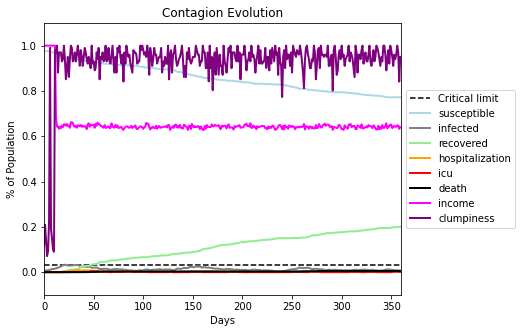

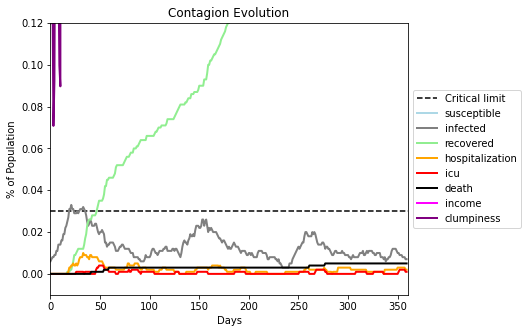

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)

Save these seeds if you want to rerun a scenario
[9675]
Max is 0.9768436772674389 but chosen is 0.35028196905106124 for temperature 0
Max is 0.9900458300942885 but chosen is 0.11845830059863995 for temperature 0
Max is 0.9959613209113832 but chosen is 0.017131543355686663 for temperature 0
Max is 0.9892132454556074 but chosen is 0.583885358187599 for temperature 0
Max is 0.9955761729632544 but chosen is 0.9741321636612958 for temperature 0
Max is 0.9919959161743589 but chosen is -0.2716954288575998 for temperature 0
Max is 0.9925179117988049 but chosen is 0.9791549561626377 for temperature 0
Max is 0.9975833708370314 but chosen is -0.3252358970883766 for temperature 0
Max is 0.9937465021085714 but chosen is 0.056732019446124674 for temperature 0
Max is 0.9956992980686488 but chosen is 0.5353624194856041 for temperature 0
Max is 0.9949476616613584 but chosen is 0.2877234505008249 for temperature 0
Max is 0.9939003239931483 but chosen is -0.2559677949121711 for temperature 0
Max is 0.992

Max is 0.9941179302626569 but chosen is -0.01759376338880638 for temperature 0
Max is 0.9949372063849683 but chosen is -0.03746583854349987 for temperature 0
Max is 0.993639929612598 but chosen is 0.06016349967892126 for temperature 0
Max is 0.9892151787998495 but chosen is 0.16434706734713592 for temperature 0
Max is 0.9947576853611234 but chosen is -0.20711029137961148 for temperature 0
Max is 0.9923638520365119 but chosen is 0.10277756581034035 for temperature 0
Max is 0.9884398992995196 but chosen is 0.278300055897071 for temperature 0
Max is 0.995010377164559 but chosen is 0.7321969339058425 for temperature 0
Max is 0.9903245849646805 but chosen is -0.23754436411207228 for temperature 0
Max is 0.996787444694656 but chosen is -0.12583534815541533 for temperature 0
Max is 0.9905031846963643 but chosen is 0.13507990622354937 for temperature 0
Max is 0.9733627590282122 but chosen is 0.38066478157295836 for temperature 0
Max is 0.9960626206083563 but chosen is 0.2508016238836856 for te

Max is 0.981494589967452 but chosen is 0.0167968943546 for temperature 0
Max is 0.993953172843152 but chosen is -0.267715197011111 for temperature 0
Max is 0.9963287863477197 but chosen is -0.37236174400307287 for temperature 0
Max is 0.9939027723110357 but chosen is 0.28310076984622906 for temperature 0
Max is 0.9958153211960465 but chosen is 0.9848875479422413 for temperature 0
Max is 0.9943867328712337 but chosen is 0.05667977323416578 for temperature 0
Max is 0.9943933707855404 but chosen is 0.08459254445021758 for temperature 0
Max is 0.9883697229375458 but chosen is -0.6993418423634289 for temperature 0
Max is 0.9960907971863814 but chosen is -0.16221608093230297 for temperature 0
Max is 0.9948745776632693 but chosen is -0.012453187724834822 for temperature 0
Max is 0.9953066003676265 but chosen is 0.11629891801886344 for temperature 0
Max is 0.997754262154387 but chosen is -0.02894165445753026 for temperature 0
Max is 0.9930892230234967 but chosen is 0.9822175871370274 for tempe

Max is 0.9850656558418863 but chosen is 0.6140328827318058 for temperature 0
Max is 0.9835333097957343 but chosen is 0.40194975051199056 for temperature 0
Max is 0.9953917289047348 but chosen is 0.21129126845220972 for temperature 0
Max is 0.9890545270250769 but chosen is -0.046697653260371605 for temperature 0
Max is 0.9888593754459769 but chosen is -0.12405435287172889 for temperature 0
Max is 0.9954169394475895 but chosen is 0.9585537203652514 for temperature 0
Max is 0.9904831266531304 but chosen is 0.591485486202224 for temperature 0
Max is 0.9952098568337299 but chosen is 0.5351447922858042 for temperature 0
Max is 0.9889628440438546 but chosen is 0.020083330335947627 for temperature 0
Max is 0.9759455691998307 but chosen is 0.3256454830479716 for temperature 0
Max is 0.9963295112750626 but chosen is -0.029629308454183968 for temperature 0
Max is 0.9863508720491961 but chosen is 0.42213747588054146 for temperature 0
Max is 0.9880259803903283 but chosen is -0.2849426225344112 for 

Max is 0.9955574188911881 but chosen is -0.17745127661348967 for temperature 0
Max is 0.9964222171123321 but chosen is 0.9908650542546958 for temperature 0
Max is 0.9919172029779895 but chosen is 0.9653353488347532 for temperature 0
Max is 0.9939023908850971 but chosen is 0.3345214968144699 for temperature 0
Max is 0.9956542770504794 but chosen is -0.3463665057548767 for temperature 0
Max is 0.986084576563387 but chosen is 0.09829697200835615 for temperature 0
Max is 0.9932478196204134 but chosen is 0.5417726987795168 for temperature 0
Max is 0.9939078867487291 but chosen is 0.20237839611289232 for temperature 0
Max is 0.9906415319596759 but chosen is 0.9500688484052275 for temperature 0
Max is 0.9894647241728188 but chosen is -0.2785280044490221 for temperature 0
Max is 0.9941549873794365 but chosen is 0.2721791039313862 for temperature 0
Max is 0.9848214002589286 but chosen is 0.9808303593842506 for temperature 0
Max is 0.9962042776226355 but chosen is 0.3507076157359607 for temperat

Max is 0.9855017496069879 but chosen is -0.22326666323227065 for temperature 0
Max is 0.9913489967878277 but chosen is 0.9703035126770246 for temperature 0
Max is 0.9829887888538692 but chosen is 0.04385032381631926 for temperature 0
Max is 0.9939485133859908 but chosen is 0.026601240751819077 for temperature 0
Max is 0.9885418117539457 but chosen is -0.01077311350832323 for temperature 0
Max is 0.9878507036971383 but chosen is 0.12593846303720527 for temperature 0
Max is 0.9728992002388187 but chosen is 0.23380940216976792 for temperature 0
Max is 0.9930680300126031 but chosen is -0.10016343870985894 for temperature 0
Max is 0.9800484542781476 but chosen is 0.9654488374376665 for temperature 0
Max is 0.9826503857335213 but chosen is 0.31884351891646456 for temperature 0
Max is 0.9929181032557142 but chosen is 0.515995405042671 for temperature 0
Max is 0.9824195654386281 but chosen is -0.2553020856807757 for temperature 0
Max is 0.9799673588970652 but chosen is -0.21613607230092274 for

Max is 0.9942042959901917 but chosen is 0.9741799944043492 for temperature 0
Max is 0.9939027723110357 but chosen is 0.9814643416287774 for temperature 0
Max is 0.9937088302963692 but chosen is 0.9696307006146401 for temperature 0
Max is 0.99153553109428 but chosen is 0.9773768988710783 for temperature 0
Max is 0.9951677250029598 but chosen is 0.9899242822456038 for temperature 0
Max is 0.9953917289047348 but chosen is 0.9804955166980006 for temperature 0
Max is 0.9940232742769963 but chosen is 0.9738322565535069 for temperature 0
Max is 0.9963535082678375 but chosen is 0.9868005035606516 for temperature 0
Max is 0.9962042776226355 but chosen is 0.9883787191544329 for temperature 0
Max is 0.9964218383731753 but chosen is 0.9801804525286612 for temperature 0
Max is 0.995273324471566 but chosen is 0.9838519295946453 for temperature 0
Max is 0.9964469798918693 but chosen is 0.993003390028676 for temperature 0
Max is 0.9926909677661794 but chosen is 0.9852176613621253 for temperature 0
Max

Max is 0.9957978447896765 but chosen is 0.9873893245413626 for temperature 0
Max is 0.9946029324175119 but chosen is 0.9924948269994908 for temperature 0
Max is 0.9964715019557848 but chosen is 0.9945906448967065 for temperature 0
Max is 0.9941732826034182 but chosen is 0.9775529781149183 for temperature 0
Max is 0.9949147488784132 but chosen is 0.9845838881169329 for temperature 0
Max is 0.9943627343221553 but chosen is 0.9806111309267715 for temperature 0
Max is 0.9929141326188037 but chosen is 0.9863229198378012 for temperature 0
Max is 0.99722848115783 but chosen is 0.9852457006922045 for temperature 0
Max is 0.9923969311831962 but chosen is 0.9899135380585401 for temperature 0
Max is 0.9973399712979368 but chosen is 0.9918280523854157 for temperature 0
Max is 0.9926646228124733 but chosen is 0.9851382352191785 for temperature 0
Max is 0.990621978538553 but chosen is 0.9790069879989746 for temperature 0
Max is 0.9961329384574998 but chosen is 0.9855277499238801 for temperature 0
Ma

Max is 0.9956524950057611 but chosen is 0.9710439520966363 for temperature 0
Max is 0.9924857026664561 but chosen is 0.9885640626759284 for temperature 0
Max is 0.9979380188789237 but chosen is 0.993151971439169 for temperature 0
Max is 0.996471501955785 but chosen is 0.9951629752084739 for temperature 0
Max is 0.9963535082678375 but chosen is 0.9790367808200825 for temperature 0
Max is 0.9944227602412664 but chosen is 0.984178264094705 for temperature 0
Max is 0.9962975391094941 but chosen is 0.9879494126476157 for temperature 0
Max is 0.9970753629662436 but chosen is 0.9865007047885592 for temperature 0
Max is 0.9940232742769963 but chosen is 0.9742527202886404 for temperature 0
Max is 0.9955986894270095 but chosen is 0.9796701671396908 for temperature 0
tup_vec1 not in keepset of size 68
Max is 0.99541406831981 but chosen is 0.9889442462112011 for temperature 0
Max is 0.9969462806191836 but chosen is 0.994511428382558 for temperature 0
Max is 0.9971343039843199 but chosen is 0.99036

Max is 0.9964469798918693 but chosen is 0.9914484613531515 for temperature 0
Max is 0.9942520371919317 but chosen is 0.9820581604046853 for temperature 0
Max is 0.9977569844939326 but chosen is 0.9767859862252845 for temperature 0
Max is 0.9964347577390412 but chosen is 0.9919133487588981 for temperature 0
Max is 0.9979380188789237 but chosen is 0.9935984529317324 for temperature 0
Max is 0.9973540804526791 but chosen is 0.9819121854166527 for temperature 0
Max is 0.9912883378530539 but chosen is 0.9849888152466746 for temperature 0
Max is 0.9952753213042648 but chosen is 0.9877718539078888 for temperature 0
Max is 0.9953917289047348 but chosen is 0.9882483317281235 for temperature 0
Max is 0.9962321946788398 but chosen is 0.9919276082292386 for temperature 0
Max is 0.9957978447896765 but chosen is 0.9883048222705343 for temperature 0
tup_vec1 not in keepset of size 61
Max is 0.9962042776226355 but chosen is 0.9866950134264834 for temperature 0
Max is 0.9944517893041076 but chosen is 0

Max is 0.9932957632492619 but chosen is 0.9794083379844207 for temperature 0
Max is 0.9849974085270462 but chosen is 0.9728718744440102 for temperature 0
Max is 0.9959438256067354 but chosen is 0.9796666516950101 for temperature 0
Max is 0.9862215444997808 but chosen is 0.9570685768703806 for temperature 0
Max is 0.9937652416920554 but chosen is 0.972215514030869 for temperature 0
Max is 0.9940621998096878 but chosen is 0.9605917499888236 for temperature 0
Max is 0.9905142425280477 but chosen is 0.9785780801842315 for temperature 0
Max is 0.9942509695875449 but chosen is 0.9508895091719247 for temperature 0
Max is 0.9906568515294595 but chosen is 0.953382720265287 for temperature 0
Max is 0.9844850161175499 but chosen is 0.9495547365705039 for temperature 0
Max is 0.9932290807740186 but chosen is 0.9719490015019179 for temperature 0
Max is 0.9856753086808665 but chosen is 0.9600570104023683 for temperature 0
Max is 0.9928282935814394 but chosen is 0.9709319359808953 for temperature 0
M

Max is 0.9959331942549424 but chosen is 0.9724952092692563 for temperature 0
tup_vec1 not in keepset of size 33
Max is 0.9863244943067284 but chosen is 0.9705915338444875 for temperature 0
Max is 0.9892212450671288 but chosen is 0.9512833814566972 for temperature 0
Max is 0.988185650135793 but chosen is 0.9692308620277474 for temperature 0
Max is 0.992652415057398 but chosen is 0.989428204086713 for temperature 0
Max is 0.9901565440004959 but chosen is 0.9759220900563783 for temperature 0
Max is 0.9881833200854834 but chosen is 0.9465341452515121 for temperature 0
Max is 0.969507542927239 but chosen is 0.907383605869023 for temperature 0
Max is 0.9844428550648593 but chosen is 0.977999259158819 for temperature 0
Max is 0.9891284568582852 but chosen is 0.9822465360969169 for temperature 0
Max is 0.9921349957856787 but chosen is 0.9696253490766794 for temperature 0
Max is 0.9855602399064293 but chosen is 0.9652368945055657 for temperature 0
Max is 0.9890985093781253 but chosen is 0.96383

Max is 0.9780152966922728 but chosen is 0.9561279723167725 for temperature 0
Max is 0.9874107913044718 but chosen is 0.9566056984485589 for temperature 0
Max is 0.9909460246588465 but chosen is 0.9501027584980184 for temperature 0
Max is 0.9766420582519009 but chosen is 0.9414098196896888 for temperature 0
Max is 0.9836642379243478 but chosen is 0.940956584404761 for temperature 0
Max is 0.9923678137824523 but chosen is 0.9808589072769407 for temperature 0
Max is 0.9779755158622012 but chosen is 0.9465809995853827 for temperature 0
Max is 0.9932038063401433 but chosen is 0.9412960013116756 for temperature 0
Max is 0.9783208469290721 but chosen is 0.890596562359563 for temperature 0
Max is 0.9783816676318793 but chosen is 0.9009291824356156 for temperature 0
Max is 0.9842478399008655 but chosen is 0.916503456948928 for temperature 0
Max is 0.9816074582991844 but chosen is 0.9723873179935811 for temperature 0
Max is 0.9946691402547981 but chosen is 0.9892096944955269 for temperature 0
Ma

Max is 0.9832520772318784 but chosen is 0.9581802836205289 for temperature 0
Max is 0.9835018314803355 but chosen is 0.9521926637169774 for temperature 0
Max is 0.9836642379243478 but chosen is 0.9702756077710224 for temperature 0
Max is 0.9792350305457128 but chosen is 0.9556129481009057 for temperature 0
Max is 0.9932038063401433 but chosen is 0.9637928490484121 for temperature 0
Max is 0.9870656761383135 but chosen is 0.9622030483530557 for temperature 0
Max is 0.9892820261698999 but chosen is 0.9408384286435305 for temperature 0
Max is 0.9847586469257019 but chosen is 0.9067805101893078 for temperature 0
Max is 0.9860662995852169 but chosen is 0.961221623455489 for temperature 0
Max is 0.9912454313604371 but chosen is 0.9520201665032527 for temperature 0
Max is 0.9855687616957306 but chosen is 0.926447844516841 for temperature 0
Max is 0.9847419156564873 but chosen is 0.9561798193756705 for temperature 0
Max is 0.9871326940572831 but chosen is 0.9680068098497905 for temperature 0
M

Max is 0.9832520772318784 but chosen is 0.9532763799814488 for temperature 0
Max is 0.9786526964701091 but chosen is 0.9593446817948894 for temperature 0
Max is 0.98477359514415 but chosen is 0.971369992475175 for temperature 0
Max is 0.9913591528737337 but chosen is 0.9657161769779995 for temperature 0
Max is 0.9734554025985255 but chosen is 0.969285089629849 for temperature 0
Max is 0.9822323710573775 but chosen is 0.9654280889068314 for temperature 0
Max is 0.9906938527778844 but chosen is 0.9598973075933279 for temperature 0
Max is 0.9870656761383135 but chosen is 0.9811055306334748 for temperature 0
Max is 0.9892096944955269 but chosen is 0.9713622952863722 for temperature 0
Max is 0.9892132454556074 but chosen is 0.9593862508489364 for temperature 0
Max is 0.9881192319103225 but chosen is 0.9496602975525281 for temperature 0
Max is 0.9930809115187288 but chosen is 0.9835967636780308 for temperature 0
tup_vec1 not in keepset of size 38
Max is 0.9855687616957306 but chosen is 0.964

Max is 0.9937921449566065 but chosen is 0.9896035897965462 for temperature 0
Max is 0.9926453581227707 but chosen is 0.9907744724508167 for temperature 0
Max is 0.9920461246955258 but chosen is 0.9756471013379467 for temperature 0
Max is 0.9907897679885287 but chosen is 0.9760092372634909 for temperature 0
Max is 0.9875288668923085 but chosen is 0.9690092782210955 for temperature 0
Max is 0.9906408253834186 but chosen is 0.9760717792011486 for temperature 0
Max is 0.9850546201263292 but chosen is 0.9817824360451051 for temperature 0
Max is 0.9866535046069328 but chosen is 0.9729738913374091 for temperature 0
Max is 0.9894619354271242 but chosen is 0.9656644744606224 for temperature 0
Max is 0.9907175142984181 but chosen is 0.9882079905605948 for temperature 0
Max is 0.9889952179304604 but chosen is 0.9821600139708324 for temperature 0
tup_vec1 not in keepset of size 8
Max is 0.990704431060449 but chosen is 0.9787077649750503 for temperature 0
Max is 0.98258650622543 but chosen is 0.978

Max is 0.9939959946499086 but chosen is 0.9862589110953578 for temperature 0
Max is 0.9966087743847845 but chosen is 0.9727386633419108 for temperature 0
Max is 0.9910336469124895 but chosen is 0.9866945206457802 for temperature 0
Max is 0.9972406974966297 but chosen is 0.9754798986002648 for temperature 0
Max is 0.9882911211351884 but chosen is 0.977708635587597 for temperature 0
Max is 0.9926491029885819 but chosen is 0.9888210370798965 for temperature 0
Max is 0.9937921449566065 but chosen is 0.9853706223861464 for temperature 0
Max is 0.9945062206180889 but chosen is 0.97197548034256 for temperature 0
Max is 0.9973244109694556 but chosen is 0.9760092372634909 for temperature 0
Max is 0.9923741329915176 but chosen is 0.9668701982177109 for temperature 0
Max is 0.9918328392164895 but chosen is 0.9723055745878839 for temperature 0
Max is 0.9926925666926688 but chosen is 0.9866282090999196 for temperature 0
Max is 0.996090797186381 but chosen is 0.9943538793552584 for temperature 0
Max

Max is 0.9967514261723833 but chosen is 0.988990878219275 for temperature 0
Max is 0.998369773603538 but chosen is 0.992006269257466 for temperature 0
Max is 0.9961187456286481 but chosen is 0.9779128349035588 for temperature 0
Max is 0.9922141775546133 but chosen is 0.9920246987170196 for temperature 0
Max is 0.9946878586088063 but chosen is 0.9913976122148946 for temperature 0
Max is 0.9955749308331026 but chosen is 0.9950398608656522 for temperature 0
Max is 0.9963351748330123 but chosen is 0.9851847005199654 for temperature 0
Max is 0.9942056378782647 but chosen is 0.9899977188424435 for temperature 0
Max is 0.9970753629662436 but chosen is 0.9882850407583434 for temperature 0
Max is 0.9956785169976592 but chosen is 0.9875828577624209 for temperature 0
Max is 0.9951677250029598 but chosen is 0.9891657213810888 for temperature 0
Max is 0.996778315142896 but chosen is 0.9864688024010371 for temperature 0
Max is 0.9963535082678375 but chosen is 0.9941667807745747 for temperature 0
Max

Max is 0.9949147488784132 but chosen is 0.9830672972490727 for temperature 0
Max is 0.9972284811578302 but chosen is 0.9890741846232697 for temperature 0
Max is 0.9945906448967065 but chosen is 0.9719606147505392 for temperature 0
Max is 0.9933335322345322 but chosen is 0.9655164650212251 for temperature 0
Max is 0.9956785169976592 but chosen is 0.9920362827670045 for temperature 0
Max is 0.9963535082678375 but chosen is 0.9855144283693421 for temperature 0
Max is 0.9964469798918693 but chosen is 0.9848112976767207 for temperature 0
Max is 0.9948465982161763 but chosen is 0.9894368824831252 for temperature 0
Max is 0.9956266432380156 but chosen is 0.9827378675171458 for temperature 0
Max is 0.9904620050534165 but chosen is 0.9825742673459689 for temperature 0
Max is 0.9963575841772891 but chosen is 0.9747601544567999 for temperature 0
Max is 0.9957978447896765 but chosen is 0.9679238286163916 for temperature 0
tup_vec1 not in keepset of size 41
Max is 0.9956266432380156 but chosen is 0

Max is 0.9970753629662436 but chosen is 0.9892619081032906 for temperature 0
Max is 0.995060309359512 but chosen is 0.9796462119598602 for temperature 0
Max is 0.9932689648532106 but chosen is 0.9926909677661794 for temperature 0
Max is 0.9980260052404373 but chosen is 0.9913472146448554 for temperature 0
Max is 0.9948926904716157 but chosen is 0.9823678184874088 for temperature 0
Max is 0.9893302261354122 but chosen is 0.9842028081993168 for temperature 0
Max is 0.9955903710696692 but chosen is 0.9936456146796238 for temperature 0
Max is 0.9973399712979367 but chosen is 0.9890224940861885 for temperature 0
Max is 0.9927562154385025 but chosen is 0.982806607977944 for temperature 0
Max is 0.9934919699469548 but chosen is 0.9920796482174233 for temperature 0
Max is 0.9951388343984915 but chosen is 0.9925971473055427 for temperature 0
Max is 0.9936761266736015 but chosen is 0.9903089921021963 for temperature 0
Max is 0.9941667807745747 but chosen is 0.9859324061054657 for temperature 0
M

Max is 0.9822218432775669 but chosen is 0.980500121403677 for temperature 0
Max is 0.9909889354475807 but chosen is 0.9893119781061798 for temperature 0
Max is 0.9911513574530976 but chosen is 0.9751611068921681 for temperature 0
Max is 0.9851304427857415 but chosen is 0.9820907452627043 for temperature 0
Max is 0.9931151675317405 but chosen is 0.9801892647274634 for temperature 0
Max is 0.9944966505541801 but chosen is 0.9907948632489143 for temperature 0
Max is 0.9942386823163242 but chosen is 0.9807837232814363 for temperature 0
Max is 0.9964347577390412 but chosen is 0.9954140683198103 for temperature 0
Max is 0.99613486587755 but chosen is 0.9861292055634394 for temperature 0
Max is 0.9942095553770603 but chosen is 0.9787980737195898 for temperature 0
Max is 0.9948175433197098 but chosen is 0.9733162262454405 for temperature 0
Max is 0.9923638520365119 but chosen is 0.9660472830172604 for temperature 0
Max is 0.9952753213042648 but chosen is 0.9907787582329656 for temperature 0
Ma

Max is 0.9886634043083559 but chosen is 0.944699456823058 for temperature 0
Max is 0.9929333883607305 but chosen is 0.9745989144323413 for temperature 0
Max is 0.9948740812240634 but chosen is 0.9688811113892952 for temperature 0
Max is 0.9901342763878007 but chosen is 0.9727624433295003 for temperature 0
Max is 0.9899403940623808 but chosen is 0.9535004859391227 for temperature 0
Max is 0.9794976793827322 but chosen is 0.9791188641844017 for temperature 0
Max is 0.9932290807740186 but chosen is 0.9883341127291028 for temperature 0
Max is 0.9929336561753633 but chosen is 0.9649720651671024 for temperature 0
Max is 0.9874918281693991 but chosen is 0.9694469609287111 for temperature 0
Max is 0.9937652416920554 but chosen is 0.9663173319523377 for temperature 0
Max is 0.9897079480772578 but chosen is 0.955747952020065 for temperature 0
Max is 0.9921349957856787 but chosen is 0.98352075000907 for temperature 0
Max is 0.9928282935814394 but chosen is 0.9895279002535006 for temperature 0
Max

Max is 0.9808350415419282 but chosen is 0.9739465003360102 for temperature 0
Max is 0.9928282935814394 but chosen is 0.977698929691307 for temperature 0
Max is 0.9911469222322687 but chosen is 0.9601828738867967 for temperature 0
Max is 0.9880623409832937 but chosen is 0.9516145131188718 for temperature 0
Max is 0.9862215444997808 but chosen is 0.9747175229122221 for temperature 0
Max is 0.9926832036278902 but chosen is 0.9721973297096775 for temperature 0
Max is 0.9899403940623808 but chosen is 0.9791253078995931 for temperature 0
Max is 0.9903810426807881 but chosen is 0.9822266471386109 for temperature 0
Max is 0.9869846628747525 but chosen is 0.9699697089382117 for temperature 0
Max is 0.9959438256067354 but chosen is 0.9871479179442413 for temperature 0
Max is 0.9893262112196053 but chosen is 0.9638571876948139 for temperature 0
Max is 0.9901342763878007 but chosen is 0.9361228303390329 for temperature 0
Max is 0.9765734795003238 but chosen is 0.9748613609237115 for temperature 0


Max is 0.9905142425280477 but chosen is 0.9795915311378797 for temperature 0
Max is 0.9852946620010563 but chosen is 0.9714328475915627 for temperature 0
Max is 0.9897622324482244 but chosen is 0.9801285805800362 for temperature 0
Max is 0.9937652416920554 but chosen is 0.9482009332806034 for temperature 0
Max is 0.9791188641844017 but chosen is 0.9512795185256926 for temperature 0
Max is 0.9926832036278902 but chosen is 0.9752578392869651 for temperature 0
Max is 0.9929333883607305 but chosen is 0.986511458092038 for temperature 0
Max is 0.9936788825296571 but chosen is 0.9831127718979489 for temperature 0
Max is 0.9907536275128092 but chosen is 0.9746126036767256 for temperature 0
Max is 0.9846505150504014 but chosen is 0.9812560683405915 for temperature 0
Max is 0.9944442301712166 but chosen is 0.9576816997471008 for temperature 0
Max is 0.9886634043083559 but chosen is 0.9669748598953588 for temperature 0
Max is 0.9890594056785429 but chosen is 0.9757022070180023 for temperature 0


Max is 0.9836531161610136 but chosen is 0.9689016254439077 for temperature 0
Max is 0.9888593754459769 but chosen is 0.9812916789262379 for temperature 0
Max is 0.98477359514415 but chosen is 0.9516961996041179 for temperature 0
Max is 0.9634143674208384 but chosen is 0.9586032622791907 for temperature 0
Max is 0.983524104132063 but chosen is 0.958178926235627 for temperature 0
Max is 0.975300949111911 but chosen is 0.949977851301005 for temperature 0
Max is 0.9870537857327925 but chosen is 0.9723984808508093 for temperature 0
tup_vec1 not in keepset of size 10
Max is 0.9836531161610136 but chosen is 0.9631566063298163 for temperature 0
Max is 0.9779128134601953 but chosen is 0.9506954884475285 for temperature 0
Max is 0.9787056268562989 but chosen is 0.9749764785341276 for temperature 0
Max is 0.976290213609753 but chosen is 0.9474140066462414 for temperature 0
Max is 0.9787393439089294 but chosen is 0.9702866304789723 for temperature 0
Max is 0.9840274493236613 but chosen is 0.970685

Max is 0.9926466888433889 but chosen is 0.9507499041709324 for temperature 0
Max is 0.9759455691998307 but chosen is 0.9551503731877948 for temperature 0
Max is 0.9768436772674389 but chosen is 0.9529462491865373 for temperature 0
Max is 0.9932961700113448 but chosen is 0.9750413785671278 for temperature 0
Max is 0.9913591528737337 but chosen is 0.9457518035310505 for temperature 0
Max is 0.9786526964701091 but chosen is 0.9323706078849987 for temperature 0
Max is 0.9932038063401433 but chosen is 0.9505918540156261 for temperature 0
Max is 0.9923678137824523 but chosen is 0.977937672316026 for temperature 0
Max is 0.9780152966922728 but chosen is 0.9642471633282211 for temperature 0
Max is 0.9874107913044718 but chosen is 0.9738045518407511 for temperature 0
Max is 0.9819172164083154 but chosen is 0.9621762407709521 for temperature 0
Max is 0.9821100642340888 but chosen is 0.9683772485684367 for temperature 0
Max is 0.9941179302626569 but chosen is 0.9466781452604699 for temperature 0


Max is 0.9938836552571088 but chosen is 0.979798368719425 for temperature 0
Max is 0.9956542770504793 but chosen is 0.9804479461469308 for temperature 0
Max is 0.9930762278057143 but chosen is 0.9641994066180127 for temperature 0
Max is 0.9856911263779649 but chosen is 0.975538013941155 for temperature 0
Max is 0.9954613182709457 but chosen is 0.98051284526388 for temperature 0
Max is 0.9950635350569327 but chosen is 0.9607773791371054 for temperature 0
Max is 0.9908460453061537 but chosen is 0.9824111260119069 for temperature 0
Max is 0.9966087743847842 but chosen is 0.985392503543646 for temperature 0
Max is 0.9908390232984651 but chosen is 0.988995274854976 for temperature 0
Max is 0.9972406974966297 but chosen is 0.9938357590199731 for temperature 0
Max is 0.9923174131968171 but chosen is 0.9887349308448905 for temperature 0
Max is 0.9945832132486518 but chosen is 0.9832581962193527 for temperature 0
tup_vec1 not in keepset of size 47
Max is 0.9968446637194017 but chosen is 0.97764

Max is 0.9932049464288037 but chosen is 0.9854780826865615 for temperature 0
Max is 0.9978900997063935 but chosen is 0.9914895425715974 for temperature 0
Max is 0.9945832132486518 but chosen is 0.9795638452503532 for temperature 0
Max is 0.9923741329915173 but chosen is 0.9828563670841737 for temperature 0
Max is 0.9944480700031826 but chosen is 0.9740774633683071 for temperature 0
Max is 0.9901774093988505 but chosen is 0.9775291882880358 for temperature 0
Max is 0.9981522245709632 but chosen is 0.9863565653062192 for temperature 0
Max is 0.9924341055659547 but chosen is 0.9830866133788964 for temperature 0
Max is 0.9930762278057143 but chosen is 0.9669177297728314 for temperature 0
Max is 0.9925949876233086 but chosen is 0.9860422239755849 for temperature 0
Max is 0.9915576213006486 but chosen is 0.974336278511493 for temperature 0
tup_vec1 not in keepset of size 35
Max is 0.98949597638165 but chosen is 0.9628380252532001 for temperature 0
Max is 0.9883626251997469 but chosen is 0.96

Max is 0.9856665858505544 but chosen is 0.9769180803118149 for temperature 0
Max is 0.9925567758136021 but chosen is 0.9765799252279519 for temperature 0
Max is 0.9899498133800134 but chosen is 0.9592490463376299 for temperature 0
Max is 0.9864865750127613 but chosen is 0.9627426892308538 for temperature 0
Max is 0.991295845174641 but chosen is 0.9802283608815064 for temperature 0
Max is 0.982500178944407 but chosen is 0.9610235494495467 for temperature 0
Max is 0.99129203797326 but chosen is 0.9811250439566896 for temperature 0
Max is 0.9895169838804256 but chosen is 0.988704248556041 for temperature 0
Max is 0.9927776976554668 but chosen is 0.9883213650481208 for temperature 0
Max is 0.9955581655889615 but chosen is 0.9868262395910965 for temperature 0
Max is 0.9875297820080506 but chosen is 0.9834848962076963 for temperature 0
Max is 0.9873866124908801 but chosen is 0.9709313711577715 for temperature 0
tup_vec1 not in keepset of size 4
Max is 0.9967179811921223 but chosen is 0.96462

Max is 0.9944658905310746 but chosen is 0.979665366476903 for temperature 0
Max is 0.9940310326964997 but chosen is 0.9661375092185122 for temperature 0
Max is 0.9905327630390922 but chosen is 0.9742872960783319 for temperature 0
Max is 0.9954077797299062 but chosen is 0.9608283934143558 for temperature 0
Max is 0.9910849516244259 but chosen is 0.9661390244806567 for temperature 0
Max is 0.9965658844881623 but chosen is 0.9905099185760938 for temperature 0
Max is 0.9968714684812539 but chosen is 0.9849928231784969 for temperature 0
Max is 0.9928359531112679 but chosen is 0.967127857732104 for temperature 0
Max is 0.9905371681690089 but chosen is 0.9848679824666102 for temperature 0
Max is 0.9951272506481531 but chosen is 0.9775664404442214 for temperature 0
Max is 0.9930386508751394 but chosen is 0.9758416800486329 for temperature 0
Max is 0.991899823246336 but chosen is 0.9810988169164501 for temperature 0
Max is 0.9947886551267925 but chosen is 0.972032851910664 for temperature 0
Max

Max is 0.9955581655889617 but chosen is 0.9816681825202321 for temperature 0
Max is 0.9959940623907642 but chosen is 0.98733449761899 for temperature 0
Max is 0.9950611914199823 but chosen is 0.9789493075736423 for temperature 0
Max is 0.9937040078862007 but chosen is 0.9748688833258647 for temperature 0
Max is 0.9967179811921223 but chosen is 0.9833870944344024 for temperature 0
Max is 0.9950422184669684 but chosen is 0.9839995022805539 for temperature 0
Max is 0.9953783626985587 but chosen is 0.9826487864698744 for temperature 0
Max is 0.9890545270250769 but chosen is 0.9468603900875746 for temperature 0
Max is 0.9885286061053358 but chosen is 0.9836217785231324 for temperature 0
Max is 0.995578204606019 but chosen is 0.9890626471690717 for temperature 0
Max is 0.9949372063849683 but chosen is 0.9765450934900465 for temperature 0
Max is 0.9944658905310746 but chosen is 0.9751445244267546 for temperature 0
Max is 0.9900859600885737 but chosen is 0.9724064055650837 for temperature 0
Ma

Max is 0.9967179811921223 but chosen is 0.9803322822621116 for temperature 0
Max is 0.9928428784889521 but chosen is 0.9805983649573732 for temperature 0
Max is 0.9946353558352614 but chosen is 0.9773336311599107 for temperature 0
Max is 0.9934115610500397 but chosen is 0.9865128175841583 for temperature 0
Max is 0.9927213910538143 but chosen is 0.9889420683476524 for temperature 0
Max is 0.9942562901111965 but chosen is 0.9791940613000701 for temperature 0
Max is 0.9927181372301189 but chosen is 0.990376138668213 for temperature 0
Max is 0.9967835442635911 but chosen is 0.9887009458630834 for temperature 0
Max is 0.9909948806310918 but chosen is 0.9868116394733711 for temperature 0
Max is 0.995378362698559 but chosen is 0.9819443934281027 for temperature 0
Max is 0.9943393484040702 but chosen is 0.9817016312386364 for temperature 0
Max is 0.9905327630390924 but chosen is 0.9836674356799646 for temperature 0
Max is 0.9931276942239109 but chosen is 0.9660734529213493 for temperature 0
M

Max is 0.9931276942239109 but chosen is 0.9905906416526412 for temperature 0
Max is 0.993550626837188 but chosen is 0.9834084398511056 for temperature 0
Max is 0.9916337738121089 but chosen is 0.9782113942652735 for temperature 0
Max is 0.9892310040198469 but chosen is 0.979549748874753 for temperature 0
Max is 0.9934115610500396 but chosen is 0.9900640415467156 for temperature 0
Max is 0.9915066543030983 but chosen is 0.982417943940323 for temperature 0
Max is 0.992902786170613 but chosen is 0.981198303463434 for temperature 0
Max is 0.9895321381024056 but chosen is 0.9844964715417335 for temperature 0
Max is 0.9967835442635911 but chosen is 0.9950011294865463 for temperature 0
Max is 0.9953001413411189 but chosen is 0.9751023853617138 for temperature 0
Max is 0.9878604334416999 but chosen is 0.9877530695713169 for temperature 0
Max is 0.9936786049123334 but chosen is 0.9362829791059238 for temperature 0
Max is 0.9791146709890358 but chosen is 0.9587328968887517 for temperature 0
Max 

Max is 0.9816504093718842 but chosen is 0.9689815941849361 for temperature 0
Max is 0.9859326600224338 but chosen is 0.9693010727110374 for temperature 0
Max is 0.9922813306541336 but chosen is 0.9713745018021847 for temperature 0
tup_vec1 not in keepset of size 11
Max is 0.9838434323619625 but chosen is 0.933115487468571 for temperature 0
Max is 0.97966466939765 but chosen is 0.9465374430004466 for temperature 0
Max is 0.9851303338386325 but chosen is 0.9767678686154858 for temperature 0
Max is 0.9722913210826898 but chosen is 0.9529621717844866 for temperature 0
Max is 0.9801079732103558 but chosen is 0.9800941472071101 for temperature 0
Max is 0.9835144278314987 but chosen is 0.9794145332244765 for temperature 0
Max is 0.9658625148497467 but chosen is 0.9349291063701084 for temperature 0
Max is 0.9889155741657212 but chosen is 0.9617445798198585 for temperature 0
Max is 0.9903144940591705 but chosen is 0.9802678942391349 for temperature 0
Max is 0.9904831266531304 but chosen is 0.96

Max is 0.9968837747586826 but chosen is 0.9837124061050238 for temperature 0
Max is 0.9948498962292762 but chosen is 0.9855933602823559 for temperature 0
Max is 0.9950419351003906 but chosen is 0.9823540624073447 for temperature 0
Max is 0.9931702300320959 but chosen is 0.9752284764977576 for temperature 0
Max is 0.9888932519717778 but chosen is 0.9644304245767279 for temperature 0
Max is 0.9950531715813226 but chosen is 0.9803408145049038 for temperature 0
Max is 0.9933623670108527 but chosen is 0.9673143832306715 for temperature 0
Max is 0.993155617787133 but chosen is 0.982908464778132 for temperature 0
Max is 0.9942492640376953 but chosen is 0.9880590997925877 for temperature 0
Max is 0.9944395524837804 but chosen is 0.9917943645413689 for temperature 0
Max is 0.995101777569561 but chosen is 0.9846112422027674 for temperature 0
Max is 0.9942940429207963 but chosen is 0.981373894677272 for temperature 0
Max is 0.9946754770265218 but chosen is 0.9736485187135527 for temperature 0
Max

Max is 0.9939854764859511 but chosen is 0.9797144800188565 for temperature 0
Max is 0.9922969427248863 but chosen is 0.9763370393867583 for temperature 0
Max is 0.9906461895345887 but chosen is 0.9762368738578365 for temperature 0
Max is 0.9928657256104194 but chosen is 0.9779517008181101 for temperature 0
Max is 0.9887171408243823 but chosen is 0.9728703521838263 for temperature 0
Max is 0.9962520475908407 but chosen is 0.9876240660946692 for temperature 0
Max is 0.990451486140859 but chosen is 0.9766430555817983 for temperature 0
Max is 0.9917632107593234 but chosen is 0.9776250386337046 for temperature 0
Max is 0.992670363894806 but chosen is 0.9730534064248789 for temperature 0
Max is 0.9940651054852623 but chosen is 0.9923054447967281 for temperature 0
Max is 0.9949866757821894 but chosen is 0.978118808065387 for temperature 0
Max is 0.9769495556347626 but chosen is 0.9754567520507116 for temperature 0
Max is 0.9961002293247792 but chosen is 0.9855989124379345 for temperature 0
Ma

Max is 0.9923181823969544 but chosen is 0.9735557309345038 for temperature 0
Max is 0.9891756424164393 but chosen is 0.9846701770694475 for temperature 0
Max is 0.9898680341674311 but chosen is 0.981998110060078 for temperature 0
Max is 0.9953274346816732 but chosen is 0.9892011243428017 for temperature 0
Max is 0.9927219456341314 but chosen is 0.989591795571794 for temperature 0
Max is 0.995303551788011 but chosen is 0.9949866757821892 for temperature 0
Max is 0.9942010617429549 but chosen is 0.9866613663632936 for temperature 0
Max is 0.9948977941523085 but chosen is 0.9836553481528201 for temperature 0
Max is 0.990451486140859 but chosen is 0.9809317561656449 for temperature 0
Max is 0.9944785632192784 but chosen is 0.981140922472382 for temperature 0
Max is 0.9900433439988456 but chosen is 0.9481263294131861 for temperature 0
Max is 0.9877804337603034 but chosen is 0.9804715299339781 for temperature 0
Max is 0.9971997624538299 but chosen is 0.9812912016588445 for temperature 0
Max 

Max is 0.9909571173820086 but chosen is 0.9723743338713188 for temperature 0
Max is 0.9891789215454443 but chosen is 0.9396992363552341 for temperature 0
Max is 0.9910394158277771 but chosen is 0.9732122271050587 for temperature 0
Max is 0.997430387197174 but chosen is 0.9782319414422341 for temperature 0
Max is 0.995554042722042 but chosen is 0.9765322730952803 for temperature 0
Max is 0.9947576853611234 but chosen is 0.9574666090008394 for temperature 0
Max is 0.9923675769851794 but chosen is 0.9869088970302767 for temperature 0
Max is 0.9948429237697551 but chosen is 0.9648926567654704 for temperature 0
Max is 0.9897590356821389 but chosen is 0.9635539569813355 for temperature 0
Max is 0.9917953066820638 but chosen is 0.9718599999081401 for temperature 0
Max is 0.9945380669328193 but chosen is 0.9721261326822658 for temperature 0
Max is 0.9871788317791518 but chosen is 0.9742323834049119 for temperature 0
Max is 0.9963697307740914 but chosen is 0.9528982273289959 for temperature 0
M

Max is 0.9870069481786118 but chosen is 0.9733586119927398 for temperature 0
Max is 0.9947576853611234 but chosen is 0.9697498908521954 for temperature 0
Max is 0.995554042722042 but chosen is 0.9852665248552009 for temperature 0
Max is 0.9926710372909744 but chosen is 0.9657029982727905 for temperature 0
Max is 0.9845645142509999 but chosen is 0.9659530554086894 for temperature 0
Max is 0.9948429237697551 but chosen is 0.965648830215123 for temperature 0
Max is 0.9893596274001487 but chosen is 0.9702064242307538 for temperature 0
Max is 0.9873762125000594 but chosen is 0.9497967548963725 for temperature 0
Max is 0.9959347623680623 but chosen is 0.9797434477384932 for temperature 0
Max is 0.9956657192076346 but chosen is 0.9820353124248816 for temperature 0
Max is 0.9963697307740914 but chosen is 0.9692794016040872 for temperature 0
Max is 0.9904112708220675 but chosen is 0.9799920081332849 for temperature 0
Max is 0.99366974656809 but chosen is 0.9694831183396818 for temperature 0
Max

Max is 0.9930386508751394 but chosen is 0.9763222552682533 for temperature 0
Max is 0.9954008288921341 but chosen is 0.989142682231031 for temperature 0
Max is 0.9923671372708781 but chosen is 0.9569269055252173 for temperature 0
Max is 0.9817928495683078 but chosen is 0.9560217254394144 for temperature 0
Max is 0.9892310040198469 but chosen is 0.950687672456162 for temperature 0
Max is 0.9914578330037606 but chosen is 0.9844322156778533 for temperature 0
Max is 0.988172867433715 but chosen is 0.9753178336658672 for temperature 0
Max is 0.9931206727476195 but chosen is 0.983020936056969 for temperature 0
Max is 0.9978819337736007 but chosen is 0.9739937779854866 for temperature 0
Max is 0.9906288034153592 but chosen is 0.9621659172915608 for temperature 0
Max is 0.98733449761899 but chosen is 0.9641360892903839 for temperature 0
Max is 0.9936786049123334 but chosen is 0.9693235556512265 for temperature 0
Max is 0.990506670017816 but chosen is 0.9720084900972766 for temperature 0
Max is

Max is 0.9942633365508863 but chosen is 0.9847524666501636 for temperature 0
Max is 0.9969886069276661 but chosen is 0.9885981187142832 for temperature 0
Max is 0.9905371681690089 but chosen is 0.9600819434312405 for temperature 0
Max is 0.9871715729861633 but chosen is 0.9631255596518371 for temperature 0
Max is 0.9909110198435046 but chosen is 0.9734156315059939 for temperature 0
Max is 0.9928111676345494 but chosen is 0.9830489961740159 for temperature 0
Max is 0.9965365459565032 but chosen is 0.9930533091244188 for temperature 0
Max is 0.9937142874057086 but chosen is 0.9805761814169579 for temperature 0
Max is 0.9944658905310746 but chosen is 0.9675751795026192 for temperature 0
Max is 0.9885286061053358 but chosen is 0.9749517381449608 for temperature 0
Max is 0.988314302188915 but chosen is 0.9716162914388321 for temperature 0
Max is 0.9912408937633539 but chosen is 0.9769380895159135 for temperature 0
Max is 0.9874706272754457 but chosen is 0.9694842806314027 for temperature 0


Max is 0.9944658905310745 but chosen is 0.935452887246154 for temperature 0
Max is 0.9928521673885184 but chosen is 0.9740610861705976 for temperature 0
Max is 0.9919213564083014 but chosen is 0.9738093807022726 for temperature 0
Max is 0.9905327630390922 but chosen is 0.9530528493336314 for temperature 0
Max is 0.9904308245398754 but chosen is 0.9694670687831444 for temperature 0
Max is 0.9937198736963532 but chosen is 0.9852575336489013 for temperature 0
Max is 0.9899498133800134 but chosen is 0.9852658564061512 for temperature 0
Max is 0.992902786170613 but chosen is 0.965835411238272 for temperature 0
Max is 0.9978819337736007 but chosen is 0.9892742052934226 for temperature 0
Max is 0.9928814144246325 but chosen is 0.9847668083524875 for temperature 0
Max is 0.9930386508751394 but chosen is 0.9717969996476711 for temperature 0
Max is 0.9954008288921341 but chosen is 0.9703041051940409 for temperature 0
Max is 0.9928359531112679 but chosen is 0.9884661830879025 for temperature 0
Ma

Max is 0.9923671372708781 but chosen is 0.9823782963877091 for temperature 0
Max is 0.9957258258902107 but chosen is 0.9884398992995196 for temperature 0
Max is 0.992902786170613 but chosen is 0.981198303463434 for temperature 0
Max is 0.9942633365508863 but chosen is 0.9633417233999788 for temperature 0
Max is 0.9885286061053358 but chosen is 0.9720084900972766 for temperature 0
Max is 0.9918111293207347 but chosen is 0.979503111456892 for temperature 0
Max is 0.9951272506481531 but chosen is 0.9790293361627594 for temperature 0
Max is 0.9927213910538143 but chosen is 0.9818456697121402 for temperature 0
Max is 0.9954077797299062 but chosen is 0.9822049260500271 for temperature 0
Max is 0.9962985868605885 but chosen is 0.9909906650913985 for temperature 0
Max is 0.9969886069276661 but chosen is 0.9876781565062962 for temperature 0
Max is 0.997172598250379 but chosen is 0.9694291004312785 for temperature 0
Max is 0.9928359531112679 but chosen is 0.9760352374655409 for temperature 0
Max

Max is 0.997172598250379 but chosen is 0.9897292935727823 for temperature 0
Max is 0.9965658844881623 but chosen is 0.9822504396691443 for temperature 0
Max is 0.9936037128115563 but chosen is 0.9874799300896283 for temperature 0
Max is 0.9925077871889648 but chosen is 0.9561666245331822 for temperature 0
Max is 0.9892310040198469 but chosen is 0.954286693309164 for temperature 0
Max is 0.9917199371971619 but chosen is 0.9766427836669852 for temperature 0
Max is 0.9969886069276661 but chosen is 0.9774424078921504 for temperature 0
Max is 0.9937040078862007 but chosen is 0.9756065826914578 for temperature 0
Max is 0.9957258258902107 but chosen is 0.9899444142648371 for temperature 0
Max is 0.9955860437128863 but chosen is 0.986705092177172 for temperature 0
Max is 0.9961164390949627 but chosen is 0.9920391975668373 for temperature 0
Max is 0.9953783626985587 but chosen is 0.9800326094405836 for temperature 0
Max is 0.9913495304066573 but chosen is 0.9827446149516523 for temperature 0
Ma

Max is 0.9962558664239145 but chosen is 0.9838792183714754 for temperature 0
Max is 0.9871131869391737 but chosen is 0.9520397921212435 for temperature 0
Max is 0.9913950377702777 but chosen is 0.9726604820350541 for temperature 0
Max is 0.9923867819338857 but chosen is 0.973639566674817 for temperature 0
Max is 0.9942844602614699 but chosen is 0.9708024590812248 for temperature 0
Max is 0.9911122054888365 but chosen is 0.9730174447934036 for temperature 0
Max is 0.9930379303544808 but chosen is 0.9595320465426983 for temperature 0
Max is 0.9898449432809051 but chosen is 0.9681054535456134 for temperature 0
Max is 0.993155617787133 but chosen is 0.9913696751366338 for temperature 0
Max is 0.9925360416365528 but chosen is 0.9689221545275409 for temperature 0
tup_vec1 not in keepset of size 28
Max is 0.9907984526467342 but chosen is 0.9885961977861091 for temperature 0
Max is 0.995101777569561 but chosen is 0.9838326146887273 for temperature 0
Max is 0.995629529611128 but chosen is 0.982

Max is 0.9857332218781891 but chosen is 0.9698680592837351 for temperature 0
Max is 0.9947005536245368 but chosen is 0.9856333339111208 for temperature 0
Max is 0.9850372927496781 but chosen is 0.9613518386351156 for temperature 0
tup_vec1 not in keepset of size 17
Max is 0.9793668970167286 but chosen is 0.9580261077625081 for temperature 0
Max is 0.9883344513737002 but chosen is 0.9589152952574334 for temperature 0
Max is 0.9848801074904067 but chosen is 0.951911555231623 for temperature 0
Max is 0.9787924107414472 but chosen is 0.9691485059663126 for temperature 0
Max is 0.9958379323001916 but chosen is 0.9749839865788321 for temperature 0
Max is 0.987742246145911 but chosen is 0.9663679787605864 for temperature 0
Max is 0.9917323247833532 but chosen is 0.9780541702523594 for temperature 0
Max is 0.986828654332122 but chosen is 0.9843270468608962 for temperature 0
Max is 0.9870926353468471 but chosen is 0.9395978640577024 for temperature 0
Max is 0.9808198552720331 but chosen is 0.96

Max is 0.9904621419571624 but chosen is 0.9851371546050447 for temperature 0
Max is 0.9923181823969544 but chosen is 0.9696811523459732 for temperature 0
Max is 0.9887502107742483 but chosen is 0.9808384920954398 for temperature 0
Max is 0.9873207481365214 but chosen is 0.9791897156211431 for temperature 0
Max is 0.9962520475908409 but chosen is 0.9806266096299249 for temperature 0
Max is 0.997215742658296 but chosen is 0.9735577622597902 for temperature 0
Max is 0.9948499360042683 but chosen is 0.9650496185355854 for temperature 0
Max is 0.9925481832575868 but chosen is 0.9834002162734431 for temperature 0
Max is 0.9940070052062258 but chosen is 0.9768699851553742 for temperature 0
Max is 0.9928657256104194 but chosen is 0.9782303286918049 for temperature 0
Max is 0.994371247612934 but chosen is 0.9742062085560522 for temperature 0
Max is 0.9911221045510109 but chosen is 0.9721302986239453 for temperature 0
Max is 0.9972873331245421 but chosen is 0.9914741910099267 for temperature 0
M

Max is 0.9961002293247788 but chosen is 0.9833762177599749 for temperature 0
Max is 0.9971499527403025 but chosen is 0.9873809962806965 for temperature 0
Max is 0.9942543883699256 but chosen is 0.9839801401985759 for temperature 0
Max is 0.995303551788011 but chosen is 0.9908925231072345 for temperature 0
Max is 0.9897998135385088 but chosen is 0.9794864010339918 for temperature 0
Max is 0.9903002198208998 but chosen is 0.9627174553850849 for temperature 0
Max is 0.9962391565603398 but chosen is 0.9796774975306407 for temperature 0
Max is 0.9972873331245421 but chosen is 0.9901682902846238 for temperature 0
Max is 0.9909984515726387 but chosen is 0.95103495975602 for temperature 0
Max is 0.9867720744691888 but chosen is 0.9616817269382394 for temperature 0
Max is 0.9939854764859511 but chosen is 0.9748847320587557 for temperature 0
Max is 0.9939360354205491 but chosen is 0.97704384512968 for temperature 0
Max is 0.995806246126572 but chosen is 0.989667528046843 for temperature 0
Max is

Max is 0.9930893616058522 but chosen is 0.989560447039182 for temperature 0
Max is 0.997557282390345 but chosen is 0.9729527598538109 for temperature 0
Max is 0.9861438890677375 but chosen is 0.944684689356066 for temperature 0
Max is 0.9932478196204134 but chosen is 0.9368251715351054 for temperature 0
Max is 0.9891789215454443 but chosen is 0.966235314702662 for temperature 0
Max is 0.9963697307740914 but chosen is 0.9752291595182427 for temperature 0
Max is 0.995467939595085 but chosen is 0.9624683073743209 for temperature 0
Max is 0.9883284049479518 but chosen is 0.9685956300474127 for temperature 0
Max is 0.9881694929903901 but chosen is 0.9851079352007485 for temperature 0
Max is 0.9909965203216794 but chosen is 0.9909571173820084 for temperature 0
Max is 0.9892239358393901 but chosen is 0.9814582855368463 for temperature 0
Max is 0.9956657192076346 but chosen is 0.9764871911284889 for temperature 0
Max is 0.9883248086665101 but chosen is 0.9798502341954607 for temperature 0
tup_

Max is 0.9888525050262232 but chosen is 0.9663522580505916 for temperature 0
Max is 0.9713520330832703 but chosen is 0.950052750197135 for temperature 0
Max is 0.9874152752455087 but chosen is 0.9662745724350872 for temperature 0
Max is 0.9845645142509999 but chosen is 0.9198769028311239 for temperature 0
Max is 0.9785789237828049 but chosen is 0.9585576022446759 for temperature 0
Max is 0.9865316403817047 but chosen is 0.9648493038348315 for temperature 0
Max is 0.9887922648485571 but chosen is 0.9717656543456676 for temperature 0
tup_vec1 not in keepset of size 13
Max is 0.9822820377909313 but chosen is 0.972297338145663 for temperature 0
Max is 0.9875915164304251 but chosen is 0.9710959063786267 for temperature 0
Max is 0.9879411746908154 but chosen is 0.9844064545689282 for temperature 0
Max is 0.9932949705170063 but chosen is 0.9681558525817033 for temperature 0
Max is 0.980576660595925 but chosen is 0.9718658854729633 for temperature 0
Max is 0.9893289223014213 but chosen is 0.96

Max is 0.9954169394475895 but chosen is 0.9668722679243923 for temperature 0
Max is 0.9939485133859909 but chosen is 0.9691327542903359 for temperature 0
Max is 0.9910027566080022 but chosen is 0.9838036118186178 for temperature 0
Max is 0.9974969866494328 but chosen is 0.9788429957699526 for temperature 0
Max is 0.9943968915795891 but chosen is 0.9683725382323637 for temperature 0
Max is 0.9928318162497316 but chosen is 0.9813496929545156 for temperature 0
Max is 0.996042146582612 but chosen is 0.9770769348642685 for temperature 0
Max is 0.9934313873082088 but chosen is 0.9662427745364657 for temperature 0
Max is 0.9955888466170218 but chosen is 0.9826960193461685 for temperature 0
Max is 0.996026101603972 but chosen is 0.9781042948816797 for temperature 0
Max is 0.9932626295341241 but chosen is 0.9863200554031322 for temperature 0
Max is 0.9941667449336055 but chosen is 0.9869936725039007 for temperature 0
Max is 0.9970638611207661 but chosen is 0.9886646634678089 for temperature 0
M

Max is 0.9922569706388811 but chosen is 0.9821281800606064 for temperature 0
Max is 0.9953716335981927 but chosen is 0.9730363654917112 for temperature 0
Max is 0.996026101603972 but chosen is 0.9819427768962807 for temperature 0
Max is 0.9952182345174108 but chosen is 0.9861334417293847 for temperature 0
Max is 0.9975833708370314 but chosen is 0.9900266221202678 for temperature 0
Max is 0.9951066929374915 but chosen is 0.9929067105875674 for temperature 0
Max is 0.9949641779126642 but chosen is 0.9919336229341513 for temperature 0
Max is 0.9972832675223934 but chosen is 0.9883220995543227 for temperature 0
Max is 0.9954522735147887 but chosen is 0.9878658315128526 for temperature 0
Max is 0.9973949550489031 but chosen is 0.9801185861175113 for temperature 0
Max is 0.9908197164652608 but chosen is 0.974651783514788 for temperature 0
Max is 0.9945562407804641 but chosen is 0.9760133998524435 for temperature 0
Max is 0.9924655078057616 but chosen is 0.9725958428999392 for temperature 0
M

Max is 0.9908323674894047 but chosen is 0.9808024163099913 for temperature 0
Max is 0.9932626295341241 but chosen is 0.9842992319462635 for temperature 0
Max is 0.9955888466170218 but chosen is 0.9784055079231819 for temperature 0
Max is 0.992241650103517 but chosen is 0.9829168462884983 for temperature 0
Max is 0.9970958912650181 but chosen is 0.9806561741430697 for temperature 0
Max is 0.992586889441207 but chosen is 0.9876792059650595 for temperature 0
Max is 0.9964222171123321 but chosen is 0.9846519490982928 for temperature 0
Max is 0.9942980540640098 but chosen is 0.9875986573341763 for temperature 0
Max is 0.9952012869667923 but chosen is 0.9839844131843537 for temperature 0
Max is 0.9948873918172488 but chosen is 0.9946311817922573 for temperature 0
Max is 0.9932205648468154 but chosen is 0.9776404127099662 for temperature 0
Max is 0.9865176735247464 but chosen is 0.9846815594182131 for temperature 0
Max is 0.9973949550489031 but chosen is 0.9670449054547422 for temperature 0
M

Max is 0.9918851683545441 but chosen is 0.9859116038240914 for temperature 0
Max is 0.9923449683402996 but chosen is 0.9848480239782236 for temperature 0
Max is 0.9916101023470689 but chosen is 0.9804856649954209 for temperature 0
Max is 0.9975833708370314 but chosen is 0.969351550270294 for temperature 0
Max is 0.9934313873082088 but chosen is 0.9796305617766725 for temperature 0
Max is 0.9959621930054614 but chosen is 0.9799963336839017 for temperature 0
Max is 0.9908323674894047 but chosen is 0.9680645305657773 for temperature 0
Max is 0.993945779937079 but chosen is 0.9719688863653305 for temperature 0
Max is 0.9920564417987754 but chosen is 0.9869363920290664 for temperature 0
Max is 0.995096722149861 but chosen is 0.9783557037490014 for temperature 0
Max is 0.9954496202432678 but chosen is 0.9713618356489405 for temperature 0
Max is 0.9921331464918632 but chosen is 0.9615982326098272 for temperature 0
Max is 0.9809929779201515 but chosen is 0.9792615653391054 for temperature 0
Ma

Max is 0.9919138809194344 but chosen is 0.9883732898710822 for temperature 0
Max is 0.9943947404615383 but chosen is 0.9942980540640098 for temperature 0
Max is 0.988863111790441 but chosen is 0.9878207377335927 for temperature 0
Max is 0.9906841132144889 but chosen is 0.9794909911516343 for temperature 0
Max is 0.9948331804203864 but chosen is 0.9928181398048515 for temperature 0
Max is 0.9860932902908673 but chosen is 0.9710732078485229 for temperature 0
Max is 0.9866567475305432 but chosen is 0.9751226406261378 for temperature 0
Max is 0.986911152103595 but chosen is 0.98302808321465 for temperature 0
Max is 0.9907884862791729 but chosen is 0.9851753353420588 for temperature 0
Max is 0.9869622246873502 but chosen is 0.9831432311274467 for temperature 0
Max is 0.9907361284184424 but chosen is 0.9883220995543227 for temperature 0
tup_vec1 not in keepset of size 1
Max is 0.9965214916468939 but chosen is 0.97484680330527 for temperature 0
Max is 0.9939485133859909 but chosen is 0.986224

Max is 0.9880191659256148 but chosen is 0.982734681086612 for temperature 0
Max is 0.9892989924916065 but chosen is 0.9720225099009552 for temperature 0
Max is 0.9884853291360604 but chosen is 0.9655577299052207 for temperature 0
Max is 0.9942088346431928 but chosen is 0.9723210032297298 for temperature 0
Max is 0.9907758061201454 but chosen is 0.9889981821087716 for temperature 0
Max is 0.9948692580192803 but chosen is 0.9805731297447149 for temperature 0
Max is 0.9951739006789263 but chosen is 0.9910771226911981 for temperature 0
Max is 0.9940463538254228 but chosen is 0.9880194611217664 for temperature 0
Max is 0.9932817140857968 but chosen is 0.959565909507096 for temperature 0
Max is 0.9829830644315659 but chosen is 0.9569850201237274 for temperature 0
Max is 0.9966097019325327 but chosen is 0.9818565277966813 for temperature 0
Max is 0.9965262831941389 but chosen is 0.9769812281615383 for temperature 0
Max is 0.9906178892942356 but chosen is 0.9838593182348824 for temperature 0
M

Max is 0.9943330047265398 but chosen is 0.9871320487369543 for temperature 0
Max is 0.9934937333233951 but chosen is 0.9740493262986398 for temperature 0
Max is 0.9951065762191886 but chosen is 0.9851915707283064 for temperature 0
Max is 0.9963811336626899 but chosen is 0.971696645363554 for temperature 0
Max is 0.9835420616332617 but chosen is 0.970785833647432 for temperature 0
Max is 0.9941618518734952 but chosen is 0.9909751598102273 for temperature 0
Max is 0.9953126447728649 but chosen is 0.9794708397777074 for temperature 0
Max is 0.9939686735580476 but chosen is 0.983799237595803 for temperature 0
Max is 0.9914403265128819 but chosen is 0.9850953815058462 for temperature 0
Max is 0.9894739062576375 but chosen is 0.9859522128595005 for temperature 0
Max is 0.9966097019325327 but chosen is 0.9937627359560128 for temperature 0
Max is 0.9959697850414793 but chosen is 0.9828958470225594 for temperature 0
Max is 0.9908540734532606 but chosen is 0.9654672148307873 for temperature 0
Ma

Max is 0.9892083985674643 but chosen is 0.97103020022784 for temperature 0
Max is 0.9902391304482867 but chosen is 0.9832460438423587 for temperature 0
Max is 0.9938293595214707 but chosen is 0.9894787498182409 for temperature 0
Max is 0.9932854096668624 but chosen is 0.9658470055794848 for temperature 0
Max is 0.99114505821663 but chosen is 0.9850183059707672 for temperature 0
Max is 0.9912865469785604 but chosen is 0.9787595985103535 for temperature 0
Max is 0.9956311237737031 but chosen is 0.9821851459511078 for temperature 0
Max is 0.9961024032105882 but chosen is 0.9848491523269255 for temperature 0
Max is 0.995413196319003 but chosen is 0.9909098238378804 for temperature 0
Max is 0.9945090934836118 but chosen is 0.9783310879473588 for temperature 0
Max is 0.9942745208138555 but chosen is 0.9538869915154056 for temperature 0
Max is 0.9868180440567093 but chosen is 0.9748905633738133 for temperature 0
Max is 0.9914410814128969 but chosen is 0.9800616620542237 for temperature 0
Max 

Max is 0.9821175655076096 but chosen is 0.9735500238939082 for temperature 0
Max is 0.990107110016972 but chosen is 0.9810202599316131 for temperature 0
Max is 0.9888273622625012 but chosen is 0.9887017300007807 for temperature 0
Max is 0.9856826951657174 but chosen is 0.9723563425953492 for temperature 0
Max is 0.9927326891257713 but chosen is 0.9636085983781022 for temperature 0
Max is 0.99114505821663 but chosen is 0.9795887127436292 for temperature 0
Max is 0.9963735463202018 but chosen is 0.9771081151207481 for temperature 0
Max is 0.9940375954439047 but chosen is 0.9692214045846423 for temperature 0
Max is 0.9973511896891206 but chosen is 0.9813432025417324 for temperature 0
Max is 0.9925017697581263 but chosen is 0.9792053066086859 for temperature 0
Max is 0.992535518567068 but chosen is 0.9835844804778944 for temperature 0
Max is 0.9928359340149058 but chosen is 0.9785514909239523 for temperature 0
Max is 0.995433934447935 but chosen is 0.9822830487086973 for temperature 0
Max 

Max is 0.9934401495740842 but chosen is 0.9846067092597376 for temperature 0
Max is 0.9930802487437224 but chosen is 0.9889281262200919 for temperature 0
Max is 0.9972930541826849 but chosen is 0.9881466173121999 for temperature 0
Max is 0.9962647175104454 but chosen is 0.9945085776133922 for temperature 0
Max is 0.9937949797079889 but chosen is 0.9906578232202089 for temperature 0
Max is 0.996787444694656 but chosen is 0.9893710483059042 for temperature 0
Max is 0.9920577472481598 but chosen is 0.9867068767851194 for temperature 0
Max is 0.9910509052332981 but chosen is 0.9793756546391069 for temperature 0
Max is 0.9945189580306647 but chosen is 0.9764191504966772 for temperature 0
Max is 0.9954252019215128 but chosen is 0.9714319364569551 for temperature 0
Max is 0.9937883242239495 but chosen is 0.9704632395221847 for temperature 0
Max is 0.993639929612598 but chosen is 0.9849542143559924 for temperature 0
Max is 0.9953128604938983 but chosen is 0.9778583504019733 for temperature 0
M

Max is 0.9934401495740842 but chosen is 0.9869553110390705 for temperature 0
Max is 0.9940842590755129 but chosen is 0.9773300491586986 for temperature 0
Max is 0.9949144105791018 but chosen is 0.9695023257354378 for temperature 0
Max is 0.9921664620740773 but chosen is 0.9736015787250422 for temperature 0
Max is 0.995796872854223 but chosen is 0.9881963490835259 for temperature 0
Max is 0.9962672441110872 but chosen is 0.9837701657698809 for temperature 0
tup_vec1 not in keepset of size 51
Max is 0.9936569289917468 but chosen is 0.9797165800558663 for temperature 0
Max is 0.988279937756314 but chosen is 0.9799068976547887 for temperature 0
Max is 0.9962647175104454 but chosen is 0.9877483984640407 for temperature 0
Max is 0.9943274516922048 but chosen is 0.9682916549392202 for temperature 0
Max is 0.9900190411838061 but chosen is 0.985790266140943 for temperature 0
Max is 0.9910509052332981 but chosen is 0.9841113102732353 for temperature 0
Max is 0.9939694319079676 but chosen is 0.97

Max is 0.9921664620740773 but chosen is 0.9789881546360151 for temperature 0
Max is 0.9937883278493872 but chosen is 0.9813094353268585 for temperature 0
tup_vec1 not in keepset of size 38
Max is 0.9939247040311338 but chosen is 0.9532922760982429 for temperature 0
Max is 0.982423866549754 but chosen is 0.9608525521064326 for temperature 0
Max is 0.9932792840938619 but chosen is 0.9780230689337029 for temperature 0
Max is 0.9950015389571666 but chosen is 0.9716163259522167 for temperature 0
Max is 0.9944697558849936 but chosen is 0.9782155081825257 for temperature 0
Max is 0.9946496922821096 but chosen is 0.9928539695381873 for temperature 0
Max is 0.9935877412447196 but chosen is 0.9827696129017108 for temperature 0
Max is 0.9924437376810787 but chosen is 0.9872257000241731 for temperature 0
Max is 0.9938864273613727 but chosen is 0.9861653156264056 for temperature 0
Max is 0.9862096830877515 but chosen is 0.9680814314712352 for temperature 0
Max is 0.9948745776632693 but chosen is 0.

Max is 0.9950419351003906 but chosen is -0.0015569653056849606 for temperature 0
Max is 0.9953771563802011 but chosen is 0.16166827400321387 for temperature 0
Max is 0.9955782046060191 but chosen is 0.9694962958400957 for temperature 0
Max is 0.991899823246336 but chosen is 0.278571925900267 for temperature 0
Max is 0.994512019076664 but chosen is 0.9780093768592945 for temperature 0
Max is 0.9922569706388811 but chosen is 0.9799621821509764 for temperature 0
Max is 0.9961844775777343 but chosen is 0.9775571328705878 for temperature 0
Max is 0.9883939604304354 but chosen is 0.037884599561978365 for temperature 0
Max is 0.995378362698559 but chosen is 0.968611453935362 for temperature 0
Max is 0.9905371681690089 but chosen is 0.9821421008318393 for temperature 0
Max is 0.997172598250379 but chosen is 0.9709351693509017 for temperature 0
Max is 0.9904308245398754 but chosen is 0.17611400709921718 for temperature 0
Max is 0.9973949550489031 but chosen is 0.17430863369682056 for temperatur

Max is 0.9965017713297106 but chosen is 0.9873679773506474 for temperature 0
Max is 0.9931191703394983 but chosen is 0.9815241793191606 for temperature 0
Max is 0.9951356734448125 but chosen is 0.9827806502185902 for temperature 0
Max is 0.9923195580667727 but chosen is 0.9767001709249459 for temperature 0
Max is 0.9946202863728532 but chosen is 0.9786420317838144 for temperature 0
Max is 0.9921221031163907 but chosen is -0.27099198255756934 for temperature 0
Max is 0.9959310984687739 but chosen is -0.1587617040186512 for temperature 0
Max is 0.9954533951046225 but chosen is 0.9816760851046907 for temperature 0
Max is 0.9943281378342214 but chosen is 0.4745532310907949 for temperature 0
Max is 0.9973949550489031 but chosen is 0.9964222171123321 for temperature 0
Max is 0.9960057289264029 but chosen is 0.9812577914930576 for temperature 0
Max is 0.9940017259145804 but chosen is 0.9832154022887669 for temperature 0
Max is 0.9944382857839332 but chosen is 0.9715284915628994 for temperatur

Max is 0.9951633616473119 but chosen is 0.12392973988031801 for temperature 0
Max is 0.9939003239931483 but chosen is 0.021395703938268385 for temperature 0
Max is 0.9961002293247792 but chosen is 0.0399645333334531 for temperature 0
Max is 0.9855241781301498 but chosen is 0.5293380704470979 for temperature 0
Max is 0.9950635350569327 but chosen is 0.9861788062084423 for temperature 0
Max is 0.9956542770504794 but chosen is 0.9867445407905063 for temperature 0
Max is 0.9968446637194017 but chosen is -0.005332641902013783 for temperature 0
Max is 0.997216102398666 but chosen is 0.9894897341158861 for temperature 0
Max is 0.9959613209113832 but chosen is 0.05682167398178662 for temperature 0
Max is 0.9937921449566065 but chosen is -0.6109187249749792 for temperature 0
Max is 0.9836531161610136 but chosen is 0.9767109533191389 for temperature 0
Max is 0.9926466888433889 but chosen is 0.9758240606150389 for temperature 0
Max is 0.9918651681705885 but chosen is 0.9801849316815447 for temper

Max is 0.9947137963312456 but chosen is 0.9625855386366537 for temperature 0
Max is 0.9982554966829702 but chosen is 0.0931808807162824 for temperature 0
Max is 0.9892989924916065 but chosen is -0.6012589821871737 for temperature 0
Max is 0.9925179117988049 but chosen is -0.31073540495843766 for temperature 0
Max is 0.9963575841772891 but chosen is 0.2422767402343533 for temperature 0
Max is 0.9943814385858064 but chosen is 0.24729585035461185 for temperature 0
Max is 0.9958379323001916 but chosen is -0.11469630435059071 for temperature 0
Max is 0.989014689866114 but chosen is 0.19871757913827023 for temperature 0
Max is 0.9886634043083559 but chosen is 0.4319629621574097 for temperature 0
Max is 0.9926925666926688 but chosen is 0.9499401123641935 for temperature 0
Max is 0.991037459560194 but chosen is 0.9835453176911905 for temperature 0
Max is 0.9955308895903989 but chosen is 0.9854406099393425 for temperature 0
Max is 0.9981522245709632 but chosen is -0.6991879594501169 for tempera

Max is 0.9943393484040702 but chosen is 0.9553452794222445 for temperature 0
Max is 0.9885286061053358 but chosen is 0.9530688276573105 for temperature 0
Max is 0.9926128521366383 but chosen is 0.9911063284233445 for temperature 0
Max is 0.9917706597645264 but chosen is 0.012598648026791972 for temperature 0
Max is 0.9930809115187288 but chosen is 0.9734179314882305 for temperature 0
Max is 0.9786526964701091 but chosen is -0.342844340927049 for temperature 0
Max is 0.9952598981232689 but chosen is 0.1893549914229172 for temperature 0
Max is 0.9975597229557449 but chosen is -0.10187201311379414 for temperature 0
Max is 0.9953859590844178 but chosen is 0.14510979929394954 for temperature 0
Max is 0.9922960464473137 but chosen is 0.4052418440080485 for temperature 0
Max is 0.9926466888433889 but chosen is -0.01939045232296173 for temperature 0
Max is 0.9970638611207661 but chosen is 0.22453653539699228 for temperature 0
Max is 0.9919213564083014 but chosen is 0.04754194315582993 for temp

Max is 0.9923305346561545 but chosen is 0.2378073650546457 for temperature 0
Max is 0.9804680573299005 but chosen is 0.9430518766589785 for temperature 0
Max is 0.9967179811921223 but chosen is 0.9929184312138459 for temperature 0
Max is 0.7613122472085755 but chosen is 0.2389988439310086 for temperature 0
Max is 0.9913696751366338 but chosen is 0.9743890027255716 for temperature 0
Max is 0.9918906431251047 but chosen is -0.35149417295322477 for temperature 0
Max is 0.6944723155493322 but chosen is 0.1480858794754183 for temperature 0
Max is 0.12633056411839166 but chosen is -0.08664398752343644 for temperature 0
Max is 0.9950531715813226 but chosen is 0.9787316289135233 for temperature 0
Max is 0.592693557308366 but chosen is 0.49669703300839696 for temperature 0
Max is 0.9938589125560198 but chosen is 0.9669030925479972 for temperature 0
Max is 0.9934313873082088 but chosen is 0.37902520940598367 for temperature 0
Max is 0.9923195580667727 but chosen is 0.98278065021859 for temperatu

Max is 0.5724974517475707 but chosen is 0.5055173064050028 for temperature 0
Max is 0.35604552063686296 but chosen is 0.061009644417235435 for temperature 0
Max is 0.9880011803185431 but chosen is 0.9719257376034721 for temperature 0
Max is 0.44204621193038685 but chosen is 0.19397464730067304 for temperature 0
Max is 0.4992934825888936 but chosen is 0.4702014795259369 for temperature 0
Max is 0.5614880780890181 but chosen is 0.4626833590666205 for temperature 0
Max is 0.7413340941911478 but chosen is 0.576132946196469 for temperature 0
Max is 0.9901984530675728 but chosen is 0.2235532038354099 for temperature 0
Max is 0.9922399507089129 but chosen is 0.14594575557413328 for temperature 0
Max is 0.9687207122169765 but chosen is -0.31545638823371197 for temperature 0
Max is 0.9959961904917587 but chosen is 0.1618766071700578 for temperature 0
Max is 0.5842594777467477 but chosen is 0.26720595698647936 for temperature 0
Max is 0.15439526475792714 but chosen is 0.08586405213804887 for tem

Max is 0.9872802193293897 but chosen is 0.6351481250731801 for temperature 0
Max is 0.9900221416088504 but chosen is -0.35795008575445364 for temperature 0
Max is 0.9853294006533851 but chosen is 0.07806168850617343 for temperature 0
Max is 0.9857684480442886 but chosen is 0.6182618987456628 for temperature 0
Max is 0.991869315921538 but chosen is -0.017298264354483076 for temperature 0
Max is 0.991334493649002 but chosen is 0.006913613627451129 for temperature 0
Max is 0.995248848337089 but chosen is -0.028185486039556226 for temperature 0
Max is 0.9935414552528236 but chosen is -0.09286364119105446 for temperature 0
Max is 0.9887848881791973 but chosen is 0.5901465888990922 for temperature 0
Max is 0.9948224554286047 but chosen is 0.9871218441589225 for temperature 0
Max is 0.989252415645688 but chosen is 0.5998854790896574 for temperature 0
Max is 0.99153553109428 but chosen is 0.9651805094705785 for temperature 0
Max is 0.9901535021975764 but chosen is 0.9846006194047565 for temper

Max is 0.9935570437756418 but chosen is 0.515352052190056 for temperature 0
Max is 0.9841202372266404 but chosen is 0.07861908157231355 for temperature 0
Max is 0.9887638897471682 but chosen is 0.4696066247609944 for temperature 0
Max is 0.9948671936883031 but chosen is -0.294222415479582 for temperature 0
Max is 0.9948740812240634 but chosen is 0.19264723881486187 for temperature 0
Max is 0.9910853726642375 but chosen is -0.20368580607646405 for temperature 0
Max is 0.997215742658296 but chosen is 0.06457506526175368 for temperature 0
Max is 0.9888161664123584 but chosen is 0.08356321525642718 for temperature 0
Max is 0.9948282996721838 but chosen is 0.9870869388581569 for temperature 0
Max is 0.9914403265128819 but chosen is 0.9629128584732233 for temperature 0
Max is 0.996471501955785 but chosen is 0.9877148160869578 for temperature 0
Max is 0.995629529611128 but chosen is -0.025850307009268967 for temperature 0
Max is 0.9955574188911881 but chosen is 0.3609916339531183 for temperat

Max is 0.9730424309402166 but chosen is 0.96601795682906 for temperature 0
Max is 0.9934050885413568 but chosen is -0.12387817285502156 for temperature 0
Max is 0.9915066543030983 but chosen is -0.16777393161116136 for temperature 0
Max is 0.9931845436631465 but chosen is 0.6173705766142109 for temperature 0
Max is 0.9928282935814394 but chosen is 0.031156891384322625 for temperature 0
Max is 0.9943401367713545 but chosen is 0.4302859792968697 for temperature 0
Max is 0.9933277584938732 but chosen is 0.9712973470116816 for temperature 0
Max is 0.9943627343221553 but chosen is -0.1656123587395138 for temperature 0
Max is 0.9876190064876934 but chosen is 0.13103621422243417 for temperature 0
Max is 0.9893168924434687 but chosen is 0.9770205257257039 for temperature 0
Max is 0.9933364914753884 but chosen is -0.3305181158023997 for temperature 0
Max is 0.996353219997147 but chosen is 0.2131358510301519 for temperature 0
Max is 0.9886498972171426 but chosen is 0.2217666645944541 for tempera

Max is 0.9911183436064228 but chosen is 0.27370948123812583 for temperature 0
Max is 0.9919213564083014 but chosen is 0.3445036170385684 for temperature 0
Max is 0.9970220663065849 but chosen is -0.007363661293628876 for temperature 0
Max is 0.9939829612145822 but chosen is 0.3347402403091713 for temperature 0
Max is 0.9886105988591342 but chosen is -0.010739646863933375 for temperature 0
Max is 0.987131879017463 but chosen is -0.15810947692435012 for temperature 0
Max is 0.9948926904716157 but chosen is 0.3501491304759254 for temperature 0
Max is 0.9833051127479078 but chosen is 0.15867622280066127 for temperature 0
Max is 0.989199680758881 but chosen is -0.3317240060602083 for temperature 0
Max is 0.9855793652506464 but chosen is 0.2253450807874213 for temperature 0
Max is 0.9956992980686488 but chosen is 0.00904038902163419 for temperature 0
Max is 0.9916093522204684 but chosen is 0.9857525614308059 for temperature 0
Max is 0.9949214475747594 but chosen is 0.9812725354455581 for tem

Max is 0.9958379323001916 but chosen is 0.1930757245961257 for temperature 0
Max is 0.9776302113961526 but chosen is 0.48618359092484587 for temperature 0
Max is 0.988995274854976 but chosen is 0.9690257006819554 for temperature 0
Max is 0.9903655690752801 but chosen is 0.5807063819593747 for temperature 0
Max is 0.9921349957856787 but chosen is 0.956767307370469 for temperature 0
Max is 0.9840048096394687 but chosen is 0.2903943423877948 for temperature 0
Max is 0.9886634043083559 but chosen is 0.04442484544248638 for temperature 0
Max is 0.9756045582303133 but chosen is 0.4666796826886192 for temperature 0
Max is 0.9921485953561049 but chosen is -0.24933326570092826 for temperature 0
Max is 0.9968446637194017 but chosen is 0.5408671806517543 for temperature 0
Max is 0.9914210828020275 but chosen is 0.9891547619150657 for temperature 0
Max is 0.9878572001479781 but chosen is 0.9761858003584934 for temperature 0
Max is 0.9972930541826849 but chosen is -0.007907694012278227 for temperat

Max is 0.990513515717386 but chosen is 0.9812603822169149 for temperature 0
Max is 0.9787056268562989 but chosen is -0.12144065315663666 for temperature 0
Max is 0.9738429188009404 but chosen is -0.20161793467299266 for temperature 0
Max is 0.9953418604535695 but chosen is 0.040499301643785166 for temperature 0
Max is 0.9933859256747668 but chosen is 0.1327152483949251 for temperature 0
Max is 0.9892816970071481 but chosen is -0.15653031625304956 for temperature 0
Max is 0.997559722955745 but chosen is -0.20509453224255178 for temperature 0
Max is 0.9889206144787529 but chosen is -0.16317430702609628 for temperature 0
Max is 0.9713482078752969 but chosen is -0.7106300930044828 for temperature 0
Max is 0.9923724387689221 but chosen is 0.08995632344957326 for temperature 0
Max is 0.9801872155444347 but chosen is -0.11871285924196925 for temperature 0
Max is 0.98937757046136 but chosen is 0.09657585338603837 for temperature 0
Max is 0.9911740191760923 but chosen is 0.09757390093788176 for

Max is 0.16187529976449955 but chosen is -0.2737326572115568 for temperature 0
Max is 0.49594832132377037 but chosen is 0.42027644014766985 for temperature 0
Max is 0.49594832132377037 but chosen is -0.01079187108146762 for temperature 0
Max is 0.49594832132377037 but chosen is 0.16321107961321918 for temperature 0
Max is 0.49594832132377037 but chosen is 0.0327544698079505 for temperature 0
Max is 0.49594832132377037 but chosen is -0.021918040791908944 for temperature 0
Max is 0.09342977192663436 but chosen is -0.08861667540067966 for temperature 0
Max is 0.09342977192663436 but chosen is -0.06725152445382034 for temperature 0
Max is 0.30203535455123554 but chosen is -0.18114401942486671 for temperature 0
Max is 0.128927751413351 but chosen is 0.06626424402280638 for temperature 0
Max is 0.128927751413351 but chosen is 0.05943699749696775 for temperature 0
Max is 0.128927751413351 but chosen is 0.11288334348960212 for temperature 0
Max is 0.128927751413351 but chosen is -0.03591935263

Max is 0.082528122360547 but chosen is -0.19413931191574785 for temperature 0
Max is 0.082528122360547 but chosen is -0.3856442462326478 for temperature 0
Max is 0.9882826413577781 but chosen is 0.976514490819367 for temperature 0
Max is 0.9882826413577781 but chosen is 0.580890919798482 for temperature 0
Max is 0.9882826413577781 but chosen is 0.4145971811554587 for temperature 0
Max is 0.9882826413577781 but chosen is 0.14431474912139514 for temperature 0
Max is 0.9882826413577781 but chosen is 0.3843976052906524 for temperature 0
Max is 0.9882826413577781 but chosen is 0.34636421737146306 for temperature 0
Max is 0.9882826413577781 but chosen is -0.0044281807445086625 for temperature 0
Max is 0.9882826413577781 but chosen is 0.41733334647609055 for temperature 0
Max is 0.9558347743777765 but chosen is 0.29266870299339326 for temperature 0
Max is 0.9860005237256532 but chosen is 0.16659033820425778 for temperature 0
Max is 0.9860005237256532 but chosen is 0.21854575802727025 for temp

Max is 0.1832651806288578 but chosen is 0.02962792455580902 for temperature 0
Max is 0.1832651806288578 but chosen is -0.031033293540242306 for temperature 0
Max is 0.1832651806288578 but chosen is -0.006552468914578283 for temperature 0
Max is 0.349280966960706 but chosen is 0.1355706395760996 for temperature 0
Max is 0.349280966960706 but chosen is -0.2418313272838049 for temperature 0
Max is 0.2231765067666481 but chosen is 0.0008223203083416814 for temperature 0
Max is 0.2231765067666481 but chosen is 0.10167842572570022 for temperature 0
Max is 0.2231765067666481 but chosen is -0.05130271577873724 for temperature 0
Max is 0.2231765067666481 but chosen is 0.014550319903263085 for temperature 0
Max is 0.2231765067666481 but chosen is 0.171834636449204 for temperature 0
Max is 0.2231765067666481 but chosen is 0.20929119813998348 for temperature 0
Max is 0.5411974760390602 but chosen is 0.37876369052821873 for temperature 0
Max is 0.5411974760390602 but chosen is 0.3574630656803242 fo

Max is 0.40891248863102314 but chosen is 0.10161974221303866 for temperature 0
Max is 0.40891248863102314 but chosen is 0.03637854497628106 for temperature 0
Max is 0.40891248863102314 but chosen is 0.1842764368505598 for temperature 0
Max is 0.40891248863102314 but chosen is -0.007410197497902247 for temperature 0
Max is 0.40891248863102314 but chosen is -0.19676941012852328 for temperature 0
Max is 0.40891248863102314 but chosen is -0.06840567676050063 for temperature 0
Max is 0.9870555277294375 but chosen is -0.16048438051967712 for temperature 0
Max is 0.9870555277294375 but chosen is 0.2293417284914813 for temperature 0
Max is 0.47922142860710315 but chosen is 0.22711556303689692 for temperature 0
Max is 0.47922142860710315 but chosen is 0.3348237979142783 for temperature 0
Max is 0.47922142860710315 but chosen is 0.2009431143221234 for temperature 0
Max is 0.47922142860710315 but chosen is 0.3429353311619955 for temperature 0
Max is 0.28837022561209774 but chosen is 0.24469047403

Max is 0.26708592023572353 but chosen is 0.060426481313740676 for temperature 0
Max is 0.26708592023572353 but chosen is -0.07029316901587357 for temperature 0
Max is 0.0797161194089898 but chosen is 0.01991454323256112 for temperature 0
Max is -0.6278721861073527 but chosen is -0.7266703639271133 for temperature 0
Max is -0.6278721861073527 but chosen is -0.7035833199607673 for temperature 0
Max is -0.6278721861073527 but chosen is -0.6942624860608902 for temperature 0
Max is 0.9584630310724007 but chosen is 0.5909273825605686 for temperature 0
Max is 0.3990935309029339 but chosen is 0.20505021181476527 for temperature 0
Max is 0.3990935309029339 but chosen is -0.07745626361087803 for temperature 0
Max is 0.3990935309029339 but chosen is 0.3113267025237557 for temperature 0
Max is 0.3990935309029339 but chosen is 0.34307678468856706 for temperature 0
Max is 0.3990935309029339 but chosen is -0.3372481293895623 for temperature 0
Max is 0.3990935309029339 but chosen is 0.3769267157301248

Max is 0.3701534689076872 but chosen is -0.22483817373926657 for temperature 0
Max is 0.052845031386362866 but chosen is -0.1679255350878992 for temperature 0
Max is 0.052845031386362866 but chosen is -0.07828293112199233 for temperature 0
Max is 0.052845031386362866 but chosen is -0.23432770050860083 for temperature 0
Max is -0.12439907990890507 but chosen is -0.16396193715485685 for temperature 0
Max is -0.12439907990890507 but chosen is -0.27217941572606713 for temperature 0
Max is 0.9901724642621216 but chosen is 0.9851276735076872 for temperature 0
Max is 0.9830331416075472 but chosen is 0.6953319988784138 for temperature 0
Max is 0.9830331416075472 but chosen is 0.07438674379628742 for temperature 0
Max is 0.9830331416075472 but chosen is 0.9736145464738252 for temperature 0
Max is 0.9830331416075472 but chosen is 0.2807346754204738 for temperature 0
Max is 0.9830331416075472 but chosen is 0.19818578767349068 for temperature 0
Max is 0.9830331416075472 but chosen is 0.34685270285

Max is -0.02156279905217068 but chosen is -0.0734706072243936 for temperature 0
Max is -0.02156279905217068 but chosen is -0.18604757214735737 for temperature 0
Max is -0.02156279905217068 but chosen is -0.669466023335691 for temperature 0
Max is -0.02156279905217068 but chosen is -0.6956296435692234 for temperature 0
Max is -0.02156279905217068 but chosen is -0.1625521100443273 for temperature 0
Max is -0.6107420868688664 but chosen is -0.6683136189294601 for temperature 0
Max is 0.24928593349542807 but chosen is -0.14527360187099106 for temperature 0
Max is 0.24928593349542807 but chosen is -0.07812947614496327 for temperature 0
Max is 0.24928593349542807 but chosen is -0.1606040348678727 for temperature 0
Max is 0.24928593349542807 but chosen is -0.09672632180072009 for temperature 0
Max is 0.24928593349542807 but chosen is 0.027958011246759756 for temperature 0
Max is -0.307829244101465 but chosen is -0.6703422210944143 for temperature 0
Max is 0.9727552859259984 but chosen is 0.28

Max is 0.9841595397077174 but chosen is 0.26764324449005567 for temperature 0
Max is 0.9841595397077174 but chosen is 0.5391733783727493 for temperature 0
Max is 0.5754868618284009 but chosen is 0.08933593214936143 for temperature 0
Max is 0.5754868618284009 but chosen is 0.06170715717081594 for temperature 0
Max is 0.5754868618284009 but chosen is 0.044041246120269884 for temperature 0
Max is 0.502935770021069 but chosen is 0.039075809690500854 for temperature 0
Max is 0.502935770021069 but chosen is 0.25015056019583015 for temperature 0
Max is 0.9909510711210708 but chosen is 0.21442852961740627 for temperature 0
Max is 0.9909510711210708 but chosen is 0.13488816878718593 for temperature 0
Max is 0.19742078171994107 but chosen is -0.27572989036984047 for temperature 0
Max is 0.19742078171994107 but chosen is -0.1930851257775957 for temperature 0
Max is 0.19742078171994107 but chosen is -0.28261541680687974 for temperature 0
Max is 0.04309682985151213 but chosen is -0.2470509771080083

Max is 0.992652415057398 but chosen is 0.2495060777897728 for temperature 0
Max is 0.992652415057398 but chosen is 0.15429922212414193 for temperature 0
Max is 0.992652415057398 but chosen is 0.9867827828749556 for temperature 0
Max is 0.964422070290479 but chosen is 0.2956899221677666 for temperature 0
Max is 0.983767901327562 but chosen is 0.3598206828339704 for temperature 0
Max is 0.983767901327562 but chosen is 0.2766687563643951 for temperature 0
Max is 0.983767901327562 but chosen is -0.23856075367530413 for temperature 0
Max is 0.983767901327562 but chosen is -0.12616804795233344 for temperature 0
Max is 0.983767901327562 but chosen is 0.5344051094582315 for temperature 0
Max is 0.983767901327562 but chosen is 0.4122846733034702 for temperature 0
Max is 0.983767901327562 but chosen is 0.3879274473585402 for temperature 0
Max is 0.983767901327562 but chosen is 0.145317294950989 for temperature 0
Max is 0.983767901327562 but chosen is 0.2647862982393693 for temperature 0
Max is 0

Max is 0.4929613188099969 but chosen is -0.1243703727693271 for temperature 0
Max is 0.500758040716871 but chosen is -0.29265375896641826 for temperature 0
Max is 0.500758040716871 but chosen is -0.039286250148268004 for temperature 0
Max is 0.500758040716871 but chosen is -0.3648215856884213 for temperature 0
Max is -0.16274511483980542 but chosen is -0.21536935677856536 for temperature 0
Max is -0.16274511483980542 but chosen is -0.24375426021763139 for temperature 0
Max is -0.16274511483980542 but chosen is -0.25010814941720155 for temperature 0
Max is -0.24825089735969566 but chosen is -0.30267595562864913 for temperature 0
Max is 0.6898963688202284 but chosen is -0.04409366118398488 for temperature 0
Max is 0.6898963688202284 but chosen is 0.6616415454010228 for temperature 0
Max is 0.6898963688202284 but chosen is 0.03910596086099708 for temperature 0
Max is 0.6898963688202284 but chosen is 0.659344191565809 for temperature 0
Max is 0.6127391470664396 but chosen is 0.089313505400

Max is 0.4962796674905089 but chosen is -0.28974185319885903 for temperature 0
Max is 0.4962796674905089 but chosen is -0.09561727359418673 for temperature 0
Max is 0.4962796674905089 but chosen is -0.3472607734495093 for temperature 0
Max is -0.038467619161096964 but chosen is -0.290011097416805 for temperature 0
Max is -0.038467619161096964 but chosen is -0.24024519987851783 for temperature 0
Max is -0.038467619161096964 but chosen is -0.2793195707499332 for temperature 0
Max is -0.06514630963410006 but chosen is -0.23159299718941656 for temperature 0
Max is -0.06514630963410006 but chosen is -0.3499590947621941 for temperature 0
Max is -0.06514630963410006 but chosen is -0.15212925240918973 for temperature 0
Max is -0.06514630963410006 but chosen is -0.30539766469675983 for temperature 0
Max is -0.06514630963410006 but chosen is -0.29935080445207274 for temperature 0
Max is -0.06514630963410006 but chosen is -0.3492284164369029 for temperature 0
Max is 0.0857836400921652 but chosen 

Max is -0.20985747570605787 but chosen is -0.2703185833320152 for temperature 0
Max is -0.34996695834939695 but chosen is -0.3904638705413889 for temperature 0
Max is 0.5953871935207175 but chosen is -0.0982408010452066 for temperature 0
Max is 0.5953871935207175 but chosen is 0.3659984224868013 for temperature 0
Max is 0.5953871935207175 but chosen is -0.16492562051595178 for temperature 0
Max is 0.5953871935207175 but chosen is -0.10659174957941843 for temperature 0
Max is 0.07212374724532518 but chosen is -0.015869315607367925 for temperature 0
Max is 0.07212374724532518 but chosen is -0.41825084536764356 for temperature 0
Max is 0.07212374724532518 but chosen is -0.09514165056335307 for temperature 0
Max is -0.10570323150083291 but chosen is -0.36823220297998865 for temperature 0
Max is 0.6927528323870182 but chosen is -0.03538310498437186 for temperature 0
Max is 0.6927528323870182 but chosen is 0.6087271888104778 for temperature 0
Max is 0.6927528323870182 but chosen is 0.6638912

Max is -0.01858084067468358 but chosen is -0.24457368110783195 for temperature 0
Max is -0.01858084067468358 but chosen is -0.2013100161577531 for temperature 0
Max is -0.01858084067468358 but chosen is -0.032556811830853905 for temperature 0
Max is -0.01858084067468358 but chosen is -0.4346585697019335 for temperature 0
Max is -0.01858084067468358 but chosen is -0.22318548941684063 for temperature 0
Max is 0.9917608357273162 but chosen is 0.3505430949999687 for temperature 0
Max is 0.9917608357273162 but chosen is 0.20152902546317336 for temperature 0
Max is 0.9917608357273162 but chosen is 0.9800757091244863 for temperature 0
Max is 0.9917608357273162 but chosen is 0.9807452164657531 for temperature 0
Max is 0.9917608357273162 but chosen is 0.1336617950100223 for temperature 0
Max is 0.9917608357273162 but chosen is 0.2880959789168524 for temperature 0
Max is 0.9917608357273162 but chosen is 0.0699550305215232 for temperature 0
Max is 0.6638912029899378 but chosen is -0.3028631826152

Max is 0.9893201505864069 but chosen is 0.23165074693763874 for temperature 0
Max is 0.9893201505864069 but chosen is 0.7005386448211062 for temperature 0
Max is 0.9893201505864069 but chosen is 0.9648236733956895 for temperature 0
Max is 0.9893201505864069 but chosen is 0.3554701352834274 for temperature 0
Max is 0.9893201505864069 but chosen is 0.30035391331053113 for temperature 0
Max is 0.9893201505864069 but chosen is 0.9840213710229672 for temperature 0
Max is 0.9893201505864069 but chosen is 0.9686074387750003 for temperature 0
Max is 0.9743855371654904 but chosen is 0.5361394164137492 for temperature 0
Max is 0.9743855371654904 but chosen is 0.25184233803259043 for temperature 0
Max is 0.9743855371654904 but chosen is 0.16924305756302066 for temperature 0
Max is 0.9743855371654904 but chosen is 0.13091206358561042 for temperature 0
Max is 0.279848652345929 but chosen is 0.22469690841248494 for temperature 0
Max is 0.279848652345929 but chosen is -0.26323526931561 for temperatur

Max is 0.17205026185017777 but chosen is -0.2601750957244054 for temperature 0
Max is 0.9752110691484652 but chosen is 0.9626892109398743 for temperature 0
Max is 0.9752110691484652 but chosen is 0.97131871796393 for temperature 0
Max is 0.9610494520614167 but chosen is 0.20072835520255777 for temperature 0
Max is 0.9610494520614167 but chosen is 0.3259589943269246 for temperature 0
Max is 0.9610494520614167 but chosen is 0.6752500829611064 for temperature 0
Max is 0.9610494520614167 but chosen is 0.3533798017812183 for temperature 0
Max is 0.3120402523725393 but chosen is 0.03264608178322487 for temperature 0
Max is 0.9538175459530793 but chosen is 0.2718655687919393 for temperature 0
Max is 0.9538175459530793 but chosen is 0.3588542921408826 for temperature 0
Max is 0.5380726715657439 but chosen is 0.36150245338891085 for temperature 0
Max is 0.5380726715657439 but chosen is 0.17533406027383072 for temperature 0
Max is 0.5380726715657439 but chosen is 0.3178765635684547 for temperatu

Max is 0.07163476412601578 but chosen is 0.06995503052152321 for temperature 0
Max is 0.9847413327243624 but chosen is 0.9748765884953335 for temperature 0
Max is 0.9847413327243624 but chosen is 0.3125265938310291 for temperature 0
Max is 0.9847413327243624 but chosen is 0.9744676158568524 for temperature 0
Max is 0.9847413327243624 but chosen is 0.36539960397610555 for temperature 0
Max is 0.9847413327243624 but chosen is 0.9705329326345106 for temperature 0
Max is 0.9847413327243624 but chosen is 0.08753008445924766 for temperature 0
Max is 0.7076682111582039 but chosen is 0.3158834196864693 for temperature 0
Max is 0.7076682111582039 but chosen is 0.14083563518881562 for temperature 0
Max is 0.9816796216418652 but chosen is 0.4929707733174599 for temperature 0
Max is 0.9816796216418652 but chosen is 0.26882339104669123 for temperature 0
Max is 0.9816796216418652 but chosen is 0.264658408320758 for temperature 0
Max is 0.15243605153610043 but chosen is 0.09635981510451486 for temper

Max is 0.03046243945057453 but chosen is -0.09971170243553348 for temperature 0
Max is 0.274839230137631 but chosen is -0.27831309446948155 for temperature 0
Max is 0.274839230137631 but chosen is -0.21300427140783754 for temperature 0
Max is 0.274839230137631 but chosen is -0.3591111446513444 for temperature 0
Max is 0.274839230137631 but chosen is 0.06184202147019295 for temperature 0
Max is 0.274839230137631 but chosen is -0.24504418713615625 for temperature 0
Max is 0.274839230137631 but chosen is -0.41447255007019224 for temperature 0
Max is 0.274839230137631 but chosen is -0.4446112450671107 for temperature 0
Max is -0.4626220749913514 but chosen is -0.6710085598957923 for temperature 0
Max is 0.018162804859153586 but chosen is -0.027083910837650865 for temperature 0
Max is 0.018162804859153586 but chosen is -0.36563357421656045 for temperature 0
Max is 0.018162804859153586 but chosen is -0.29384102802542755 for temperature 0
Max is 0.018162804859153586 but chosen is -0.321200701

Max is 0.013231970902160715 but chosen is -0.4488372236627302 for temperature 0
Max is 0.9534043495357827 but chosen is 0.14271183924014452 for temperature 0
Max is 0.9534043495357827 but chosen is 0.22033412330759863 for temperature 0
Max is 0.9534043495357827 but chosen is 0.2835004859373116 for temperature 0
Max is 0.9534043495357827 but chosen is 0.24042605793761088 for temperature 0
Max is 0.9534043495357827 but chosen is 0.1610226131684034 for temperature 0
Max is 0.9534043495357827 but chosen is 0.46024975607047436 for temperature 0
Max is 0.2704306765059339 but chosen is 0.17290796611361078 for temperature 0
Max is 0.2704306765059339 but chosen is 0.24703413988054665 for temperature 0
Max is 0.2704306765059339 but chosen is -0.10579598185270978 for temperature 0
Max is 0.3223326035645738 but chosen is -0.37006502142021497 for temperature 0
Max is 0.04845641199569289 but chosen is -0.19002951958355382 for temperature 0
Max is 0.04845641199569289 but chosen is -0.4230774726282705

Max is 0.37109666640412425 but chosen is 0.361549091332561 for temperature 0
Max is 0.37109666640412425 but chosen is -0.10729300619798648 for temperature 0
Max is 0.6115623571861918 but chosen is 0.39922829178878794 for temperature 0
Max is 0.3684073078973374 but chosen is -0.29966480619183705 for temperature 0
Max is 0.3684073078973374 but chosen is 0.337428094281049 for temperature 0
Max is 0.3684073078973374 but chosen is 0.2753718806039657 for temperature 0
Max is 0.36412034149128947 but chosen is 0.17678209799883796 for temperature 0
Max is 0.36412034149128947 but chosen is 0.34738133912044045 for temperature 0
Max is 0.9895536094003988 but chosen is 0.6757329533486068 for temperature 0
Max is 0.9895536094003988 but chosen is -0.23050379307517038 for temperature 0
Max is 0.9895536094003988 but chosen is 0.6482208014441402 for temperature 0
Max is 0.9895536094003988 but chosen is 0.22138916851617196 for temperature 0
Max is 0.9895536094003988 but chosen is 0.6156156296503112 for t

Max is 0.2868783114588662 but chosen is 0.18998500931753046 for temperature 0
Max is 0.2868783114588662 but chosen is 0.21688579004697833 for temperature 0
Max is 0.9908061608633068 but chosen is 0.05717622752608078 for temperature 0
Max is 0.9908061608633068 but chosen is 0.40594904148939287 for temperature 0
Max is 0.9908061608633068 but chosen is 0.5192207021089618 for temperature 0
Max is 0.9908061608633068 but chosen is 0.3045289584108453 for temperature 0
Max is 0.9908061608633068 but chosen is 0.3559208776422089 for temperature 0
Max is 0.9902685922434739 but chosen is 0.2297855842946686 for temperature 0
Max is 0.9902685922434739 but chosen is 0.3989654630129828 for temperature 0
Max is 0.9902685922434739 but chosen is 0.9553452794222445 for temperature 0
Max is 0.9902685922434739 but chosen is 0.3031659907420357 for temperature 0
Max is 0.6494938668748144 but chosen is -0.03431756929838936 for temperature 0
Max is 0.6494938668748144 but chosen is 0.06076227967802594 for temper

Max is 0.33168927359542655 but chosen is 0.17534917472993738 for temperature 0
Max is 0.33168927359542655 but chosen is 0.2737036961614972 for temperature 0
Max is 0.33168927359542655 but chosen is 0.2821921655323376 for temperature 0
Max is 0.9722971092376517 but chosen is 0.017776646994222302 for temperature 0
Max is 0.9722971092376517 but chosen is 0.6346133117893109 for temperature 0
Max is 0.9722971092376517 but chosen is 0.9643727367630575 for temperature 0
Max is 0.9447930747513488 but chosen is 0.20803318852604064 for temperature 0
Max is 0.9447930747513488 but chosen is 0.348784400348138 for temperature 0
Max is 0.9447930747513488 but chosen is -0.37936428161573016 for temperature 0
Max is 0.9447930747513488 but chosen is 0.14978863706492626 for temperature 0
Max is 0.9651088019320062 but chosen is 0.23696184690300093 for temperature 0
Max is 0.9651088019320062 but chosen is 0.17786456710560597 for temperature 0
Max is 0.9651088019320062 but chosen is 0.10719078189818086 for t

Max is 0.9886209852674872 but chosen is 0.35652650597328367 for temperature 0
Max is 0.9812209324388989 but chosen is 0.2557570207086198 for temperature 0
Max is 0.9812209324388989 but chosen is 0.3621791673179835 for temperature 0
Max is 0.9794298467184 but chosen is -0.09921569472236375 for temperature 0
Max is 0.9794298467184 but chosen is 0.28686297473514344 for temperature 0
Max is 0.9794298467184 but chosen is 0.5716528102208189 for temperature 0
Max is 0.9794298467184 but chosen is 0.44094488549378813 for temperature 0
Max is 0.9794298467184 but chosen is 0.3303435140508723 for temperature 0
Max is 0.43516936269875245 but chosen is 0.2919316318037489 for temperature 0
Max is 0.43516936269875245 but chosen is 0.4331447526360916 for temperature 0
Max is 0.43516936269875245 but chosen is 0.4027996226937438 for temperature 0
Max is 0.08477951824745175 but chosen is -0.5066983725299027 for temperature 0
Max is 0.04450826606582497 but chosen is -0.5812610257909758 for temperature 0
Ma

Max is 0.965168008443589 but chosen is 0.05112805482113426 for temperature 0
Max is 0.965168008443589 but chosen is 0.03916477077919366 for temperature 0
Max is 0.965168008443589 but chosen is 0.49828267221895367 for temperature 0
Max is 0.965168008443589 but chosen is 0.2813741403458875 for temperature 0
Max is 0.9863569185439569 but chosen is 0.13521298236544838 for temperature 0
Max is 0.9863569185439569 but chosen is 0.5585512750286417 for temperature 0
Max is 0.9863569185439569 but chosen is 0.03365634436055198 for temperature 0
Max is 0.9863569185439569 but chosen is 0.03282572094117349 for temperature 0
Max is 0.5296038416195294 but chosen is 0.06953229139938291 for temperature 0
Max is 0.16856341737704722 but chosen is 0.025166249299299063 for temperature 0
Max is 0.9800636162689524 but chosen is 0.5978397976265808 for temperature 0
Max is 0.9800636162689524 but chosen is 0.639117028645125 for temperature 0
Max is 0.6627680422587267 but chosen is -0.33405752741221495 for temper

Max is 0.975606575329985 but chosen is 0.3189764396876736 for temperature 0
Max is 0.5282243723054979 but chosen is -0.025516407810908262 for temperature 0
Max is 0.5282243723054979 but chosen is 0.3786641143466812 for temperature 0
Max is 0.9825321615406255 but chosen is 0.19745264856888967 for temperature 0
Max is 0.9825321615406255 but chosen is -0.33916274569563765 for temperature 0
Max is 0.9825321615406255 but chosen is 0.005865545771498304 for temperature 0
Max is 0.9825321615406255 but chosen is -0.28553839960751154 for temperature 0
Max is 0.9825321615406255 but chosen is -0.1651577693012402 for temperature 0
Max is 0.9825321615406255 but chosen is 0.048736912755317156 for temperature 0
Max is 0.9825321615406255 but chosen is 0.16988328766280528 for temperature 0
Max is 0.10605105245681258 but chosen is -0.3019664362431271 for temperature 0
Max is 0.9556634190943832 but chosen is 0.6019047827696499 for temperature 0
Max is 0.9556634190943832 but chosen is 0.2549080613649327 fo

Max is 0.9896851729756845 but chosen is 0.5962400766832591 for temperature 0
Max is 0.9896851729756845 but chosen is 0.5194334347883106 for temperature 0
Max is 0.5485767643291598 but chosen is 0.19503430981815206 for temperature 0
Max is 0.5485767643291598 but chosen is 0.05027433564701283 for temperature 0
Max is 0.2343347020683158 but chosen is 0.0732556858342539 for temperature 0
Max is 0.2343347020683158 but chosen is -0.058297307318224766 for temperature 0
Max is 0.6070673737700525 but chosen is -0.06680797682661946 for temperature 0
Max is 0.6070673737700525 but chosen is 0.37847734590950916 for temperature 0
Max is 0.061958120128136444 but chosen is 0.020272521447108043 for temperature 0
Max is 0.061958120128136444 but chosen is -0.34472827809429407 for temperature 0
Max is -0.05538639448300394 but chosen is -0.4750322966703966 for temperature 0
Max is -0.06750706577310635 but chosen is -0.21390250770344615 for temperature 0
Max is -0.06750706577310635 but chosen is -0.17646545

Max is 0.9860485069467815 but chosen is 0.9670203994861549 for temperature 0
Max is 0.9860485069467815 but chosen is 0.5661722878738581 for temperature 0
Max is 0.3367135973292629 but chosen is 0.2719471083752477 for temperature 0
Max is 0.3367135973292629 but chosen is 0.2982979584591103 for temperature 0
Max is 0.3367135973292629 but chosen is 0.23567433845358798 for temperature 0
Max is 0.3367135973292629 but chosen is 0.19975929011792254 for temperature 0
Max is 0.3367135973292629 but chosen is 0.3330598938821059 for temperature 0
Max is 0.6227052448545143 but chosen is -0.16625269311337296 for temperature 0
Max is 0.387531103258417 but chosen is -0.06907658886454222 for temperature 0
Max is 0.387531103258417 but chosen is -0.136663686487002 for temperature 0
Max is 0.387531103258417 but chosen is -0.16968441142818708 for temperature 0
Max is 0.387531103258417 but chosen is -0.14816003546290385 for temperature 0
Max is 0.387531103258417 but chosen is -0.14938172042117878 for temper

Max is 0.9899199797197543 but chosen is 0.6651277874751342 for temperature 0
Max is 0.9899199797197543 but chosen is 0.19676180966115328 for temperature 0
Max is 0.6992547890319586 but chosen is 0.6822230608723681 for temperature 0
Max is 0.6992547890319586 but chosen is -0.016081866603738306 for temperature 0
Max is 0.6992547890319586 but chosen is -0.40171028565273087 for temperature 0
Max is 0.6992547890319586 but chosen is 0.6308215943720324 for temperature 0
Max is 0.6992547890319586 but chosen is 0.1506447917566663 for temperature 0
Max is 0.3639376133818508 but chosen is -0.22541436571805876 for temperature 0
Max is 0.3639376133818508 but chosen is 0.041142217592961786 for temperature 0
Max is -0.1896505608083993 but chosen is -0.22522170443962675 for temperature 0
Max is -0.1896505608083993 but chosen is -0.32599102525410756 for temperature 0
Max is -0.1896505608083993 but chosen is -0.28572532092222713 for temperature 0
Max is -0.1896505608083993 but chosen is -0.2303039387385

Max is 0.37130345099895035 but chosen is 0.10904128647595607 for temperature 0
Max is 0.37130345099895035 but chosen is 0.1997018727741518 for temperature 0
Max is 0.37130345099895035 but chosen is 0.02351111539738085 for temperature 0
Max is 0.37130345099895035 but chosen is -0.051360131953232586 for temperature 0
Max is 0.37130345099895035 but chosen is 0.21932130716554768 for temperature 0
Max is 0.37130345099895035 but chosen is -0.08399980499975429 for temperature 0
Max is 0.15783227009981984 but chosen is -0.19407085456766954 for temperature 0
Max is 0.10466506001876076 but chosen is -0.30281075012759023 for temperature 0
Max is 0.45542760431588136 but chosen is -0.18485550930145037 for temperature 0
Max is 0.45542760431588136 but chosen is -0.03088606337615219 for temperature 0
Max is 0.45542760431588136 but chosen is -0.033360883508677316 for temperature 0
Max is -0.2929751217342115 but chosen is -0.2991944989004668 for temperature 0
Max is -0.2929751217342115 but chosen is -0.

Max is 0.6400360086671134 but chosen is -0.0510016964103839 for temperature 0
Max is 0.6400360086671134 but chosen is -0.28113595727672985 for temperature 0
Max is 0.35943782434999993 but chosen is 0.044274992318317975 for temperature 0
Max is 0.35943782434999993 but chosen is -0.04254993404980017 for temperature 0
Max is 0.07738926412881336 but chosen is -0.03477005222694923 for temperature 0
Max is 0.07738926412881336 but chosen is -0.14506875417885504 for temperature 0
Max is 0.07738926412881336 but chosen is -0.4850472367998209 for temperature 0
Max is 0.07738926412881336 but chosen is -0.19789452505415894 for temperature 0
Max is 0.35235666620073414 but chosen is -0.04387982180382802 for temperature 0
Max is 0.35235666620073414 but chosen is 0.06584668350044162 for temperature 0
Max is 0.35235666620073414 but chosen is -0.001295641791401711 for temperature 0
Max is 0.35235666620073414 but chosen is -0.7409574224724941 for temperature 0
Max is 0.35235666620073414 but chosen is -0.5

Max is -0.14419902639191604 but chosen is -0.2897008727736903 for temperature 0
Max is -0.14419902639191604 but chosen is -0.2521674520506162 for temperature 0
Max is 0.9678597935521261 but chosen is 0.4573356521810333 for temperature 0
Max is 0.9678597935521261 but chosen is 0.2780694493272603 for temperature 0
Max is 0.9678597935521261 but chosen is 0.3569033325935355 for temperature 0
Max is 0.9678597935521261 but chosen is 0.3191815986632466 for temperature 0
Max is 0.9678597935521261 but chosen is 0.22276019499329053 for temperature 0
Max is 0.9678597935521261 but chosen is -0.06663651110359135 for temperature 0
Max is 0.9678597935521261 but chosen is 0.17566054446097143 for temperature 0
Max is 0.9678597935521261 but chosen is 0.35510422928162727 for temperature 0
Max is 0.9678597935521261 but chosen is 0.3744542065540969 for temperature 0
Max is 0.9678597935521261 but chosen is 0.16057961842775698 for temperature 0
Max is 0.9754854837881257 but chosen is 0.25099289222177945 for 

Max is -0.6398187304431465 but chosen is -0.6597667354617334 for temperature 0
Max is 0.9836392446611458 but chosen is 0.36103017185420394 for temperature 0
Max is 0.9836392446611458 but chosen is 0.5752346891811981 for temperature 0
Max is 0.9836392446611458 but chosen is 0.3395766725497386 for temperature 0
Max is 0.9836392446611458 but chosen is 0.21797764132860156 for temperature 0
Max is 0.3937966178538644 but chosen is 0.38327837980564944 for temperature 0
Max is 0.3937966178538644 but chosen is 0.3007045512868304 for temperature 0
Max is 0.3937966178538644 but chosen is -0.1754288663363353 for temperature 0
Max is 0.3937966178538644 but chosen is -0.2743845019912279 for temperature 0
Max is 0.4367376621503119 but chosen is -0.32599933686448196 for temperature 0
Max is 0.4367376621503119 but chosen is -0.00045208752472058377 for temperature 0
Max is 0.4367376621503119 but chosen is -0.30363390821148395 for temperature 0
Max is -0.012698500128797505 but chosen is -0.33518294696427

Max is 0.25409784602001606 but chosen is 0.21929519329806263 for temperature 0
Max is 0.25409784602001606 but chosen is -0.13830073229060078 for temperature 0
Max is 0.25409784602001606 but chosen is 0.17254753989176355 for temperature 0
Max is 0.4163336746253349 but chosen is -0.24069703601060843 for temperature 0
Max is 0.4163336746253349 but chosen is 0.0032098906043568974 for temperature 0
Max is 0.4163336746253349 but chosen is -0.353011021602735 for temperature 0
Max is -0.04271163866813776 but chosen is -0.29540741570070644 for temperature 0
Max is -0.04271163866813776 but chosen is -0.2907484436833706 for temperature 0
Max is -0.04271163866813776 but chosen is -0.26858374256798534 for temperature 0
Max is -0.04271163866813776 but chosen is -0.37578369131735273 for temperature 0
Max is -0.237296281237543 but chosen is -0.41503911478667305 for temperature 0
Max is 0.32431014975395556 but chosen is -0.14451726934124354 for temperature 0
Max is 0.32431014975395556 but chosen is -0.

Max is -0.1400257771678027 but chosen is -0.15357750069070272 for temperature 0
Max is -0.1400257771678027 but chosen is -0.2921441923402549 for temperature 0
Max is -0.1400257771678027 but chosen is -0.6279081377286317 for temperature 0
Max is 0.4615033997620964 but chosen is -0.3924837213461484 for temperature 0
Max is 0.4615033997620964 but chosen is -0.031008439691301178 for temperature 0
Max is 0.4615033997620964 but chosen is -0.010249813507962627 for temperature 0
Max is 0.4615033997620964 but chosen is -0.327101416954933 for temperature 0
Max is -0.1894434103265688 but chosen is -0.33176697503326824 for temperature 0
Max is -0.1894434103265688 but chosen is -0.32684623181910977 for temperature 0
Max is -0.21459549812156575 but chosen is -0.37726480832171916 for temperature 0
Max is -0.21459549812156575 but chosen is -0.3395402087428915 for temperature 0
Max is 0.294244883511376 but chosen is -0.08295310845193307 for temperature 0
Max is 0.294244883511376 but chosen is -0.656431

Max is 0.9724376623733193 but chosen is 0.4875413496574393 for temperature 0
Max is 0.9724376623733193 but chosen is 0.41408095056570693 for temperature 0
Max is 0.9724376623733193 but chosen is 0.13279084035632935 for temperature 0
Max is 0.9724376623733193 but chosen is 0.9665048480720351 for temperature 0
Max is 0.9724376623733193 but chosen is 0.06179233232972767 for temperature 0
Max is 0.9724376623733193 but chosen is -0.09653273020435263 for temperature 0
Max is 0.9724376623733193 but chosen is 0.06222226844675907 for temperature 0
Max is 0.9724376623733193 but chosen is -0.5921077646097406 for temperature 0
Max is 0.9724376623733193 but chosen is 0.3737707469253864 for temperature 0
Max is 0.9724376623733193 but chosen is 0.4011803175789451 for temperature 0
Max is 0.9724376623733193 but chosen is -0.1543532540607573 for temperature 0
Max is 0.9724376623733193 but chosen is 0.39992931593452574 for temperature 0
Max is 0.9724376623733193 but chosen is 0.9374839280972991 for temp

Max is 0.9965214916468939 but chosen is 0.3182232950445684 for temperature 0
Max is 0.9965214916468939 but chosen is 0.7136153456732116 for temperature 0
Max is 0.9965214916468939 but chosen is 0.12142028868974708 for temperature 0
Max is 0.9965214916468939 but chosen is 0.6309739043314571 for temperature 0
Max is 0.9965214916468939 but chosen is 0.6993274268259251 for temperature 0
Max is 0.9965214916468939 but chosen is 0.32018151746841933 for temperature 0
Max is 0.9965214916468939 but chosen is 0.6510992608466689 for temperature 0
Max is 0.9965214916468939 but chosen is 0.6613393846624785 for temperature 0
Max is 0.9965214916468939 but chosen is -0.1996874564791682 for temperature 0
Max is 0.9965214916468939 but chosen is 0.43998866592322705 for temperature 0
Max is 0.9965214916468939 but chosen is 0.05138545444314584 for temperature 0
Max is 0.9965214916468939 but chosen is 0.7667969470537392 for temperature 0
Max is 0.9965214916468939 but chosen is -0.19874053820049606 for temper

Max is 0.9928390579719433 but chosen is 0.15921690561112764 for temperature 0
Max is 0.9928390579719433 but chosen is -0.19823218181411886 for temperature 0
Max is 0.9928390579719433 but chosen is -0.14057884260040823 for temperature 0
Max is 0.9887076580243525 but chosen is 0.40058321807173375 for temperature 0
Max is 0.987631028814247 but chosen is 0.7162497081634969 for temperature 0
Max is 0.987631028814247 but chosen is 0.2276235263341897 for temperature 0
Max is 0.987631028814247 but chosen is 0.3039972385332817 for temperature 0
Max is 0.987631028814247 but chosen is -0.0938519028016957 for temperature 0
Max is 0.987631028814247 but chosen is 0.7129364404119305 for temperature 0
Max is 0.987631028814247 but chosen is 0.7102204403370316 for temperature 0
Max is 0.987631028814247 but chosen is 0.38792376121660765 for temperature 0
Max is 0.987631028814247 but chosen is 0.9347047447285283 for temperature 0
Max is 0.987631028814247 but chosen is 0.31581924941120915 for temperature 0

Max is 0.9917956379848358 but chosen is 0.6825098563976582 for temperature 0
Max is 0.9917956379848358 but chosen is 0.9734661124003211 for temperature 0
Max is 0.9917956379848358 but chosen is 0.19900150738661215 for temperature 0
Max is 0.9917956379848358 but chosen is 0.6272711721728743 for temperature 0
Max is 0.9917956379848358 but chosen is 0.20041004836223347 for temperature 0
Max is 0.9917956379848358 but chosen is 0.5960885714720784 for temperature 0
Max is 0.9917956379848358 but chosen is 0.6300704143416782 for temperature 0
Max is 0.9917956379848358 but chosen is 0.9847112762695128 for temperature 0
Max is 0.9917956379848358 but chosen is 0.9763737951791459 for temperature 0
Max is 0.9917956379848358 but chosen is 0.029933092100862004 for temperature 0
Max is 0.9917956379848358 but chosen is 0.17062428646738165 for temperature 0
Max is 0.9917956379848358 but chosen is 0.9589946268688457 for temperature 0
Max is 0.9917956379848358 but chosen is -0.13036270496155294 for temper

Max is 0.9936049944903688 but chosen is 0.08701140715413698 for temperature 0
Max is 0.9731515138736005 but chosen is -0.18418739027507353 for temperature 0
Max is 0.9731515138736005 but chosen is 0.22085648525700025 for temperature 0
Max is 0.4079500009303389 but chosen is -0.23889970572871044 for temperature 0
Max is 0.9966087743847842 but chosen is 0.9898922959242049 for temperature 0
Max is 0.9966087743847842 but chosen is 0.2009884896667899 for temperature 0
Max is 0.9966087743847842 but chosen is 0.9795826928465184 for temperature 0
Max is 0.9966087743847842 but chosen is 0.5231728783798623 for temperature 0
Max is 0.9966087743847842 but chosen is -0.1216297100403223 for temperature 0
Max is 0.9966087743847842 but chosen is -0.28499390598157787 for temperature 0
Max is 0.9966087743847842 but chosen is 0.2840949300507758 for temperature 0
Max is 0.9966087743847842 but chosen is 0.03230081436107455 for temperature 0
Max is 0.9966087743847842 but chosen is 0.971760523654366 for temp

Max is 0.9953783626985587 but chosen is 0.17951926096260118 for temperature 0
Max is 0.9953783626985587 but chosen is -0.11450401238097783 for temperature 0
Max is 0.9953783626985587 but chosen is 0.20660825973323052 for temperature 0
Max is 0.9953783626985587 but chosen is 0.08988602406124946 for temperature 0
Max is 0.9953783626985587 but chosen is 0.16785554739051597 for temperature 0
Max is 0.9953783626985587 but chosen is 0.2745803974864481 for temperature 0
Max is 0.9953783626985587 but chosen is 0.3263201978587559 for temperature 0
Max is 0.9953783626985587 but chosen is 0.5209831519885381 for temperature 0
Max is 0.9953783626985587 but chosen is 0.9917706597645264 for temperature 0
Max is 0.9953783626985587 but chosen is 0.05698789804776802 for temperature 0
Max is 0.9953783626985587 but chosen is -0.2569820913214264 for temperature 0
Max is 0.9953783626985587 but chosen is 0.21574898350037128 for temperature 0
Max is 0.9953783626985587 but chosen is 0.9778010885549124 for temp

Max is 0.9869971029103324 but chosen is 0.628465390701818 for temperature 0
Max is 0.9869971029103324 but chosen is 0.5027664812761198 for temperature 0
Max is 0.9869971029103324 but chosen is -0.08508998446225725 for temperature 0
Max is 0.9869971029103324 but chosen is -0.10232070842431709 for temperature 0
Max is 0.9869971029103324 but chosen is 0.1063400344733181 for temperature 0
Max is 0.9869971029103324 but chosen is 0.014883705045537184 for temperature 0
Max is 0.9869971029103324 but chosen is 0.6326674251262474 for temperature 0
Max is 0.9869971029103324 but chosen is 0.1420728955688666 for temperature 0
Max is 0.9869971029103324 but chosen is 0.5409083544658644 for temperature 0
Max is 0.9658116528769577 but chosen is 0.510406936532054 for temperature 0
Max is 0.31632386483296043 but chosen is -0.7230551530946896 for temperature 0
Max is 0.9900085992937411 but chosen is 0.49319985212547035 for temperature 0
Max is 0.9900085992937411 but chosen is -0.07989609890029713 for temp

Max is 0.9925544681387993 but chosen is -0.07375459610123963 for temperature 0
Max is 0.9925544681387993 but chosen is 0.9861353646992483 for temperature 0
Max is 0.9925544681387993 but chosen is -0.0748793772257504 for temperature 0
Max is 0.9925544681387993 but chosen is 0.9876697248330418 for temperature 0
Max is 0.9925544681387993 but chosen is 0.1686090294338816 for temperature 0
Max is 0.9925544681387993 but chosen is 0.10086873380894752 for temperature 0
Max is 0.9925544681387993 but chosen is -0.01587509273849918 for temperature 0
Max is 0.9928143640705089 but chosen is 0.9869553110390705 for temperature 0
Max is 0.9928143640705089 but chosen is 0.3307742066051897 for temperature 0
Max is 0.9928143640705089 but chosen is 0.04371559235371173 for temperature 0
Max is 0.9928143640705089 but chosen is -0.04767437769172108 for temperature 0
Max is 0.9928143640705089 but chosen is 0.08247157310350871 for temperature 0
Max is 0.9928143640705089 but chosen is 0.6475155564356025 for tem

Max is 0.9954008288921341 but chosen is 0.48259039182461444 for temperature 0
Max is 0.9954008288921341 but chosen is 0.27144771509320054 for temperature 0
Max is 0.9954008288921341 but chosen is 0.18028650935840668 for temperature 0
Max is 0.9954008288921341 but chosen is 0.13871636660740466 for temperature 0
Max is 0.9954008288921341 but chosen is 0.15046763287850912 for temperature 0
Max is 0.9954008288921341 but chosen is 0.1016061246801292 for temperature 0
Max is 0.9954008288921341 but chosen is -0.2396194091381379 for temperature 0
Max is 0.9954008288921341 but chosen is 0.15909258211884672 for temperature 0
Max is 0.9954008288921341 but chosen is 0.39659166489911374 for temperature 0
Max is 0.9954008288921341 but chosen is 0.13346108321900316 for temperature 0
Max is 0.9954008288921341 but chosen is 0.11188551060687972 for temperature 0
Max is 0.9954008288921341 but chosen is 0.9758809714622807 for temperature 0
Max is 0.9954008288921341 but chosen is 0.39618138757700266 for te

Max is 0.9904840566125761 but chosen is 0.24531250004140334 for temperature 0
Max is 0.9904840566125761 but chosen is 0.13353355625616656 for temperature 0
Max is 0.9904840566125761 but chosen is 0.18360216887206257 for temperature 0
Max is 0.9904840566125761 but chosen is -0.19638329078736172 for temperature 0
Max is 0.9904840566125761 but chosen is 0.22951807633956747 for temperature 0
Max is 0.9904840566125761 but chosen is 0.2547010140460521 for temperature 0
Max is 0.9904840566125761 but chosen is 0.9760690156803895 for temperature 0
Max is 0.9904840566125761 but chosen is 0.24425127750005804 for temperature 0
Max is 0.06299105637345087 but chosen is -0.025957541232243846 for temperature 0
Max is 0.06299105637345087 but chosen is -0.27546240418381357 for temperature 0
Max is 0.9923642910314479 but chosen is 0.9738268078105581 for temperature 0
Max is 0.9923642910314479 but chosen is 0.6068538697717544 for temperature 0
Max is 0.9923642910314479 but chosen is -0.07868387359811747 f

Max is 0.9951711104966153 but chosen is -0.03523312586927873 for temperature 0
Max is 0.9951711104966153 but chosen is 0.1769446259939511 for temperature 0
Max is 0.9951711104966153 but chosen is 0.4234509597305509 for temperature 0
Max is 0.9951711104966153 but chosen is 0.9748416373789875 for temperature 0
Max is 0.9951711104966153 but chosen is 0.18050758690151278 for temperature 0
Max is 0.9951711104966153 but chosen is 0.9889390264658842 for temperature 0
Max is 0.9951711104966153 but chosen is -0.11291696948308565 for temperature 0
Max is 0.9951711104966153 but chosen is 0.08997288819913653 for temperature 0
Max is 0.5421403079832342 but chosen is 0.4967125932958139 for temperature 0
Max is 0.5421403079832342 but chosen is 0.007125923355373129 for temperature 0
Max is 0.5421403079832342 but chosen is -0.0438079034727399 for temperature 0
Max is 0.9972161023986661 but chosen is 0.03913317717324718 for temperature 0
Max is 0.9972161023986661 but chosen is 0.9790180490499621 for tem

Max is 0.9912883378530539 but chosen is 0.2571639061352115 for temperature 0
Max is 0.9912883378530539 but chosen is -0.1529537978801148 for temperature 0
Max is 0.9912883378530539 but chosen is 0.38532696225594143 for temperature 0
Max is 0.9912883378530539 but chosen is -0.42454136078979987 for temperature 0
Max is 0.9912883378530539 but chosen is 0.20091645686938298 for temperature 0
Max is 0.9912883378530539 but chosen is -0.18555476834270695 for temperature 0
Max is 0.9912883378530539 but chosen is 0.2568618297478174 for temperature 0
Max is 0.9912883378530539 but chosen is 0.9851531661485879 for temperature 0
Max is 0.9961329384574998 but chosen is 0.987236325469001 for temperature 0
Max is 0.9961329384574998 but chosen is 0.09969092465879766 for temperature 0
Max is 0.9961329384574998 but chosen is -0.13530787692293528 for temperature 0
Max is 0.9961329384574998 but chosen is 0.07966231841330497 for temperature 0
Max is 0.9961329384574998 but chosen is 0.1946972389551319 for tem

Max is 0.9949214475747594 but chosen is 0.3327526352369715 for temperature 0
Max is 0.9949214475747594 but chosen is 0.4729205027598578 for temperature 0
Max is 0.9949214475747594 but chosen is -0.13862986268724284 for temperature 0
Max is 0.524455176483549 but chosen is 0.010010798136673372 for temperature 0
Max is 0.9908008672818222 but chosen is -0.2069245198612063 for temperature 0
Max is 0.9908008672818222 but chosen is 0.08056228952283685 for temperature 0
Max is 0.3834875562914913 but chosen is -0.3859882893010348 for temperature 0
Max is 0.3834875562914913 but chosen is 0.042527869200081024 for temperature 0
Max is 0.9962725655022886 but chosen is 0.3314169088066434 for temperature 0
Max is 0.9962725655022886 but chosen is -0.26226525560766917 for temperature 0
Max is 0.9962725655022886 but chosen is -0.3113794455980308 for temperature 0
Max is 0.9962725655022886 but chosen is 0.3356525162620795 for temperature 0
Max is 0.9962725655022886 but chosen is 0.16429247991823173 for t

Max is 0.9838234647845603 but chosen is -0.15667979718559666 for temperature 0
Max is 0.9838234647845603 but chosen is 0.5819481082325975 for temperature 0
Max is 0.9838234647845603 but chosen is -0.22160636263489134 for temperature 0
Max is 0.9838234647845603 but chosen is 0.9719470159209235 for temperature 0
Max is 0.9838234647845603 but chosen is -0.6727465817938421 for temperature 0
Max is 0.9838234647845603 but chosen is -0.21095626455491476 for temperature 0
Max is 0.9838234647845603 but chosen is 0.3858648570338468 for temperature 0
Max is 0.9838234647845603 but chosen is 0.9656854822900665 for temperature 0
Max is 0.9838234647845603 but chosen is 0.9291692882006557 for temperature 0
Max is 0.9838234647845603 but chosen is -0.47195965932122336 for temperature 0
Max is 0.9838234647845603 but chosen is -0.005214366430019361 for temperature 0
Max is 0.9838234647845603 but chosen is 0.6286244819327809 for temperature 0
Max is 0.9838234647845603 but chosen is 0.635050933249389 for te

Max is 0.9952408952218463 but chosen is 0.40253634671046523 for temperature 0
Max is 0.9952408952218463 but chosen is 0.053821904133342605 for temperature 0
Max is 0.9952408952218463 but chosen is 0.41713423049673787 for temperature 0
Max is 0.9952408952218463 but chosen is 0.32196021199084895 for temperature 0
Max is 0.9901369334033318 but chosen is 0.15949216229797428 for temperature 0
Max is 0.9901369334033318 but chosen is -0.24197282853248078 for temperature 0
Max is 0.9901369334033318 but chosen is 0.9651496618367961 for temperature 0
Max is 0.9901369334033318 but chosen is -0.21968762351646867 for temperature 0
Max is 0.9901369334033318 but chosen is 0.11464625651426824 for temperature 0
Max is 0.9901369334033318 but chosen is 0.5150365105332491 for temperature 0
Max is 0.9901369334033318 but chosen is 0.5335266130841239 for temperature 0
Max is 0.9901369334033318 but chosen is -0.204482833833568 for temperature 0
Max is 0.9901369334033318 but chosen is 0.9753022449208903 for te

Max is 0.9932038063401433 but chosen is -0.5431864772055842 for temperature 0
Max is 0.9932038063401433 but chosen is -0.8404911046218349 for temperature 0
Max is 0.4856952575248113 but chosen is 0.34071411984175576 for temperature 0
Max is 0.4856952575248113 but chosen is 0.28127151722301447 for temperature 0
Max is 0.996591682538321 but chosen is 0.3797093386159465 for temperature 0
Max is 0.996591682538321 but chosen is 0.4008420206199313 for temperature 0
Max is 0.996591682538321 but chosen is 0.14507539281130905 for temperature 0
Max is 0.996591682538321 but chosen is 0.21871350064401943 for temperature 0
Max is 0.996591682538321 but chosen is 0.3459758678817248 for temperature 0
Max is 0.996591682538321 but chosen is 0.9936456146796238 for temperature 0
Max is 0.996591682538321 but chosen is 0.1618421461472808 for temperature 0
Max is 0.996591682538321 but chosen is -0.20436267444458464 for temperature 0
Max is 0.996591682538321 but chosen is 0.34530020645809006 for temperature 0

Max is 0.9906938527778844 but chosen is 0.5160310559176208 for temperature 0
Max is 0.9906938527778844 but chosen is 0.20848568709519777 for temperature 0
Max is 0.9906938527778844 but chosen is 0.9598973075933279 for temperature 0
Max is 0.9906938527778844 but chosen is 0.3002261763724923 for temperature 0
Max is 0.9906938527778844 but chosen is -0.07645191287233855 for temperature 0
Max is 0.9906938527778844 but chosen is -0.09331229049984666 for temperature 0
Max is 0.9906938527778844 but chosen is -0.44994636729661713 for temperature 0
Max is 0.9906938527778844 but chosen is -0.10548954126431913 for temperature 0
Max is 0.9906938527778844 but chosen is 0.5257196710176184 for temperature 0
Max is 0.9805335027531632 but chosen is 0.4823550455054895 for temperature 0
Max is 0.9805335027531632 but chosen is 0.9579031746625811 for temperature 0
Max is 0.9805335027531632 but chosen is 0.4941612279589388 for temperature 0
Max is 0.9805335027531632 but chosen is 0.36065774180446647 for tem

Max is 0.9960626206083563 but chosen is -0.39991919449032387 for temperature 0
Max is 0.9960626206083563 but chosen is -0.08861413892576638 for temperature 0
Max is 0.9960626206083563 but chosen is -0.21100238225518483 for temperature 0
Max is 0.9960626206083563 but chosen is 0.1255165117794713 for temperature 0
Max is 0.9960626206083563 but chosen is 0.11146427371928658 for temperature 0
Max is 0.9960626206083563 but chosen is 0.9652711594850946 for temperature 0
Max is 0.9960626206083563 but chosen is 0.9475431250507371 for temperature 0
Max is 0.9960626206083563 but chosen is 0.14348806322943508 for temperature 0
Max is 0.9960626206083563 but chosen is 0.9883239285994377 for temperature 0
Max is 0.9960626206083563 but chosen is 0.2240726621610521 for temperature 0
Max is 0.9969462806191836 but chosen is 0.4186280350144292 for temperature 0
Max is 0.9969462806191836 but chosen is 0.23986787025845352 for temperature 0
Max is 0.9969462806191836 but chosen is -0.13952262094256468 for te

Max is 0.9947005536245368 but chosen is 0.2946443160873127 for temperature 0
Max is 0.9947005536245368 but chosen is 0.11997393626968772 for temperature 0
Max is 0.9945085776133922 but chosen is 0.9919635047850281 for temperature 0
Max is 0.9945085776133922 but chosen is 0.11734316446024909 for temperature 0
Max is 0.9945085776133922 but chosen is -0.21309337564551203 for temperature 0
Max is 0.9945085776133922 but chosen is 0.12242878419949618 for temperature 0
Max is 0.9945085776133922 but chosen is 0.18969902353439141 for temperature 0
Max is 0.9945085776133922 but chosen is 0.23948593659038167 for temperature 0
Max is 0.9945085776133922 but chosen is 0.9739056480116881 for temperature 0
Max is 0.9945085776133922 but chosen is 0.30628199902928926 for temperature 0
Max is 0.21913508641703872 but chosen is 0.0757786010005777 for temperature 0
Max is 0.9963697307740914 but chosen is 0.14567932036580156 for temperature 0
Max is 0.9963697307740914 but chosen is 0.9692794016040872 for tem

Max is 0.9932957632492619 but chosen is -0.35830459654076935 for temperature 0
Max is 0.9884687532916259 but chosen is 0.9878984925232008 for temperature 0
Max is 0.9884687532916259 but chosen is 0.14093471591083695 for temperature 0
Max is 0.9884687532916259 but chosen is 0.12156712151063728 for temperature 0
Max is 0.9884687532916259 but chosen is 0.5196046803244484 for temperature 0
Max is 0.9884687532916259 but chosen is 0.5614602853634233 for temperature 0
Max is 0.9884687532916259 but chosen is 0.14229600992090136 for temperature 0
Max is 0.9884687532916259 but chosen is 0.20205745214839177 for temperature 0
Max is 0.9884687532916259 but chosen is 0.1299411510243931 for temperature 0
Max is 0.9884687532916259 but chosen is 0.08931096292698397 for temperature 0
Max is 0.9884687532916259 but chosen is 0.06678090803510438 for temperature 0
Max is 0.9884687532916259 but chosen is 0.18321694669173524 for temperature 0
Max is 0.9942386823163242 but chosen is 0.3331369851720572 for temp

Max is 0.9923879538940112 but chosen is 0.98510479731919 for temperature 0
Max is 0.9923879538940112 but chosen is -0.09367202245518493 for temperature 0
Max is 0.9923879538940112 but chosen is 0.15521933363782178 for temperature 0
Max is 0.9923879538940112 but chosen is 0.9816638680926794 for temperature 0
Max is 0.9923879538940112 but chosen is -0.07480631771813268 for temperature 0
Max is 0.9923879538940112 but chosen is 0.07699995261022122 for temperature 0
Max is 0.9923879538940112 but chosen is 0.9862918309485947 for temperature 0
Max is 0.9887871396620842 but chosen is -0.10349583219273185 for temperature 0
Max is 0.9930935742548164 but chosen is -0.000611165414763009 for temperature 0
Max is 0.9930935742548164 but chosen is 0.08197432646195374 for temperature 0
Max is 0.9930935742548164 but chosen is 0.5607558777959438 for temperature 0
Max is 0.9930935742548164 but chosen is -0.126365321531091 for temperature 0
Max is 0.9930935742548164 but chosen is 0.193550431919334 for temp

Max is 0.9918183676807527 but chosen is -0.022110061560673945 for temperature 0
Max is 0.9918183676807527 but chosen is 0.9889635613240285 for temperature 0
Max is 0.9918183676807527 but chosen is 0.9804355799864783 for temperature 0
Max is 0.9918183676807527 but chosen is 0.1660753189530298 for temperature 0
Max is 0.9918183676807527 but chosen is 0.07845539258677557 for temperature 0
Max is 0.9918183676807527 but chosen is 0.3779863926205031 for temperature 0
Max is 0.9918183676807527 but chosen is 0.051806503136185345 for temperature 0
Max is 0.9918183676807527 but chosen is 0.9727473199543275 for temperature 0
Max is -0.004600609688799862 but chosen is -0.02275202461803186 for temperature 0
Max is 0.9909368991279751 but chosen is 0.5248636692477835 for temperature 0
Max is 0.9909368991279751 but chosen is 0.9784863849073226 for temperature 0
Max is 0.9909368991279751 but chosen is 0.9823440311992313 for temperature 0
Max is 0.9909368991279751 but chosen is 0.9817936435441675 for te

Max is 0.9814292058377401 but chosen is -0.16441627618750737 for temperature 0
Max is 0.9814292058377401 but chosen is 0.26593398340915547 for temperature 0
Max is 0.9814292058377401 but chosen is -0.24093355586738774 for temperature 0
Max is 0.9814292058377401 but chosen is 0.16274296831378354 for temperature 0
Max is 0.9814292058377401 but chosen is -0.09727871007778245 for temperature 0
Max is 0.9814292058377401 but chosen is 0.21507994967874872 for temperature 0
Max is 0.9814292058377401 but chosen is 0.9623151873939674 for temperature 0
Max is 0.9962672441110872 but chosen is 0.9728859848078572 for temperature 0
Max is 0.9962672441110872 but chosen is 0.7024239748388741 for temperature 0
Max is 0.9962672441110872 but chosen is 0.9649512543590111 for temperature 0
Max is 0.9962672441110872 but chosen is 0.14716920015839444 for temperature 0
Max is 0.9962672441110872 but chosen is 0.6440680689176767 for temperature 0
Max is 0.9962672441110872 but chosen is 0.6230665755185408 for tem

Max is 0.9942492640376953 but chosen is 0.6841689098242972 for temperature 0
Max is 0.9942492640376953 but chosen is -0.3727567500245053 for temperature 0
Max is 0.9942492640376953 but chosen is 0.3433233727051728 for temperature 0
Max is 0.9942492640376953 but chosen is 0.9790401580386431 for temperature 0
Max is 0.9942492640376953 but chosen is 0.3791628189841115 for temperature 0
Max is 0.9942492640376953 but chosen is 0.20350537901686824 for temperature 0
Max is 0.9942492640376953 but chosen is 0.13900989340386907 for temperature 0
Max is 0.9942492640376953 but chosen is -0.17235196776783812 for temperature 0
Max is 0.9942492640376953 but chosen is 0.5877216300166395 for temperature 0
Max is 0.9942492640376953 but chosen is -0.03371965044595751 for temperature 0
Max is 0.9942492640376953 but chosen is 0.19506154529166359 for temperature 0
Max is 0.9942492640376953 but chosen is 0.3989183860831133 for temperature 0
Max is 0.9942492640376953 but chosen is 0.634367736566397 for temper

Max is 0.9962558664239145 but chosen is -0.004191730452769621 for temperature 0
Max is 0.9962558664239145 but chosen is 0.45762432269730235 for temperature 0
Max is 0.9895696157522543 but chosen is 0.6536813850564682 for temperature 0
Max is 0.9895696157522543 but chosen is -0.02207391004600002 for temperature 0
Max is 0.9895696157522543 but chosen is 0.5965025724122887 for temperature 0
Max is 0.9895696157522543 but chosen is -0.12400375633176741 for temperature 0
Max is 0.9895696157522543 but chosen is -0.16411623937342107 for temperature 0
Max is 0.9895696157522543 but chosen is 0.04158474878798598 for temperature 0
Max is 0.9895696157522543 but chosen is -0.30529617805305675 for temperature 0
Max is 0.9895696157522543 but chosen is 0.5414955090787928 for temperature 0
Max is 0.9895696157522543 but chosen is -0.13317707983419358 for temperature 0
Max is 0.9948593607749056 but chosen is -0.7038925202859513 for temperature 0
Max is 0.9948593607749056 but chosen is 0.9665571989995064 f

Max is 0.9966150280254076 but chosen is 0.21267073184716304 for temperature 0
Max is 0.9966150280254076 but chosen is 0.1338255126641525 for temperature 0
Max is 0.9966150280254076 but chosen is 0.6118071831577965 for temperature 0
Max is 0.9966150280254076 but chosen is 0.9752311916179252 for temperature 0
Max is 0.9966150280254076 but chosen is 0.9889532560793022 for temperature 0
Max is 0.9966150280254076 but chosen is -0.11049265169951808 for temperature 0
Max is 0.9966150280254076 but chosen is 0.10711780179561041 for temperature 0
Max is 0.9966150280254076 but chosen is -0.022619437297289414 for temperature 0
Max is 0.9966150280254076 but chosen is 0.9882532965863567 for temperature 0
Max is 0.9966150280254076 but chosen is 0.9845340048584076 for temperature 0
Max is 0.9966150280254076 but chosen is -0.18749071714428575 for temperature 0
Max is 0.9924655078057616 but chosen is -0.3476676662896132 for temperature 0
Max is 0.9924655078057616 but chosen is -0.12444081309253462 for t

Max is 0.9931702300320959 but chosen is -0.24651633788381402 for temperature 0
Max is 0.9931702300320959 but chosen is -0.415795606388875 for temperature 0
Max is 0.9931702300320959 but chosen is 0.9815828343386171 for temperature 0
Max is 0.9931702300320959 but chosen is 0.6599165689845798 for temperature 0
Max is 0.9931702300320959 but chosen is 0.2186669838312901 for temperature 0
Max is 0.989252415645688 but chosen is 0.9477554272578518 for temperature 0
Max is 0.989252415645688 but chosen is 0.6572728748178431 for temperature 0
Max is 0.989252415645688 but chosen is 0.6245573359610807 for temperature 0
Max is 0.989252415645688 but chosen is 0.1810755087994695 for temperature 0
Max is 0.989252415645688 but chosen is -0.18681710567766568 for temperature 0
Max is 0.989252415645688 but chosen is -0.036198026295655786 for temperature 0
Max is 0.3146897447616248 but chosen is 0.06203005440562313 for temperature 0
Max is 0.3146897447616248 but chosen is 0.2968948498183063 for temperature

Max is 0.9850730019448314 but chosen is 0.9590946783973102 for temperature 0
Max is 0.9978550690118929 but chosen is 0.1279270902820486 for temperature 0
Max is 0.9978550690118929 but chosen is -0.18813003080564836 for temperature 0
Max is 0.9978550690118929 but chosen is 0.5017654851004928 for temperature 0
Max is 0.9978550690118929 but chosen is 0.23734997123009363 for temperature 0
Max is 0.9934121279963338 but chosen is -0.08247849215085541 for temperature 0
Max is 0.9934121279963338 but chosen is 0.48809186465557836 for temperature 0
Max is 0.9934121279963338 but chosen is -0.00102717336331069 for temperature 0
Max is 0.9934121279963338 but chosen is 0.9662892539650643 for temperature 0
Max is 0.9932441053714043 but chosen is 0.6518036479661463 for temperature 0
Max is 0.9932441053714043 but chosen is -0.3188573091691817 for temperature 0
Max is 0.9932441053714043 but chosen is 0.1007538767431348 for temperature 0
Max is 0.9932441053714043 but chosen is 0.6801523351298358 for temp

Max is 0.9965017713297106 but chosen is 0.9887844180129046 for temperature 0
Max is 0.9965017713297106 but chosen is -0.3522935359634876 for temperature 0
Max is 0.9965017713297106 but chosen is 0.41071038126843373 for temperature 0
Max is 0.9965017713297106 but chosen is 0.7212224633193703 for temperature 0
Max is 0.9965017713297106 but chosen is 0.7565350125836352 for temperature 0
Max is 0.9965017713297106 but chosen is -0.21133972779922755 for temperature 0
Max is 0.9965017713297106 but chosen is -0.1797954947111524 for temperature 0
Max is 0.9965017713297106 but chosen is 0.6962707556807362 for temperature 0
Max is 0.9965017713297106 but chosen is 0.6586567460845718 for temperature 0
Max is 0.9847754424326551 but chosen is -0.08199568015550646 for temperature 0
Max is 0.039122150092054796 but chosen is -0.2932540549936649 for temperature 0
Max is 0.9970220663065849 but chosen is 0.1266592964176388 for temperature 0
Max is 0.9970220663065849 but chosen is -0.10126875085301293 for t

Max is 0.9930386508751394 but chosen is 0.38977604413100575 for temperature 0
Max is 0.9930386508751394 but chosen is 0.39218743636622566 for temperature 0
Max is 0.9930386508751394 but chosen is 0.2821627491777213 for temperature 0
Max is 0.9930386508751394 but chosen is 0.38453867707616063 for temperature 0
Max is 0.9930386508751394 but chosen is 0.5224358501031703 for temperature 0
Max is 0.9930386508751394 but chosen is 0.009974902229936066 for temperature 0
Max is 0.9930386508751394 but chosen is 0.3729326625041145 for temperature 0
Max is 0.9930386508751394 but chosen is -0.10133880617154006 for temperature 0
Max is 0.9930386508751394 but chosen is 0.9752885471844264 for temperature 0
Max is 0.9930386508751394 but chosen is 0.48051159815188715 for temperature 0
Max is 0.9930386508751394 but chosen is 0.25967292516143253 for temperature 0
Max is 0.9942010617429548 but chosen is 0.041625900337314115 for temperature 0
Max is 0.9942010617429548 but chosen is 0.03578863418215616 for t

Max is 0.988402768242816 but chosen is 0.9735733819540765 for temperature 0
Max is 0.988402768242816 but chosen is 0.5579433916574751 for temperature 0
Max is 0.988402768242816 but chosen is 0.9759584939460583 for temperature 0
Max is 0.988402768242816 but chosen is 0.9665074362585491 for temperature 0
Max is 0.988402768242816 but chosen is 0.9855136046434716 for temperature 0
Max is 0.988402768242816 but chosen is -0.39983680398969773 for temperature 0
Max is 0.988402768242816 but chosen is 0.5675854009022097 for temperature 0
Max is 0.988402768242816 but chosen is 0.513449303922363 for temperature 0
Max is 0.988402768242816 but chosen is -0.2253708138444298 for temperature 0
Max is 0.988402768242816 but chosen is -0.052650885001525316 for temperature 0
Max is 0.988402768242816 but chosen is 0.46396211053793246 for temperature 0
Max is 0.988402768242816 but chosen is 0.41243229879370347 for temperature 0
Max is 0.988402768242816 but chosen is -0.1459306140103251 for temperature 0
Max 

Max is 0.989562691591136 but chosen is 0.11655875324433204 for temperature 0
Max is 0.989562691591136 but chosen is 0.12388277051620152 for temperature 0
Max is 0.989562691591136 but chosen is 0.950004298955856 for temperature 0
Max is 0.989562691591136 but chosen is 0.41396749845858166 for temperature 0
Max is 0.989562691591136 but chosen is 0.4637730563159104 for temperature 0
Max is 0.989562691591136 but chosen is -0.12960878170161794 for temperature 0
Max is 0.989562691591136 but chosen is 0.9673453944377403 for temperature 0
Max is 0.989562691591136 but chosen is 0.02774335549099145 for temperature 0
Max is 0.989562691591136 but chosen is -0.027182080155722578 for temperature 0
Max is 0.989562691591136 but chosen is 0.9658604806759638 for temperature 0
Max is 0.989562691591136 but chosen is 0.07783434190711448 for temperature 0
Max is 0.989562691591136 but chosen is -0.12214732783471353 for temperature 0
Max is 0.9917864240001467 but chosen is 0.9881766659703387 for temperature 0


Max is 0.997216102398666 but chosen is 0.010055979674920395 for temperature 0
Max is 0.9930169428845937 but chosen is -0.31095403407056443 for temperature 0
Max is 0.9930169428845937 but chosen is 0.408729762191871 for temperature 0
Max is 0.9930169428845937 but chosen is 0.26173090722723724 for temperature 0
Max is 0.9829848561940229 but chosen is 0.9715060908085751 for temperature 0
Max is 0.9829848561940229 but chosen is 0.4513521225916614 for temperature 0
Max is 0.9829848561940229 but chosen is -0.09012994067069849 for temperature 0
Max is 0.9829848561940229 but chosen is -0.17143217255864704 for temperature 0
Max is 0.9829848561940229 but chosen is 0.9640061347024135 for temperature 0
Max is 0.9829848561940229 but chosen is -0.1869071254053465 for temperature 0
Max is 0.9829848561940229 but chosen is -0.34654791090333525 for temperature 0
Max is 0.9829848561940229 but chosen is 0.968183365793883 for temperature 0
Max is 0.5834256120803515 but chosen is 0.5439272957046984 for temp

Max is 0.9955502544697687 but chosen is 0.9893934130874403 for temperature 0
Max is 0.9955502544697687 but chosen is 0.11544248021141648 for temperature 0
Max is 0.9955502544697687 but chosen is 0.2021026308745839 for temperature 0
Max is 0.9955502544697687 but chosen is -0.21392797818574238 for temperature 0
Max is 0.9955502544697687 but chosen is 0.017482030888832243 for temperature 0
Max is 0.9955502544697687 but chosen is 0.9835512517388872 for temperature 0
Max is 0.9955502544697687 but chosen is 0.3225128909487035 for temperature 0
Max is 0.9955502544697687 but chosen is 0.626413409589484 for temperature 0
Max is 0.9955502544697687 but chosen is 0.34537449594817077 for temperature 0
Max is 0.9955502544697687 but chosen is -0.26364698476832193 for temperature 0
Max is 0.20642573016232274 but chosen is 0.10703393298892837 for temperature 0
Max is 0.20642573016232274 but chosen is -0.3111790380797108 for temperature 0
Max is 0.9930951772814596 but chosen is 0.008133359492447666 for 

Max is 0.9924680099996626 but chosen is 0.9743204598670161 for temperature 0
Max is 0.9924680099996626 but chosen is 0.6486199107018285 for temperature 0
Max is 0.9924680099996626 but chosen is 0.6655488543218182 for temperature 0
Max is 0.9924680099996626 but chosen is 0.7067073729596142 for temperature 0
Max is 0.9924680099996626 but chosen is -0.27979574715130795 for temperature 0
Max is 0.9924680099996626 but chosen is 0.04147307068491069 for temperature 0
Max is 0.9924680099996626 but chosen is -0.14681204032295234 for temperature 0
Max is 0.9924680099996626 but chosen is -0.0747432599567024 for temperature 0
Max is 0.9924680099996626 but chosen is 0.986248655889666 for temperature 0
Max is 0.2766597400910602 but chosen is -0.04058853081972257 for temperature 0
Max is 0.2766597400910602 but chosen is -0.04256767271794315 for temperature 0
Max is 0.2766597400910602 but chosen is 0.12246555043892565 for temperature 0
Max is 0.9934115610500396 but chosen is 0.966933046372473 for temp

Max is 0.9970220663065847 but chosen is 0.9680496663473325 for temperature 0
Max is 0.9970220663065847 but chosen is 0.08433283699508684 for temperature 0
Max is 0.9970220663065847 but chosen is 0.9802298749992929 for temperature 0
Max is 0.9970220663065847 but chosen is 0.5033309668074284 for temperature 0
Max is 0.9970220663065847 but chosen is -0.08513337074315679 for temperature 0
Max is 0.9970220663065847 but chosen is 0.40087557333031626 for temperature 0
Max is 0.9970220663065847 but chosen is 0.12836476187411164 for temperature 0
Max is 0.9970220663065847 but chosen is 0.9869955334014073 for temperature 0
Max is 0.9970220663065847 but chosen is -0.025747047277026577 for temperature 0
Max is 0.9970220663065847 but chosen is -0.031406923400418146 for temperature 0
Max is 0.9970220663065847 but chosen is 0.05127953362639004 for temperature 0
Max is 0.9959801666134683 but chosen is 0.4443186584100883 for temperature 0
Max is 0.9959801666134683 but chosen is -0.3455698805566554 for 

Max is 0.9928677189982344 but chosen is 0.9677669485895443 for temperature 0
Max is 0.9928677189982344 but chosen is 0.4005710998667345 for temperature 0
Max is 0.9928677189982344 but chosen is 0.14720943430305203 for temperature 0
Max is 0.9928677189982344 but chosen is 0.13507239937501186 for temperature 0
Max is 0.9928677189982344 but chosen is 0.22981631462121083 for temperature 0
Max is 0.9928677189982344 but chosen is 0.345509187415417 for temperature 0
Max is 0.9928677189982344 but chosen is 0.25136198275434135 for temperature 0
Max is 0.9928677189982344 but chosen is 0.9813829010891187 for temperature 0
Max is 0.9928677189982344 but chosen is 0.12349662008447815 for temperature 0
Max is -0.18013921164192806 but chosen is -0.5008296918798818 for temperature 0
Max is 0.9950968663872389 but chosen is -0.03991882436517979 for temperature 0
Max is 0.9950968663872389 but chosen is 0.11638248003232204 for temperature 0
Max is 0.9950968663872389 but chosen is 0.4995574429983609 for tem

Max is 0.9924437376810787 but chosen is 0.9825646724412194 for temperature 0
Max is 0.9924437376810787 but chosen is 0.9800521199511668 for temperature 0
Max is 0.9924437376810787 but chosen is -0.20391426822526024 for temperature 0
Max is 0.9924437376810787 but chosen is -0.16465380430796586 for temperature 0
Max is 0.9924437376810787 but chosen is 0.9733880283265525 for temperature 0
Max is 0.9924437376810787 but chosen is 0.6792610487498854 for temperature 0
Max is 0.9924437376810787 but chosen is 0.4037195610564995 for temperature 0
Max is 0.9924437376810787 but chosen is 0.9863255863829294 for temperature 0
Max is 0.9924437376810787 but chosen is 0.1871363857541022 for temperature 0
Max is 0.9924437376810787 but chosen is -0.07172332386114003 for temperature 0
Max is 0.9924437376810787 but chosen is -0.05790337273678685 for temperature 0
Max is 0.9924437376810787 but chosen is 0.6407593561879407 for temperature 0
Max is 0.9924437376810787 but chosen is 0.17101597102015986 for temp

Max is 0.9930855583324576 but chosen is 0.2191592094188248 for temperature 0
Max is 0.9930855583324576 but chosen is 0.7587972125217417 for temperature 0
Max is 0.9952753213042648 but chosen is 0.9834068251618582 for temperature 0
Max is 0.9952753213042648 but chosen is -0.28122962630093323 for temperature 0
Max is 0.9849611063114666 but chosen is 0.9579991419126382 for temperature 0
Max is 0.9849611063114666 but chosen is -0.06050241953793852 for temperature 0
Max is 0.9849611063114666 but chosen is 0.6945815006422729 for temperature 0
Max is 0.9849611063114666 but chosen is 0.6786449603536483 for temperature 0
Max is 0.9849611063114666 but chosen is 0.9704481033241528 for temperature 0
Max is 0.9849611063114666 but chosen is 0.744852006190723 for temperature 0
Max is 0.9849611063114666 but chosen is 0.13766523739541578 for temperature 0
Max is 0.9849611063114666 but chosen is 0.965219170663928 for temperature 0
Max is 0.9849611063114666 but chosen is -0.23792997546927436 for temperat

Max is 0.9967070641369412 but chosen is 0.9888858591220663 for temperature 0
Max is 0.9967070641369412 but chosen is 0.3564521686990275 for temperature 0
Max is 0.9967070641369412 but chosen is 0.30980094966172655 for temperature 0
Max is 0.9967070641369412 but chosen is 0.05371889531622611 for temperature 0
Max is 0.9967070641369412 but chosen is 0.3107958892668663 for temperature 0
Max is 0.9967070641369412 but chosen is 0.9914980450568894 for temperature 0
Max is 0.9967070641369412 but chosen is 0.22182922764698199 for temperature 0
Max is 0.9967070641369412 but chosen is 0.11030217362902424 for temperature 0
Max is 0.9967070641369412 but chosen is 0.3674616669286581 for temperature 0
Max is 0.9921723639704572 but chosen is 0.1188531500568262 for temperature 0
Max is 0.9921723639704572 but chosen is -0.023379170848904087 for temperature 0
Max is 0.9921723639704572 but chosen is 0.23783657629227534 for temperature 0
Max is 0.9921723639704572 but chosen is 0.3786145551645943 for tempe

Max is 0.9936771676830265 but chosen is -0.12269628838034811 for temperature 0
Max is 0.9936771676830265 but chosen is 0.08896628891426785 for temperature 0
Max is 0.9936771676830265 but chosen is 0.9821759977584975 for temperature 0
Max is 0.9936771676830265 but chosen is 0.9853028531535309 for temperature 0
Max is 0.9936771676830265 but chosen is 0.11673833887689956 for temperature 0
Max is 0.9861090771132393 but chosen is 0.9579625183107191 for temperature 0
Max is 0.9861090771132393 but chosen is -0.09023378459827044 for temperature 0
Max is 0.9893616048087861 but chosen is 0.22589712156255845 for temperature 0
Max is 0.9893616048087861 but chosen is 0.5885411520641196 for temperature 0
Max is 0.9893616048087861 but chosen is 0.27666361709763987 for temperature 0
Max is 0.9893616048087861 but chosen is 0.3807151024340039 for temperature 0
Max is 0.9893616048087861 but chosen is 0.375044861506233 for temperature 0
Max is 0.9893616048087861 but chosen is 0.3814302382454579 for temper

Max is 0.997557282390345 but chosen is 0.24188708515415827 for temperature 0
Max is 0.997557282390345 but chosen is -0.1959204176991217 for temperature 0
Max is 0.997557282390345 but chosen is 0.9758676838995586 for temperature 0
Max is 0.997557282390345 but chosen is 0.18243018931184884 for temperature 0
Max is 0.997557282390345 but chosen is 0.12537718598374312 for temperature 0
Max is 0.9958669521522292 but chosen is 0.5414950022929197 for temperature 0
Max is 0.9958669521522292 but chosen is 0.9736678931664013 for temperature 0
Max is 0.9958669521522292 but chosen is 0.006411412295028284 for temperature 0
Max is 0.9441149527377828 but chosen is 0.4018404857568595 for temperature 0
Max is 0.9913591528737337 but chosen is -0.7280367075171201 for temperature 0
Max is 0.9913591528737337 but chosen is 0.29216284456625713 for temperature 0
Max is 0.9859140442339919 but chosen is 0.9688102190256246 for temperature 0
Max is 0.9859140442339919 but chosen is 0.09954904166640682 for temperatu

Max is 0.9968714684812539 but chosen is -0.18927704238059107 for temperature 0
Max is 0.9968714684812539 but chosen is 0.5947106580575028 for temperature 0
Max is 0.9968714684812539 but chosen is 0.5351343979362422 for temperature 0
Max is 0.9968714684812539 but chosen is 0.233572780884083 for temperature 0
Max is 0.40852628614541914 but chosen is 0.30981819660875953 for temperature 0
Max is 0.40852628614541914 but chosen is -0.18097710375060272 for temperature 0
Max is 0.40852628614541914 but chosen is 0.3212946740576628 for temperature 0
Max is 0.9899498133800134 but chosen is 0.42180934999332054 for temperature 0
Max is 0.9899498133800134 but chosen is 0.25095513375135053 for temperature 0
Max is 0.9899498133800134 but chosen is 0.26582695297626024 for temperature 0
Max is 0.9899498133800134 but chosen is 0.9818333277254936 for temperature 0
Max is 0.9899498133800134 but chosen is 0.9852575336489013 for temperature 0
Max is 0.9899498133800134 but chosen is 0.2789635613294196 for tem

Max is 0.9921879413644911 but chosen is 0.17336228313361107 for temperature 0
Max is 0.9808350415419282 but chosen is 0.16616048842215106 for temperature 0
Max is 0.9808350415419282 but chosen is 0.11480971478915253 for temperature 0
Max is -0.0020097234635826204 but chosen is -0.019853526337229473 for temperature 0
Max is -0.06714873151947694 but chosen is -0.160891283777036 for temperature 0
Max is 0.9910027566080022 but chosen is 0.19883818909492512 for temperature 0
Max is 0.9910027566080022 but chosen is 0.33097830236745135 for temperature 0
Max is 0.9910027566080022 but chosen is 0.3149705165977511 for temperature 0
Max is 0.9910027566080022 but chosen is 0.01762880112052839 for temperature 0
Max is 0.9910027566080022 but chosen is -0.36476739329160973 for temperature 0
Max is 0.9910027566080022 but chosen is 0.7325902167266479 for temperature 0
Max is 0.9910027566080022 but chosen is -0.3150099146414757 for temperature 0
Max is 0.9910027566080022 but chosen is 0.9727792987102418

Max is 0.9946614751974349 but chosen is 0.9877391909723225 for temperature 0
Max is 0.9946614751974349 but chosen is -0.029574973799686412 for temperature 0
Max is 0.9946614751974349 but chosen is 0.08876610158271783 for temperature 0
Max is 0.9946614751974349 but chosen is 0.4910749576011529 for temperature 0
Max is 0.9946614751974349 but chosen is 0.9855956444980425 for temperature 0
Max is 0.9946614751974349 but chosen is 0.055318848474012125 for temperature 0
Max is 0.9946614751974349 but chosen is 0.22116437634736297 for temperature 0
Max is 0.9946614751974349 but chosen is 0.016033927126620422 for temperature 0
Max is 0.9946614751974349 but chosen is 0.5765127363813487 for temperature 0
Max is 0.9946614751974349 but chosen is -0.0649726932061904 for temperature 0
Max is 0.9946614751974349 but chosen is 0.5280396195873176 for temperature 0
Max is 0.998369773603538 but chosen is 0.35065095614343256 for temperature 0
Max is 0.998369773603538 but chosen is 0.9901786342315447 for temp

Max is 0.9866299806742955 but chosen is 0.9619619585851256 for temperature 0
Max is 0.9866299806742955 but chosen is 0.3946119764960892 for temperature 0
Max is 0.9866299806742955 but chosen is 0.35495495779148223 for temperature 0
Max is 0.9866299806742955 but chosen is 0.6067157612574322 for temperature 0
Max is 0.9866299806742955 but chosen is 0.4464522392357918 for temperature 0
Max is 0.9866299806742955 but chosen is -0.011782980668973602 for temperature 0
Max is 0.9866299806742955 but chosen is 0.9593158409178151 for temperature 0
Max is 0.9866299806742955 but chosen is 0.9801079732103558 for temperature 0
Max is 0.9866299806742955 but chosen is 0.3343480401382185 for temperature 0
Max is 0.9866299806742955 but chosen is 0.382408723242976 for temperature 0
Max is 0.9932961700113448 but chosen is 0.07476091347297757 for temperature 0
Max is 0.9932961700113448 but chosen is 0.9632462450169208 for temperature 0
Max is 0.9932961700113448 but chosen is -0.06749034581884991 for tempera

Max is 0.9947832869100116 but chosen is 0.3253956105600665 for temperature 0
Max is 0.9947832869100116 but chosen is 0.25465354615865105 for temperature 0
Max is 0.9683825209310772 but chosen is 0.3377443970137947 for temperature 0
Max is 0.9683825209310772 but chosen is -0.21032864964258827 for temperature 0
Max is 0.9683825209310772 but chosen is 0.37809894119154475 for temperature 0
Max is 0.9944658905310746 but chosen is 0.27027641586310436 for temperature 0
Max is 0.9944658905310746 but chosen is 0.21943076003568412 for temperature 0
Max is 0.9944658905310746 but chosen is 0.9863821422488427 for temperature 0
Max is 0.9944658905310746 but chosen is 0.09145500602139728 for temperature 0
Max is 0.9944658905310746 but chosen is 0.2895162721352036 for temperature 0
Max is 0.9944658905310746 but chosen is 0.9685728292149501 for temperature 0
Max is 0.9944658905310746 but chosen is 0.35111535190001086 for temperature 0
Max is 0.9944658905310746 but chosen is 0.42758495536103525 for temp

Max is 0.9881062350670475 but chosen is -0.1379184703730464 for temperature 0
Max is 0.9881062350670475 but chosen is 0.959252005732289 for temperature 0
Max is 0.9978550690118929 but chosen is 0.10586432130163939 for temperature 0
Max is 0.9978550690118929 but chosen is 0.23634939809044336 for temperature 0
Max is 0.9978550690118929 but chosen is 0.9876697248330418 for temperature 0
Max is 0.9978550690118929 but chosen is 0.04559543493175851 for temperature 0
Max is 0.3150288100051932 but chosen is 0.294401362610988 for temperature 0
Max is 0.9936788825296571 but chosen is 0.30048783020771086 for temperature 0
Max is 0.9936788825296571 but chosen is 0.33702364395522216 for temperature 0
Max is 0.9936788825296571 but chosen is 0.22084264485585714 for temperature 0
Max is 0.20456744269562374 but chosen is 0.16644242851634647 for temperature 0
Max is 0.9972501084819453 but chosen is 0.9925544681387994 for temperature 0
Max is 0.9972501084819453 but chosen is 0.22266837473511672 for tempe

Max is 0.9895491013824546 but chosen is 0.9612204994608872 for temperature 0
Max is 0.9895491013824546 but chosen is 0.05657104008515655 for temperature 0
Max is 0.9895491013824546 but chosen is 0.7179780173186634 for temperature 0
Max is 0.9895491013824546 but chosen is 0.10844129688508766 for temperature 0
Max is 0.9895491013824546 but chosen is -0.19078760094495598 for temperature 0
Max is -0.23717708700518933 but chosen is -0.35700020077989747 for temperature 0
Max is 0.9904831266531304 but chosen is 0.2786430326782951 for temperature 0
Max is 0.9904831266531304 but chosen is 0.9526039406064711 for temperature 0
Max is 0.9904831266531304 but chosen is 0.215958579904569 for temperature 0
Max is 0.9904831266531304 but chosen is 0.05521044632044651 for temperature 0
Max is 0.9904831266531304 but chosen is 0.9579432951736772 for temperature 0
Max is 0.9904831266531304 but chosen is 0.6463296498019087 for temperature 0
Max is 0.9904831266531304 but chosen is -0.038693499878363076 for te

Max is 0.9958853875756227 but chosen is 0.4620331803789504 for temperature 0
Max is 0.9958853875756227 but chosen is 0.1131280087648896 for temperature 0
Max is 0.9958853875756227 but chosen is 0.45010780743808254 for temperature 0
Max is 0.9958853875756227 but chosen is 0.12202484708636784 for temperature 0
Max is 0.9958853875756227 but chosen is -0.1294900737170358 for temperature 0
Max is 0.9958853875756227 but chosen is 0.4906803158269541 for temperature 0
Max is 0.9958853875756227 but chosen is -0.043339613381539764 for temperature 0
Max is 0.9958853875756227 but chosen is -0.019648081475440046 for temperature 0
Max is 0.9958853875756227 but chosen is 0.5392752566085216 for temperature 0
Max is 0.9958853875756227 but chosen is 0.3259285884178135 for temperature 0
Max is 0.9958853875756227 but chosen is -0.0219393425712183 for temperature 0
Max is 0.9958853875756227 but chosen is 0.9711250305875396 for temperature 0
Max is 0.9863508720491961 but chosen is -0.1952046336077861 for te

Max is 0.9747625987639451 but chosen is -0.24272494922198018 for temperature 0
Max is 0.9950531715813226 but chosen is 0.07569469240183074 for temperature 0
Max is 0.9950531715813226 but chosen is 0.9841918391095766 for temperature 0
Max is 0.9950531715813226 but chosen is 0.6701264846974039 for temperature 0
Max is 0.9950531715813226 but chosen is 0.06565337008173901 for temperature 0
Max is 0.9950531715813226 but chosen is -0.0487096578923921 for temperature 0
Max is 0.9780541702523594 but chosen is 0.07577860100057772 for temperature 0
Max is 0.9780541702523594 but chosen is 0.04078231844323894 for temperature 0
Max is 0.995101777569561 but chosen is 0.049421972768370084 for temperature 0
Max is 0.995101777569561 but chosen is 0.9588541414477478 for temperature 0
Max is 0.995101777569561 but chosen is 0.007672453759965078 for temperature 0
Max is 0.995101777569561 but chosen is 0.986064945743488 for temperature 0
Max is 0.995101777569561 but chosen is -0.21779747445916078 for temper

Max is 0.9918581165110765 but chosen is -0.25502205667457145 for temperature 0
Max is 0.9918581165110765 but chosen is -0.0942080604827867 for temperature 0
Max is 0.9905097573312691 but chosen is -0.3244939516329008 for temperature 0
Max is 0.9905097573312691 but chosen is 0.9693376775022203 for temperature 0
Max is 0.9905097573312691 but chosen is -0.08880826454831847 for temperature 0
Max is 0.9905097573312691 but chosen is -0.33499475626369846 for temperature 0
Max is 0.9905097573312691 but chosen is -0.15242134708172206 for temperature 0
Max is 0.9905097573312691 but chosen is -0.4911575267313633 for temperature 0
Max is 0.9905097573312691 but chosen is 0.47048620183535467 for temperature 0
Max is 0.9905097573312691 but chosen is 0.9723650198365144 for temperature 0
Max is 0.9905097573312691 but chosen is -0.051612948406389865 for temperature 0
Max is 0.9953187031978317 but chosen is 0.09695535569190494 for temperature 0
Max is 0.9953187031978317 but chosen is -0.11413616194568971

Max is 0.9879411746908154 but chosen is -0.09231102353125356 for temperature 0
Max is 0.9879411746908154 but chosen is 0.05977182817058772 for temperature 0
Max is 0.9879411746908154 but chosen is -0.015004406824458796 for temperature 0
Max is 0.9879411746908154 but chosen is 0.3877319927008924 for temperature 0
Max is 0.9879411746908154 but chosen is 0.4351649543476712 for temperature 0
Max is 0.9879411746908154 but chosen is -0.06221663138561721 for temperature 0
Max is 0.9879411746908154 but chosen is 0.9783724219292056 for temperature 0
Max is 0.9879411746908154 but chosen is 0.5614612587111064 for temperature 0
Max is 0.9937205174546957 but chosen is -0.1274282756851937 for temperature 0
Max is 0.9937205174546957 but chosen is -0.19309488752237336 for temperature 0
Max is 0.9937205174546957 but chosen is 0.10266070958966378 for temperature 0
Max is 0.9937205174546957 but chosen is 0.12473912967053212 for temperature 0
Max is 0.9937205174546957 but chosen is 0.481999399438665 for t

Max is 0.9948224554286047 but chosen is -0.3704954800218341 for temperature 0
Max is 0.9948224554286047 but chosen is 0.3240918795471651 for temperature 0
Max is 0.9948224554286047 but chosen is 0.9839025952828484 for temperature 0
Max is 0.9948224554286047 but chosen is -0.22809857672534337 for temperature 0
Max is 0.9948224554286047 but chosen is -0.12491276910364578 for temperature 0
Max is 0.9948224554286047 but chosen is -0.0918764624699559 for temperature 0
Max is 0.9948224554286047 but chosen is 0.27320896887148793 for temperature 0
Max is 0.9948224554286047 but chosen is 0.27542730820565825 for temperature 0
Max is -0.25665109621342735 but chosen is -0.2850506086380962 for temperature 0
Max is 0.9971343039843199 but chosen is 0.35003909587671694 for temperature 0
Max is 0.9971343039843199 but chosen is 0.31980353048455934 for temperature 0
Max is 0.9971343039843199 but chosen is 0.1976055618901371 for temperature 0
Max is 0.9971343039843199 but chosen is -0.1596621197982519 for

Max is 0.9923724387689221 but chosen is 0.2780726056738196 for temperature 0
Max is 0.9923724387689221 but chosen is 0.9877704612764272 for temperature 0
Max is 0.9923724387689221 but chosen is 0.9869323383991133 for temperature 0
Max is 0.9923724387689221 but chosen is 0.9817436524032861 for temperature 0
Max is 0.9923724387689221 but chosen is 0.2977020684476293 for temperature 0
Max is 0.9923724387689221 but chosen is -0.26214637386846495 for temperature 0
Max is 0.994402247461742 but chosen is 0.15124088412792674 for temperature 0
Max is 0.994402247461742 but chosen is 0.970602142481269 for temperature 0
Max is 0.994402247461742 but chosen is 0.4011800236429979 for temperature 0
Max is 0.994402247461742 but chosen is -0.05906472708553499 for temperature 0
Max is 0.994402247461742 but chosen is 0.14286318482735785 for temperature 0
Max is 0.994402247461742 but chosen is 0.4843200246340047 for temperature 0
Max is 0.994402247461742 but chosen is -0.04978715109475485 for temperature 0

Max is 0.993906389099316 but chosen is -0.10541333110827189 for temperature 0
Max is 0.993906389099316 but chosen is 0.3891944583732774 for temperature 0
Max is 0.993906389099316 but chosen is 0.25780513125782945 for temperature 0
Max is 0.993906389099316 but chosen is 0.4534355544783501 for temperature 0
Max is 0.993906389099316 but chosen is 0.4036927952336351 for temperature 0
Max is 0.993906389099316 but chosen is -0.06119848395723905 for temperature 0
Max is 0.993906389099316 but chosen is 0.25915214801384623 for temperature 0
Max is 0.993906389099316 but chosen is 0.29769143147963106 for temperature 0
Max is 0.993906389099316 but chosen is 0.34826524707515055 for temperature 0
Max is 0.993906389099316 but chosen is -0.24530262370789774 for temperature 0
Max is 0.993906389099316 but chosen is -0.16384938059389434 for temperature 0
Max is 0.993906389099316 but chosen is 0.35570769825864995 for temperature 0
Max is 0.993906389099316 but chosen is 0.31048217187825 for temperature 0
M

Max is 0.9951065762191886 but chosen is 0.03621677941452336 for temperature 0
Max is 0.9951065762191886 but chosen is 0.9729862517834047 for temperature 0
Max is 0.9951065762191886 but chosen is 0.06484727161743173 for temperature 0
Max is 0.9951065762191886 but chosen is 0.5063621695013674 for temperature 0
Max is 0.9951065762191886 but chosen is -0.08666441276286792 for temperature 0
Max is 0.9951065762191886 but chosen is 0.057401697561605416 for temperature 0
Max is 0.9951065762191886 but chosen is 0.10053146249550918 for temperature 0
Max is 0.9951065762191886 but chosen is -0.09254745749471734 for temperature 0
Max is 0.9951065762191886 but chosen is -0.12705387438750027 for temperature 0
Max is 0.9951065762191886 but chosen is 0.04707515168195424 for temperature 0
Max is 0.9951065762191886 but chosen is 0.35309605008547496 for temperature 0
Max is 0.9891379587458178 but chosen is 0.9777119517384917 for temperature 0
Max is 0.1621776125284733 but chosen is -0.27550755438141344 fo

Max is 0.9864680602012151 but chosen is 0.07180955155890566 for temperature 0
Max is 0.9864680602012151 but chosen is 0.9860420439599689 for temperature 0
Max is 0.9864680602012151 but chosen is 0.9829562806916555 for temperature 0
Max is 0.9864680602012151 but chosen is 0.02318373560066055 for temperature 0
Max is 0.9864680602012151 but chosen is -0.049673784124838014 for temperature 0
Max is 0.9864680602012151 but chosen is 0.22314778269788507 for temperature 0
Max is 0.9864680602012151 but chosen is 0.17766736105863415 for temperature 0
Max is 0.9864680602012151 but chosen is 0.9819067104716073 for temperature 0
Max is 0.9864680602012151 but chosen is 0.9846225220264381 for temperature 0
Max is 0.9788400621869026 but chosen is 0.5011840782859178 for temperature 0
Max is 0.9788400621869026 but chosen is 0.09271941210341146 for temperature 0
Max is 0.9980001647336653 but chosen is -0.2920293278261984 for temperature 0
Max is 0.9980001647336653 but chosen is 0.9897700082441293 for temp

Max is 0.9943393484040702 but chosen is 0.9789285123057274 for temperature 0
Max is 0.9943393484040702 but chosen is 0.4187240698362031 for temperature 0
Max is 0.9943393484040702 but chosen is 0.2528491959086298 for temperature 0
Max is 0.9943393484040702 but chosen is 0.4772247030455679 for temperature 0
Max is 0.9943393484040702 but chosen is 0.9941896915858442 for temperature 0
Max is 0.9943393484040702 but chosen is 0.9772501863704458 for temperature 0
Max is 0.9943393484040702 but chosen is 0.5360986389351053 for temperature 0
Max is 0.9943393484040702 but chosen is 0.5153800199678569 for temperature 0
Max is 0.9943393484040702 but chosen is 0.2789200863479142 for temperature 0
Max is 0.9943393484040702 but chosen is 0.1888457800801564 for temperature 0
Max is 0.9943393484040702 but chosen is -0.1252874911597763 for temperature 0
Max is 0.9943393484040702 but chosen is 0.03216546424177528 for temperature 0
Max is 0.9943393484040702 but chosen is -0.09656642916334846 for temperatu

Max is 0.9951710239036987 but chosen is -0.1173023569799669 for temperature 0
Max is 0.9951710239036987 but chosen is 0.342424552994164 for temperature 0
Max is 0.9951710239036987 but chosen is -0.3378244212849821 for temperature 0
Max is 0.9951710239036987 but chosen is 0.2967485257025731 for temperature 0
Max is 0.9930386508751394 but chosen is 0.07227645694061686 for temperature 0
Max is 0.9930386508751394 but chosen is 0.3581374607877229 for temperature 0
Max is 0.17145292814643892 but chosen is -0.5895839728577139 for temperature 0
Max is 0.9923208544529235 but chosen is 0.032423546803983024 for temperature 0
Max is 0.9923208544529235 but chosen is 0.9710391461522739 for temperature 0
Max is 0.9923208544529235 but chosen is 0.5392001152622897 for temperature 0
Max is 0.9923208544529235 but chosen is -0.09092366553770424 for temperature 0
Max is 0.9923208544529235 but chosen is 0.9591488202436822 for temperature 0
Max is 0.9923208544529235 but chosen is 0.004633292560896268 for tem

Max is 0.9978900997063935 but chosen is 0.6510548947218159 for temperature 0
Max is 0.9978900997063935 but chosen is 0.4207237502704964 for temperature 0
Max is 0.9978900997063935 but chosen is 0.9923174131968171 for temperature 0
Max is 0.9978900997063935 but chosen is 0.5755633781426182 for temperature 0
Max is 0.9978900997063935 but chosen is 0.9831330661130974 for temperature 0
Max is 0.9978900997063935 but chosen is 0.22430632183412122 for temperature 0
Max is 0.9978900997063935 but chosen is 0.5374054660675412 for temperature 0
Max is 0.9978900997063935 but chosen is -0.26109797224141945 for temperature 0
Max is 0.9978900997063935 but chosen is -0.0908964846445291 for temperature 0
Max is 0.9929169907479639 but chosen is 0.9926960642885633 for temperature 0
Max is 0.9929169907479639 but chosen is 0.3893396280167849 for temperature 0
Max is 0.9929169907479639 but chosen is -0.20878796694549184 for temperature 0
Max is 0.9929169907479639 but chosen is 0.9890602144847908 for tempera

Max is 0.9917683649783294 but chosen is 0.529396896825468 for temperature 0
Max is 0.9917683649783294 but chosen is 0.48960781602345366 for temperature 0
Max is 0.9917683649783294 but chosen is 0.5099837185591972 for temperature 0
Max is 0.987631028814247 but chosen is 0.2971829540101566 for temperature 0
Max is 0.987631028814247 but chosen is 0.31982699581592705 for temperature 0
Max is 0.987631028814247 but chosen is 0.05556834070753273 for temperature 0
Max is 0.987631028814247 but chosen is 0.42377187138737415 for temperature 0
Max is 0.987631028814247 but chosen is 0.6491033518423285 for temperature 0
Max is 0.987631028814247 but chosen is 0.35771976586137494 for temperature 0
Max is 0.987631028814247 but chosen is -0.045517103783430886 for temperature 0
Max is 0.987631028814247 but chosen is 0.2680011247958623 for temperature 0
Max is 0.987631028814247 but chosen is 0.9485226224821344 for temperature 0
Max is 0.9963378416925325 but chosen is -0.0002618075989861355 for temperature

Max is 0.9915906377889843 but chosen is 0.28731109294862844 for temperature 0
Max is 0.9915906377889843 but chosen is -0.15736401951019835 for temperature 0
Max is 0.9915906377889843 but chosen is -0.2070361317399766 for temperature 0
Max is 0.9915906377889843 but chosen is 0.9902802247839483 for temperature 0
Max is 0.9915906377889843 but chosen is 0.7205826327946697 for temperature 0
Max is 0.9915906377889843 but chosen is 0.9827299016333618 for temperature 0
Max is 0.9915906377889843 but chosen is 0.6733085326443615 for temperature 0
Max is 0.9915906377889843 but chosen is 0.34092604279673616 for temperature 0
Max is 0.9915906377889843 but chosen is -0.08814949937702778 for temperature 0
Max is 0.9915906377889843 but chosen is -0.03350035887742636 for temperature 0
Max is 0.9915906377889843 but chosen is -0.49717237535072245 for temperature 0
Max is 0.9915906377889843 but chosen is -0.06855636898839855 for temperature 0
Max is 0.9915906377889843 but chosen is 0.24432094399526427 for

Max is 0.9908798214488322 but chosen is 0.38355834965732255 for temperature 0
Max is 0.9908798214488322 but chosen is 0.6836260517414887 for temperature 0
Max is 0.9908798214488322 but chosen is 0.3583512709120098 for temperature 0
Max is 0.9908798214488322 but chosen is 0.9845166110763214 for temperature 0
Max is 0.9908798214488322 but chosen is 0.977448719822982 for temperature 0
Max is 0.9908798214488322 but chosen is 0.3018994655536746 for temperature 0
Max is 0.41271029967958217 but chosen is -0.08515489939005357 for temperature 0
Max is 0.41271029967958217 but chosen is -0.011158882050014994 for temperature 0
Max is 0.14977332106153932 but chosen is -0.017065089413220953 for temperature 0
Max is 0.9955574188911881 but chosen is 0.29857045622511574 for temperature 0
Max is 0.9955574188911881 but chosen is -0.2878172188596498 for temperature 0
Max is 0.9955574188911881 but chosen is 0.3975137470688932 for temperature 0
Max is 0.9955574188911881 but chosen is 0.5576097746235432 for 

Max is 0.9900732592097697 but chosen is -0.05285792654927056 for temperature 0
Max is 0.9900732592097697 but chosen is 0.963226400162925 for temperature 0
Max is 0.9900732592097697 but chosen is 0.11765768840935166 for temperature 0
Max is 0.9900732592097697 but chosen is -0.29490249939433905 for temperature 0
Max is 0.9900732592097697 but chosen is 0.969304079121166 for temperature 0
Max is 0.9911971976113624 but chosen is 0.407172331008988 for temperature 0
Max is 0.9911971976113624 but chosen is 0.206441015694916 for temperature 0
Max is 0.9911971976113624 but chosen is 0.3505991643057872 for temperature 0
Max is 0.9911971976113624 but chosen is 0.08361608523583568 for temperature 0
Max is 0.9911971976113624 but chosen is 0.2729383887826669 for temperature 0
Max is 0.6082726274565043 but chosen is 0.28759084993509615 for temperature 0
Max is 0.9932478196204134 but chosen is -0.2903351679289706 for temperature 0
Max is 0.9932478196204134 but chosen is 0.6459258099833345 for temperatu

Max is 0.995994413059552 but chosen is 0.32829698109562827 for temperature 0
Max is 0.995994413059552 but chosen is 0.3204823307268081 for temperature 0
Max is 0.995994413059552 but chosen is 0.3607823892939448 for temperature 0
Max is 0.995994413059552 but chosen is 0.00043770501633372066 for temperature 0
Max is 0.995994413059552 but chosen is 0.41567007646537374 for temperature 0
Max is 0.995994413059552 but chosen is 0.9906186025779529 for temperature 0
Max is 0.995994413059552 but chosen is 0.9941012886168582 for temperature 0
Max is 0.9946493393369066 but chosen is -0.2860524322708923 for temperature 0
Max is 0.9946493393369066 but chosen is 0.9886109577962916 for temperature 0
Max is -0.188711738298523 but chosen is -0.30196951824638835 for temperature 0
Max is -0.188711738298523 but chosen is -0.26867069416934725 for temperature 0
Max is 0.9968702993492314 but chosen is 0.5903828708145261 for temperature 0
Max is 0.9968702993492314 but chosen is -0.15176514736757127 for tempera

Max is 0.9876592314637349 but chosen is 0.9788310158836898 for temperature 0
Max is 0.9876592314637349 but chosen is 0.18373401297391923 for temperature 0
Max is 0.9876592314637349 but chosen is 0.7117894117983947 for temperature 0
Max is 0.9876592314637349 but chosen is 0.9663773466484566 for temperature 0
Max is 0.9876592314637349 but chosen is -0.2405583404263409 for temperature 0
Max is 0.9876592314637349 but chosen is 0.38219675418423626 for temperature 0
Max is 0.9876592314637349 but chosen is 0.2904484998307884 for temperature 0
Max is 0.1186614263705548 but chosen is 0.028495426894266995 for temperature 0
Max is 0.1186614263705548 but chosen is 0.027475253893291873 for temperature 0
Max is 0.9948499360042683 but chosen is -0.009038211570794524 for temperature 0
Max is 0.9948499360042683 but chosen is 0.14212546143939808 for temperature 0
Max is 0.9948499360042683 but chosen is 0.01524234806461069 for temperature 0
Max is 0.9948499360042683 but chosen is 0.015656002817512168 for

Max is 0.9917647966813735 but chosen is 0.5346052599721236 for temperature 0
Max is 0.9917647966813735 but chosen is 0.12339695100616058 for temperature 0
Max is 0.9966097019325327 but chosen is 0.9591940120813875 for temperature 0
Max is 0.9966097019325327 but chosen is -0.1961085217163778 for temperature 0
Max is 0.9966097019325327 but chosen is 0.26669995751091474 for temperature 0
Max is 0.9966097019325327 but chosen is -0.16346519690481975 for temperature 0
Max is 0.9966097019325327 but chosen is 0.35549388917309593 for temperature 0
Max is 0.9966097019325327 but chosen is 0.09813617560845635 for temperature 0
Max is 0.9939055735530886 but chosen is 0.34091244046086033 for temperature 0
Max is -0.17971584858761755 but chosen is -0.21055353737088234 for temperature 0
Max is 0.9974547294093149 but chosen is 0.040769203723255744 for temperature 0
Max is 0.9974547294093149 but chosen is 0.27272820501356027 for temperature 0
Max is 0.9974547294093149 but chosen is -0.25665719172513873 

Max is 0.9944658905310745 but chosen is 0.051391062141988124 for temperature 0
Max is 0.9944658905310745 but chosen is -0.12357641147487336 for temperature 0
Max is 0.9944658905310745 but chosen is 0.23796534480659146 for temperature 0
Max is 0.9944658905310745 but chosen is -0.02529357320628655 for temperature 0
Max is 0.9944658905310745 but chosen is 0.3606250977957051 for temperature 0
Max is 0.9944658905310745 but chosen is -0.3413443795403976 for temperature 0
Max is 0.9942282578424545 but chosen is -0.018577709923850536 for temperature 0
Max is 0.9942282578424545 but chosen is -0.042299686241787496 for temperature 0
Max is 0.9942282578424545 but chosen is 0.9847912803068937 for temperature 0
Max is 0.9942282578424545 but chosen is 0.3219054061725498 for temperature 0
Max is 0.9942282578424545 but chosen is -0.24509881874245287 for temperature 0
Max is 0.9942282578424545 but chosen is 0.9857221513408196 for temperature 0
Max is 0.9942282578424545 but chosen is 0.5617920262486024 f

Max is 0.9904112708220675 but chosen is 0.23192006984320362 for temperature 0
Max is 0.9904112708220675 but chosen is 0.3022125332582388 for temperature 0
Max is 0.9904112708220675 but chosen is 0.3892964547736094 for temperature 0
Max is 0.9904112708220675 but chosen is -0.11128302406185973 for temperature 0
Max is 0.9904112708220675 but chosen is 0.5760824175386383 for temperature 0
Max is 0.9904112708220675 but chosen is -0.22384576059649267 for temperature 0
Max is 0.9904112708220675 but chosen is 0.3043161309880729 for temperature 0
Max is 0.5931274988903336 but chosen is 0.11113881607138013 for temperature 0
Max is 0.5931274988903336 but chosen is -0.015275673500093344 for temperature 0
Max is 0.04610920457637723 but chosen is -0.2983726242207663 for temperature 0
Max is 0.9826496620113568 but chosen is 0.550428452442631 for temperature 0
Max is 0.9826496620113568 but chosen is 0.19742670126188694 for temperature 0
Max is 0.9826496620113568 but chosen is -0.22893252296659722 for 

Max is 0.9972930541826849 but chosen is 0.3798302157540618 for temperature 0
Max is 0.9817076975156255 but chosen is -0.10628999572316555 for temperature 0
Max is 0.9965443613860081 but chosen is 0.16953640957502164 for temperature 0
Max is 0.9965443613860081 but chosen is 0.6637287773055188 for temperature 0
Max is 0.9965443613860081 but chosen is 0.35148239788491953 for temperature 0
Max is 0.9965443613860081 but chosen is -0.0726792182747069 for temperature 0
Max is 0.9965443613860081 but chosen is 0.3907696126491715 for temperature 0
Max is 0.9965443613860081 but chosen is 0.640698215845939 for temperature 0
Max is 0.9965443613860081 but chosen is -0.03342946456991636 for temperature 0
Max is 0.9965443613860081 but chosen is 0.5619162347966825 for temperature 0
Max is 0.9965443613860081 but chosen is 0.3358457085701411 for temperature 0
Max is 0.9965443613860081 but chosen is 0.6217900982799114 for temperature 0
Max is 0.9965443613860081 but chosen is 0.9817219709099241 for tempera

Max is 0.9928082633148195 but chosen is 0.9664550355641094 for temperature 0
Max is 0.9928082633148195 but chosen is 0.09380529829916641 for temperature 0
Max is 0.9917504166948532 but chosen is 0.1489496753577433 for temperature 0
Max is 0.9917504166948532 but chosen is 0.9738991111943333 for temperature 0
Max is 0.9917504166948532 but chosen is -0.18360027955785244 for temperature 0
Max is 0.9917504166948532 but chosen is 0.9841130011422985 for temperature 0
Max is 0.9917504166948532 but chosen is 0.2520244462357487 for temperature 0
Max is 0.9917504166948532 but chosen is 0.4769107167320487 for temperature 0
Max is 0.9917504166948532 but chosen is -0.24667361683132977 for temperature 0
Max is 0.9917504166948532 but chosen is 0.1587660571995781 for temperature 0
Max is 0.9917504166948532 but chosen is 0.45377895105989413 for temperature 0
Max is 0.9917504166948532 but chosen is 0.4805148425849983 for temperature 0
Max is 0.9917504166948532 but chosen is 0.15303700280349958 for temper

Max is 0.9928282935814394 but chosen is -0.02432497474423351 for temperature 0
Max is 0.9928282935814394 but chosen is 0.3311649480248157 for temperature 0
Max is 0.9928282935814394 but chosen is 0.17450343102565083 for temperature 0
Max is 0.9928282935814394 but chosen is -0.02082858650130588 for temperature 0
Max is 0.9928282935814394 but chosen is 0.1857318072479747 for temperature 0
Max is 0.9928282935814394 but chosen is 0.9926832036278902 for temperature 0
Max is 0.9928282935814394 but chosen is 0.6522426787898054 for temperature 0
Max is 0.9928282935814394 but chosen is 0.3265717795162197 for temperature 0
Max is 0.9928282935814394 but chosen is 0.22909577102455816 for temperature 0
Max is 0.9928282935814394 but chosen is 0.013000373381529508 for temperature 0
Max is 0.9928282935814394 but chosen is 0.5111234692455351 for temperature 0
Max is 0.997095891265018 but chosen is 0.7217341356916801 for temperature 0
Max is 0.9808507269970437 but chosen is 0.36731203994203304 for tempe

Max is 0.9950514778616729 but chosen is -0.18238410810382863 for temperature 0
Max is 0.9950514778616729 but chosen is 0.9888043119615921 for temperature 0
Max is 0.9950514778616729 but chosen is -0.16408177389539183 for temperature 0
Max is 0.992535518567068 but chosen is 0.11133973574268206 for temperature 0
Max is 0.992535518567068 but chosen is -0.14125884619338425 for temperature 0
Max is 0.992535518567068 but chosen is -0.11267285330578376 for temperature 0
Max is 0.992535518567068 but chosen is -0.24826851705009542 for temperature 0
Max is 0.992535518567068 but chosen is -0.03675705607235967 for temperature 0
Max is 0.992535518567068 but chosen is -0.5896063834692981 for temperature 0
Max is 0.992535518567068 but chosen is 0.5018560452779156 for temperature 0
Max is 0.992535518567068 but chosen is 0.5573949951601125 for temperature 0
Max is 0.992535518567068 but chosen is 0.9769406958174888 for temperature 0
Max is 0.992535518567068 but chosen is -0.15145748842205406 for tempera

Max is 0.9931076473243238 but chosen is 0.7285245837120612 for temperature 0
Max is 0.9931076473243238 but chosen is 0.98121432508827 for temperature 0
Max is 0.9931076473243238 but chosen is -0.1722536044769391 for temperature 0
Max is 0.9931076473243238 but chosen is -0.6371511635627016 for temperature 0
Max is 0.5453733039235638 but chosen is 0.21150580930765997 for temperature 0
Max is 0.9955860437128861 but chosen is 0.19434375823236358 for temperature 0
Max is 0.9955860437128861 but chosen is 0.2773384035279288 for temperature 0
Max is 0.9955860437128861 but chosen is -0.07021005755531144 for temperature 0
Max is 0.9955860437128861 but chosen is 0.9841013132396398 for temperature 0
Max is 0.9955860437128861 but chosen is 0.18775466864842028 for temperature 0
Max is 0.9777413475543124 but chosen is 0.22103627676617693 for temperature 0
Max is 0.9777413475543124 but chosen is 0.4010567162050015 for temperature 0
Max is 0.993402775181595 but chosen is 0.6110022188560953 for temperat

Max is 0.9953396258874532 but chosen is 0.56259734318888 for temperature 0
Max is 0.9953396258874532 but chosen is 0.03623545579661067 for temperature 0
Max is 0.9953396258874532 but chosen is -0.01329251866880189 for temperature 0
Max is 0.9953396258874532 but chosen is 0.22323560101607057 for temperature 0
Max is 0.9953396258874532 but chosen is 0.9903690519987965 for temperature 0
Max is 0.9953396258874532 but chosen is 0.11812250294805293 for temperature 0
Max is 0.9953396258874532 but chosen is 0.5221006207074315 for temperature 0
Max is 0.9953396258874532 but chosen is 0.2236271526975547 for temperature 0
Max is 0.9953396258874532 but chosen is 0.03833450004451337 for temperature 0
Max is 0.9953396258874532 but chosen is 0.9826465547982145 for temperature 0
Max is 0.9953396258874532 but chosen is 0.045589005019755054 for temperature 0
Max is 0.9953396258874532 but chosen is 0.523128463247407 for temperature 0
Max is 0.9953396258874532 but chosen is 0.12655189849990092 for tempera

Max is 0.992097844290539 but chosen is -0.28506727277293964 for temperature 0
Max is 0.992097844290539 but chosen is -0.38310141296235334 for temperature 0
Max is 0.992097844290539 but chosen is -0.11020282947050723 for temperature 0
Max is 0.992097844290539 but chosen is 0.2872866729806689 for temperature 0
Max is 0.992097844290539 but chosen is 0.9588116919102843 for temperature 0
Max is 0.992097844290539 but chosen is 0.9878945049159045 for temperature 0
Max is 0.9945319001617692 but chosen is -0.23954166637080612 for temperature 0
Max is 0.9945319001617692 but chosen is 0.3537426485880253 for temperature 0
Max is 0.9945319001617692 but chosen is 0.9713942417491259 for temperature 0
Max is 0.9945319001617692 but chosen is 0.9826858519267997 for temperature 0
Max is 0.7562643873796012 but chosen is -0.19105525460168918 for temperature 0
Max is 0.9951784702329365 but chosen is 0.33653979988628824 for temperature 0
Max is 0.9838836597084343 but chosen is 0.2542769585197187 for temperat

Max is 0.9954066031237797 but chosen is 0.972985632482975 for temperature 0
Max is 0.9954066031237797 but chosen is 0.3825350565940829 for temperature 0
Max is 0.9954066031237797 but chosen is 0.39939714582515845 for temperature 0
Max is 0.9954066031237797 but chosen is -0.19935977968438173 for temperature 0
Max is 0.9954066031237797 but chosen is -0.18228827769558417 for temperature 0
Max is 0.9954066031237797 but chosen is 0.1483851613611847 for temperature 0
Max is 0.9954066031237797 but chosen is -0.6144593018214188 for temperature 0
Max is 0.9954066031237797 but chosen is 0.7493317372816657 for temperature 0
Max is 0.9920273868494306 but chosen is 0.26174446581518135 for temperature 0
Max is 0.9920273868494306 but chosen is 0.024948036021508337 for temperature 0
Max is 0.9920273868494306 but chosen is 0.13698851012794774 for temperature 0
Max is 0.9920273868494306 but chosen is 0.6131417348392668 for temperature 0
Max is 0.9920273868494306 but chosen is 0.11442700596543166 for tem

Max is 0.9955782046060191 but chosen is 0.09361029840198398 for temperature 0
Max is 0.9955782046060191 but chosen is -0.1083824664536556 for temperature 0
Max is 0.9955782046060191 but chosen is 0.3375401850669884 for temperature 0
Max is 0.9955782046060191 but chosen is 0.14839375132566301 for temperature 0
Max is 0.9955782046060191 but chosen is 0.20252694093153734 for temperature 0
Max is 0.9955782046060191 but chosen is 0.9746054555491888 for temperature 0
Max is 0.9955782046060191 but chosen is 0.1810985604350195 for temperature 0
Max is 0.9955782046060191 but chosen is -0.12307652589693659 for temperature 0
Max is 0.9955782046060191 but chosen is 0.1864355565111946 for temperature 0
Max is 0.9955782046060191 but chosen is 0.971896841355563 for temperature 0
Max is 0.9955782046060191 but chosen is 0.9787974317575008 for temperature 0
Max is 0.37050790394494443 but chosen is -0.012932473028799116 for temperature 0
Max is 0.37050790394494443 but chosen is 0.3443361209356974 for tem

Max is 0.9899886393533587 but chosen is 0.1937692923597072 for temperature 0
Max is 0.9899886393533587 but chosen is 0.28944745806388716 for temperature 0
Max is 0.9887502107742481 but chosen is 0.4351703071546968 for temperature 0
Max is 0.9887502107742481 but chosen is 0.0794297928320584 for temperature 0
Max is -0.38817407967935114 but chosen is -0.4241668336328377 for temperature 0
Max is 0.9967545553282025 but chosen is -0.3477889852245429 for temperature 0
Max is 0.9967545553282025 but chosen is 0.18560108665080882 for temperature 0
Max is 0.9967545553282025 but chosen is -0.1379569779024757 for temperature 0
Max is 0.9967545553282025 but chosen is -0.21852200964747326 for temperature 0
Max is 0.9967545553282025 but chosen is 0.9823678184874088 for temperature 0
Max is 0.9967545553282025 but chosen is 0.29103705459980544 for temperature 0
Max is 0.9967545553282025 but chosen is 0.9908464962544107 for temperature 0
Max is 0.5456681677791795 but chosen is 0.5439272957046986 for tem

Max is 0.9929333883607305 but chosen is 0.26072494516715355 for temperature 0
Max is 0.9929333883607305 but chosen is 0.7045542843556692 for temperature 0
Max is 0.9942509695875449 but chosen is 0.15288327381433497 for temperature 0
Max is 0.9942509695875449 but chosen is 0.9676239749221277 for temperature 0
Max is 0.9942509695875449 but chosen is 0.06681384609589217 for temperature 0
Max is 0.9942509695875449 but chosen is -0.2901972904684601 for temperature 0
Max is 0.9942509695875449 but chosen is 0.17519014229130025 for temperature 0
Max is 0.9942509695875449 but chosen is -0.6302381163164571 for temperature 0
Max is 0.9942509695875449 but chosen is 0.9589715217927677 for temperature 0
Max is 0.9942509695875449 but chosen is -0.0056136577240509045 for temperature 0
Max is 0.9942509695875449 but chosen is 0.1935130721721422 for temperature 0
Max is 0.9942509695875449 but chosen is 0.23941893382445226 for temperature 0
Max is 0.9942509695875449 but chosen is 0.18235597950529608 for t

Max is 0.9940375954439047 but chosen is 0.6013894110994243 for temperature 0
Max is 0.9940375954439047 but chosen is -0.1446213390962274 for temperature 0
Max is 0.9860521271918834 but chosen is -0.11253274383722729 for temperature 0
Max is 0.9860521271918834 but chosen is 0.9789122731107457 for temperature 0
Max is 0.9860521271918834 but chosen is -0.3649550859092105 for temperature 0
Max is 0.9860521271918834 but chosen is 0.9853391597174311 for temperature 0
Max is 0.9860521271918834 but chosen is 0.5194533001148457 for temperature 0
Max is 0.9860521271918834 but chosen is 0.0315143157078961 for temperature 0
Max is 0.9860521271918834 but chosen is -0.21190668276917868 for temperature 0
Max is 0.9860521271918834 but chosen is -0.25178878155371087 for temperature 0
Max is 0.9860521271918834 but chosen is 0.5470149806268596 for temperature 0
Max is 0.9860521271918834 but chosen is -0.11508251897803527 for temperature 0
Max is 0.9860521271918834 but chosen is 0.07318068700650095 for te

Max is 0.9922813306541336 but chosen is 0.5512959927652915 for temperature 0
Max is 0.9922813306541336 but chosen is 0.98152344961735 for temperature 0
Max is 0.9922813306541336 but chosen is 0.04192391835680572 for temperature 0
Max is 0.9922813306541336 but chosen is 0.9596796681491105 for temperature 0
Max is 0.9922813306541336 but chosen is 0.5664538980750845 for temperature 0
Max is 0.9922813306541336 but chosen is -0.024516321373261027 for temperature 0
Max is 0.9922813306541336 but chosen is -0.25313191582385447 for temperature 0
Max is 0.9922813306541336 but chosen is 0.005863175348237639 for temperature 0
Max is 0.9922813306541336 but chosen is -0.2953998133549322 for temperature 0
Max is 0.9922813306541336 but chosen is 0.5527834720449648 for temperature 0
Max is 0.9912374480772219 but chosen is 0.12275025705386731 for temperature 0
Max is 0.995825458457378 but chosen is 0.10054712584335415 for temperature 0
Max is 0.995825458457378 but chosen is 0.9934389049594294 for temper

Max is 0.9948740812240634 but chosen is -0.07319880136145325 for temperature 0
Max is 0.9948740812240634 but chosen is 0.7285912096465891 for temperature 0
Max is 0.9948740812240634 but chosen is 0.18271190930331707 for temperature 0
Max is 0.988185650135793 but chosen is 0.7361390574968745 for temperature 0
Max is 0.988185650135793 but chosen is 0.2607094284155088 for temperature 0
Max is 0.988185650135793 but chosen is -0.05591966065128338 for temperature 0
Max is 0.988185650135793 but chosen is 0.012133068135517787 for temperature 0
Max is 0.988185650135793 but chosen is -0.3215158651630917 for temperature 0
Max is 0.988185650135793 but chosen is 0.16052846079987182 for temperature 0
Max is 0.988185650135793 but chosen is -0.03414312689762037 for temperature 0
Max is 0.988185650135793 but chosen is -0.29870571149380637 for temperature 0
Max is 0.988185650135793 but chosen is 0.26217304336814284 for temperature 0
Max is 0.988185650135793 but chosen is 0.23258820464101482 for temperat

Max is 0.9926832036278902 but chosen is 0.29009525520209084 for temperature 0
Max is 0.1478543260789716 but chosen is -0.17230029821827994 for temperature 0
Max is 0.9935071201600074 but chosen is 0.2604712616231697 for temperature 0
Max is 0.9935071201600074 but chosen is 0.31669271557034856 for temperature 0
Max is 0.9935071201600074 but chosen is 0.9732856484939683 for temperature 0
Max is 0.9935071201600074 but chosen is -0.031503282338675866 for temperature 0
Max is 0.9935071201600074 but chosen is 0.6836959481125584 for temperature 0
Max is 0.9935071201600074 but chosen is 0.2108222762025562 for temperature 0
Max is 0.9935071201600074 but chosen is 0.6223206795263672 for temperature 0
Max is 0.9935071201600074 but chosen is -0.051240375720917185 for temperature 0
Max is 0.9935071201600074 but chosen is 0.4240224831436195 for temperature 0
Max is 0.9935071201600074 but chosen is 0.3691057681878133 for temperature 0
Max is 0.9935071201600074 but chosen is 0.3502922577407013 for tem

Max is 0.9932038063401433 but chosen is -0.378575910029612 for temperature 0
Max is 0.9932038063401433 but chosen is 0.48484745866836776 for temperature 0
Max is 0.9932038063401433 but chosen is 0.3423027374695959 for temperature 0
Max is 0.9932038063401433 but chosen is 0.9771451643173712 for temperature 0
Max is 0.9932038063401433 but chosen is -0.05754955846709777 for temperature 0
Max is 0.9932038063401433 but chosen is -0.1010891405691949 for temperature 0
Max is 0.9932038063401433 but chosen is 0.48349047189592964 for temperature 0
Max is 0.9918122133874276 but chosen is -0.011574392694710209 for temperature 0
Max is 0.9918122133874276 but chosen is 0.978293618028134 for temperature 0
Max is 0.9918122133874276 but chosen is 0.975152301555144 for temperature 0
Max is 0.9918122133874276 but chosen is 0.07712700456300671 for temperature 0
Max is 0.9918122133874276 but chosen is 0.026479117451213365 for temperature 0
Max is 0.9918122133874276 but chosen is -0.08532855282504466 for te

Max is 0.9935228806568266 but chosen is -0.23542816102295971 for temperature 0
Max is 0.9958379323001916 but chosen is 0.4327697994199166 for temperature 0
Max is 0.9958379323001916 but chosen is 0.36231520034199 for temperature 0
Max is 0.9958379323001916 but chosen is 0.4035162445517983 for temperature 0
Max is 0.9958379323001916 but chosen is -0.00875290741022743 for temperature 0
Max is 0.9958379323001916 but chosen is 0.02222436762692389 for temperature 0
Max is 0.9958379323001916 but chosen is 0.973511196099386 for temperature 0
Max is 0.9958379323001916 but chosen is 0.5493771595376776 for temperature 0
Max is 0.9958379323001916 but chosen is 0.3808270665083775 for temperature 0
Max is 0.9958379323001916 but chosen is 0.9911479323102484 for temperature 0
Max is 0.9958379323001916 but chosen is -0.05024473819698587 for temperature 0
Max is 0.9958379323001916 but chosen is 0.1599051213688637 for temperature 0
Max is 0.9954008288921341 but chosen is 0.238292443049073 for temperatur

Max is 0.9913950377702777 but chosen is 0.16572916135568447 for temperature 0
Max is 0.9913950377702777 but chosen is 0.1951030222880056 for temperature 0
Max is 0.9913950377702777 but chosen is 0.46777141283359824 for temperature 0
Max is 0.9913950377702777 but chosen is 0.45707567572383234 for temperature 0
Max is 0.9913950377702777 but chosen is -0.17154874048885985 for temperature 0
Max is 0.9954496202432678 but chosen is 0.9811096864263325 for temperature 0
Max is 0.9954496202432678 but chosen is -0.05325984658965479 for temperature 0
Max is 0.9954496202432678 but chosen is 0.37217049991920736 for temperature 0
Max is 0.9954496202432678 but chosen is 0.0474513591735766 for temperature 0
Max is 0.9954496202432678 but chosen is -0.2003287819876589 for temperature 0
Max is 0.9954496202432678 but chosen is -0.004168915436089059 for temperature 0
Max is 0.9954496202432678 but chosen is 0.17574911806624186 for temperature 0
Max is 0.9954496202432678 but chosen is 0.9795729433549427 for 

Max is 0.9864728669710786 but chosen is -0.2988862751380751 for temperature 0
Max is 0.9864728669710786 but chosen is 0.29396882084094694 for temperature 0
Max is 0.9864728669710786 but chosen is 0.9652747532131829 for temperature 0
Max is 0.9864728669710786 but chosen is 0.2900905605269599 for temperature 0
Max is 0.9864728669710786 but chosen is 0.9678217715772646 for temperature 0
Max is 0.9864728669710786 but chosen is 0.9648236733956895 for temperature 0
Max is 0.9864728669710786 but chosen is 0.3564111144459587 for temperature 0
Max is 0.9864728669710786 but chosen is 0.634624635077202 for temperature 0
Max is 0.9932290807740186 but chosen is -0.09572594280457646 for temperature 0
Max is 0.9932290807740186 but chosen is 0.353565918244674 for temperature 0
Max is 0.9932290807740186 but chosen is -0.33577456048237636 for temperature 0
Max is 0.9932290807740186 but chosen is 0.9882455062705398 for temperature 0
Max is 0.9932290807740186 but chosen is 0.9789203617266343 for temperatu

Max is 0.9898022070601604 but chosen is 0.10167964488157313 for temperature 0
Max is 0.9898022070601604 but chosen is -0.3304566733600313 for temperature 0
Max is 0.9898022070601604 but chosen is 0.18806239795010604 for temperature 0
Max is 0.9898022070601604 but chosen is 0.21296459930003012 for temperature 0
Max is 0.9898022070601604 but chosen is 0.18259243900215075 for temperature 0
Max is 0.0855523475272046 but chosen is -0.12695294951918668 for temperature 0
Max is 0.9920948009777529 but chosen is 0.9693791827132409 for temperature 0
Max is 0.9920948009777529 but chosen is 0.5783413740714618 for temperature 0
Max is 0.9920948009777529 but chosen is -0.3342150297251396 for temperature 0
Max is 0.9920948009777529 but chosen is 0.56942451149004 for temperature 0
Max is 0.9920948009777529 but chosen is -0.16170924401742648 for temperature 0
Max is 0.9920948009777529 but chosen is 0.10027911157243109 for temperature 0
Max is 0.9920948009777529 but chosen is 0.9892198778271898 for temp

Max is 0.9951710239036987 but chosen is -0.08111136486763872 for temperature 0
Max is 0.9951710239036987 but chosen is -0.10996957926377418 for temperature 0
Max is 0.9951710239036987 but chosen is -0.6930887141023202 for temperature 0
Max is 0.9951710239036987 but chosen is 0.3784209281324577 for temperature 0
Max is 0.9951710239036987 but chosen is 0.44160238744960834 for temperature 0
Max is 0.24163683797494492 but chosen is -0.07283485355001189 for temperature 0
Max is 0.9871275256130951 but chosen is 0.9716704553000153 for temperature 0
Max is 0.9871275256130951 but chosen is 0.43185758824278125 for temperature 0
Max is 0.9871275256130951 but chosen is -0.119709684964567 for temperature 0
Max is 0.9909811352756772 but chosen is 0.3895172090451603 for temperature 0
Max is 0.9909811352756772 but chosen is 0.9821727963957495 for temperature 0
Max is 0.9909811352756772 but chosen is 0.9773773406251665 for temperature 0
Max is 0.9909811352756772 but chosen is 0.02968693696794844 for te

Max is 0.988669545596472 but chosen is -0.05977979650009047 for temperature 0
Max is 0.988669545596472 but chosen is 0.9885964263824736 for temperature 0
Max is 0.988669545596472 but chosen is 0.189837677048827 for temperature 0
Max is 0.988669545596472 but chosen is 0.061805801636248825 for temperature 0
Max is 0.988669545596472 but chosen is 0.2572529596555636 for temperature 0
Max is 0.9924655078057618 but chosen is -0.12156497295107699 for temperature 0
Max is 0.9924655078057618 but chosen is -0.19834423749944594 for temperature 0
Max is 0.9924655078057618 but chosen is -0.04373189740975042 for temperature 0
Max is 0.9924655078057618 but chosen is 0.002734959932585649 for temperature 0
Max is 0.9924655078057618 but chosen is -0.0461586900162612 for temperature 0
Max is 0.9924655078057618 but chosen is -0.00540183685921661 for temperature 0
Max is 0.98380315659061 but chosen is 0.5932260109813727 for temperature 0
Max is 0.98380315659061 but chosen is 0.0821987195538872 for temperat

Max is 0.9847462736804441 but chosen is 0.05765896887379884 for temperature 0
Max is 0.9847462736804441 but chosen is 0.5039932017065878 for temperature 0
Max is 0.9847462736804441 but chosen is 0.11732077928592663 for temperature 0
Max is 0.9847462736804441 but chosen is -0.001228262708034332 for temperature 0
Max is 0.9847462736804441 but chosen is 0.3356335900654058 for temperature 0
Max is 0.9847462736804441 but chosen is 0.18819110858506372 for temperature 0
Max is 0.9949997890003651 but chosen is 0.6225379968177983 for temperature 0
Max is 0.9949997890003651 but chosen is -0.09877335320109128 for temperature 0
Max is 0.9949997890003651 but chosen is 0.5001724145474422 for temperature 0
Max is 0.9949997890003651 but chosen is 0.6650767363881711 for temperature 0
Max is 0.9949997890003651 but chosen is 0.5912306696138679 for temperature 0
Max is 0.9949997890003651 but chosen is 0.9724438025266824 for temperature 0
Max is 0.9949997890003651 but chosen is -0.020315822254517727 for te

Max is 0.9975044834711905 but chosen is 0.49734520632631934 for temperature 0
Max is 0.9975044834711905 but chosen is 0.21109749232510164 for temperature 0
Max is 0.9975044834711905 but chosen is 0.028534329771923845 for temperature 0
Max is 0.9975044834711905 but chosen is 0.44591625592853124 for temperature 0
Max is 0.9975044834711905 but chosen is 0.9793804924657904 for temperature 0
Max is 0.9975044834711905 but chosen is 0.9808730167913908 for temperature 0
Max is 0.9975044834711905 but chosen is 0.43207979252615003 for temperature 0
Max is 0.9975044834711905 but chosen is 0.17866683652200557 for temperature 0
Max is 0.9975044834711905 but chosen is 0.09727756902739168 for temperature 0
Max is 0.9906403521481795 but chosen is -0.09237313687488144 for temperature 0
Max is 0.9906403521481795 but chosen is -0.09152004491229429 for temperature 0
Max is 0.9906403521481795 but chosen is 0.16677402559028706 for temperature 0
Max is 0.9906403521481795 but chosen is -0.04820480699606918 fo

Max is 0.993566707219404 but chosen is 0.9645228718413493 for temperature 0
Max is 0.993566707219404 but chosen is 0.9688031238918702 for temperature 0
Max is 0.993566707219404 but chosen is 0.1968920987614654 for temperature 0
Max is 0.993566707219404 but chosen is -0.09962759053411635 for temperature 0
Max is 0.993566707219404 but chosen is 0.1731478373599969 for temperature 0
Max is 0.993566707219404 but chosen is -0.01628511105876904 for temperature 0
Max is 0.9923998327685709 but chosen is -0.29516285904943235 for temperature 0
Max is 0.9923998327685709 but chosen is 0.23532223275159753 for temperature 0
Max is 0.9923998327685709 but chosen is 0.39866687869128126 for temperature 0
Max is 0.9923998327685709 but chosen is -0.24953669333987352 for temperature 0
Max is 0.9923998327685709 but chosen is 0.3320925496006327 for temperature 0
Max is 0.9923998327685709 but chosen is -0.060353118055216676 for temperature 0
Max is 0.5213265011056484 but chosen is 0.4698729537277304 for temper

avg restaurant similarity 0.13263171209397825
avg restaurant similarity 0.1661475304136307
avg restaurant similarity 0.11469937158848283
avg restaurant similarity 0.21266350442887647
avg restaurant similarity 0.10143074223879958
avg restaurant similarity 0.10733123765990375
avg restaurant similarity 0.22825708578952555
avg restaurant similarity 0.10140971932565225
avg restaurant similarity 0.1998712753957247
avg restaurant similarity 0.16743404511746912
avg restaurant similarity 0.10690636605785785
avg restaurant similarity 0.15823909193142904
avg restaurant similarity 0.24595638846506324
avg restaurant similarity 0.06648463922265092
avg restaurant similarity 0.15793219210843254
avg restaurant similarity 0.24799664885102232
avg restaurant similarity 0.1017626292643459
avg restaurant similarity 0.22469230036163754
avg restaurant similarity 0.19654582934947643
avg restaurant similarity 0.171756290120599
avg restaurant similarity 0.14498189425519292
avg restaurant similarity 0.21042739632

(<function dict.items>, <function dict.items>, <function dict.items>)

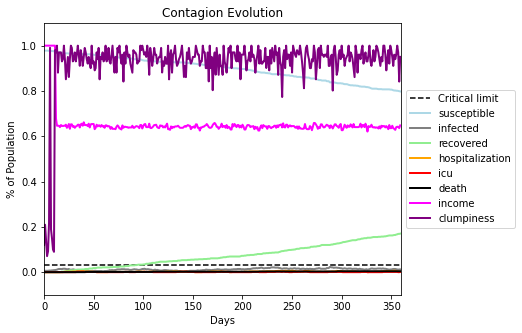

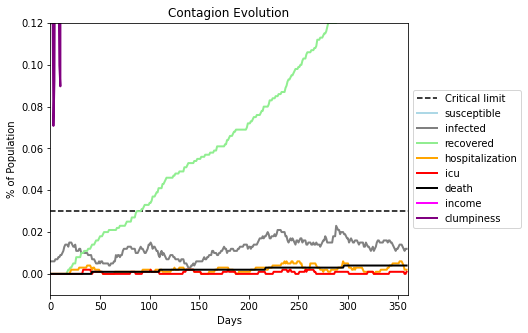

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 0
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)

Save these seeds if you want to rerun a scenario
[9675]
Max is 0.9768436772674389 but chosen is 0.9476859811624938 for temperature -0.9
Max is 0.9892820261698999 but chosen is 0.9542403590616713 for temperature -0.9
Max is 0.990607392442993 but chosen is 0.9071596998437507 for temperature -0.9
Max is 0.9896560237700155 but chosen is 0.9762692012482552 for temperature -0.9
Max is 0.9945085776133922 but chosen is 0.9905758298131292 for temperature -0.9
Max is 0.9919959161743589 but chosen is 0.7229126677879943 for temperature -0.9
Max is 0.99262122615974 but chosen is 0.9889793361750504 for temperature -0.9
Max is 0.9942745208138555 but chosen is 0.6980822346330893 for temperature -0.9
Max is 0.9937465021085714 but chosen is 0.9689112107201844 for temperature -0.9
Max is 0.991037459560194 but chosen is 0.9791338296363239 for temperature -0.9
Max is 0.9955574188911881 but chosen is 0.9816551090244022 for temperature -0.9
Max is 0.9948886103361596 but chosen is 0.5319592450714326 for tempe

Max is 0.9899751500124542 but chosen is 0.44983461300987015 for temperature -0.9
Max is 0.9870072254198003 but chosen is 0.9693470827752797 for temperature -0.9
Max is 0.9957978447896765 but chosen is 0.974476574170725 for temperature -0.9
Max is 0.9936086799628016 but chosen is 0.6127517708395545 for temperature -0.9
Max is 0.9968837747586826 but chosen is 0.9899884836198423 for temperature -0.9
Max is 0.9934445114788948 but chosen is 0.982782447994014 for temperature -0.9
Max is 0.9907492608837878 but chosen is 0.9396606502934789 for temperature -0.9
Max is 0.9881621517959324 but chosen is 0.9675142192690476 for temperature -0.9
Max is 0.990318586167211 but chosen is 0.948660089775545 for temperature -0.9
Max is 0.9974547294093149 but chosen is 0.46762497550243165 for temperature -0.9
Max is 0.9917796560147036 but chosen is 0.9749284309625067 for temperature -0.9
Max is 0.9909615779323185 but chosen is 0.9637555320664509 for temperature -0.9
Max is 0.9924422799065578 but chosen is 0.

Max is 0.9966087743847845 but chosen is 0.47161321456347327 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.6346462922124027 for temperature -0.9
Max is 0.997172598250379 but chosen is 0.9801580698033886 for temperature -0.9
Max is 0.9949446982160631 but chosen is 0.624398239819183 for temperature -0.9
Max is 0.9922865777971884 but chosen is 0.7589986230417203 for temperature -0.9
Max is 0.991729779065474 but chosen is 0.9687405291204888 for temperature -0.9
Max is 0.9953187031978317 but chosen is 0.5115723120798362 for temperature -0.9
Max is 0.9943393484040702 but chosen is 0.9686514118437962 for temperature -0.9
Max is 0.9910849516244259 but chosen is 0.9717094301934648 for temperature -0.9
Max is 0.9847419156564873 but chosen is 0.9699934440082235 for temperature -0.9
Max is 0.9926466888433889 but chosen is 0.9787941987364029 for temperature -0.9
Max is 0.9913591528737337 but chosen is 0.9545008747620974 for temperature -0.9
Max is 0.9974303871971741 but chosen is 0.

Max is 0.9954496202432678 but chosen is 0.9862399438208366 for temperature -0.9
Max is 0.9895239552198826 but chosen is 0.6447579345989979 for temperature -0.9
Max is 0.9946496926260617 but chosen is 0.6515326862012973 for temperature -0.9
Max is 0.9845645142509999 but chosen is 0.6549943106539512 for temperature -0.9
Max is 0.9932213260603127 but chosen is 0.5494786962466376 for temperature -0.9
Max is 0.9893453136587848 but chosen is 0.9891118250048208 for temperature -0.9
Max is 0.9972930541826849 but chosen is 0.9606780604408649 for temperature -0.9
Max is 0.9894577703630502 but chosen is 0.6785697133901002 for temperature -0.9
Max is 0.9869608802231461 but chosen is 0.6633882189761107 for temperature -0.9
Max is 0.9857190709895026 but chosen is 0.4341089539833869 for temperature -0.9
Max is 0.9894739062576375 but chosen is 0.40639878518029554 for temperature -0.9
Max is 0.9828550727737693 but chosen is 0.9616049420580893 for temperature -0.9
Max is 0.9856699851336173 but chosen is

Max is 0.9786526964701091 but chosen is 0.2966260773629104 for temperature -0.9
Max is 0.9922610303624013 but chosen is 0.9878719618045491 for temperature -0.9
Max is 0.9875075486086498 but chosen is 0.9814739331334996 for temperature -0.9
Max is 0.9942633365508863 but chosen is 0.5368001924895761 for temperature -0.9
Max is 0.9944937846931224 but chosen is 0.9760403513434076 for temperature -0.9
Max is 0.9940651054852623 but chosen is 0.9768840286744229 for temperature -0.9
Max is 0.9951633616473119 but chosen is 0.9897565475556738 for temperature -0.9
Max is 0.9920143282145033 but chosen is 0.46274917927752757 for temperature -0.9
Max is 0.9942095553770601 but chosen is 0.2576734742643468 for temperature -0.9
Max is 0.9805585140795381 but chosen is 0.9728661952286155 for temperature -0.9
Max is 0.9951784702329365 but chosen is 0.9870383260410408 for temperature -0.9
Max is 0.9957029053135954 but chosen is 0.9773579821759568 for temperature -0.9
Max is 0.9944658905310745 but chosen is

Max is 0.9957290163918396 but chosen is 0.4592431732312478 for temperature -0.9
Max is 0.991920488242446 but chosen is 0.9918738409984603 for temperature -0.9
Max is 0.9877595583259359 but chosen is 0.97740252500486 for temperature -0.9
Max is 0.9950805307754229 but chosen is -0.2574201591651379 for temperature -0.9
Max is 0.9922400735275568 but chosen is 0.971357506127748 for temperature -0.9
Max is 0.9881192319103225 but chosen is 0.3480419703048643 for temperature -0.9
Max is 0.9882605584363763 but chosen is -0.20972753042041006 for temperature -0.9
Max is 0.983362886634224 but chosen is 0.33537059344521775 for temperature -0.9
Max is 0.9923671372708781 but chosen is -0.1507151452606921 for temperature -0.9
Max is 0.9874986680805135 but chosen is 0.1873761529272775 for temperature -0.9
Max is 0.9943968915795891 but chosen is 0.971109173754272 for temperature -0.9
Max is 0.9923642399145574 but chosen is 0.39105147358910614 for temperature -0.9
Max is 0.99719976245383 but chosen is 0.

Max is 0.9964347577390412 but chosen is 0.9824414900783984 for temperature -0.9
Max is 0.9942520371919317 but chosen is 0.9873702375372048 for temperature -0.9
Max is 0.9961503450515952 but chosen is 0.9916420171683289 for temperature -0.9
Max is 0.9964421958023146 but chosen is 0.9739855033599949 for temperature -0.9
Max is 0.9957978447896765 but chosen is 0.9891703363786212 for temperature -0.9
Max is 0.9967545553282025 but chosen is 0.9892610243910879 for temperature -0.9
Max is 0.9970753629662436 but chosen is 0.9897186609422068 for temperature -0.9
Max is 0.995060309359512 but chosen is 0.9801887912408086 for temperature -0.9
Max is 0.996471501955785 but chosen is 0.9867088481017018 for temperature -0.9
Max is 0.9962321946788398 but chosen is 0.9807440327060597 for temperature -0.9
Max is 0.9945906448967065 but chosen is 0.9802880004334215 for temperature -0.9
Max is 0.9955749308331026 but chosen is 0.9933128591995142 for temperature -0.9
Max is 0.998369773603538 but chosen is 0.9

Max is 0.9967514261723833 but chosen is 0.9941784250657406 for temperature -0.9
Max is 0.9978422495233421 but chosen is 0.9754148712033682 for temperature -0.9
Max is 0.9956587053847399 but chosen is 0.9833950522745255 for temperature -0.9
Max is 0.9962725655022886 but chosen is 0.9847662950302005 for temperature -0.9
Max is 0.994140544678861 but chosen is 0.9901535021975764 for temperature -0.9
Max is 0.9957764752429167 but chosen is 0.9819488221232314 for temperature -0.9
Max is 0.9973540804526791 but chosen is 0.9755400005668223 for temperature -0.9
Max is 0.9974547294093149 but chosen is 0.9819953046717159 for temperature -0.9
Max is 0.9939500583431575 but chosen is 0.9776140511769835 for temperature -0.9
Max is 0.9933335322345322 but chosen is 0.9795400171038947 for temperature -0.9
tup_vec1 not in keepset of size 57
Max is 0.9962042776226355 but chosen is 0.9811102484270986 for temperature -0.9
Max is 0.9963954427634674 but chosen is 0.9893616376681847 for temperature -0.9
Max is

Max is 0.9961329384574998 but chosen is 0.9912539734287333 for temperature -0.9
Max is 0.9922107826647693 but chosen is 0.9893872345884688 for temperature -0.9
Max is 0.9956587053847399 but chosen is 0.9643594091708446 for temperature -0.9
Max is 0.9903400886408102 but chosen is 0.9756936611467165 for temperature -0.9
Max is 0.9947164839505158 but chosen is 0.9836503712067924 for temperature -0.9
Max is 0.9978422495233421 but chosen is 0.9920570780677666 for temperature -0.9
Max is 0.9979380188789237 but chosen is 0.9918822552329666 for temperature -0.9
Max is 0.9954920614243861 but chosen is 0.9870210426088656 for temperature -0.9
Max is 0.9963575841772891 but chosen is 0.985269379884929 for temperature -0.9
Max is 0.996353219997147 but chosen is 0.9853490093755941 for temperature -0.9
Max is 0.9909966289703053 but chosen is 0.9877620079481837 for temperature -0.9
Max is 0.9964347577390412 but chosen is 0.9897477089119053 for temperature -0.9
Max is 0.9962042776226355 but chosen is 0.

Max is 0.9956785169976592 but chosen is 0.9869735521943253 for temperature -0.9
Max is 0.9944517893041076 but chosen is 0.9841379158950988 for temperature -0.9
Max is 0.9964421958023146 but chosen is 0.9837047263052558 for temperature -0.9
Max is 0.9909966289703053 but chosen is 0.9778468387854777 for temperature -0.9
Max is 0.997086851279169 but chosen is 0.9871706386313072 for temperature -0.9
Max is 0.9964715019557848 but chosen is 0.9850509907875665 for temperature -0.9
Max is 0.9956524950057611 but chosen is 0.984601787866048 for temperature -0.9
Max is 0.9961187456286481 but chosen is 0.9747568802196034 for temperature -0.9
Max is 0.9880758814135385 but chosen is 0.9791567863496116 for temperature -0.9
Max is 0.9977569844939326 but chosen is 0.9854915911255462 for temperature -0.9
Max is 0.9926727099216394 but chosen is 0.986457680876831 for temperature -0.9
Max is 0.99153553109428 but chosen is 0.9825060870628439 for temperature -0.9
Max is 0.9926646228124733 but chosen is 0.963

Max is 0.9906415319596759 but chosen is 0.9821775708208365 for temperature -0.9
Max is 0.988185650135793 but chosen is 0.9558536181363388 for temperature -0.9
Max is 0.9933973491226458 but chosen is 0.9775179956541016 for temperature -0.9
Max is 0.9880261318130696 but chosen is 0.9350544613929698 for temperature -0.9
Max is 0.9744132914835381 but chosen is 0.9375107480151704 for temperature -0.9
Max is 0.9899403940623808 but chosen is 0.9625612424192785 for temperature -0.9
Max is 0.9892509710515558 but chosen is 0.9749747149925999 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0.9769045759504709 for temperature -0.9
Max is 0.9948740812240634 but chosen is 0.9742117992422863 for temperature -0.9
Max is 0.9862350832519612 but chosen is 0.9579029208230305 for temperature -0.9
Max is 0.9897079480772578 but chosen is 0.9893262112196053 for temperature -0.9
Max is 0.9929333883607305 but chosen is 0.982616145851273 for temperature -0.9
Max is 0.9913993092313583 but chosen is 0.

Max is 0.9940621998096878 but chosen is 0.9620003411193796 for temperature -0.9
Max is 0.9946979657494094 but chosen is 0.9714820245538752 for temperature -0.9
Max is 0.9892151787998495 but chosen is 0.9690814392665326 for temperature -0.9
Max is 0.9944870996574955 but chosen is 0.9732352029330187 for temperature -0.9
Max is 0.9928282935814394 but chosen is 0.9673082605184453 for temperature -0.9
Max is 0.9866759917993128 but chosen is 0.9694739929338448 for temperature -0.9
Max is 0.9936788825296571 but chosen is 0.9719269553683779 for temperature -0.9
Max is 0.9886634043083559 but chosen is 0.9385800193931833 for temperature -0.9
Max is 0.979999972354827 but chosen is 0.9492157094762792 for temperature -0.9
Max is 0.9912767786988023 but chosen is 0.9283970136999792 for temperature -0.9
Max is 0.9794976793827322 but chosen is 0.9399327458806734 for temperature -0.9
Max is 0.9954066031237797 but chosen is 0.9724050156084398 for temperature -0.9
Max is 0.9868027604854656 but chosen is 0

Max is 0.9838836597084343 but chosen is 0.9679220108604295 for temperature -0.9
Max is 0.9944870996574955 but chosen is 0.9766705619333657 for temperature -0.9
Max is 0.9897734552681454 but chosen is 0.9798635577060594 for temperature -0.9
Max is 0.9933973491226458 but chosen is 0.9346730423187518 for temperature -0.9
Max is 0.9866759917993128 but chosen is 0.9619994278490595 for temperature -0.9
Max is 0.9923319078179824 but chosen is 0.9672099973944047 for temperature -0.9
Max is 0.9906415319596759 but chosen is 0.9802747495496875 for temperature -0.9
Max is 0.9901342763878007 but chosen is 0.9521596595545402 for temperature -0.9
Max is 0.9903810426807881 but chosen is 0.9645305329909214 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.9878257167194684 for temperature -0.9
Max is 0.9915699264049523 but chosen is 0.9887799764237344 for temperature -0.9
Max is 0.9897622324482244 but chosen is 0.9206785801539398 for temperature -0.9
Max is 0.976785660343546 but chosen is 0

Max is 0.9881192319103225 but chosen is 0.9629365903776769 for temperature -0.9
Max is 0.9912454313604371 but chosen is 0.9560559915772582 for temperature -0.9
Max is 0.9852377897144472 but chosen is 0.9282485399728133 for temperature -0.9
tup_vec1 not in keepset of size 28
Max is 0.9715892517961489 but chosen is 0.9570001931412607 for temperature -0.9
Max is 0.9832520772318784 but chosen is 0.9405567750464364 for temperature -0.9
Max is 0.9843481423650273 but chosen is 0.9808589072769407 for temperature -0.9
Max is 0.9720707929668977 but chosen is 0.9303374245551115 for temperature -0.9
Max is 0.9732251383736681 but chosen is 0.8921824189057366 for temperature -0.9
Max is 0.965796608765642 but chosen is 0.9154300033812337 for temperature -0.9
Max is 0.9915257390635929 but chosen is 0.9699667391815874 for temperature -0.9
Max is 0.9742742701809411 but chosen is 0.9546482472015037 for temperature -0.9
Max is 0.9794978699625952 but chosen is 0.9482599590266938 for temperature -0.9
Max is

Max is 0.9637465267362433 but chosen is 0.9613559896497416 for temperature -0.9
Max is 0.9726547005028165 but chosen is 0.970468054387804 for temperature -0.9
Max is 0.9703862445562143 but chosen is 0.9369785503977208 for temperature -0.9
Max is 0.9923678137824522 but chosen is 0.9805792000814636 for temperature -0.9
Max is 0.9875417865410032 but chosen is 0.9633874192220929 for temperature -0.9
Max is 0.9892820261698999 but chosen is 0.9580975264986494 for temperature -0.9
Max is 0.9816074582991844 but chosen is 0.9409568365616089 for temperature -0.9
Max is 0.9733627590282122 but chosen is 0.9303374245551115 for temperature -0.9
Max is 0.9821100642340888 but chosen is 0.9650006398473967 for temperature -0.9
Max is 0.9881867604658098 but chosen is 0.9103423122200515 for temperature -0.9
Max is 0.9804111755463626 but chosen is 0.9592447621237032 for temperature -0.9
Max is 0.9932961700113448 but chosen is 0.9763473389331818 for temperature -0.9
Max is 0.9946691402547981 but chosen is 0

Max is 0.9917429596437435 but chosen is 0.9716977586738718 for temperature -0.9
Max is 0.9976415513237673 but chosen is 0.9900678010304405 for temperature -0.9
Max is 0.9945690067300863 but chosen is 0.9850936031614651 for temperature -0.9
Max is 0.9906843603286326 but chosen is 0.9840703617073331 for temperature -0.9
Max is 0.9945062206180889 but chosen is 0.9833398761346313 for temperature -0.9
Max is 0.9949740910305188 but chosen is 0.990086355626469 for temperature -0.9
Max is 0.9932049464288037 but chosen is 0.9877820043374508 for temperature -0.9
Max is 0.9950635350569327 but chosen is 0.9870569783505284 for temperature -0.9
Max is 0.9966087743847842 but chosen is 0.980355319586866 for temperature -0.9
Max is 0.9978900997063935 but chosen is 0.9869469884717322 for temperature -0.9
Max is 0.9951458241985545 but chosen is 0.9735063395435695 for temperature -0.9
Max is 0.9926491029885819 but chosen is 0.978593158248879 for temperature -0.9
Max is 0.9938326003295974 but chosen is 0.9

Max is 0.9952143231012782 but chosen is 0.9783922388512702 for temperature -0.9
Max is 0.9924257849850221 but chosen is 0.990086355626469 for temperature -0.9
Max is 0.9955574188911881 but chosen is 0.9814711733029583 for temperature -0.9
Max is 0.9938353104590925 but chosen is 0.9725828158172833 for temperature -0.9
Max is 0.9877434402593178 but chosen is 0.9847272341518879 for temperature -0.9
Max is 0.994244390529569 but chosen is 0.9888751466115467 for temperature -0.9
Max is 0.9939003239931483 but chosen is 0.9700326073674158 for temperature -0.9
Max is 0.9926925666926688 but chosen is 0.9706965023898884 for temperature -0.9
Max is 0.9925949876233086 but chosen is 0.9815718704598435 for temperature -0.9
Max is 0.9945832132486518 but chosen is 0.9905010229999753 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.9884114305851862 for temperature -0.9
Max is 0.9942549615311325 but chosen is 0.9881881270311056 for temperature -0.9
Max is 0.9914999450209642 but chosen is 0.

Max is 0.9922107826647693 but chosen is 0.9669393138406164 for temperature -0.9
Max is 0.9961348658775501 but chosen is 0.985803675098222 for temperature -0.9
tup_vec1 not in keepset of size 25
Max is 0.9926750858200077 but chosen is 0.9890573539235272 for temperature -0.9
Max is 0.995670810266336 but chosen is 0.9823678184874088 for temperature -0.9
Max is 0.9914484613531517 but chosen is 0.9692394785108366 for temperature -0.9
Max is 0.9919522637060028 but chosen is 0.9803929370743795 for temperature -0.9
Max is 0.9932708620095295 but chosen is 0.9899458032151284 for temperature -0.9
Max is 0.9909688187996668 but chosen is 0.9840934124969443 for temperature -0.9
Max is 0.995060309359512 but chosen is 0.9888940191773805 for temperature -0.9
Max is 0.996335174833012 but chosen is 0.9828450186691691 for temperature -0.9
Max is 0.9907155507472775 but chosen is 0.9807732448637783 for temperature -0.9
Max is 0.9936886427788055 but chosen is 0.9854307058110511 for temperature -0.9
Max is 0.

Max is 0.9924443770599802 but chosen is 0.9849210813545374 for temperature -0.9
Max is 0.9903184320448457 but chosen is 0.9848214002589286 for temperature -0.9
Max is 0.9872714907102402 but chosen is 0.9805914998036792 for temperature -0.9
Max is 0.9969280531044222 but chosen is 0.9952842128178877 for temperature -0.9
Max is 0.9961503450515952 but chosen is 0.9718268992461273 for temperature -0.9
Max is 0.9833511724302675 but chosen is 0.9759599921833964 for temperature -0.9
Max is 0.9946346131879191 but chosen is 0.9762750294256569 for temperature -0.9
Max is 0.9930506503428677 but chosen is 0.9744450339771498 for temperature -0.9
Max is 0.9942095553770603 but chosen is 0.9874803357705351 for temperature -0.9
Max is 0.9930169428845937 but chosen is 0.9835735513297057 for temperature -0.9
Max is 0.9857536410667544 but chosen is 0.9796960210092954 for temperature -0.9
Max is 0.9964421958023146 but chosen is 0.9831889377387893 for temperature -0.9
Max is 0.9973399712979368 but chosen is 

Max is 0.9971343039843199 but chosen is 0.985841498246596 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.9926626605411524 for temperature -0.9
Max is 0.9969280531044222 but chosen is 0.9828060757432696 for temperature -0.9
Max is 0.996335174833012 but chosen is 0.9749650088126229 for temperature -0.9
Max is 0.9950017243738705 but chosen is 0.9854416714790046 for temperature -0.9
Max is 0.9946844250393884 but chosen is 0.9888478240279264 for temperature -0.9
Max is 0.9962042776226355 but chosen is 0.9884203894362272 for temperature -0.9
Max is 0.9968778341179276 but chosen is 0.9897925507186954 for temperature -0.9
Max is 0.99541406831981 but chosen is 0.9786343523976462 for temperature -0.9
Max is 0.9956524950057611 but chosen is 0.9891182276550219 for temperature -0.9
Max is 0.9967514261723833 but chosen is 0.9762516833893256 for temperature -0.9
Max is 0.9946029324175119 but chosen is 0.9733162262454405 for temperature -0.9
Max is 0.9923638520365119 but chosen is 0.98

Max is 0.9963954427634674 but chosen is 0.9851384319361433 for temperature -0.9
Max is 0.995994413059552 but chosen is 0.982440791849684 for temperature -0.9
Max is 0.9951646827404926 but chosen is 0.9881311472636685 for temperature -0.9
Max is 0.9952408952218463 but chosen is 0.9857126882197625 for temperature -0.9
Max is 0.9974547294093149 but chosen is 0.996591682538321 for temperature -0.9
tup_vec1 not in keepset of size 52
Max is 0.9977569844939326 but chosen is 0.9813945125801373 for temperature -0.9
Max is 0.9962725655022885 but chosen is 0.9867411394617888 for temperature -0.9
Max is 0.9973540804526791 but chosen is 0.9860303766302809 for temperature -0.9
Max is 0.9939883602515307 but chosen is 0.9829272491971293 for temperature -0.9
Max is 0.9939019984786357 but chosen is 0.9830475285547202 for temperature -0.9
Max is 0.9931416053188412 but chosen is 0.9746897597082571 for temperature -0.9
Max is 0.9957511501793475 but chosen is 0.9899968672440662 for temperature -0.9
Max is 0

Max is 0.9967070641369412 but chosen is 0.9945508851974254 for temperature -0.9
Max is 0.9956709244767995 but chosen is 0.9839316224252791 for temperature -0.9
Max is 0.9939883602515307 but chosen is 0.9924734412191007 for temperature -0.9
tup_vec1 not in keepset of size 46
Max is 0.9931573609356988 but chosen is 0.9725634659218789 for temperature -0.9
Max is 0.996335174833012 but chosen is 0.9875825143656175 for temperature -0.9
Max is 0.9938065767026175 but chosen is 0.9879435336463194 for temperature -0.9
Max is 0.9963294093282911 but chosen is 0.9937088302963692 for temperature -0.9
Max is 0.9948175433197098 but chosen is 0.9756525988820774 for temperature -0.9
Max is 0.9963575841772891 but chosen is 0.9781099456249553 for temperature -0.9
Max is 0.9942520371919317 but chosen is 0.9858879996933697 for temperature -0.9
Max is 0.9973399712979367 but chosen is 0.9760790539188312 for temperature -0.9
Max is 0.9923638520365119 but chosen is 0.9710418861527973 for temperature -0.9
Max is

Max is 0.9942919055153656 but chosen is 0.9559843272564222 for temperature -0.9
Max is 0.9772417137649942 but chosen is 0.9674428000953965 for temperature -0.9
Max is 0.9951163639023746 but chosen is 0.9803525707763655 for temperature -0.9
Max is 0.9907536275128092 but chosen is 0.9847434874980905 for temperature -0.9
Max is 0.9920508941173861 but chosen is 0.9730927844101063 for temperature -0.9
Max is 0.9844948162937468 but chosen is 0.9609010668576673 for temperature -0.9
Max is 0.9880648701438735 but chosen is 0.9352139490967546 for temperature -0.9
Max is 0.9815862305899905 but chosen is 0.9710542760539348 for temperature -0.9
Max is 0.979999972354827 but chosen is 0.9736389808308236 for temperature -0.9
tup_vec1 not in keepset of size 9
Max is 0.9754919083978325 but chosen is 0.974500568595677 for temperature -0.9
Max is 0.9869608802231461 but chosen is 0.9465360050453592 for temperature -0.9
Max is 0.9841661718128628 but chosen is 0.949865327071645 for temperature -0.9
Max is 0.

Max is 0.9874918281693991 but chosen is 0.9498177868986069 for temperature -0.9
Max is 0.9858897711656965 but chosen is 0.9484378471830804 for temperature -0.9
Max is 0.9954066031237797 but chosen is 0.9608240952083079 for temperature -0.9
Max is 0.9866759917993128 but chosen is 0.9446882221698408 for temperature -0.9
Max is 0.9959331942549424 but chosen is 0.9738395257812966 for temperature -0.9
Max is 0.9765734795003238 but chosen is 0.9717221584510867 for temperature -0.9
Max is 0.9946979657494094 but chosen is 0.9591464787760028 for temperature -0.9
Max is 0.9862215444997808 but chosen is 0.9669967749027183 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.9652641725295806 for temperature -0.9
Max is 0.988185650135793 but chosen is 0.9572262197058528 for temperature -0.9
Max is 0.9848198694770255 but chosen is 0.9596204928972751 for temperature -0.9
Max is 0.9881833200854834 but chosen is 0.9719405699533284 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0

Max is 0.9724376623733193 but chosen is 0.9427942415761661 for temperature -0.9
Max is 0.9881867604658098 but chosen is 0.9682475056040166 for temperature -0.9
Max is 0.9871275256130951 but chosen is 0.9594956056668015 for temperature -0.9
Max is 0.9918651681705885 but chosen is 0.9352776566336231 for temperature -0.9
Max is 0.990607392442993 but chosen is 0.9689607847711499 for temperature -0.9
Max is 0.9819172164083154 but chosen is 0.9558664565949259 for temperature -0.9
Max is 0.9892132454556074 but chosen is 0.9526168100852928 for temperature -0.9
Max is 0.9773204550451802 but chosen is 0.9653723950261727 for temperature -0.9
Max is 0.9926466888433889 but chosen is 0.9707321234833196 for temperature -0.9
Max is 0.9925593953929142 but chosen is 0.9778685102215872 for temperature -0.9
Max is 0.9892096944955269 but chosen is 0.9671962318157612 for temperature -0.9
Max is 0.9916621963340759 but chosen is 0.95880755915121 for temperature -0.9
Max is 0.9836642379243478 but chosen is 0.9

Max is 0.9946691402547981 but chosen is 0.9794321898176735 for temperature -0.9
Max is 0.9887627105421893 but chosen is 0.9753429020335467 for temperature -0.9
Max is 0.9909460246588465 but chosen is 0.9855687616957306 for temperature -0.9
Max is 0.9828550727737693 but chosen is 0.9629135586900399 for temperature -0.9
Max is 0.9842478399008655 but chosen is 0.9277052208101282 for temperature -0.9
Max is 0.9719061907172404 but chosen is 0.9703862445562143 for temperature -0.9
Max is 0.9915529468026971 but chosen is 0.9662340370035869 for temperature -0.9
Max is 0.9829057806783368 but chosen is 0.9434891161244449 for temperature -0.9
Max is 0.9892820261698999 but chosen is 0.9248032764826724 for temperature -0.9
Max is 0.9821100642340888 but chosen is 0.9482945456994336 for temperature -0.9
Max is 0.9802370385860741 but chosen is 0.9392492740631976 for temperature -0.9
Max is 0.9932961700113448 but chosen is 0.9715592805636384 for temperature -0.9
Max is 0.9808483561573451 but chosen is 

Max is 0.9902900658808191 but chosen is 0.9765767013817541 for temperature -0.9
Max is 0.9917429596437435 but chosen is 0.9721464772227794 for temperature -0.9
Max is 0.9912088338417137 but chosen is 0.9834173952332891 for temperature -0.9
Max is 0.9919783590067677 but chosen is 0.9797801436353824 for temperature -0.9
Max is 0.9932049464288037 but chosen is 0.9847720702336235 for temperature -0.9
Max is 0.994002248794808 but chosen is 0.9735464564305593 for temperature -0.9
Max is 0.9942975572023278 but chosen is 0.9855903824197075 for temperature -0.9
Max is 0.9946695234644872 but chosen is 0.9755228095097418 for temperature -0.9
Max is 0.9972406974966297 but chosen is 0.9640065652448884 for temperature -0.9
Max is 0.9904915393693984 but chosen is 0.966654525878463 for temperature -0.9
Max is 0.9953066003676265 but chosen is 0.9702419172531911 for temperature -0.9
Max is 0.9937628294251531 but chosen is 0.9774902145995591 for temperature -0.9
Max is 0.988920733210523 but chosen is 0.9

Max is 0.997620876542213 but chosen is 0.9722202949431665 for temperature -0.9
Max is 0.9952143231012781 but chosen is 0.9755858530178411 for temperature -0.9
Max is 0.9891946999248616 but chosen is 0.9836392446611458 for temperature -0.9
Max is 0.9949740910305188 but chosen is 0.9870555277294375 for temperature -0.9
Max is 0.9949214475747594 but chosen is 0.970380936485402 for temperature -0.9
tup_vec1 not in keepset of size 12
Max is 0.9897299144170355 but chosen is 0.9781267150753727 for temperature -0.9
Max is 0.9902749326371298 but chosen is 0.9798993271258863 for temperature -0.9
Max is 0.9939506540881591 but chosen is 0.9855906827334616 for temperature -0.9
Max is 0.9972406974966297 but chosen is 0.984605986959894 for temperature -0.9
Max is 0.9955574188911881 but chosen is 0.9805970543745001 for temperature -0.9
Max is 0.9889125580250767 but chosen is 0.9843850791358341 for temperature -0.9
Max is 0.9939276136605154 but chosen is 0.9765418317784156 for temperature -0.9
Max is 0

Max is 0.9946226604034517 but chosen is 0.9819014872990538 for temperature -0.9
Max is 0.9968714684812539 but chosen is 0.9798250437247563 for temperature -0.9
Max is 0.9928532087976379 but chosen is 0.9829387741730777 for temperature -0.9
Max is 0.9962985868605885 but chosen is 0.9901607035022493 for temperature -0.9
Max is 0.9967835442635911 but chosen is 0.9795424692356213 for temperature -0.9
Max is 0.9940310326964997 but chosen is 0.9815697645460806 for temperature -0.9
Max is 0.9904308245398754 but chosen is 0.9530528493336314 for temperature -0.9
Max is 0.9905327630390922 but chosen is 0.9742309961708256 for temperature -0.9
Max is 0.9925077871889648 but chosen is 0.9824468108154611 for temperature -0.9
Max is 0.9946353558352614 but chosen is 0.9764472808550282 for temperature -0.9
Max is 0.9923671372708781 but chosen is 0.9695073761700598 for temperature -0.9
Max is 0.9917706597645264 but chosen is 0.9911063284233445 for temperature -0.9
Max is 0.9941896915858442 but chosen is 

Max is 0.9860522612258993 but chosen is 0.9854489183599688 for temperature -0.9
Max is 0.9967835442635911 but chosen is 0.9718618600193649 for temperature -0.9
Max is 0.9888509118312923 but chosen is 0.9610480265946041 for temperature -0.9
Max is 0.9918111293207347 but chosen is 0.9802642378718145 for temperature -0.9
Max is 0.995378362698559 but chosen is 0.975725754532922 for temperature -0.9
Max is 0.9919213564083014 but chosen is 0.957400630951006 for temperature -0.9
tup_vec1 not in keepset of size 53
Max is 0.9927181372301189 but chosen is 0.9684589530522224 for temperature -0.9
Max is 0.9955860437128861 but chosen is 0.9817105683165046 for temperature -0.9
Max is 0.9923671372708781 but chosen is 0.95004748448618 for temperature -0.9
Max is 0.9930386508751394 but chosen is 0.9802146544960729 for temperature -0.9
Max is 0.9941295924918992 but chosen is 0.9748807591026741 for temperature -0.9
Max is 0.9940310326964997 but chosen is 0.9792183633015863 for temperature -0.9
Max is 0.9

Max is 0.9905568305686498 but chosen is 0.9709215073629245 for temperature -0.9
Max is 0.9955782046060191 but chosen is 0.9776194527141624 for temperature -0.9
Max is 0.991204493651237 but chosen is 0.9872383035601862 for temperature -0.9
Max is 0.9963454161338089 but chosen is 0.9697589571547126 for temperature -0.9
Max is 0.989853387364364 but chosen is 0.9843481532356968 for temperature -0.9
Max is 0.991295845174641 but chosen is 0.9783292377054309 for temperature -0.9
Max is 0.9920747969158876 but chosen is 0.9781873102650454 for temperature -0.9
Max is 0.9928359531112679 but chosen is 0.9896592888959054 for temperature -0.9
Max is 0.9950011294865463 but chosen is 0.9809350236462754 for temperature -0.9
Max is 0.9954077797299062 but chosen is 0.9829150028938186 for temperature -0.9
Max is 0.995378362698559 but chosen is 0.9897372522595868 for temperature -0.9
Max is 0.9967835442635911 but chosen is 0.9796505518413545 for temperature -0.9
Max is 0.9917199371971619 but chosen is 0.97

Max is 0.9893115618652002 but chosen is 0.9730625582512978 for temperature -0.9
Max is 0.983291252316152 but chosen is 0.9607297454010649 for temperature -0.9
Max is 0.9847361912818977 but chosen is 0.9776274154758233 for temperature -0.9
Max is 0.9859780884011357 but chosen is 0.9747005083154827 for temperature -0.9
Max is 0.9787599071650337 but chosen is 0.9661375092185122 for temperature -0.9
Max is 0.9914040071715324 but chosen is 0.9800606648788521 for temperature -0.9
Max is 0.9740610861705976 but chosen is 0.9362829791059238 for temperature -0.9
tup_vec1 not in keepset of size 11
Max is 0.9888509118312923 but chosen is 0.965261630818502 for temperature -0.9
Max is 0.9914539531262148 but chosen is 0.979003909508879 for temperature -0.9
Max is 0.9955782046060191 but chosen is 0.9835649044841716 for temperature -0.9
Max is 0.9918006629919717 but chosen is 0.9787689584367816 for temperature -0.9
Max is 0.9892452502959133 but chosen is 0.9826389844503677 for temperature -0.9
Max is 0

Max is 0.9940310326964997 but chosen is 0.9796223997070561 for temperature -0.9
Max is 0.9937142874057086 but chosen is 0.9604961714990237 for temperature -0.9
Max is 0.9930386508751394 but chosen is 0.9766068738436247 for temperature -0.9
Max is 0.9946353558352614 but chosen is 0.9845130610552686 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.9865964891400747 for temperature -0.9
Max is 0.9967179811921223 but chosen is 0.9716450114738683 for temperature -0.9
Max is 0.9905371681690089 but chosen is 0.9726665255630632 for temperature -0.9
Max is 0.9965658844881623 but chosen is 0.982400253407025 for temperature -0.9
Max is 0.9959940623907642 but chosen is 0.9709596873709835 for temperature -0.9
Max is 0.9932831421287621 but chosen is 0.9880169764937681 for temperature -0.9
Max is 0.9947227761190711 but chosen is 0.9742012410363298 for temperature -0.9
Max is 0.9911747625372006 but chosen is 0.959890068573161 for temperature -0.9
Max is 0.991899823246336 but chosen is 0.9

Max is 0.9888615284914519 but chosen is 0.9625379234533191 for temperature -0.9
Max is 0.9822764187880281 but chosen is 0.9388209650526813 for temperature -0.9
Max is 0.9913950377702777 but chosen is 0.9703035126770245 for temperature -0.9
Max is 0.9954594673100413 but chosen is 0.9799090075654177 for temperature -0.9
Max is 0.9888216679623478 but chosen is 0.9661581135081041 for temperature -0.9
Max is 0.9902743797179809 but chosen is 0.9788111363970421 for temperature -0.9
Max is 0.9911122054888365 but chosen is 0.9791278685339042 for temperature -0.9
Max is 0.991277362719849 but chosen is 0.9597961068893337 for temperature -0.9
Max is 0.9891615391777909 but chosen is 0.9821562968997971 for temperature -0.9
Max is 0.9934378489576864 but chosen is 0.9686227305298647 for temperature -0.9
Max is 0.9910174134282103 but chosen is 0.98129549117975 for temperature -0.9
Max is 0.9942940429207963 but chosen is 0.9869907935747604 for temperature -0.9
Max is 0.9926282951130386 but chosen is 0.9

Max is 0.9935071201600073 but chosen is 0.9632794504727693 for temperature -0.9
Max is 0.9838434323619625 but chosen is 0.9514878267465525 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.9495029025020134 for temperature -0.9
Max is 0.995629529611128 but chosen is 0.9585113311311354 for temperature -0.9
Max is 0.9888932519717778 but chosen is 0.9603148856648646 for temperature -0.9
Max is 0.9884123982936663 but chosen is 0.9638492702099912 for temperature -0.9
Max is 0.9952786083254049 but chosen is 0.9893105751927378 for temperature -0.9
Max is 0.9950321394421144 but chosen is 0.9866290604161788 for temperature -0.9
Max is 0.9908438697924233 but chosen is 0.9622715856994458 for temperature -0.9
Max is 0.9923867819338857 but chosen is 0.9713460894166944 for temperature -0.9
Max is 0.9925779513361402 but chosen is 0.9810827154407055 for temperature -0.9
Max is 0.991277362719849 but chosen is 0.9775007458579034 for temperature -0.9
Max is 0.9942282578424545 but chosen is 0.

Max is 0.9956452021905261 but chosen is 0.9683892200058304 for temperature -0.9
Max is 0.9932429555575203 but chosen is 0.9768891146413577 for temperature -0.9
Max is 0.9972501084819453 but chosen is 0.984806483976376 for temperature -0.9
Max is 0.9946124001377068 but chosen is 0.985264153317525 for temperature -0.9
Max is 0.9923141679587546 but chosen is 0.9865543885283571 for temperature -0.9
Max is 0.9953187031978317 but chosen is 0.9899533266364204 for temperature -0.9
Max is 0.9953702487184606 but chosen is 0.9883613852365198 for temperature -0.9
Max is 0.9922141471813944 but chosen is 0.9889310562570526 for temperature -0.9
Max is 0.998057098620504 but chosen is 0.9876697248330418 for temperature -0.9
Max is 0.9947811873429795 but chosen is 0.9907841188908937 for temperature -0.9
Max is 0.9961002293247788 but chosen is 0.9868016170907696 for temperature -0.9
Max is 0.9936406587255399 but chosen is 0.990969870288782 for temperature -0.9
Max is 0.9948496873763438 but chosen is 0.97

Max is 0.9940749914571935 but chosen is 0.9900053314487517 for temperature -0.9
Max is 0.9902577299087293 but chosen is 0.9827135067086828 for temperature -0.9
Max is 0.9944009301782875 but chosen is 0.9811841290464438 for temperature -0.9
Max is 0.9924019575423566 but chosen is 0.9843069491965948 for temperature -0.9
Max is 0.9886539885670631 but chosen is 0.9803874335198954 for temperature -0.9
Max is 0.985121165134522 but chosen is 0.9738006443208457 for temperature -0.9
Max is 0.973800068954419 but chosen is 0.9601896200317486 for temperature -0.9
Max is 0.9881827441784856 but chosen is 0.9879220919082715 for temperature -0.9
Max is 0.9946614751974349 but chosen is 0.9666622820602376 for temperature -0.9
Max is 0.9962520475908407 but chosen is 0.9723220940544791 for temperature -0.9
Max is 0.9972161023986661 but chosen is 0.9656639158711271 for temperature -0.9
Max is 0.9952598981232689 but chosen is 0.9827183628488148 for temperature -0.9
Max is 0.9906461895345887 but chosen is 0.

Max is 0.9923675769851794 but chosen is 0.9603302735739004 for temperature -0.9
Max is 0.9840913172038286 but chosen is 0.9762692012482552 for temperature -0.9
Max is 0.9896560237700155 but chosen is 0.9670408271892059 for temperature -0.9
Max is 0.9917956379848358 but chosen is 0.9462987928313813 for temperature -0.9
Max is 0.9878623724465518 but chosen is 0.9669046644030337 for temperature -0.9
Max is 0.997557282390345 but chosen is 0.9728535335978534 for temperature -0.9
Max is 0.9933859256747668 but chosen is 0.9756143821864511 for temperature -0.9
Max is 0.9917945830824929 but chosen is 0.967976769841901 for temperature -0.9
Max is 0.9956657192076346 but chosen is 0.9818850155547347 for temperature -0.9
Max is 0.9926710372909744 but chosen is 0.9762689607591033 for temperature -0.9
Max is 0.987270970646747 but chosen is 0.9352640620295108 for temperature -0.9
Max is 0.9963697307740914 but chosen is 0.9712411193215448 for temperature -0.9
Max is 0.990318586167211 but chosen is 0.95

Max is 0.9963697307740914 but chosen is 0.9613247031485199 for temperature -0.9
Max is 0.9917683649783294 but chosen is 0.9842508742309196 for temperature -0.9
Max is 0.995554042722042 but chosen is 0.989560447039182 for temperature -0.9
Max is 0.997430387197174 but chosen is 0.9794782489414601 for temperature -0.9
Max is 0.9935867047216667 but chosen is 0.978100511347429 for temperature -0.9
Max is 0.9932850226819413 but chosen is 0.9876264334193082 for temperature -0.9
Max is 0.9926710372909744 but chosen is 0.9790722693421857 for temperature -0.9
Max is 0.9945380669328193 but chosen is 0.9760498553133734 for temperature -0.9
Max is 0.9871204952649975 but chosen is 0.9740850838982964 for temperature -0.9
Max is 0.9975044834711905 but chosen is 0.9645622111832286 for temperature -0.9
Max is 0.9896790331993183 but chosen is 0.9617156163800297 for temperature -0.9
Max is 0.9896622227417835 but chosen is 0.9818850155547347 for temperature -0.9
Max is 0.9923675769851794 but chosen is 0.96

Max is 0.9954640904036111 but chosen is 0.9932949705170063 for temperature -0.9
Max is 0.9924751192635104 but chosen is 0.9769956116879887 for temperature -0.9
Max is 0.9941792646101637 but chosen is 0.9874388957341155 for temperature -0.9
Max is 0.9923675769851794 but chosen is 0.96600995583167 for temperature -0.9
Max is 0.9935867047216667 but chosen is 0.9574699187164387 for temperature -0.9
Max is 0.9909571173820086 but chosen is 0.9571534402091761 for temperature -0.9
Max is 0.9912138140577832 but chosen is 0.9692639807497991 for temperature -0.9
Max is 0.9870069481786118 but chosen is 0.980256925438078 for temperature -0.9
Max is 0.9861438890677381 but chosen is 0.9718034774324744 for temperature -0.9
Max is 0.9824758321609202 but chosen is 0.967261925101851 for temperature -0.9
Max is 0.995467939595085 but chosen is 0.9721472406376326 for temperature -0.9
Max is 0.9897657993742839 but chosen is 0.9577691943115954 for temperature -0.9
Max is 0.9826496620113568 but chosen is 0.975

Max is 0.997172598250379 but chosen is 0.990402949437989 for temperature -0.9
Max is 0.9957380546422704 but chosen is 0.9852787081376826 for temperature -0.9
Max is 0.9913419871604612 but chosen is 0.9629508886164249 for temperature -0.9
Max is 0.9927181372301189 but chosen is 0.9785935353585559 for temperature -0.9
Max is 0.9902685922434739 but chosen is 0.9569660095600021 for temperature -0.9
Max is 0.9965365459565032 but chosen is 0.9946713042095946 for temperature -0.9
Max is 0.9944838479662083 but chosen is 0.9892323747577862 for temperature -0.9
Max is 0.9927776976554668 but chosen is 0.9838339284271256 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.970125983824885 for temperature -0.9
Max is 0.989853387364364 but chosen is 0.9617643582274522 for temperature -0.9
Max is 0.9937142874057086 but chosen is 0.98404755136121 for temperature -0.9
Max is 0.9873411186933667 but chosen is 0.97014815172859 for temperature -0.9
Max is 0.9941896915858442 but chosen is 0.971575

Max is 0.9852575336489013 but chosen is 0.9846715236370281 for temperature -0.9
Max is 0.9955611181883085 but chosen is 0.9885815520067376 for temperature -0.9
tup_vec1 not in keepset of size 18
Max is 0.9911747625372006 but chosen is 0.9779107206973199 for temperature -0.9
Max is 0.9937198736963528 but chosen is 0.9872344573590237 for temperature -0.9
Max is 0.9965658844881623 but chosen is 0.9922683083603022 for temperature -0.9
Max is 0.9947227761190711 but chosen is 0.9685301776666712 for temperature -0.9
Max is 0.9905666955527896 but chosen is 0.9838649737657967 for temperature -0.9
Max is 0.9893338875726483 but chosen is 0.9714951065997466 for temperature -0.9
Max is 0.9891696546392686 but chosen is 0.9646994462629004 for temperature -0.9
Max is 0.9908100639015482 but chosen is 0.9782282393494012 for temperature -0.9
Max is 0.9909269443990465 but chosen is 0.9858524138029047 for temperature -0.9
Max is 0.9942633365508863 but chosen is 0.9941476474308556 for temperature -0.9
Max i

Max is 0.9917706597645264 but chosen is 0.9850380647472914 for temperature -0.9
Max is 0.9967835442635911 but chosen is 0.979081344956781 for temperature -0.9
Max is 0.9949372063849683 but chosen is 0.9586453607244586 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.9601260585482818 for temperature -0.9
Max is 0.9892310040198469 but chosen is 0.9632034809974173 for temperature -0.9
Max is 0.9915066543030983 but chosen is 0.9807102716122678 for temperature -0.9
Max is 0.9962985868605885 but chosen is 0.9705311293924406 for temperature -0.9
Max is 0.9908288002282875 but chosen is 0.9868222396385178 for temperature -0.9
Max is 0.9930386508751394 but chosen is 0.9778835194357575 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.9654202293973032 for temperature -0.9
Max is 0.9934115610500396 but chosen is 0.9902183321362773 for temperature -0.9
Max is 0.9946353558352614 but chosen is 0.985734792304545 for temperature -0.9
tup_vec1 not in keepset of size 68
Max is 

Max is 0.9930501786115459 but chosen is 0.9906288034153592 for temperature -0.9
Max is 0.9954008288921341 but chosen is 0.9703041051940409 for temperature -0.9
Max is 0.9928359531112679 but chosen is 0.9712992804751837 for temperature -0.9
Max is 0.997172598250379 but chosen is 0.9877926539853353 for temperature -0.9
Max is 0.9915066543030983 but chosen is 0.9752046551429296 for temperature -0.9
Max is 0.9943393484040702 but chosen is 0.9893446977952407 for temperature -0.9
Max is 0.9912139012139797 but chosen is 0.9733816060022218 for temperature -0.9
Max is 0.9955860437128861 but chosen is 0.9713121185923179 for temperature -0.9
Max is 0.9854489183599688 but chosen is 0.9675200634666834 for temperature -0.9
Max is 0.9877530695713169 but chosen is 0.9857527309840259 for temperature -0.9
Max is 0.9967179811921223 but chosen is 0.9832260158836988 for temperature -0.9
Max is 0.9918111293207347 but chosen is 0.9678799489004102 for temperature -0.9
Max is 0.9967835442635911 but chosen is 0

Max is 0.9946754770265218 but chosen is 0.9760454587763523 for temperature -0.9
Max is 0.992628295113039 but chosen is 0.965181057517506 for temperature -0.9
Max is 0.9923867819338857 but chosen is 0.9500305911815875 for temperature -0.9
Max is 0.9933623670108527 but chosen is 0.9785268216747093 for temperature -0.9
Max is 0.9904831266531304 but chosen is 0.9739030822059979 for temperature -0.9
Max is 0.9962558664239145 but chosen is 0.9794277610270763 for temperature -0.9
Max is 0.9917796560147036 but chosen is 0.986936789186413 for temperature -0.9
Max is 0.9895336372124554 but chosen is 0.9769531448325408 for temperature -0.9
Max is 0.9936771676830265 but chosen is 0.9820488353719651 for temperature -0.9
Max is 0.9954594673100413 but chosen is 0.990872113173813 for temperature -0.9
Max is 0.9914206239696859 but chosen is 0.9738104298847088 for temperature -0.9
Max is 0.9924422799065578 but chosen is 0.9913696751366338 for temperature -0.9
Max is 0.9920948009777529 but chosen is 0.97

Max is 0.9932437920605732 but chosen is 0.9567079529626832 for temperature -0.9
Max is 0.9881766659703387 but chosen is 0.9640586587262656 for temperature -0.9
Max is 0.9950321394421144 but chosen is 0.986359560461904 for temperature -0.9
Max is 0.9888651302776994 but chosen is 0.9713460894166944 for temperature -0.9
Max is 0.9925779513361402 but chosen is 0.9828789967222491 for temperature -0.9
Max is 0.9850347203242771 but chosen is 0.9803193557682528 for temperature -0.9
Max is 0.991555162602242 but chosen is 0.970773564426003 for temperature -0.9
Max is 0.9874516734474728 but chosen is 0.9709060782454181 for temperature -0.9
Max is 0.993402775181595 but chosen is 0.9756759358556919 for temperature -0.9
Max is 0.9870306302155657 but chosen is 0.9828433508273836 for temperature -0.9
Max is 0.9895347421129522 but chosen is 0.9751500939085427 for temperature -0.9
Max is 0.9891379587458178 but chosen is 0.961070392404031 for temperature -0.9
Max is 0.9869089949190498 but chosen is 0.962

Max is 0.9953274346816732 but chosen is 0.9835781195944334 for temperature -0.9
Max is 0.9952598981232689 but chosen is 0.970687993827018 for temperature -0.9
Max is 0.9958853875756227 but chosen is 0.9829821249973867 for temperature -0.9
Max is 0.9923141679587546 but chosen is 0.9851483059112217 for temperature -0.9
Max is 0.9972873331245421 but chosen is 0.988044849807962 for temperature -0.9
Max is 0.9955858386824169 but chosen is 0.9836555545196416 for temperature -0.9
Max is 0.9939790478226236 but chosen is 0.985430249585999 for temperature -0.9
Max is 0.9923181823969544 but chosen is 0.9738745158530832 for temperature -0.9
Max is 0.9928657256104194 but chosen is 0.9718435799541852 for temperature -0.9
Max is 0.9922141471813944 but chosen is 0.9762174329463698 for temperature -0.9
Max is 0.9946849073687883 but chosen is 0.9838639805968613 for temperature -0.9
Max is 0.9967349541873306 but chosen is 0.9921436836937859 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.98

Max is 0.9906461895345887 but chosen is 0.9660905772823196 for temperature -0.9
Max is 0.995979522961758 but chosen is 0.983751302131708 for temperature -0.9
Max is 0.9958853875756227 but chosen is 0.9778320287293653 for temperature -0.9
Max is 0.9946849073687883 but chosen is 0.9827639378682647 for temperature -0.9
Max is 0.9959613209113832 but chosen is 0.9796226652140774 for temperature -0.9
Max is 0.9947266019784292 but chosen is 0.9665995951759356 for temperature -0.9
Max is 0.995645202190526 but chosen is 0.9767129339541166 for temperature -0.9
Max is 0.9939129078242811 but chosen is 0.9730534064248789 for temperature -0.9
Max is 0.9940651054852623 but chosen is 0.9791154320178338 for temperature -0.9
Max is 0.9962391565603398 but chosen is 0.9717412495023343 for temperature -0.9
Max is 0.997754262154387 but chosen is 0.9676858870038689 for temperature -0.9
Max is 0.9924157760133683 but chosen is 0.968968121852099 for temperature -0.9
Max is 0.9923474272686428 but chosen is 0.964

Max is 0.9970220663065849 but chosen is 0.9787295203209823 for temperature -0.9
Max is 0.9923181823969544 but chosen is 0.9713274105884674 for temperature -0.9
Max is 0.9942010617429549 but chosen is 0.978118808065387 for temperature -0.9
Max is 0.9869109340249381 but chosen is 0.9615410438772962 for temperature -0.9
Max is 0.995979522961758 but chosen is 0.9804442426519683 for temperature -0.9
Max is 0.9932429555575203 but chosen is 0.9881827441784856 for temperature -0.9
Max is 0.9946614751974349 but chosen is 0.9809997729332615 for temperature -0.9
Max is 0.9953274346816732 but chosen is 0.9853937726260998 for temperature -0.9
Max is 0.9937501587200487 but chosen is 0.9737209947450142 for temperature -0.9
Max is 0.9908502326211414 but chosen is 0.9854383914104875 for temperature -0.9
Max is 0.9933856415214078 but chosen is 0.9881154038589068 for temperature -0.9
Max is 0.9946849073687883 but chosen is 0.9642676065391613 for temperature -0.9
tup_vec1 not in keepset of size 38
Max is 

Max is 0.9833051127479076 but chosen is 0.981494589967452 for temperature -0.9
Max is 0.9975044834711905 but chosen is 0.9744322443834206 for temperature -0.9
Max is 0.9902641522303173 but chosen is 0.9774469556486639 for temperature -0.9
Max is 0.9843526780189141 but chosen is 0.9678541745998229 for temperature -0.9
Max is 0.9892257557554083 but chosen is 0.9793804924657904 for temperature -0.9
Max is 0.9808730167913908 but chosen is 0.9587436391155254 for temperature -0.9
Max is 0.9927080261568534 but chosen is 0.9878984925232008 for temperature -0.9
Max is 0.9806413671907196 but chosen is 0.9643412736079083 for temperature -0.9
Max is 0.988097433673327 but chosen is 0.9698211609413919 for temperature -0.9
Max is 0.9878623724465518 but chosen is 0.9520238237872944 for temperature -0.9
tup_vec1 not in keepset of size 8
Max is 0.9959347623680623 but chosen is 0.981105679134281 for temperature -0.9
Max is 0.984888202436946 but chosen is 0.9744098116260205 for temperature -0.9
Max is 0.9

Max is 0.9909571173820086 but chosen is 0.9722018778322632 for temperature -0.9
Max is 0.9956657192076346 but chosen is 0.9740082765772239 for temperature -0.9
Max is 0.9896560237700155 but chosen is 0.9858004176058892 for temperature -0.9
Max is 0.994160671097496 but chosen is 0.9658705339093288 for temperature -0.9
Max is 0.989014689866114 but chosen is 0.9579337598770383 for temperature -0.9
Max is 0.989562691591136 but chosen is 0.9710949106291578 for temperature -0.9
Max is 0.997430387197174 but chosen is 0.987372114646675 for temperature -0.9
Max is 0.9933613932144768 but chosen is 0.9766987897037391 for temperature -0.9
Max is 0.9975044834711905 but chosen is 0.9651686111880006 for temperature -0.9
Max is 0.9914655549209841 but chosen is 0.9423162944959486 for temperature -0.9
Max is 0.9860883110297308 but chosen is 0.966543330466458 for temperature -0.9
Max is 0.9959347623680623 but chosen is 0.9893155596282444 for temperature -0.9
Max is 0.9941792646101637 but chosen is 0.9854

Max is 0.9956033149070209 but chosen is 0.9803026284113949 for temperature -0.9
Max is 0.9964740988555589 but chosen is 0.9786009502399364 for temperature -0.9
Max is 0.9922907328563401 but chosen is 0.9815538606083039 for temperature -0.9
Max is 0.9967399662154972 but chosen is 0.9886983862776952 for temperature -0.9
Max is 0.9951066929374915 but chosen is 0.9890575874605148 for temperature -0.9
Max is 0.9956573182190921 but chosen is 0.9752577898765119 for temperature -0.9
Max is 0.9928300738972874 but chosen is 0.9769072390851389 for temperature -0.9
Max is 0.9952182345174105 but chosen is 0.9841869449426682 for temperature -0.9
Max is 0.9944382857839332 but chosen is 0.9838742317509239 for temperature -0.9
Max is 0.9964763740656791 but chosen is 0.9875918642067003 for temperature -0.9
Max is 0.9940017259145804 but chosen is 0.9709089236120186 for temperature -0.9
Max is 0.9895491013824546 but chosen is 0.9763979862600639 for temperature -0.9
Max is 0.9975833708370314 but chosen is 

Max is 0.9948915887644054 but chosen is 0.9922827840924493 for temperature -0.9
Max is 0.9949152942291208 but chosen is 0.9781721640927253 for temperature -0.9
Max is 0.9847930465109963 but chosen is 0.9761704046609213 for temperature -0.9
Max is 0.9912319938281051 but chosen is 0.9770138901694339 for temperature -0.9
Max is 0.9908323674894047 but chosen is 0.9763304219651769 for temperature -0.9
Max is 0.9952182345174105 but chosen is 0.9874505074741692 for temperature -0.9
Max is 0.9954522735147888 but chosen is 0.9914809538447007 for temperature -0.9
Max is 0.9947450727173619 but chosen is 0.9875505452874834 for temperature -0.9
Max is 0.996042146582612 but chosen is 0.9920762543200923 for temperature -0.9
Max is 0.9973949550489031 but chosen is 0.9835071921904982 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.9877742179658514 for temperature -0.9
Max is 0.9921146662376319 but chosen is 0.980114894844427 for temperature -0.9
Max is 0.9949471697420881 but chosen is 0.

Max is 0.9970958912650181 but chosen is 0.9895672068269343 for temperature -0.9
Max is 0.9954496202432679 but chosen is 0.9920851321828338 for temperature -0.9
Max is 0.9929978899477148 but chosen is 0.9782050413841408 for temperature -0.9
Max is 0.9933573538163819 but chosen is 0.9838292528313557 for temperature -0.9
Max is 0.9903115888158138 but chosen is 0.9726752177854782 for temperature -0.9
Max is 0.9874884639882381 but chosen is 0.9694241740680403 for temperature -0.9
Max is 0.9921317714404928 but chosen is 0.9906704307195797 for temperature -0.9
Max is 0.9965214916468939 but chosen is 0.981211454291488 for temperature -0.9
Max is 0.9851051171496669 but chosen is 0.9730991475766421 for temperature -0.9
Max is 0.9926838141353335 but chosen is 0.9456939421103668 for temperature -0.9
Max is 0.9799955570234713 but chosen is 0.9698412536074725 for temperature -0.9
Max is 0.9925465765700595 but chosen is 0.9811643320313495 for temperature -0.9
Max is 0.9953716335981927 but chosen is 0

Max is 0.9956573182190921 but chosen is 0.9890439878478541 for temperature -0.9
Max is 0.996042146582612 but chosen is 0.9842667739885327 for temperature -0.9
Max is 0.9949471697420881 but chosen is 0.9837671501539873 for temperature -0.9
Max is 0.9942473287967645 but chosen is 0.9869813190430093 for temperature -0.9
Max is 0.9965017713297106 but chosen is 0.9934616195554519 for temperature -0.9
Max is 0.9956033149070209 but chosen is 0.9825374246533197 for temperature -0.9
Max is 0.9972832675223934 but chosen is 0.9863739112333826 for temperature -0.9
Max is 0.9951066929374915 but chosen is 0.9931211842209162 for temperature -0.9
Max is 0.9961844775777343 but chosen is 0.9805512893688635 for temperature -0.9
Max is 0.9908323674894047 but chosen is 0.9846213391878864 for temperature -0.9
Max is 0.9946375485375374 but chosen is 0.9794863164217282 for temperature -0.9
Max is 0.9912541178926938 but chosen is 0.9865710004014487 for temperature -0.9
Max is 0.9938775273747966 but chosen is 0

Max is 0.992099141306302 but chosen is 0.9865470138119071 for temperature -0.9
Max is 0.9920772835524423 but chosen is 0.9568927488166138 for temperature -0.9
Max is 0.98022410178769 but chosen is 0.9522304817454306 for temperature -0.9
Max is 0.9941618518734952 but chosen is 0.9797579975015541 for temperature -0.9
Max is 0.9928598300746 but chosen is 0.9925707448162965 for temperature -0.9
Max is 0.9940463538254228 but chosen is 0.9802095540443324 for temperature -0.9
Max is 0.9943330047265398 but chosen is 0.9887167803715993 for temperature -0.9
Max is 0.9947113630573097 but chosen is 0.9751774664619645 for temperature -0.9
Max is 0.9923208544529235 but chosen is 0.9726079135220255 for temperature -0.9
Max is 0.9925035652041974 but chosen is 0.9628192189205642 for temperature -0.9
Max is 0.9911183436064228 but chosen is 0.9690083259813302 for temperature -0.9
Max is 0.9924882106067038 but chosen is 0.990489154263887 for temperature -0.9
Max is 0.9928557650379821 but chosen is 0.97173

Max is 0.9924882106067038 but chosen is 0.9690083259813305 for temperature -0.9
Max is 0.9911183436064228 but chosen is 0.9558429399577759 for temperature -0.9
Max is 0.9854155426782423 but chosen is 0.9479853871184053 for temperature -0.9
Max is 0.9880191659256148 but chosen is 0.9604386734460824 for temperature -0.9
Max is 0.9920707284026944 but chosen is 0.9806027813344109 for temperature -0.9
Max is 0.9919481988336835 but chosen is 0.9748738117027481 for temperature -0.9
Max is 0.9899751500124541 but chosen is 0.9701086633127679 for temperature -0.9
Max is 0.9905031846963643 but chosen is 0.9665900032423632 for temperature -0.9
Max is 0.9835420616332617 but chosen is 0.9744741609001955 for temperature -0.9
Max is 0.9914641202031562 but chosen is 0.9821358946502355 for temperature -0.9
Max is 0.9951739006789263 but chosen is 0.9871224475945224 for temperature -0.9
Max is 0.9928390440747492 but chosen is 0.9868506304303915 for temperature -0.9
Max is 0.9914041594801106 but chosen is 

Max is 0.9941618518734952 but chosen is 0.984734445500284 for temperature -0.9
Max is 0.9947050097617687 but chosen is 0.981727258736163 for temperature -0.9
Max is 0.9838663032531223 but chosen is 0.9802223163678339 for temperature -0.9
Max is 0.9935971207528321 but chosen is 0.9743823504243475 for temperature -0.9
Max is 0.9888563239744023 but chosen is 0.9710391461522739 for temperature -0.9
Max is 0.9906717957437171 but chosen is 0.9894967800692919 for temperature -0.9
Max is 0.9875758743413342 but chosen is 0.9780953017278513 for temperature -0.9
Max is 0.9881968248323981 but chosen is 0.9869040857230894 for temperature -0.9
Max is 0.9889895527009541 but chosen is 0.9779973487405955 for temperature -0.9
Max is 0.9908008672818222 but chosen is 0.970669893108878 for temperature -0.9
Max is 0.9959361514530988 but chosen is 0.9697382513855087 for temperature -0.9
Max is 0.9930918904706876 but chosen is 0.9865168181742175 for temperature -0.9
Max is 0.9980001647336653 but chosen is 0.9

Max is 0.9939443659301094 but chosen is 0.9804389521890433 for temperature -0.9
Max is 0.996042009749652 but chosen is 0.9715920731719541 for temperature -0.9
Max is 0.9959310984687736 but chosen is 0.9736370434508301 for temperature -0.9
Max is 0.993119451024814 but chosen is 0.9851963459346889 for temperature -0.9
Max is 0.9925017697581263 but chosen is 0.9873934341277473 for temperature -0.9
Max is 0.9975593621524858 but chosen is 0.9812750639549899 for temperature -0.9
Max is 0.9931967859567314 but chosen is 0.9612414017452533 for temperature -0.9
Max is 0.992535518567068 but chosen is 0.9883347698841901 for temperature -0.9
Max is 0.9915156993465768 but chosen is 0.9877759639338493 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.9817827955072519 for temperature -0.9
Max is 0.9942745208138555 but chosen is 0.9608621025579238 for temperature -0.9
Max is 0.9918581165110765 but chosen is 0.9689847511008947 for temperature -0.9
Max is 0.9937205174546957 but chosen is 0.9

Max is 0.9901250085870116 but chosen is 0.9591374752165006 for temperature -0.9
Max is 0.9916139973256575 but chosen is 0.974347094256845 for temperature -0.9
Max is 0.9946496926260617 but chosen is 0.9767323575373594 for temperature -0.9
Max is 0.9928744940373234 but chosen is 0.9840051388613771 for temperature -0.9
tup_vec1 not in keepset of size 60
Max is 0.9921466387900681 but chosen is 0.9650630177981615 for temperature -0.9
Max is 0.9961024032105882 but chosen is 0.9937205174546957 for temperature -0.9
Max is 0.992347777923196 but chosen is 0.9871068054101443 for temperature -0.9
Max is 0.9868180440567093 but chosen is 0.9663044064842649 for temperature -0.9
Max is 0.995776789946731 but chosen is 0.9876228318854001 for temperature -0.9
Max is 0.9959801666134683 but chosen is 0.9880700262905049 for temperature -0.9
Max is 0.9975593621524858 but chosen is 0.9929701321675298 for temperature -0.9
Max is 0.9963735463202018 but chosen is 0.9870997827769121 for temperature -0.9
Max is 0

Max is 0.9900859065501831 but chosen is 0.9857483205771403 for temperature -0.9
Max is 0.9947243573045745 but chosen is 0.9770484250307035 for temperature -0.9
Max is 0.9894997353266515 but chosen is 0.9802401467821797 for temperature -0.9
Max is 0.9944784739718825 but chosen is 0.9728932138500959 for temperature -0.9
tup_vec1 not in keepset of size 28
Max is 0.9935321494406384 but chosen is 0.9841013718282043 for temperature -0.9
Max is 0.9908905962988214 but chosen is 0.9835614990362598 for temperature -0.9
Max is 0.9954436500165299 but chosen is 0.9872335007789507 for temperature -0.9
Max is 0.9928539695381873 but chosen is 0.9803405299115602 for temperature -0.9
Max is 0.9934078442625227 but chosen is 0.9642268886145128 for temperature -0.9
Max is 0.9910509052332981 but chosen is 0.96386646124334 for temperature -0.9
Max is 0.9948991476401322 but chosen is 0.9868593316889483 for temperature -0.9
Max is 0.991694790775137 but chosen is 0.9806090815360176 for temperature -0.9
Max is 0

Max is 0.9951574805760856 but chosen is 0.9855450244069764 for temperature -0.9
Max is 0.9949673142818448 but chosen is 0.9912942502996627 for temperature -0.9
Max is 0.9943281378342214 but chosen is 0.9592574819666482 for temperature -0.9
Max is 0.982423866549754 but chosen is 0.96751535772816 for temperature -0.9
Max is 0.9953283290815004 but chosen is 0.978420638275285 for temperature -0.9
Max is 0.991478685576184 but chosen is 0.9622894073095681 for temperature -0.9
Max is 0.9962672441110872 but chosen is 0.9775972718447244 for temperature -0.9
Max is 0.9840670092584659 but chosen is 0.9787460221174855 for temperature -0.9
Max is 0.9953128604938983 but chosen is 0.9820198774980424 for temperature -0.9
Max is 0.9938401999313012 but chosen is 0.9737922286597984 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.9866257099505862 for temperature -0.9
Max is 0.9938779342599566 but chosen is 0.9764338131539708 for temperature -0.9
Max is 0.993447981287801 but chosen is 0.9636

Max is 0.9948175433197098 but chosen is 0.9890705412878722 for temperature -0.9
Max is 0.998369773603538 but chosen is 0.9917748723006881 for temperature -0.9
Max is 0.996353219997147 but chosen is 0.9893395783904674 for temperature -0.9
Max is 0.991924200975276 but chosen is 0.9719064581330077 for temperature -0.9
Max is 0.9978422495233421 but chosen is 0.9923237572070606 for temperature -0.9
Max is 0.9947164839505158 but chosen is 0.9924456622800029 for temperature -0.9
Max is 0.9980260052404373 but chosen is 0.9949092441953358 for temperature -0.9
Max is 0.9968778341179276 but chosen is 0.9890956146444684 for temperature -0.9
Max is 0.9948706406037326 but chosen is 0.9797065067516074 for temperature -0.9
Max is 0.9962042776226355 but chosen is 0.9868005035606516 for temperature -0.9
Max is 0.9963535082678375 but chosen is 0.9915292876054757 for temperature -0.9
Max is 0.9961329384574998 but chosen is 0.9897286218821761 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.9

Max is 0.9931276942239109 but chosen is 0.1815707446683744 for temperature -0.9
Max is 0.996026101603972 but chosen is 0.26716351235324814 for temperature -0.9
Max is 0.9899026323082732 but chosen is 0.9669469455871367 for temperature -0.9
Max is 0.9885981187142834 but chosen is 0.9859780884011357 for temperature -0.9
Max is 0.9928532087976379 but chosen is 0.9855934340471224 for temperature -0.9
Max is 0.9968714684812539 but chosen is 0.9901705294465681 for temperature -0.9
Max is 0.9950611914199823 but chosen is 0.9896930765576087 for temperature -0.9
Max is 0.9928428784889521 but chosen is 0.9779367323702863 for temperature -0.9
Max is 0.9905327630390922 but chosen is 0.2646882241071058 for temperature -0.9
Max is 0.9892764195619583 but chosen is 0.9693658749670079 for temperature -0.9
Max is 0.9908323674894047 but chosen is 0.24061329995623262 for temperature -0.9
Max is 0.9900690946207066 but chosen is 0.9604570977229142 for temperature -0.9
Max is 0.9860522612258993 but chosen is

Max is 0.9948671936883031 but chosen is 0.9799715236999473 for temperature -0.9
Max is 0.9974969866494328 but chosen is 0.9835619225465894 for temperature -0.9
Max is 0.9960057289264029 but chosen is 0.9794909911516343 for temperature -0.9
Max is 0.992495780290813 but chosen is 0.9804294073520531 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.9848711085686614 for temperature -0.9
Max is 0.9951784702329366 but chosen is 0.9801927778471365 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.2601674768354483 for temperature -0.9
Max is 0.9939247040311338 but chosen is 0.9741877661929538 for temperature -0.9
Max is 0.9932792840938619 but chosen is 0.9878167938217706 for temperature -0.9
Max is 0.9951830467180264 but chosen is 0.9738738528962374 for temperature -0.9
Max is 0.9908480922247042 but chosen is 0.34711746793908244 for temperature -0.9
Max is 0.9809929779201515 but chosen is 0.9465086764808337 for temperature -0.9
Max is 0.9960421465826119 but chosen is 

Max is 0.995554042722042 but chosen is 0.9491642548873523 for temperature -0.9
Max is 0.9848956687334247 but chosen is 0.9781276472756231 for temperature -0.9
Max is 0.9911740191760926 but chosen is 0.9821217061074933 for temperature -0.9
Max is 0.9947576853611234 but chosen is 0.45435714826684276 for temperature -0.9
Max is 0.9935518828220367 but chosen is 0.38201460421897476 for temperature -0.9
Max is 0.9898848373972823 but chosen is 0.9657605612366202 for temperature -0.9
Max is 0.9932478196204134 but chosen is 0.9282254734437586 for temperature -0.9
Max is 0.989562691591136 but chosen is 0.4175922205043754 for temperature -0.9
Max is 0.9939506540881591 but chosen is 0.45156364859536346 for temperature -0.9
Max is 0.9896560237700155 but chosen is 0.9753633724963583 for temperature -0.9
Max is 0.9942983097655475 but chosen is 0.6325264208979258 for temperature -0.9
Max is 0.9968446637194017 but chosen is 0.9731136901639031 for temperature -0.9
Max is 0.9945319001617692 but chosen is

Max is 0.9925593953929142 but chosen is 0.9306939774919922 for temperature -0.9
Max is 0.9957764752429169 but chosen is 0.9890469967799476 for temperature -0.9
Max is 0.9903400886408102 but chosen is 0.9777264824405227 for temperature -0.9
Max is 0.9974547294093149 but chosen is 0.9870574887580449 for temperature -0.9
Max is 0.9953917289047348 but chosen is 0.991192114205772 for temperature -0.9
Max is 0.9956791770195184 but chosen is 0.9895049067209093 for temperature -0.9
Max is 0.9955749308331026 but chosen is 0.983429671661424 for temperature -0.9
Max is 0.9949147488784132 but chosen is 0.4064998277372377 for temperature -0.9
Max is 0.9880191659256148 but chosen is 0.9798153000750028 for temperature -0.9
Max is 0.9885058362443296 but chosen is 0.9667592513686991 for temperature -0.9
Max is 0.9884853291360604 but chosen is 0.5523877675563551 for temperature -0.9
Max is 0.9766420582519009 but chosen is 0.9145573827692209 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.

Max is 0.38783327051613853 but chosen is 0.24602832117169465 for temperature -0.9
Max is 0.9942056378782647 but chosen is 0.9906109196067105 for temperature -0.9
Max is 0.9906316393041664 but chosen is 0.9845881468355303 for temperature -0.9
Max is 0.9962321946788398 but chosen is 0.9817391111359209 for temperature -0.9
Max is 0.9979380188789237 but chosen is 0.9897552599233984 for temperature -0.9
Max is 0.9924857026664561 but chosen is 0.9806991032422937 for temperature -0.9
Max is 0.9932441053714043 but chosen is -0.259561330496288 for temperature -0.9
Max is 0.9980260052404373 but chosen is 0.9809880413417527 for temperature -0.9
Max is 0.9858089665365809 but chosen is 0.9578294525685043 for temperature -0.9
Max is 0.9823110435853196 but chosen is -0.06418081269749813 for temperature -0.9
Max is 0.9910310517512038 but chosen is 0.9682295422022767 for temperature -0.9
Max is 0.4059342391212877 but chosen is 0.20603295984032002 for temperature -0.9
Max is 0.9802754296007985 but chose

Max is 0.9962551078127495 but chosen is 0.3992704543020319 for temperature -0.9
Max is 0.21841277194232048 but chosen is 0.0021505133695860932 for temperature -0.9
Max is 0.5929161602148227 but chosen is -0.1688097661612544 for temperature -0.9
Max is 0.992399832768571 but chosen is 0.5883912886516476 for temperature -0.9
Max is 0.9839337623177462 but chosen is 0.9538084948304995 for temperature -0.9
Max is 0.6114511311192679 but chosen is 0.16761126111552818 for temperature -0.9
Max is 0.9942543883699256 but chosen is 0.2732659643669399 for temperature -0.9
Max is 0.9924157760133683 but chosen is 0.11543839360635665 for temperature -0.9
Max is 0.9917987152581204 but chosen is 0.05151004272268946 for temperature -0.9
Max is -0.0252902094950166 but chosen is -0.1120294322548539 for temperature -0.9
Max is 0.9901774093988505 but chosen is 0.22632969862870034 for temperature -0.9
Max is 0.9948886103361596 but chosen is 0.5280757502553554 for temperature -0.9
Max is 0.9951624308396444 but 

Max is 0.9918805335135112 but chosen is 0.737954950738048 for temperature -0.9
Max is 0.9892132454556074 but chosen is 0.0035242653977400474 for temperature -0.9
Max is 0.9856495048412812 but chosen is -0.010627356227549059 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.5673822787379584 for temperature -0.9
Max is 0.9880261318130694 but chosen is 0.1649408269227979 for temperature -0.9
Max is 0.9974969866494328 but chosen is -0.0833802086185284 for temperature -0.9
Max is 0.9858370266875501 but chosen is 0.21846083497034965 for temperature -0.9
Max is 0.9912071347118814 but chosen is 0.26796462642279695 for temperature -0.9
Max is 0.9890190106238407 but chosen is 0.9802797265136407 for temperature -0.9
Max is 0.9925783298610246 but chosen is 0.9856000557027224 for temperature -0.9
Max is 0.9912508318730692 but chosen is -0.22470041317653772 for temperature -0.9
Max is 0.27118823809031545 but chosen is 0.03652377707249427 for temperature -0.9
Max is 0.9952786083254049 bu

Max is 0.9907758061201454 but chosen is 0.39330939402400633 for temperature -0.9
Max is 0.2409435285824427 but chosen is 0.12229957273396565 for temperature -0.9
Max is 0.9814064696710667 but chosen is 0.6043097736027119 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.6487053793664639 for temperature -0.9
Max is 0.9866063913967184 but chosen is 0.10104370309376899 for temperature -0.9
Max is 0.40865606135083515 but chosen is 0.18504413103627962 for temperature -0.9
Max is 0.977564365062933 but chosen is -0.13022927015069202 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.512388320874596 for temperature -0.9
Max is 0.971399081115998 but chosen is 0.960839418197892 for temperature -0.9
Max is 0.9828887854901293 but chosen is 0.9719744856432444 for temperature -0.9
Max is 0.31201937286052855 but chosen is 0.17159203390663844 for temperature -0.9
Max is 0.9973399712979368 but chosen is 0.315915624850685 for temperature -0.9
Max is 0.9937730871982607 but chosen

Max is 0.9854155426782423 but chosen is 0.052062240505606996 for temperature -0.9
Max is 0.9906938527778844 but chosen is 0.9700182057636508 for temperature -0.9
Max is 0.9855675503432109 but chosen is 0.9728069845133409 for temperature -0.9
Max is 0.9913950377702782 but chosen is 0.9751861314850025 for temperature -0.9
Max is 0.981494589967452 but chosen is 0.05787028305229463 for temperature -0.9
Max is 0.9634265347035001 but chosen is 0.9259635794567089 for temperature -0.9
Max is 0.41205090484017 but chosen is 0.35231070045249196 for temperature -0.9
Max is 0.9867708487481174 but chosen is 0.9853753570058934 for temperature -0.9
Max is 0.9730896714397377 but chosen is 0.42850785548365244 for temperature -0.9
Max is 0.9911611582297514 but chosen is 0.6127795338379098 for temperature -0.9
Max is 0.9880933377008426 but chosen is -0.06499769128890787 for temperature -0.9
Max is 0.9952143231012781 but chosen is 0.5805133343095473 for temperature -0.9
Max is 0.9935154092454211 but chosen

Max is 0.9839486974191305 but chosen is 0.04087233756175068 for temperature -0.9
Max is 0.9911601866752149 but chosen is 0.9858816738561494 for temperature -0.9
Max is 0.47446525138902607 but chosen is 0.25335159739017427 for temperature -0.9
Max is 0.23572791225250012 but chosen is 0.036442179660289356 for temperature -0.9
Max is 0.9854836131240342 but chosen is 0.22868669819497417 for temperature -0.9
Max is 0.9866528805265944 but chosen is 0.9848068227786064 for temperature -0.9
Max is 0.47802813436858027 but chosen is -0.06300287026098704 for temperature -0.9
Max is 0.9848444920810151 but chosen is 0.33804828988523583 for temperature -0.9
Max is 0.25696556604787335 but chosen is 0.048852078863372714 for temperature -0.9
Max is 0.99090603485017 but chosen is 0.9821142012658497 for temperature -0.9
Max is 0.9934445114788948 but chosen is 0.9931550612646257 for temperature -0.9
Max is 0.9935618179750995 but chosen is 0.9780794863634517 for temperature -0.9
Max is 0.9914999450209642 bu

Max is 0.32354120834677325 but chosen is 0.21047068977392652 for temperature -0.9
Max is 0.2743664372469769 but chosen is 0.1071484398444116 for temperature -0.9
Max is 0.9879606462009436 but chosen is 0.5770053411361304 for temperature -0.9
Max is 0.9855571658599142 but chosen is 0.29243799191287173 for temperature -0.9
Max is 0.9824777532569553 but chosen is 0.9780113804259646 for temperature -0.9
Max is 0.2319079786724771 but chosen is 0.016549565908950424 for temperature -0.9
Max is 0.9868118313688666 but chosen is -0.20412758753029397 for temperature -0.9
Max is 0.992099141306302 but chosen is 0.5614668784143003 for temperature -0.9
Max is 0.9901717260367068 but chosen is 0.9865338437970932 for temperature -0.9
Max is 0.9914675556776603 but chosen is 0.9788017195544155 for temperature -0.9
Max is 0.9962975391094941 but chosen is 0.9869305107475235 for temperature -0.9
Max is 0.9883773610722458 but chosen is 0.5781533971115069 for temperature -0.9
Max is 0.22820761870326156 but cho

Max is 0.9930169428845937 but chosen is 0.9769123884903161 for temperature -0.9
Max is 0.9854628622297954 but chosen is 0.4272007131731558 for temperature -0.9
Max is 0.9899298259398794 but chosen is 0.975079936340068 for temperature -0.9
Max is 0.9849439115530267 but chosen is 0.9715849005636794 for temperature -0.9
Max is 0.975300949111911 but chosen is 0.9523900164255972 for temperature -0.9
Max is 0.9875075212143954 but chosen is 0.969540289602997 for temperature -0.9
Max is 0.9896424986838446 but chosen is -0.027912302695864116 for temperature -0.9
Max is 0.9933009178784484 but chosen is 0.9733644512605103 for temperature -0.9
Max is 0.9816819583429297 but chosen is 0.5403784928871845 for temperature -0.9
Max is 0.9908323674894047 but chosen is 0.7780911241977956 for temperature -0.9
Max is 0.46071283139186536 but chosen is -0.06144941755287526 for temperature -0.9
Max is 0.9883436061730225 but chosen is -0.07371794628213675 for temperature -0.9
Max is 0.9927701003875831 but chose

Max is 0.5284842338293793 but chosen is 0.27615942800838367 for temperature -0.9
Max is 0.5284842338293793 but chosen is 0.36900632191918203 for temperature -0.9
Max is 0.5284842338293793 but chosen is 0.361549091332561 for temperature -0.9
Max is 0.5284842338293793 but chosen is -0.10729300619798648 for temperature -0.9
Max is 0.5284842338293793 but chosen is 0.23563312697102876 for temperature -0.9
Max is 0.5284842338293793 but chosen is 0.22881371254671334 for temperature -0.9
Max is 0.5284842338293793 but chosen is 0.37109666640412425 for temperature -0.9
Max is 0.5284842338293793 but chosen is 0.41055960018851306 for temperature -0.9
Max is 0.29566796461145045 but chosen is 0.15006612558963375 for temperature -0.9
Max is 0.29566796461145045 but chosen is 0.17089439213271002 for temperature -0.9
Max is 0.29566796461145045 but chosen is -0.006903231069418954 for temperature -0.9
Max is 0.29566796461145045 but chosen is 2.820133298883294e-05 for temperature -0.9
Max is 0.140529312084

Max is 0.03506733767861921 but chosen is -0.23403436466958855 for temperature -0.9
Max is 0.03506733767861921 but chosen is -0.09619420839884446 for temperature -0.9
Max is -0.0038127331390707606 but chosen is -0.09830341284382167 for temperature -0.9
Max is -0.0038127331390707606 but chosen is -0.6726225582617115 for temperature -0.9
Max is -0.0038127331390707606 but chosen is -0.04929792560294635 for temperature -0.9
Max is -0.6009821706665761 but chosen is -0.6798850409218359 for temperature -0.9
Max is 0.9436072027789262 but chosen is 0.5378711447067979 for temperature -0.9
Max is 0.9436072027789262 but chosen is -0.34674296626086065 for temperature -0.9
Max is 0.9436072027789262 but chosen is -0.07014170253365878 for temperature -0.9
Max is 0.4086436278271501 but chosen is 0.2453939782181428 for temperature -0.9
Max is 0.4086436278271501 but chosen is 0.32134345359961436 for temperature -0.9
Max is 0.4086436278271501 but chosen is 0.34982024807919737 for temperature -0.9
Max is 0.

Max is -0.29625210013487563 but chosen is -0.3466906697607786 for temperature -0.9
Max is -0.29625210013487563 but chosen is -0.29871595317299066 for temperature -0.9
Max is -0.29625210013487563 but chosen is -0.3185976868040261 for temperature -0.9
Max is 0.4897242362836743 but chosen is -0.11440992525192349 for temperature -0.9
Max is 0.4897242362836743 but chosen is -0.28426559317172323 for temperature -0.9
Max is 0.4897242362836743 but chosen is -0.24548319716766415 for temperature -0.9
Max is -0.09525206667347162 but chosen is -0.1399946243404877 for temperature -0.9
Max is -0.15745668125009807 but chosen is -0.3125760504616714 for temperature -0.9
Max is -0.15745668125009807 but chosen is -0.3208237471054614 for temperature -0.9
Max is 0.9658449025839932 but chosen is 0.17042793221271105 for temperature -0.9
Max is 0.9658449025839932 but chosen is 0.7320991597672201 for temperature -0.9
Max is 0.9658449025839932 but chosen is -0.2841986901760323 for temperature -0.9
Max is 0.9658

Max is -0.09357466751383758 but chosen is -0.15948546877951877 for temperature -0.9
Max is -0.1574246790104548 but chosen is -0.30247840139751453 for temperature -0.9
Max is -0.1574246790104548 but chosen is -0.6191256923911146 for temperature -0.9
Max is -0.1574246790104548 but chosen is -0.6273469288242196 for temperature -0.9
Max is 0.2693203484097644 but chosen is -0.4936174089017861 for temperature -0.9
Max is -0.0056116846818511715 but chosen is -0.04558553250786756 for temperature -0.9
Max is -0.0056116846818511715 but chosen is -0.5361328688852932 for temperature -0.9
Max is -0.0056116846818511715 but chosen is -0.09622958434756931 for temperature -0.9
Max is -0.0056116846818511715 but chosen is -0.11025523840885292 for temperature -0.9
Max is -0.0056116846818511715 but chosen is -0.5033884129755078 for temperature -0.9
Max is -0.0056116846818511715 but chosen is -0.4399532184630471 for temperature -0.9
Max is -0.0056116846818511715 but chosen is -0.5151066602885802 for tempera

Max is 0.2185514501004028 but chosen is -0.043918392791103635 for temperature -0.9
Max is 0.2185514501004028 but chosen is -0.10557548548429534 for temperature -0.9
Max is 0.07342969265244635 but chosen is -0.02079618045166407 for temperature -0.9
Max is 0.07342969265244635 but chosen is -0.5317873403462935 for temperature -0.9
Max is 0.07342969265244635 but chosen is -0.12804438493853887 for temperature -0.9
Max is 0.07342969265244635 but chosen is -0.14744247107084152 for temperature -0.9
Max is -0.5836991729643037 but chosen is -0.6358374369314211 for temperature -0.9
Max is 0.25800906846979926 but chosen is -0.0906141447917472 for temperature -0.9
Max is 0.25800906846979926 but chosen is -0.20109915476349755 for temperature -0.9
Max is 0.25800906846979926 but chosen is 0.043605094642983296 for temperature -0.9
Max is 0.25800906846979926 but chosen is -0.04796043631662716 for temperature -0.9
Max is 0.25800906846979926 but chosen is -0.10698760962042363 for temperature -0.9
Max is 0

Max is 0.2857921371623149 but chosen is -0.6157849107561353 for temperature -0.9
Max is 0.2857921371623149 but chosen is -0.6321260813892754 for temperature -0.9
Max is -0.10054712150327871 but chosen is -0.15357750069070272 for temperature -0.9
Max is -0.10054712150327871 but chosen is -0.5327529112498124 for temperature -0.9
Max is -0.2921441923402549 but chosen is -0.6279081377286317 for temperature -0.9
Max is 0.2990820135841078 but chosen is 0.005684808637824761 for temperature -0.9
Max is 0.2990820135841078 but chosen is -0.03271987199958786 for temperature -0.9
Max is 0.2990820135841078 but chosen is -0.16990577149756667 for temperature -0.9
Max is 0.2990820135841078 but chosen is -0.5171929294973993 for temperature -0.9
Max is 0.2990820135841078 but chosen is -0.0766462137984263 for temperature -0.9
Max is 0.2990820135841078 but chosen is -0.4363424925102481 for temperature -0.9
Max is -0.48785808920162027 but chosen is -0.5004932436717597 for temperature -0.9
Max is -0.4878580

Max is 0.3550939641322607 but chosen is 0.3445777144918875 for temperature -0.9
Max is 0.3550939641322607 but chosen is -0.14918983459416615 for temperature -0.9
Max is 0.34706866784519197 but chosen is 0.3075637242052848 for temperature -0.9
Max is 0.3448280268808287 but chosen is 0.3140425382615203 for temperature -0.9
Max is 0.9700073789583449 but chosen is 0.15725477841936483 for temperature -0.9
Max is 0.5685270522204019 but chosen is 0.2307412528463527 for temperature -0.9
Max is 0.5685270522204019 but chosen is 0.15146648483753034 for temperature -0.9
Max is 0.26831696014373047 but chosen is 0.25070534936152244 for temperature -0.9
Max is 0.26831696014373047 but chosen is 0.09866255018922832 for temperature -0.9
Max is 0.969872515777535 but chosen is 0.16153867947715886 for temperature -0.9
Max is 0.969872515777535 but chosen is -0.18395600900950568 for temperature -0.9
Max is 0.5372938102694351 but chosen is 0.22112165043787713 for temperature -0.9
Max is 0.25492184598022266 bu

Max is 0.3632196938702459 but chosen is 0.04585840916269888 for temperature -0.9
Max is 0.3632196938702459 but chosen is -0.11495842805397548 for temperature -0.9
Max is 0.3632196938702459 but chosen is -0.43486736872279336 for temperature -0.9
Max is 0.3632196938702459 but chosen is 0.024020237408634997 for temperature -0.9
Max is 0.3632196938702459 but chosen is -0.4710529050126274 for temperature -0.9
Max is 0.3632196938702459 but chosen is -0.01227012327603248 for temperature -0.9
Max is 0.3632196938702459 but chosen is -0.38659253364791973 for temperature -0.9
Max is 0.3632196938702459 but chosen is -0.5941278333904786 for temperature -0.9
Max is 0.3632196938702459 but chosen is 0.07699264436095125 for temperature -0.9
Max is 0.9839055863916611 but chosen is 0.13292297513842982 for temperature -0.9
Max is 0.9839055863916611 but chosen is -0.2212790347381535 for temperature -0.9
Max is 0.9839055863916611 but chosen is 0.23011959416930072 for temperature -0.9
Max is 0.98390558639166

Max is 0.6701836595237376 but chosen is 0.6560292905399145 for temperature -0.9
Max is 0.1835887665203243 but chosen is -0.15927721592683472 for temperature -0.9
Max is 0.1835887665203243 but chosen is -0.20177257624959397 for temperature -0.9
Max is 0.1835887665203243 but chosen is -0.01591550834096251 for temperature -0.9
Max is 0.1835887665203243 but chosen is -0.4842604490266476 for temperature -0.9
Max is -0.21508981832670124 but chosen is -0.3988872196096696 for temperature -0.9
Max is -0.21508981832670124 but chosen is -0.5907673087293447 for temperature -0.9
Max is -0.21508981832670124 but chosen is -0.4491142020627651 for temperature -0.9
Max is -0.21508981832670124 but chosen is -0.2384670527733063 for temperature -0.9
Max is -0.21508981832670124 but chosen is -0.48276674496380717 for temperature -0.9
Max is 0.38450650563990635 but chosen is 0.00356086415949104 for temperature -0.9
Max is 0.38450650563990635 but chosen is 0.08199201626341192 for temperature -0.9
Max is 0.3845

Max is 0.6268484915819839 but chosen is 0.1851150124954895 for temperature -0.9
Max is 0.6268484915819839 but chosen is 0.15164907469303254 for temperature -0.9
Max is 0.9847413327243624 but chosen is 0.9748765884953335 for temperature -0.9
Max is 0.9847413327243624 but chosen is 0.14083563518881562 for temperature -0.9
Max is 0.9847413327243624 but chosen is 0.9744676158568524 for temperature -0.9
Max is 0.9847413327243624 but chosen is 0.21017221584976994 for temperature -0.9
Max is 0.9705329326345106 but chosen is 0.36539960397610555 for temperature -0.9
Max is 0.7076682111582039 but chosen is 0.3125265938310291 for temperature -0.9
Max is 0.7076682111582039 but chosen is 0.08753008445924766 for temperature -0.9
Max is 0.7076682111582039 but chosen is 0.3158834196864693 for temperature -0.9
Max is 0.26078205292161133 but chosen is -0.5514706849439283 for temperature -0.9
Max is 0.26078205292161133 but chosen is -0.039437479908194836 for temperature -0.9
Max is -0.003055908212436724 

Max is 0.06597775844338798 but chosen is -0.06619166190438605 for temperature -0.9
Max is -0.23577794903315993 but chosen is -0.2430894878310316 for temperature -0.9
Max is 0.4824193915848323 but chosen is -0.038870721378151445 for temperature -0.9
Max is 0.4824193915848323 but chosen is 0.43338226201931335 for temperature -0.9
Max is 0.4824193915848323 but chosen is 0.0008291651096831712 for temperature -0.9
Max is 0.4824193915848323 but chosen is -0.020882111903120285 for temperature -0.9
Max is 0.4824193915848323 but chosen is 0.4027699656033514 for temperature -0.9
Max is 0.4824193915848323 but chosen is 0.06334208238870984 for temperature -0.9
Max is 0.4824193915848323 but chosen is 0.06961885358393231 for temperature -0.9
Max is 0.4824193915848323 but chosen is 0.1419697315772529 for temperature -0.9
Max is 0.4824193915848323 but chosen is -0.1199750621125322 for temperature -0.9
Max is 0.4512867752544744 but chosen is 0.10522691082293999 for temperature -0.9
Max is 0.45128677525

Max is -0.02644313999353446 but chosen is -0.15712987187704242 for temperature -0.9
Max is -0.04626097752548311 but chosen is -0.07152071155151714 for temperature -0.9
Max is -0.04626097752548311 but chosen is -0.6047776205237694 for temperature -0.9
Max is -0.06334818258306883 but chosen is -0.1289460868719047 for temperature -0.9
Max is -0.06334818258306883 but chosen is -0.10900827244208082 for temperature -0.9
Max is -0.06334818258306883 but chosen is -0.35941860028942896 for temperature -0.9
Max is -0.06334818258306883 but chosen is -0.4181003350021334 for temperature -0.9
Max is -0.06334818258306883 but chosen is -0.3967669316710796 for temperature -0.9
Max is 0.24536504298224415 but chosen is -0.611403096497691 for temperature -0.9
Max is 0.24536504298224415 but chosen is -0.22975402703890824 for temperature -0.9
Max is 0.24536504298224415 but chosen is -0.2443742232442247 for temperature -0.9
Max is 0.24536504298224415 but chosen is -0.08215967185004955 for temperature -0.9
Max

Max is 0.9886468152497863 but chosen is 0.12759569643153387 for temperature -0.9
Max is 0.9886468152497863 but chosen is -0.23094282948244485 for temperature -0.9
Max is 0.9886468152497863 but chosen is 0.1165946968799459 for temperature -0.9
Max is 0.9886468152497863 but chosen is -0.28121146567587685 for temperature -0.9
Max is 0.07479756074620555 but chosen is -0.23125370800900216 for temperature -0.9
Max is 0.17488066486727852 but chosen is 0.10147455305186334 for temperature -0.9
Max is 0.1588502396208562 but chosen is -0.08687772211575275 for temperature -0.9
Max is 0.03130925355218916 but chosen is -0.31385414209522045 for temperature -0.9
Max is 0.03130925355218916 but chosen is -0.394011135055947 for temperature -0.9
Max is 0.03130925355218916 but chosen is -0.28327051153549726 for temperature -0.9
Max is 0.03130925355218916 but chosen is -0.35394931743375174 for temperature -0.9
Max is 0.1313080784481534 but chosen is -0.03901057692450489 for temperature -0.9
Max is 0.0572422

Max is 0.26745520154279767 but chosen is -0.5295257806755376 for temperature -0.9
Max is 0.26745520154279767 but chosen is -0.47397748260035943 for temperature -0.9
Max is -0.07792751353772093 but chosen is -0.45529001355810605 for temperature -0.9
Max is -0.13760861608391595 but chosen is -0.19659134905422648 for temperature -0.9
Max is 0.9824547595776045 but chosen is -0.1467885659438941 for temperature -0.9
Max is 0.9824547595776045 but chosen is 0.1870889916919518 for temperature -0.9
Max is 0.9824547595776045 but chosen is 0.11497569881690017 for temperature -0.9
Max is 0.9824547595776045 but chosen is 0.2004529735522919 for temperature -0.9
Max is 0.9824547595776045 but chosen is -0.2864462157016713 for temperature -0.9
Max is 0.9824547595776045 but chosen is -0.26565653969119135 for temperature -0.9
Max is -0.23187327422160692 but chosen is -0.2942490785318859 for temperature -0.9
Max is -0.23187327422160692 but chosen is -0.2660465633581519 for temperature -0.9
Max is 0.9891449

Max is 0.12930166071973273 but chosen is 0.0879829977786609 for temperature -0.9
Max is 0.12930166071973273 but chosen is 0.014059945288200959 for temperature -0.9
Max is 0.12930166071973273 but chosen is 0.03516580716636621 for temperature -0.9
Max is 0.12930166071973273 but chosen is -0.2627099240998649 for temperature -0.9
Max is 0.4661397146228432 but chosen is -0.06739607985688938 for temperature -0.9
Max is 0.4661397146228432 but chosen is 0.30609132817376977 for temperature -0.9
Max is 0.4661397146228432 but chosen is 0.25518681042419844 for temperature -0.9
Max is 0.4661397146228432 but chosen is 0.2876601254012522 for temperature -0.9
Max is 0.4661397146228432 but chosen is -0.004549258778096056 for temperature -0.9
Max is 0.4661397146228432 but chosen is -0.13795289515069728 for temperature -0.9
Max is 0.4661397146228432 but chosen is -0.04651525750006255 for temperature -0.9
Max is 0.4661397146228432 but chosen is 0.20569949774409177 for temperature -0.9
Max is 0.46613971462

Max is 0.9625402096112685 but chosen is 0.16699403148290567 for temperature -0.9
Max is 0.28173751645850137 but chosen is 0.019094756473076093 for temperature -0.9
Max is 0.9781101322715469 but chosen is 0.03910596086099708 for temperature -0.9
Max is 0.9781101322715469 but chosen is 0.6616415454010228 for temperature -0.9
Max is 0.9781101322715469 but chosen is 0.0893135054003174 for temperature -0.9
Max is 0.9781101322715469 but chosen is -0.22506798502446665 for temperature -0.9
Max is 0.9781101322715469 but chosen is 0.07964897171003561 for temperature -0.9
Max is 0.9781101322715469 but chosen is 0.6127391470664396 for temperature -0.9
Max is 0.9781101322715469 but chosen is 0.659344191565809 for temperature -0.9
Max is -0.04409366118398488 but chosen is -0.3505376645625152 for temperature -0.9
Max is 0.34139186138029737 but chosen is -0.1059340055159444 for temperature -0.9
Max is 0.34139186138029737 but chosen is -0.14467669973022418 for temperature -0.9
Max is -0.044216246341431

Max is 0.4563809711315028 but chosen is -0.01433071851206008 for temperature -0.9
Max is 0.4563809711315028 but chosen is 0.21641516178933573 for temperature -0.9
Max is 0.28830944777809236 but chosen is -0.12601236639279512 for temperature -0.9
Max is 0.28830944777809236 but chosen is 0.0469839621268926 for temperature -0.9
Max is 0.28830944777809236 but chosen is -0.2361122507701574 for temperature -0.9
Max is 0.28830944777809236 but chosen is -0.392334533093892 for temperature -0.9
Max is 0.28830944777809236 but chosen is -0.10184486811292841 for temperature -0.9
Max is -0.17550794149043406 but chosen is -0.34020653110419613 for temperature -0.9
Max is -0.4154340424236046 but chosen is -0.6340900225505818 for temperature -0.9
Max is -0.4154340424236046 but chosen is -0.4222053988012705 for temperature -0.9
Max is 0.2114768305395185 but chosen is -0.18904890857885592 for temperature -0.9
Max is -0.039137450675280086 but chosen is -0.08958653479645326 for temperature -0.9
Max is -0.15

Max is -0.6141123273603359 but chosen is -0.703296389953958 for temperature -0.9
Max is 0.9643727367630575 but chosen is 0.23370480033336805 for temperature -0.9
Max is 0.9643727367630575 but chosen is 0.2862718457683309 for temperature -0.9
Max is 0.9643727367630575 but chosen is 0.9639536973210296 for temperature -0.9
Max is 0.9447930747513488 but chosen is 0.348784400348138 for temperature -0.9
Max is 0.9447930747513488 but chosen is 0.017776646994222302 for temperature -0.9
Max is 0.9447930747513488 but chosen is 0.6346133117893109 for temperature -0.9
Max is 0.9447930747513488 but chosen is 0.14978863706492626 for temperature -0.9
Max is 0.9447930747513488 but chosen is 0.20803318852604064 for temperature -0.9
Max is 0.9832909094395172 but chosen is 0.7307824873087685 for temperature -0.9
Max is 0.9832909094395172 but chosen is 0.27757394108638506 for temperature -0.9
Max is 0.9832909094395172 but chosen is 0.664987119120558 for temperature -0.9
Max is 0.727743298307952 but chosen

Max is 0.23533603680375814 but chosen is 0.04961551320888563 for temperature -0.9
Max is 0.23533603680375814 but chosen is -0.6198487456537953 for temperature -0.9
Max is 0.23533603680375814 but chosen is -0.06596313626722651 for temperature -0.9
Max is 0.19145282067201733 but chosen is -0.01766708792920307 for temperature -0.9
Max is 0.19145282067201733 but chosen is -0.05476593859613903 for temperature -0.9
Max is 0.19145282067201733 but chosen is -0.5161748627431643 for temperature -0.9
Max is -0.05053502998156452 but chosen is -0.5095472124116411 for temperature -0.9
Max is -0.08295310845193307 but chosen is -0.10291008370662665 for temperature -0.9
Max is -0.08295310845193307 but chosen is -0.08652719708757156 for temperature -0.9
Max is -0.08295310845193307 but chosen is -0.4704665214489824 for temperature -0.9
Max is -0.08295310845193307 but chosen is -0.5298479743321708 for temperature -0.9
Max is -0.08295310845193307 but chosen is -0.14312330754041544 for temperature -0.9
Max 

Max is 0.27208995438682454 but chosen is -0.2602496423103294 for temperature -0.9
Max is -0.0020017084975078423 but chosen is -0.03932028220901458 for temperature -0.9
Max is -0.09407710454269752 but chosen is -0.60824274943168 for temperature -0.9
Max is -0.5417937722053572 but chosen is -0.6224658793498872 for temperature -0.9
Max is -0.5417937722053572 but chosen is -0.6364109698303142 for temperature -0.9
Max is 0.9875096821558791 but chosen is 0.13274658584886545 for temperature -0.9
Max is 0.9875096821558791 but chosen is 0.11356247290878284 for temperature -0.9
Max is 0.04139769913510164 but chosen is -0.29856884289736757 for temperature -0.9
Max is 0.04139769913510164 but chosen is -0.15406862943484043 for temperature -0.9
Max is 0.04139769913510164 but chosen is -0.34595985371327015 for temperature -0.9
Max is 0.04139769913510164 but chosen is -0.37137340083966935 for temperature -0.9
Max is 0.04139769913510164 but chosen is -0.0246548744161585 for temperature -0.9
Max is 0.94

Max is 0.9789172304891472 but chosen is 0.23992667061160783 for temperature -0.9
Max is 0.9789172304891472 but chosen is 0.15474287357805677 for temperature -0.9
Max is 0.9789172304891472 but chosen is 0.2868783114588662 for temperature -0.9
Max is 0.9789172304891472 but chosen is 0.5433321077982058 for temperature -0.9
Max is 0.9789172304891472 but chosen is 0.24503885793711996 for temperature -0.9
Max is 0.985604320582567 but chosen is 0.293045664316976 for temperature -0.9
Max is 0.9820856142453463 but chosen is 0.4130901983283013 for temperature -0.9
Max is 0.9820856142453463 but chosen is 0.11685826181156467 for temperature -0.9
Max is 0.9798386372633369 but chosen is 0.36306469122761775 for temperature -0.9
Max is 0.5062697412299499 but chosen is 0.26506693643951185 for temperature -0.9
Max is 0.5062697412299499 but chosen is 0.13260640814371455 for temperature -0.9
Max is 0.9785876830790706 but chosen is 0.24383931401725237 for temperature -0.9
Max is 0.9785876830790706 but chos

Max is 0.6822230608723681 but chosen is -0.20132458631028083 for temperature -0.9
Max is 0.6822230608723681 but chosen is 0.6651277874751342 for temperature -0.9
Max is 0.6822230608723681 but chosen is 0.19676180966115328 for temperature -0.9
Max is 0.6308215943720324 but chosen is -0.40171028565273087 for temperature -0.9
Max is 0.19396613638138324 but chosen is -0.016081866603738306 for temperature -0.9
Max is 0.733700720186874 but chosen is -0.12329102044178052 for temperature -0.9
Max is 0.7195221469304974 but chosen is 0.0245337158822811 for temperature -0.9
Max is 0.7195221469304974 but chosen is 0.241633171063775 for temperature -0.9
Max is 0.7195221469304974 but chosen is 0.705773327537789 for temperature -0.9
Max is 0.7195221469304974 but chosen is 0.20366980958554123 for temperature -0.9
Max is 0.7195221469304974 but chosen is -0.34257336911044917 for temperature -0.9
Max is 0.7195221469304974 but chosen is 0.2417754857963127 for temperature -0.9
Max is 0.9929512746729807 but

Max is 0.5141106565972824 but chosen is 0.016579869040476786 for temperature -0.9
Max is 0.5141106565972824 but chosen is -0.0689379329961697 for temperature -0.9
Max is 0.5095477497649514 but chosen is 0.12720420735369808 for temperature -0.9
Max is 0.44684439722115227 but chosen is 0.1548001573391068 for temperature -0.9
Max is 0.1768895859180394 but chosen is -0.0342291095907879 for temperature -0.9
Max is 0.1768895859180394 but chosen is -0.04908949505070258 for temperature -0.9
Max is 0.9525370955567077 but chosen is 0.2100089727143293 for temperature -0.9
Max is 0.9525370955567077 but chosen is -0.22798153251395592 for temperature -0.9
Max is 0.9525370955567077 but chosen is 0.23229829367975882 for temperature -0.9
Max is 0.9525370955567077 but chosen is 0.5998940690117397 for temperature -0.9
Max is 0.9525370955567077 but chosen is 0.20015761644359562 for temperature -0.9
Max is 0.9525370955567077 but chosen is 0.14106504401500403 for temperature -0.9
Max is 0.9525370955567077 b

Max is 0.3956490971200193 but chosen is 0.02326279516905717 for temperature -0.9
Max is 0.3956490971200193 but chosen is 0.005805137782044605 for temperature -0.9
Max is 0.3956490971200193 but chosen is 0.10166591329346851 for temperature -0.9
Max is -0.2207755332149473 but chosen is -0.4616651180065278 for temperature -0.9
Max is -0.2207755332149473 but chosen is -0.26239259072082155 for temperature -0.9
Max is 0.9710348886926151 but chosen is 0.9667880502466637 for temperature -0.9
Max is 0.9710348886926151 but chosen is 0.18100729638426633 for temperature -0.9
Max is 0.9710348886926151 but chosen is 0.9626014083635878 for temperature -0.9
Max is 0.9710348886926151 but chosen is 0.2891705049071831 for temperature -0.9
Max is 0.9690477242129683 but chosen is -0.2606803816904194 for temperature -0.9
Max is 0.9690477242129683 but chosen is 0.6059936651721819 for temperature -0.9
Max is 0.9886209852674872 but chosen is 0.9812209324388989 for temperature -0.9
Max is 0.9886209852674872 but

Max is 0.3225513119549046 but chosen is -0.03988495403843918 for temperature -0.9
Max is 0.3225513119549046 but chosen is 0.15231613160820598 for temperature -0.9
Max is 0.3225513119549046 but chosen is 0.02059588183019812 for temperature -0.9
Max is 0.3225513119549046 but chosen is -0.12613589741241812 for temperature -0.9
Max is 0.9953771563802011 but chosen is 0.19849665436982428 for temperature -0.9
Max is 0.9953771563802011 but chosen is 0.23707218097657376 for temperature -0.9
Max is 0.9953771563802011 but chosen is 0.7044803476344729 for temperature -0.9
Max is 0.9953771563802011 but chosen is 0.6699378109110565 for temperature -0.9
Max is 0.6913972138841227 but chosen is 0.62112432165688 for temperature -0.9
Max is 0.6913972138841227 but chosen is -0.1259630119339794 for temperature -0.9
Max is 0.23720870029471655 but chosen is 0.02605243516597741 for temperature -0.9
Max is 0.23720870029471655 but chosen is -0.3471704740782837 for temperature -0.9
Max is 0.9851517702146454 but

Max is 0.9857005988158295 but chosen is 0.00882903523337891 for temperature -0.9
Max is 0.1407575175330508 but chosen is -0.37001053530446987 for temperature -0.9
Max is 0.1407575175330508 but chosen is -0.354103991340778 for temperature -0.9
Max is 0.1407575175330508 but chosen is 0.06800668622572895 for temperature -0.9
Max is 0.1407575175330508 but chosen is -0.15791902621670856 for temperature -0.9
Max is -0.2772672795862607 but chosen is -0.4045166926153517 for temperature -0.9
Max is -0.2772672795862607 but chosen is -0.391625559799391 for temperature -0.9
Max is 0.39401686503685984 but chosen is -0.05118449265388653 for temperature -0.9
Max is 0.39401686503685984 but chosen is -0.07865957298661085 for temperature -0.9
Max is 0.39401686503685984 but chosen is -0.09689831669824701 for temperature -0.9
Max is -0.09898287693861069 but chosen is -0.40997496373671755 for temperature -0.9
Max is -0.09898287693861069 but chosen is -0.43449474869635835 for temperature -0.9
Max is -0.0989

Max is 0.9757077813101895 but chosen is 0.9739200691229881 for temperature -0.9
Max is 0.9757077813101895 but chosen is 0.7328859372824124 for temperature -0.9
Max is 0.9757077813101895 but chosen is 0.3090154679337353 for temperature -0.9
Max is 0.9757077813101895 but chosen is 0.15117758649928442 for temperature -0.9
Max is 0.9757077813101895 but chosen is 0.23274924194349095 for temperature -0.9
Max is 0.3618896334808063 but chosen is 0.2099637355418358 for temperature -0.9
Max is 0.3618896334808063 but chosen is -0.362529783447958 for temperature -0.9
Max is 0.29566266213386844 but chosen is -0.024826248037007594 for temperature -0.9
Max is 0.29566266213386844 but chosen is 0.08236886294789553 for temperature -0.9
Max is 0.29566266213386844 but chosen is -0.09971170243553348 for temperature -0.9
Max is 0.04610804201274603 but chosen is -0.1503784148080101 for temperature -0.9
Max is 0.04610804201274603 but chosen is -0.2959028337422558 for temperature -0.9
Max is 0.0461080420127460

Max is 0.3639376133818508 but chosen is -0.22522170443962675 for temperature -0.9
Max is 0.3639376133818508 but chosen is -0.23030393873855162 for temperature -0.9
Max is 0.3639376133818508 but chosen is -0.1896505608083993 for temperature -0.9
Max is 0.03645677854783405 but chosen is -0.28572532092222713 for temperature -0.9
Max is -0.22541436571805876 but chosen is -0.32599102525410756 for temperature -0.9
Max is -0.22541436571805876 but chosen is -0.24785223582945476 for temperature -0.9
Max is -0.22541436571805876 but chosen is -0.3650626945778779 for temperature -0.9
Max is 0.9752524790162688 but chosen is 0.41346928750944767 for temperature -0.9
Max is 0.9752524790162688 but chosen is 0.4877046156954066 for temperature -0.9
Max is 0.9752524790162688 but chosen is 0.05517306791141325 for temperature -0.9
Max is 0.9752524790162688 but chosen is 0.01889377980548903 for temperature -0.9
Max is 0.9752524790162688 but chosen is 0.45394766418045096 for temperature -0.9
Max is 0.97525247

Max is 0.12455284476031579 but chosen is 0.0652816098981319 for temperature -0.9
Max is 0.12455284476031579 but chosen is 0.06568487975391796 for temperature -0.9
Max is 0.12455284476031579 but chosen is -0.07437150540203094 for temperature -0.9
Max is 0.12455284476031579 but chosen is -0.31612641434765243 for temperature -0.9
Max is 0.12455284476031579 but chosen is 0.107586963280032 for temperature -0.9
Max is -0.027148071841010073 but chosen is -0.20535916970243512 for temperature -0.9
Max is -0.027148071841010073 but chosen is -0.07768668600111914 for temperature -0.9
Max is 0.9842328081426229 but chosen is 0.6139596857893458 for temperature -0.9
Max is 0.9842328081426229 but chosen is 0.6857330799530585 for temperature -0.9
Max is 0.9842328081426229 but chosen is 0.2133971843125899 for temperature -0.9
Max is 0.9842328081426229 but chosen is 0.6875567600542977 for temperature -0.9
Max is 0.9842328081426229 but chosen is -0.18407983997142693 for temperature -0.9
Max is 0.9842328081

Max is -0.48911062682488476 but chosen is -0.4900552525065133 for temperature -0.9
Max is 0.1575230605796774 but chosen is 0.13833385891439123 for temperature -0.9
Max is 0.07731824784228421 but chosen is 0.024009281456972054 for temperature -0.9
Max is -0.1366706335891928 but chosen is -0.23552315684913766 for temperature -0.9
Max is -0.1366706335891928 but chosen is -0.2670998441822404 for temperature -0.9
Max is -0.1366706335891928 but chosen is -0.3031702970820752 for temperature -0.9
Max is -0.1366706335891928 but chosen is -0.29532435195425794 for temperature -0.9
Max is -0.1366706335891928 but chosen is -0.28937165725547737 for temperature -0.9
Max is 0.9756623985632596 but chosen is 0.2690011504608758 for temperature -0.9
Max is 0.9756623985632596 but chosen is 0.3434810681149795 for temperature -0.9
Max is 0.3505555487232403 but chosen is 0.24382629605687495 for temperature -0.9
Max is 0.3505555487232403 but chosen is 0.22684298326832503 for temperature -0.9
Max is 0.333968215

Max is 0.9818915651766273 but chosen is -0.14009441896878344 for temperature -0.9
Max is 0.49148575084397367 but chosen is 0.3133853274162568 for temperature -0.9
Max is 0.49148575084397367 but chosen is 0.2638502785313337 for temperature -0.9
Max is 0.33694110132372407 but chosen is 0.16806026575204375 for temperature -0.9
Max is 0.33694110132372407 but chosen is 0.09594089847473888 for temperature -0.9
Max is 0.33694110132372407 but chosen is -0.21516313140921842 for temperature -0.9
Max is 0.385724167704963 but chosen is -0.20122914569168263 for temperature -0.9
Max is 0.385724167704963 but chosen is 0.14014726545949285 for temperature -0.9
Max is 0.385724167704963 but chosen is -0.17658396397069567 for temperature -0.9
Max is 0.385724167704963 but chosen is -0.1848484823394335 for temperature -0.9
Max is 0.08160863281403334 but chosen is -0.06431628931056962 for temperature -0.9
Max is 0.08160863281403334 but chosen is 0.02592362020586394 for temperature -0.9
Max is 0.0816086328140

Max is 0.38182621562378993 but chosen is 0.19059927631023615 for temperature -0.9
Max is 0.38182621562378993 but chosen is -0.21040086218721143 for temperature -0.9
Max is 0.38182621562378993 but chosen is -0.07996315778277716 for temperature -0.9
Max is 0.38182621562378993 but chosen is -0.19480875210247836 for temperature -0.9
Max is 0.38182621562378993 but chosen is 0.1536329850097862 for temperature -0.9
Max is 0.38182621562378993 but chosen is 0.10092448224359224 for temperature -0.9
Max is 0.38182621562378993 but chosen is -0.020484419288130384 for temperature -0.9
Max is 0.38182621562378993 but chosen is 0.21062035696532844 for temperature -0.9
Max is 0.09209889785833987 but chosen is -0.04340992377838613 for temperature -0.9
Max is 0.3730142234632673 but chosen is 0.17132520304898122 for temperature -0.9
Max is 0.3730142234632673 but chosen is 0.14149647029913065 for temperature -0.9
Max is 0.3730142234632673 but chosen is -0.07870905295898283 for temperature -0.9
Max is 0.3730

Max is -0.10601956723325383 but chosen is -0.22125584123229325 for temperature -0.9
Max is -0.10601956723325383 but chosen is -0.1591643400235374 for temperature -0.9
Max is -0.46974567465623507 but chosen is -0.5579654748317497 for temperature -0.9
Max is 0.988173372477516 but chosen is 0.9857063512133329 for temperature -0.9
Max is 0.988173372477516 but chosen is 0.9607367712859396 for temperature -0.9
Max is 0.9736413385265443 but chosen is 0.2952911814963554 for temperature -0.9
Max is 0.9736413385265443 but chosen is 0.18479080208776172 for temperature -0.9
Max is 0.9736413385265443 but chosen is 0.3378532807050591 for temperature -0.9
Max is 0.9736413385265443 but chosen is 0.21333934266849808 for temperature -0.9
Max is 0.9736413385265443 but chosen is 0.6831204535798351 for temperature -0.9
Max is 0.9821114662090034 but chosen is 0.9725830590885918 for temperature -0.9
Max is 0.9821114662090034 but chosen is 0.4227321630229402 for temperature -0.9
Max is 0.9821114662090034 but 

Max is 0.9768436772674389 but chosen is 0.4181940879632533 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.9431558241528928 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.9222142863657847 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.49016734038496557 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.9665581750220772 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.4627374676442196 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.41675972157533225 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.46193232710009224 for temperature -0.9
Max is 0.9768436772674389 but chosen is -0.04190042449678998 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.5170500030161026 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.9159751390451437 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.20040436500128925 for temperature -0.9
Max is 0.9768436772674389 but chos

Max is 0.99262122615974 but chosen is 0.6081440913369887 for temperature -0.9
Max is 0.99262122615974 but chosen is 0.6846113235048304 for temperature -0.9
Max is 0.99262122615974 but chosen is 0.9824479542322626 for temperature -0.9
Max is 0.99262122615974 but chosen is 0.9869366426803554 for temperature -0.9
Max is 0.99262122615974 but chosen is 0.9724586089734126 for temperature -0.9
Max is 0.99262122615974 but chosen is 0.9687983618164872 for temperature -0.9
Max is 0.99262122615974 but chosen is 0.5657731979264885 for temperature -0.9
Max is 0.99262122615974 but chosen is 0.6903784432590677 for temperature -0.9
Max is 0.99262122615974 but chosen is 0.9771694365970744 for temperature -0.9
Max is 0.991473561025265 but chosen is 0.6002761392840209 for temperature -0.9
Max is 0.991473561025265 but chosen is 0.9597295059631674 for temperature -0.9
Max is 0.991473561025265 but chosen is 0.9715929903217307 for temperature -0.9
Max is 0.991473561025265 but chosen is 0.6747094605281924 for

Max is 0.9931084160931494 but chosen is 0.9699733194367802 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.9862174633306916 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.9667312525118706 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.9659816451384622 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.9817032211905703 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.9771939601169767 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.9826965638844884 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.8082098249699685 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.9804787137995611 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.3289197235062529 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.7169301036908374 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.3454696350286048 for temperature -0.9
Max is 0.9959438256067354 but chosen is 

Max is 0.9915623114432861 but chosen is 0.556843032218143 for temperature -0.9
Max is 0.9915623114432861 but chosen is 0.5099555893234916 for temperature -0.9
Max is 0.9915623114432861 but chosen is 0.6661820327788945 for temperature -0.9
Max is 0.9773443080082271 but chosen is 0.11696164768252175 for temperature -0.9
Max is 0.9773443080082271 but chosen is -0.08358832202470261 for temperature -0.9
Max is 0.9773443080082271 but chosen is 0.2248630525814979 for temperature -0.9
Max is 0.9773443080082271 but chosen is 0.09878274339970937 for temperature -0.9
Max is 0.9948567931498937 but chosen is 0.99304114535765 for temperature -0.9
Max is 0.9948567931498937 but chosen is 0.6527394724526587 for temperature -0.9
Max is 0.9948567931498937 but chosen is 0.6463840592159842 for temperature -0.9
Max is 0.9948567931498937 but chosen is 0.9631908172352324 for temperature -0.9
Max is 0.9948567931498937 but chosen is 0.623174976768494 for temperature -0.9
Max is 0.9948567931498937 but chosen is 

Max is 0.9892989924916065 but chosen is 0.4515615242768894 for temperature -0.9
Max is 0.9892989924916065 but chosen is 0.9784618548708233 for temperature -0.9
Max is 0.9892989924916065 but chosen is 0.46114455653714986 for temperature -0.9
Max is 0.9892989924916065 but chosen is 0.9618170898562879 for temperature -0.9
Max is 0.9892989924916065 but chosen is 0.5316802472424722 for temperature -0.9
Max is 0.09833925514924358 but chosen is -0.06613828546674774 for temperature -0.9
Max is 0.09833925514924358 but chosen is -0.3392128377179527 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.5760141944997941 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.9679612337226694 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.6278409051562651 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.9833961992156255 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.6198740970253864 for temperature -0.9
Max is 0.9847805880791775 but chos

Max is 0.9932947620614512 but chosen is 0.9755988721143543 for temperature -0.9
Max is 0.9932947620614512 but chosen is 0.9589022112811287 for temperature -0.9
Max is 0.9932947620614512 but chosen is 0.9814910347164433 for temperature -0.9
Max is 0.9932947620614512 but chosen is 0.9908030240574629 for temperature -0.9
Max is 0.9932947620614512 but chosen is 0.9871173889573068 for temperature -0.9
Max is 0.9932947620614512 but chosen is 0.5411270625356065 for temperature -0.9
Max is 0.9932947620614512 but chosen is 0.4705412817399467 for temperature -0.9
Max is 0.9932947620614512 but chosen is 0.9636634890467943 for temperature -0.9
Max is 0.9932947620614512 but chosen is 0.48369812161732234 for temperature -0.9
Max is 0.9932947620614512 but chosen is 0.5311567563596871 for temperature -0.9
Max is 0.9932947620614512 but chosen is 0.973194856447426 for temperature -0.9
Max is 0.9932947620614512 but chosen is 0.9752997523632191 for temperature -0.9
Max is 0.9952143231012782 but chosen is 

Max is 0.9955832940144993 but chosen is 0.9852849557563624 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.06351017675640303 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.03991484316179091 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.4626310760747179 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.1623004998950674 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.9910820392580135 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.5845140897471276 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.9863611321833708 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.9726592623478927 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.9895320022677774 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.9946452332261347 for temperature -0.9
Max is 0.9960466684061736 but chosen is 0.05423074257589628 for temperature -0.9
Max is 0.9960466684061736 but chosen 

Max is 0.9917031697433163 but chosen is 0.9874793501424937 for temperature -0.9
Max is 0.9917031697433163 but chosen is 0.9763555843091812 for temperature -0.9
Max is 0.9917031697433163 but chosen is 0.42256444290177153 for temperature -0.9
Max is 0.9917031697433163 but chosen is 0.973818689516417 for temperature -0.9
Max is 0.9917031697433163 but chosen is 0.9790900005847207 for temperature -0.9
Max is 0.9883457444584187 but chosen is 0.24270552318506827 for temperature -0.9
Max is 0.98139698487873 but chosen is 0.23493390495332553 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.4697555699793636 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.986140658755353 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.9543088815196379 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.4635434663814836 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.42250639330741574 for temperature -0.9
Max is 0.9891844365296623 but chosen is 

Max is 0.9966150280254076 but chosen is 0.6513708645191492 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.6760311444789707 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.5939890184658435 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.9856609601552568 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.571393604778815 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.9933360767946091 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.9916141187327233 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.9777561117642396 for temperature -0.9
Max is 0.9960272124850494 but chosen is 0.5667193845009991 for temperature -0.9
Max is 0.9960272124850494 but chosen is 0.9920167746804915 for temperature -0.9
Max is 0.9960272124850494 but chosen is 0.9938606751510254 for temperature -0.9
Max is 0.9960272124850494 but chosen is 0.6837582820365568 for temperature -0.9
Max is 0.9960272124850494 but chosen is 0

Max is 0.9940176953361125 but chosen is 0.34324441125408356 for temperature -0.9
Max is 0.9940176953361125 but chosen is 0.9779911936149448 for temperature -0.9
Max is 0.5822272962387856 but chosen is 0.025652090356794333 for temperature -0.9
Max is 0.5514099593604521 but chosen is 0.537813100611679 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.9761827620987282 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.9789352413306149 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.543533370291942 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.6008077176272896 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.9886874182687633 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.9855215606103361 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.6121190985014283 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.9881861494378447 for temperature -0.9
Max is 0.9954533951046225 but chosen is

Max is 0.9928082633148195 but chosen is 0.980430427087145 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.9847469514421414 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.5433999643636124 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.9893790719618162 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.9787711041541984 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.5502449132974937 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.5228517680240989 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.5717105821467724 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.9693848255849997 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.5092851903077003 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.5224103680123011 for temperature -0.9
Max is 0.9738034240314019 but chosen is 0.5057411438829941 for temperature -0.9
Max is 0.9940070052062258 but chosen is 0

Max is 0.9927080261568534 but chosen is 0.5128269757115854 for temperature -0.9
Max is 0.9927080261568534 but chosen is 0.564549637058887 for temperature -0.9
Max is 0.9927080261568534 but chosen is 0.25806122790190006 for temperature -0.9
Max is 0.9947576853611234 but chosen is 0.2393178317373019 for temperature -0.9
Max is 0.9947576853611234 but chosen is 0.5048937650789365 for temperature -0.9
Max is 0.9947576853611234 but chosen is 0.6401020172613837 for temperature -0.9
Max is 0.9947576853611234 but chosen is 0.4817721221788405 for temperature -0.9
Max is 0.9947576853611234 but chosen is 0.6108617406423824 for temperature -0.9
Max is 0.9947576853611234 but chosen is 0.5689741409953103 for temperature -0.9
Max is 0.9947576853611234 but chosen is 0.6183203876046534 for temperature -0.9
Max is 0.9947576853611234 but chosen is 0.9820314542462014 for temperature -0.9
Max is 0.9947576853611234 but chosen is 0.6580187216624852 for temperature -0.9
Max is 0.9947576853611234 but chosen is 

Max is 0.9917864240001467 but chosen is 0.9737129144986619 for temperature -0.9
Max is 0.9917864240001467 but chosen is 0.37611554081696474 for temperature -0.9
Max is 0.9917864240001467 but chosen is 0.9652311609266211 for temperature -0.9
Max is 0.9917864240001467 but chosen is 0.39090306779607065 for temperature -0.9
Max is 0.9917864240001467 but chosen is 0.957977849844323 for temperature -0.9
Max is 0.9917864240001467 but chosen is 0.39895311299440805 for temperature -0.9
Max is 0.9917864240001467 but chosen is 0.0677419327892841 for temperature -0.9
Max is 0.9827639477151722 but chosen is 0.9702102500266103 for temperature -0.9
Max is 0.9827639477151722 but chosen is 0.22129435325554025 for temperature -0.9
Max is 0.9827639477151722 but chosen is 0.260588807971447 for temperature -0.9
Max is 0.9827639477151722 but chosen is 0.5324429609238482 for temperature -0.9
Max is 0.991478685576184 but chosen is 0.573183138070215 for temperature -0.9
Max is 0.991478685576184 but chosen is 0

Max is 0.9682829748844076 but chosen is 0.3806667872462858 for temperature -0.9
Max is 0.9682829748844076 but chosen is 0.5650062985155943 for temperature -0.9
Max is 0.9682829748844076 but chosen is 0.24413124791106344 for temperature -0.9
Max is 0.9682829748844076 but chosen is 0.9667491634704983 for temperature -0.9
Max is 0.9682829748844076 but chosen is -0.007916039907622277 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.5011886138711656 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.9773787671951127 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.9922464631829842 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.9856950306013992 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.42439012932382314 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.5743711821727804 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.983065453504535 for temperature -0.9
Max is 0.9951739006789265 but chosen

Max is 0.9949476616613584 but chosen is 0.5090374313229273 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.3521115300571184 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.9558347743777765 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.5211645974162425 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.5503480999716763 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.2910484588454297 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.9747707705336635 for temperature -0.9
Max is 0.991765496909927 but chosen is 0.5350653051517921 for temperature -0.9
Max is 0.991765496909927 but chosen is 0.9636505433279474 for temperature -0.9
Max is 0.991765496909927 but chosen is 0.974060569592147 for temperature -0.9
Max is 0.991765496909927 but chosen is 0.9743665378783606 for temperature -0.9
Max is 0.991765496909927 but chosen is 0.5345851014515681 for temperature -0.9
Max is 0.991765496909927 but chosen is 0.98430

Max is 0.9936086799628016 but chosen is 0.9732965299738968 for temperature -0.9
Max is 0.9936086799628016 but chosen is 0.6536913510122739 for temperature -0.9
Max is 0.9936086799628016 but chosen is 0.6311769463370362 for temperature -0.9
Max is 0.9936086799628016 but chosen is 0.666317934229639 for temperature -0.9
Max is 0.9936086799628016 but chosen is 0.9777025001293654 for temperature -0.9
Max is 0.9915871732300598 but chosen is 0.5477892586069272 for temperature -0.9
Max is 0.9915871732300598 but chosen is 0.6026305437944375 for temperature -0.9
Max is 0.9915871732300598 but chosen is 0.6331342138996979 for temperature -0.9
Max is 0.9915871732300598 but chosen is 0.6635471576047803 for temperature -0.9
Max is 0.9915871732300598 but chosen is 0.44282970088313883 for temperature -0.9
Max is 0.9915871732300598 but chosen is 0.9869780182362436 for temperature -0.9
Max is 0.9915871732300598 but chosen is 0.6021784727619723 for temperature -0.9
Max is 0.9915871732300598 but chosen is 

Max is 0.9891868370299701 but chosen is 0.9870527252029953 for temperature -0.9
Max is 0.9891868370299701 but chosen is 0.6445046405487693 for temperature -0.9
Max is 0.9891868370299701 but chosen is 0.6744640578921679 for temperature -0.9
Max is 0.9891868370299701 but chosen is 0.6675768812787375 for temperature -0.9
Max is 0.9891868370299701 but chosen is 0.5706166650785247 for temperature -0.9
Max is 0.9891868370299701 but chosen is 0.9714970407015425 for temperature -0.9
Max is 0.9891868370299701 but chosen is 0.9782192237309565 for temperature -0.9
Max is 0.9891868370299701 but chosen is 0.9786525216037445 for temperature -0.9
Max is 0.9891868370299701 but chosen is 0.6141374446210572 for temperature -0.9
Max is 0.9924422799065578 but chosen is 0.10425653282238054 for temperature -0.9
Max is 0.9924422799065578 but chosen is 0.9808573809963299 for temperature -0.9
Max is 0.9924422799065578 but chosen is 0.9762311085776259 for temperature -0.9
Max is 0.9924422799065578 but chosen is

Max is 0.9943712476129342 but chosen is 0.09660891880338547 for temperature -0.9
Max is 0.9943712476129342 but chosen is 0.45898912237569905 for temperature -0.9
Max is 0.9943712476129342 but chosen is 0.12342509619280642 for temperature -0.9
Max is 0.9943712476129342 but chosen is 0.08615025557950279 for temperature -0.9
Max is 0.9943712476129342 but chosen is 0.9808221690797918 for temperature -0.9
Max is 0.9943712476129342 but chosen is 0.9768909233916082 for temperature -0.9
Max is 0.9943712476129342 but chosen is 0.9806798040167977 for temperature -0.9
Max is 0.9943712476129342 but chosen is 0.5379099658876604 for temperature -0.9
Max is 0.9943712476129342 but chosen is 0.9557360470505368 for temperature -0.9
Max is 0.27315676401520883 but chosen is 0.0019500600153418066 for temperature -0.9
Max is 0.27315676401520883 but chosen is -0.04959091119477951 for temperature -0.9
Max is 0.03211550792490556 but chosen is 0.018460330428230524 for temperature -0.9
Max is 0.9923162916694126 

Max is 0.9951921817768755 but chosen is 0.6559694660330487 for temperature -0.9
Max is 0.9951921817768755 but chosen is 0.9930918904706876 for temperature -0.9
Max is 0.9951921817768755 but chosen is 0.547101446100328 for temperature -0.9
Max is 0.9953807673902616 but chosen is 0.6226607339470077 for temperature -0.9
Max is 0.9953807673902616 but chosen is 0.9934050885413568 for temperature -0.9
Max is 0.9953807673902616 but chosen is 0.6407593105647093 for temperature -0.9
Max is 0.9953807673902616 but chosen is 0.9820713351372649 for temperature -0.9
Max is 0.9953807673902616 but chosen is 0.6684321220265594 for temperature -0.9
Max is 0.9953807673902616 but chosen is 0.9788201398525438 for temperature -0.9
Max is 0.9953807673902616 but chosen is 0.9807594784015842 for temperature -0.9
Max is 0.9953807673902616 but chosen is 0.6109518860268158 for temperature -0.9
Max is 0.28926340507728227 but chosen is -0.18896080903662266 for temperature -0.9
Max is 0.28926340507728227 but chosen 

Max is 0.9923678137824523 but chosen is 0.9852377897144472 for temperature -0.9
Max is 0.9923678137824523 but chosen is 0.06750564542886726 for temperature -0.9
Max is 0.9832520772318784 but chosen is 0.062268735851809046 for temperature -0.9
Max is 0.9832520772318784 but chosen is 0.45063264507957346 for temperature -0.9
Max is 0.9832520772318784 but chosen is 0.9719514280887002 for temperature -0.9
Max is 0.9832520772318784 but chosen is 0.9581288208700846 for temperature -0.9
Max is 0.9832520772318784 but chosen is 0.5023039398533469 for temperature -0.9
Max is 0.9832520772318784 but chosen is 0.9809353209660234 for temperature -0.9
Max is 0.9832520772318784 but chosen is -0.026606704562184634 for temperature -0.9
Max is 0.9832520772318784 but chosen is -0.014268275461279673 for temperature -0.9
Max is 0.9832520772318784 but chosen is 0.9405567750464364 for temperature -0.9
Max is 0.9832520772318784 but chosen is 0.3730638875161843 for temperature -0.9
Max is 0.9832520772318784 but 

Max is 0.9972832675223934 but chosen is 0.9829646065075469 for temperature -0.9
Max is 0.9972832675223934 but chosen is 0.9897930573915111 for temperature -0.9
Max is 0.9972832675223934 but chosen is 0.6757986862224942 for temperature -0.9
Max is 0.9972832675223934 but chosen is 0.7525875465717732 for temperature -0.9
Max is 0.9972832675223934 but chosen is 0.98209695960997 for temperature -0.9
Max is 0.9972832675223934 but chosen is 0.9775376067762986 for temperature -0.9
Max is 0.9972832675223934 but chosen is 0.9907884862791729 for temperature -0.9
Max is 0.9972832675223934 but chosen is 0.9887641913607744 for temperature -0.9
Max is 0.9972832675223934 but chosen is 0.9932930066260981 for temperature -0.9
Max is 0.9972832675223934 but chosen is 0.9841900298728915 for temperature -0.9
Max is 0.985015474550367 but chosen is 0.17098802171600658 for temperature -0.9
Max is 0.978211257511521 but chosen is -0.025573791188348908 for temperature -0.9
Max is 0.9923971657750735 but chosen is 

Max is 0.9937541988119272 but chosen is 0.6009090258077228 for temperature -0.9
Max is 0.9937541988119272 but chosen is 0.9601509620230025 for temperature -0.9
Max is 0.9937541988119272 but chosen is 0.9717136535188695 for temperature -0.9
Max is 0.9937541988119272 but chosen is 0.9795691270827497 for temperature -0.9
Max is 0.9937541988119272 but chosen is 0.9882021347892224 for temperature -0.9
Max is 0.9937541988119272 but chosen is 0.9672372997674281 for temperature -0.9
Max is 0.9937541988119272 but chosen is 0.9921518265908263 for temperature -0.9
Max is 0.9937541988119272 but chosen is 0.9737907181928497 for temperature -0.9
Max is 0.9937541988119272 but chosen is 0.9737072883189251 for temperature -0.9
Max is 0.9937541988119272 but chosen is 0.6898500361955582 for temperature -0.9
Max is 0.9937541988119272 but chosen is 0.5894253417264896 for temperature -0.9
Max is 0.9937541988119272 but chosen is 0.6926008229714565 for temperature -0.9
Max is 0.9937541988119272 but chosen is 

Max is 0.9954533951046225 but chosen is 0.9775020667917667 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.5308850038821338 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.9895550591062666 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.590755072368201 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.5270664819107425 for temperature -0.9
Max is 0.9853851328977028 but chosen is 0.9560526173936508 for temperature -0.9
Max is 0.9853851328977028 but chosen is 0.9725849702708512 for temperature -0.9
Max is 0.9853851328977028 but chosen is 0.9397959575865136 for temperature -0.9
Max is 0.9853851328977028 but chosen is 0.9713944092191881 for temperature -0.9
Max is 0.9853851328977028 but chosen is 0.9835063081515982 for temperature -0.9
Max is 0.9853851328977028 but chosen is 0.47505381738881414 for temperature -0.9
Max is 0.9853851328977028 but chosen is 0.40287304098629717 for temperature -0.9
Max is 0.9853851328977028 but chosen is

Max is 0.9895580655365003 but chosen is 0.6878212255297206 for temperature -0.9
Max is 0.9895580655365003 but chosen is 0.6912553762934468 for temperature -0.9
Max is 0.9895580655365003 but chosen is 0.7020867011472712 for temperature -0.9
Max is 0.9895580655365003 but chosen is 0.7121192704563712 for temperature -0.9
Max is 0.9895580655365003 but chosen is 0.9525730845532943 for temperature -0.9
Max is 0.9895580655365003 but chosen is 0.9870564535523149 for temperature -0.9
Max is 0.9895580655365003 but chosen is 0.9571357048597726 for temperature -0.9
Max is 0.9895580655365003 but chosen is 0.9446764229629953 for temperature -0.9
Max is 0.9895580655365003 but chosen is 0.9821901741687578 for temperature -0.9
Max is 0.9857901983557689 but chosen is 0.6950278735555265 for temperature -0.9
Max is 0.9857901983557689 but chosen is 0.7115596324670405 for temperature -0.9
Max is 0.9857901983557689 but chosen is 0.28232895519723317 for temperature -0.9
Max is 0.9857901983557689 but chosen is

Max is 0.9874258742925636 but chosen is 0.9836733278440446 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.9701402099119287 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.9807555787004465 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.9606416072171349 for temperature -0.9
Max is 0.9904761341763093 but chosen is 0.4157268186960819 for temperature -0.9
Max is 0.9904761341763093 but chosen is 0.49296919883816953 for temperature -0.9
Max is 0.9904761341763093 but chosen is 0.9721667476514322 for temperature -0.9
Max is 0.9904761341763093 but chosen is 0.9709886464864339 for temperature -0.9
Max is 0.9904761341763093 but chosen is 0.39131480035204896 for temperature -0.9
Max is 0.9904761341763093 but chosen is 0.9662738415737451 for temperature -0.9
Max is 0.9904761341763093 but chosen is 0.40084876143409465 for temperature -0.9
Max is 0.9904761341763093 but chosen is 0.3773912238169299 for temperature -0.9
Max is 0.9904761341763093 but chosen 

Max is 0.9889155741657212 but chosen is 0.9666458103229003 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.6291086682429249 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.6148459247395752 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.6464398090478021 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.69361100958743 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.6513708645191492 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.9761834075932369 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.9735319295920489 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.9377346209603024 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.9634261961897204 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.9501797377544104 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.6291143002167876 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.

Max is 0.9896050752984724 but chosen is 0.38912372733778616 for temperature -0.9
Max is 0.9896050752984724 but chosen is 0.33946686934908904 for temperature -0.9
Max is 0.977698929691307 but chosen is 0.2731903358649173 for temperature -0.9
Max is 0.9660859348603585 but chosen is 0.47846469208867554 for temperature -0.9
Max is 0.18060130888562348 but chosen is -0.15528421052149183 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.9768643381583378 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.9627349130250578 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.6497164018007185 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.6377239004280538 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.9828219431710304 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.9721137685774336 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.734807984869528 for temperature -0.9
Max is 0.9874475296387886 but chosen

Max is 0.9943824847582465 but chosen is 0.9827218841075471 for temperature -0.9
Max is 0.9943824847582465 but chosen is 0.9565598099399304 for temperature -0.9
Max is 0.9943824847582465 but chosen is 0.9830278385628183 for temperature -0.9
Max is 0.9943824847582465 but chosen is 0.9901438349130127 for temperature -0.9
Max is 0.9943824847582465 but chosen is 0.4670017158577628 for temperature -0.9
Max is 0.9943824847582465 but chosen is 0.9872249992934771 for temperature -0.9
Max is 0.9943824847582465 but chosen is 0.4552747449661757 for temperature -0.9
Max is 0.9943824847582465 but chosen is 0.9872803316885215 for temperature -0.9
Max is 0.9943824847582465 but chosen is 0.9855503290203305 for temperature -0.9
Max is 0.9928677189982344 but chosen is 0.4005710998667345 for temperature -0.9
Max is 0.9928677189982344 but chosen is 0.9828113580283446 for temperature -0.9
Max is 0.9928677189982344 but chosen is 0.966993421491436 for temperature -0.9
Max is 0.9928677189982344 but chosen is 0

Max is 0.995645202190526 but chosen is 0.4142832524885344 for temperature -0.9
Max is 0.995645202190526 but chosen is 0.9831117917953326 for temperature -0.9
Max is 0.995645202190526 but chosen is 0.3683483386149787 for temperature -0.9
Max is 0.995645202190526 but chosen is 0.984116345382667 for temperature -0.9
Max is 0.995645202190526 but chosen is 0.9611153852625225 for temperature -0.9
Max is 0.995645202190526 but chosen is 0.47346324212276647 for temperature -0.9
Max is 0.995645202190526 but chosen is 0.4543688798809949 for temperature -0.9
Max is 0.995645202190526 but chosen is 0.4780908265098167 for temperature -0.9
Max is 0.995645202190526 but chosen is 0.9748416373789875 for temperature -0.9
Max is 0.995645202190526 but chosen is 0.9831017060423869 for temperature -0.9
Max is 0.995645202190526 but chosen is 0.9782584211867783 for temperature -0.9
Max is 0.995645202190526 but chosen is 0.9786528207490368 for temperature -0.9
Max is 0.995645202190526 but chosen is 0.98977042944

Max is 0.9932290807740186 but chosen is 0.7362146095727125 for temperature -0.9
Max is 0.9932290807740186 but chosen is 0.7387553229979286 for temperature -0.9
Max is 0.9932290807740186 but chosen is 0.9485572099653706 for temperature -0.9
Max is 0.9932290807740186 but chosen is 0.975951605242874 for temperature -0.9
Max is 0.9932290807740186 but chosen is 0.7468443035183341 for temperature -0.9
Max is 0.9932290807740186 but chosen is 0.9644004984737811 for temperature -0.9
Max is 0.9932290807740186 but chosen is 0.7571996037542292 for temperature -0.9
Max is 0.9932290807740186 but chosen is 0.9929333883607305 for temperature -0.9
Max is 0.9940937967154387 but chosen is 0.7605668639265379 for temperature -0.9
Max is 0.9940937967154387 but chosen is 0.2603243535524426 for temperature -0.9
Max is 0.9875606961544684 but chosen is 0.31819383241282323 for temperature -0.9
Max is 0.9814064696710667 but chosen is 0.9451441567385599 for temperature -0.9
Max is 0.9814064696710667 but chosen is 

Max is 0.9981522245709632 but chosen is 0.986378399527041 for temperature -0.9
Max is 0.9981522245709632 but chosen is 0.9867915586583137 for temperature -0.9
Max is 0.36264055529497013 but chosen is -0.07534587065881512 for temperature -0.9
Max is 0.9945128079438248 but chosen is 0.9805783731704448 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.5550366190244918 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.6747094605281923 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.9681077780731168 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.2766778499309402 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.587479868403475 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.9746417770113959 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.5820581537008063 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.27568573534446905 for temperature -0.9
Max is 0.9948429237697551 but chosen i

Max is 0.9838234647845603 but chosen is 0.5376754676247241 for temperature -0.9
Max is 0.9838234647845603 but chosen is 0.9590878488923373 for temperature -0.9
Max is 0.9838234647845603 but chosen is 0.9639381258907543 for temperature -0.9
Max is 0.9838234647845603 but chosen is 0.9366527036980636 for temperature -0.9
Max is 0.9838234647845603 but chosen is 0.8981904300633808 for temperature -0.9
Max is 0.9838234647845603 but chosen is 0.5258320222074993 for temperature -0.9
Max is 0.9838234647845603 but chosen is 0.6315090395304434 for temperature -0.9
Max is 0.9838234647845603 but chosen is 0.5894788439920562 for temperature -0.9
Max is 0.9838234647845603 but chosen is 0.942354167077564 for temperature -0.9
Max is 0.9838234647845603 but chosen is 0.9669529929181935 for temperature -0.9
Max is 0.9838234647845603 but chosen is 0.5819481082325975 for temperature -0.9
Max is 0.9838234647845603 but chosen is 0.5654355335219484 for temperature -0.9
Max is 0.9838234647845603 but chosen is 0

Max is 0.9874107913044718 but chosen is 0.35935788268552954 for temperature -0.9
Max is 0.9874107913044718 but chosen is 0.9821100642340888 for temperature -0.9
Max is 0.9874107913044718 but chosen is 0.09455751586917689 for temperature -0.9
Max is 0.9874107913044718 but chosen is -0.010582456180593473 for temperature -0.9
Max is 0.9874107913044718 but chosen is 0.9482379543140558 for temperature -0.9
Max is 0.9874107913044718 but chosen is 0.4551847582700725 for temperature -0.9
Max is 0.9874107913044718 but chosen is 0.2986715842971323 for temperature -0.9
Max is 0.9874107913044718 but chosen is 0.9567478969967337 for temperature -0.9
Max is 0.9874107913044718 but chosen is 0.3811155852033139 for temperature -0.9
Max is 0.9874107913044718 but chosen is 0.9782348657268053 for temperature -0.9
Max is 0.9874107913044718 but chosen is 0.9815590858208901 for temperature -0.9
Max is 0.9874107913044718 but chosen is 0.4553349852237742 for temperature -0.9
Max is 0.9806968982318026 but chose

Max is 0.9921723639704572 but chosen is 0.9891214680989646 for temperature -0.9
Max is 0.9921723639704572 but chosen is 0.5814931573471389 for temperature -0.9
Max is 0.9921723639704572 but chosen is 0.6026305437944375 for temperature -0.9
Max is 0.9921723639704572 but chosen is 0.9715960937730089 for temperature -0.9
Max is 0.9921723639704572 but chosen is 0.579686096540472 for temperature -0.9
Max is 0.9921723639704572 but chosen is 0.6335711360417515 for temperature -0.9
Max is 0.9921723639704572 but chosen is 0.9702245445580384 for temperature -0.9
Max is 0.9921723639704572 but chosen is 0.9697022284280927 for temperature -0.9
Max is 0.9921723639704572 but chosen is 0.6619961874613126 for temperature -0.9
Max is 0.9921723639704572 but chosen is 0.9721372334655114 for temperature -0.9
Max is 0.9921723639704572 but chosen is 0.9569673664212516 for temperature -0.9
Max is 0.9921723639704572 but chosen is 0.650292415218594 for temperature -0.9
Max is 0.9921723639704572 but chosen is 0.

Max is 0.9932361428906024 but chosen is 0.568658169327901 for temperature -0.9
Max is 0.9932361428906024 but chosen is 0.9652409668335497 for temperature -0.9
Max is 0.9932361428906024 but chosen is 0.9833507271199998 for temperature -0.9
Max is 0.9932361428906024 but chosen is 0.9776266459038953 for temperature -0.9
Max is 0.9932361428906024 but chosen is 0.9663257019500756 for temperature -0.9
Max is 0.9932361428906024 but chosen is 0.9622417649748698 for temperature -0.9
Max is 0.9932361428906024 but chosen is 0.9793744698108435 for temperature -0.9
Max is 0.9932361428906024 but chosen is 0.9736349855246222 for temperature -0.9
Max is 0.9932361428906024 but chosen is 0.9792333716703867 for temperature -0.9
Max is 0.9894391598870562 but chosen is 0.9799333294755155 for temperature -0.9
Max is 0.9894391598870562 but chosen is 0.5426932486879832 for temperature -0.9
Max is 0.9894391598870562 but chosen is 0.5194969858834464 for temperature -0.9
Max is 0.9894391598870562 but chosen is 0

Max is 0.9881018448678341 but chosen is 0.5300098149481257 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.47131284148067654 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.972759737993981 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.9917504166948533 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.531892496680083 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.9892663175208714 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.4977228550184832 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.47148407378239937 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.9865964891400747 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.9838822061914577 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.49066668025009735 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.5248755939571763 for temperature -0.9
Max is 0.9946226604034517 but chosen is

Max is 0.9948740812240634 but chosen is 0.9672674003011752 for temperature -0.9
Max is 0.9948740812240634 but chosen is 0.9904537171151605 for temperature -0.9
Max is 0.9948740812240634 but chosen is 0.9533182269926188 for temperature -0.9
Max is 0.24889944344997805 but chosen is 0.12658909620502695 for temperature -0.9
Max is 0.24889944344997805 but chosen is 0.05742015873471083 for temperature -0.9
Max is 0.24889944344997805 but chosen is 0.05600874560848982 for temperature -0.9
Max is 0.24889944344997805 but chosen is -0.07890905947523201 for temperature -0.9
Max is 0.9876784627268499 but chosen is 0.9477864610023209 for temperature -0.9
Max is 0.9876784627268499 but chosen is 0.9576918868444974 for temperature -0.9
Max is 0.9876784627268499 but chosen is 0.5188873490817094 for temperature -0.9
Max is 0.9876784627268499 but chosen is 0.5154070218524408 for temperature -0.9
Max is 0.9876784627268499 but chosen is 0.3900981454967611 for temperature -0.9
Max is 0.9876784627268499 but c

Max is 0.9917683649783294 but chosen is 0.5719676231437908 for temperature -0.9
Max is 0.9917683649783294 but chosen is 0.9836254668073875 for temperature -0.9
Max is 0.9917683649783294 but chosen is 0.5933285903301042 for temperature -0.9
Max is 0.9917683649783294 but chosen is 0.9865256503162694 for temperature -0.9
Max is 0.9917683649783294 but chosen is 0.974783860997105 for temperature -0.9
Max is 0.9905802369409709 but chosen is 0.9860028785847019 for temperature -0.9
Max is 0.9905802369409709 but chosen is 0.46971035488505397 for temperature -0.9
Max is 0.9905802369409709 but chosen is 0.26565058696695776 for temperature -0.9
Max is 0.9905802369409709 but chosen is 0.671203949919688 for temperature -0.9
Max is 0.9905802369409709 but chosen is 0.4677196132003078 for temperature -0.9
Max is 0.9905802369409709 but chosen is 0.34356418370476305 for temperature -0.9
Max is 0.9905802369409709 but chosen is 0.4368471043971909 for temperature -0.9
Max is 0.9905802369409709 but chosen is

Max is 0.9892239358393901 but chosen is 0.5494040731926892 for temperature -0.9
Max is 0.9892239358393901 but chosen is 0.9451275996437855 for temperature -0.9
Max is 0.9892239358393901 but chosen is 0.984248294640648 for temperature -0.9
Max is 0.9892239358393901 but chosen is 0.5321132503527815 for temperature -0.9
Max is 0.9892239358393901 but chosen is 0.9568295372612015 for temperature -0.9
Max is 0.9892239358393901 but chosen is 0.9722018778322632 for temperature -0.9
Max is 0.990086355626469 but chosen is 0.28539643876824083 for temperature -0.9
Max is 0.07612176478231907 but chosen is 0.05802256706872188 for temperature -0.9
Max is 0.9914058834578376 but chosen is 0.9747697356833872 for temperature -0.9
Max is 0.9914058834578376 but chosen is 0.9775146057766619 for temperature -0.9
Max is 0.9914058834578376 but chosen is 0.5153851621152894 for temperature -0.9
Max is 0.9914058834578376 but chosen is 0.9834510827933298 for temperature -0.9
Max is 0.9914058834578376 but chosen is

Max is 0.9961844775777343 but chosen is 0.749349099146154 for temperature -0.9
Max is 0.9961844775777343 but chosen is 0.9888377883076297 for temperature -0.9
Max is 0.9961844775777343 but chosen is 0.9888464417401676 for temperature -0.9
Max is 0.9961844775777343 but chosen is 0.6786872511686073 for temperature -0.9
Max is 0.9961844775777343 but chosen is 0.779909593420357 for temperature -0.9
Max is 0.9961844775777343 but chosen is 0.9883247207805298 for temperature -0.9
Max is 0.9961844775777343 but chosen is 0.9877094246120414 for temperature -0.9
Max is 0.9961844775777343 but chosen is 0.9750273500322864 for temperature -0.9
Max is 0.9961844775777343 but chosen is 0.9799732285774577 for temperature -0.9
Max is 0.9961844775777343 but chosen is 0.9739517399321355 for temperature -0.9
Max is 0.9961844775777343 but chosen is 0.9886701335297127 for temperature -0.9
Max is 0.9961844775777343 but chosen is 0.7426958448418328 for temperature -0.9
Max is 0.9961844775777343 but chosen is 0.

Max is 0.9949147488784132 but chosen is 0.9944227602412664 for temperature -0.9
Max is 0.9962033478208941 but chosen is 0.9826432846220486 for temperature -0.9
Max is 0.9962033478208941 but chosen is 0.9871218441589225 for temperature -0.9
Max is 0.9962033478208941 but chosen is 0.43819996487029494 for temperature -0.9
Max is 0.9962033478208941 but chosen is 0.9760642269256669 for temperature -0.9
Max is 0.9962033478208941 but chosen is 0.9950701813670508 for temperature -0.9
Max is 0.9962033478208941 but chosen is 0.9887592638485615 for temperature -0.9
Max is 0.9962033478208941 but chosen is 0.9786226778725822 for temperature -0.9
Max is 0.9962033478208941 but chosen is 0.4223919391228206 for temperature -0.9
Max is 0.9962033478208941 but chosen is 0.4878625962945124 for temperature -0.9
Max is 0.9962033478208941 but chosen is 0.3938566974126323 for temperature -0.9
Max is 0.9962033478208941 but chosen is 0.9865647891287992 for temperature -0.9
Max is 0.9962033478208941 but chosen is

Max is 0.9912767786988023 but chosen is 0.9634350089562667 for temperature -0.9
Max is 0.9912767786988023 but chosen is 0.8059281033551138 for temperature -0.9
Max is 0.9912767786988023 but chosen is 0.976853758770383 for temperature -0.9
Max is 0.9956033149070209 but chosen is 0.07020386700927969 for temperature -0.9
Max is 0.9922569706388811 but chosen is 0.9608005217395501 for temperature -0.9
Max is 0.9922569706388811 but chosen is 0.7297298480046227 for temperature -0.9
Max is 0.9922569706388811 but chosen is 0.6730043683775089 for temperature -0.9
Max is 0.9922569706388811 but chosen is 0.7106238013537817 for temperature -0.9
Max is 0.9922569706388811 but chosen is 0.9799621821509764 for temperature -0.9
Max is 0.9922569706388811 but chosen is 0.6992031840866153 for temperature -0.9
Max is 0.9922569706388811 but chosen is 0.986911152103595 for temperature -0.9
Max is 0.9922569706388811 but chosen is 0.7130015946296002 for temperature -0.9
Max is 0.9922569706388811 but chosen is 0

Max is 0.9911740191760926 but chosen is 0.5531357022259785 for temperature -0.9
Max is 0.9911740191760926 but chosen is 0.9682853018343741 for temperature -0.9
Max is 0.9911740191760926 but chosen is 0.9826410671853285 for temperature -0.9
Max is 0.9911740191760926 but chosen is 0.9745468869812802 for temperature -0.9
Max is 0.9911740191760926 but chosen is 0.5409839787058103 for temperature -0.9
Max is 0.9911740191760926 but chosen is 0.6142553844225161 for temperature -0.9
Max is 0.9911740191760926 but chosen is 0.9584660915108083 for temperature -0.9
Max is 0.9911740191760926 but chosen is 0.6361615646992975 for temperature -0.9
Max is 0.9911740191760926 but chosen is 0.9643412736079083 for temperature -0.9
Max is 0.9911740191760926 but chosen is 0.9855243565153798 for temperature -0.9
Max is 0.9911740191760926 but chosen is 0.9804805592692757 for temperature -0.9
Max is 0.9911740191760926 but chosen is 0.9644282390111458 for temperature -0.9
Max is 0.9911740191760926 but chosen is 

Max is 0.9973399712979367 but chosen is 0.9895049067209093 for temperature -0.9
Max is 0.9973399712979367 but chosen is 0.9900557537786673 for temperature -0.9
Max is 0.9973399712979367 but chosen is 0.39744420900719496 for temperature -0.9
Max is 0.9973399712979367 but chosen is 0.9861657095805915 for temperature -0.9
Max is 0.9934786293151981 but chosen is 0.11916700652020398 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.9718127306254843 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.9797580870151121 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.9838338422770018 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.9849724689534655 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.9926626605411524 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.9737316054185535 for temperature -0.9
Max is 0.989205686579315 but chosen is 0.9865000629216701 for temperature -0.9
Max is 0.989205686579315 but chosen is 

Max is 0.9958853875756227 but chosen is 0.9719856809189193 for temperature -0.9
Max is 0.9958853875756227 but chosen is 0.9863684921223905 for temperature -0.9
Max is 0.9958853875756227 but chosen is 0.9764856885453418 for temperature -0.9
Max is 0.9958853875756227 but chosen is 0.48386402422340724 for temperature -0.9
Max is 0.9958853875756227 but chosen is 0.9908574799617506 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.1647753306631851 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.9900433439988456 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.4439678303666592 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.9666669972171633 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.968543515191441 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.11034673794809763 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.11183167253928003 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.5223

Max is 0.9948853569331404 but chosen is 0.9855198028136287 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.983017798485426 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.989552136368287 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.39096179952689625 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.9773389341937508 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.49266677633175554 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.9689890081974651 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.9780277953333046 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.9890989695279183 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.4451557944542154 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.9854968209898785 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.5021679310072844 for temperature -0.9
Max is 0.9948853569331404 but chosen is 

Max is 0.9929087046254484 but chosen is 0.9820221960679927 for temperature -0.9
Max is 0.9929087046254484 but chosen is 0.972298188319941 for temperature -0.9
Max is 0.9929087046254484 but chosen is 0.6752225326848138 for temperature -0.9
Max is 0.9929087046254484 but chosen is 0.9857289162466378 for temperature -0.9
Max is 0.9929087046254484 but chosen is 0.6959547521060667 for temperature -0.9
Max is 0.9929087046254484 but chosen is 0.9832924921509868 for temperature -0.9
Max is 0.9929087046254484 but chosen is 0.9858298213759333 for temperature -0.9
Max is 0.9929087046254484 but chosen is 0.9859495207731437 for temperature -0.9
Max is 0.17184751422957154 but chosen is 0.14618164026592098 for temperature -0.9
Max is 0.9929333883607305 but chosen is 0.9729993839560952 for temperature -0.9
Max is 0.9929333883607305 but chosen is 0.9588893329998327 for temperature -0.9
Max is 0.9975833708370314 but chosen is 0.7383212342128648 for temperature -0.9
Max is 0.9975833708370314 but chosen is

Max is 0.9931191703394983 but chosen is 0.9770252197362819 for temperature -0.9
Max is 0.9931191703394983 but chosen is 0.9813130152415185 for temperature -0.9
Max is 0.9931191703394983 but chosen is 0.7413159994278076 for temperature -0.9
Max is 0.9931191703394983 but chosen is 0.9731787271056771 for temperature -0.9
Max is 0.9905254768375327 but chosen is 0.6830627306710122 for temperature -0.9
Max is 0.9905254768375327 but chosen is 0.9743808638205332 for temperature -0.9
Max is 0.9905254768375327 but chosen is 0.7279595258773754 for temperature -0.9
Max is 0.9905254768375327 but chosen is 0.9830410932707044 for temperature -0.9
Max is 0.9905254768375327 but chosen is 0.9854836131240342 for temperature -0.9
Max is 0.9905254768375327 but chosen is 0.9651643803924316 for temperature -0.9
Max is 0.9940937967154387 but chosen is 0.9852545905725665 for temperature -0.9
Max is 0.9940937967154387 but chosen is 0.7836215402197912 for temperature -0.9
Max is 0.9940937967154387 but chosen is 

Max is 0.9919926630980485 but chosen is 0.6442663040637547 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.639780890451101 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.6807564021027178 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.9783643950160494 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.9797937526764473 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.9787649057172626 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.6689054047988131 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.6867503959355203 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.7291199045418645 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.9773297163122778 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.6214581922446294 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.5991088111052134 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0

Max is 0.9881867604658098 but chosen is 0.4985537800450047 for temperature -0.9
Max is 0.9881867604658098 but chosen is 0.9682266804660611 for temperature -0.9
Max is 0.9881867604658098 but chosen is 0.4746174003311796 for temperature -0.9
Max is 0.9881867604658098 but chosen is 0.2411896298498059 for temperature -0.9
Max is 0.987424844728729 but chosen is 0.9703391271539307 for temperature -0.9
Max is 0.987424844728729 but chosen is 0.152287748291637 for temperature -0.9
Max is 0.987424844728729 but chosen is 0.9708736160645571 for temperature -0.9
Max is 0.987424844728729 but chosen is 0.46449333935933984 for temperature -0.9
Max is 0.9917945830824929 but chosen is 0.9561545693376946 for temperature -0.9
Max is 0.9917945830824929 but chosen is 0.967976769841901 for temperature -0.9
Max is 0.9917945830824929 but chosen is 0.9730394385494946 for temperature -0.9
Max is 0.9944133081086063 but chosen is 0.566088266015463 for temperature -0.9
Max is 0.9944133081086063 but chosen is 0.5965

Max is 0.9888615284914519 but chosen is 0.22382859840343367 for temperature -0.9
Max is 0.9888615284914519 but chosen is 0.3394715978070169 for temperature -0.9
Max is 0.9888615284914519 but chosen is 0.513449303922363 for temperature -0.9
Max is 0.9888615284914519 but chosen is 0.9752952157709218 for temperature -0.9
Max is 0.9888615284914519 but chosen is 0.5537875562709611 for temperature -0.9
Max is 0.9888615284914519 but chosen is 0.9642614551661357 for temperature -0.9
Max is 0.9888615284914519 but chosen is 0.20524608202999378 for temperature -0.9
Max is 0.9888615284914519 but chosen is 0.17350675399298499 for temperature -0.9
Max is 0.9888615284914519 but chosen is 0.9560539207406232 for temperature -0.9
Max is 0.9888615284914519 but chosen is 0.17766114406411412 for temperature -0.9
Max is 0.9888615284914519 but chosen is 0.9496153582288335 for temperature -0.9
Max is 0.9888615284914519 but chosen is 0.45182443679833617 for temperature -0.9
Max is 0.9888615284914519 but chosen

Max is 0.97452530292016 but chosen is 0.9703590730537844 for temperature -0.9
Max is 0.97452530292016 but chosen is 0.18956671998149033 for temperature -0.9
Max is 0.97452530292016 but chosen is 0.765379646538324 for temperature -0.9
Max is 0.9683131410836526 but chosen is 0.1770296251560258 for temperature -0.9
Max is 0.9683131410836526 but chosen is 0.3993458110314507 for temperature -0.9
Max is 0.9683131410836526 but chosen is 0.230583029275567 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.9865343936732744 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.9910659760875228 for temperature -0.9
Max is 0.9943180702008926 but chosen is 0.9818622219314078 for temperature -0.9
Max is 0.9943180702008926 but chosen is 0.983576238184972 for temperature -0.9
Max is 0.9943180702008926 but chosen is 0.647915376169166 for temperature -0.9
Max is 0.9943180702008926 but chosen is 0.9709851932646827 for temperature -0.9
Max is 0.9943180702008926 but chosen is 0.6234223

Max is 0.9943538793552585 but chosen is 0.9749124130428751 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.5346640961711089 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.5760384201817257 for temperature -0.9
Max is 0.994210743701697 but chosen is 0.5216949285068716 for temperature -0.9
Max is 0.994210743701697 but chosen is 0.9905010229999753 for temperature -0.9
Max is 0.994210743701697 but chosen is 0.5749010324607843 for temperature -0.9
Max is 0.994210743701697 but chosen is 0.5200084739526909 for temperature -0.9
Max is 0.994210743701697 but chosen is 0.5464295592936848 for temperature -0.9
Max is 0.994210743701697 but chosen is 0.49901619976073075 for temperature -0.9
Max is 0.994210743701697 but chosen is 0.9846472560715557 for temperature -0.9
Max is 0.994210743701697 but chosen is 0.9912395613496816 for temperature -0.9
Max is 0.994210743701697 but chosen is 0.587898668545124 for temperature -0.9
Max is 0.994210743701697 but chosen is 0.59635471

Max is 0.9940621998096878 but chosen is 0.724856519833113 for temperature -0.9
Max is 0.9940621998096878 but chosen is 0.7232545205256319 for temperature -0.9
Max is 0.9940621998096878 but chosen is 0.9838185872419489 for temperature -0.9
Max is 0.9940621998096878 but chosen is 0.7041612141396878 for temperature -0.9
Max is 0.9940621998096878 but chosen is 0.7249205617628134 for temperature -0.9
Max is 0.9940621998096878 but chosen is 0.7136439660419464 for temperature -0.9
Max is 0.9940621998096878 but chosen is 0.9699698273351822 for temperature -0.9
Max is 0.9940621998096878 but chosen is 0.9726505560620831 for temperature -0.9
Max is 0.9940621998096878 but chosen is 0.7046144157621334 for temperature -0.9
Max is 0.9940621998096878 but chosen is 0.9879245413021932 for temperature -0.9
Max is 0.9940621998096878 but chosen is 0.9749506373736225 for temperature -0.9
Max is 0.9940621998096878 but chosen is 0.9783692477647911 for temperature -0.9
Max is 0.9940621998096878 but chosen is 0

Max is 0.9869846628747525 but chosen is 0.9750806470273514 for temperature -0.9
Max is 0.9869846628747525 but chosen is 0.7044803476344729 for temperature -0.9
Max is 0.9869846628747525 but chosen is 0.9221616008336485 for temperature -0.9
Max is 0.9869846628747525 but chosen is 0.7205835991439294 for temperature -0.9
Max is 0.9869846628747525 but chosen is 0.9746164782948646 for temperature -0.9
Max is 0.9869846628747525 but chosen is 0.7279608991415054 for temperature -0.9
Max is 0.9869846628747525 but chosen is 0.7211258988374681 for temperature -0.9
Max is 0.9869846628747525 but chosen is 0.9721153624072084 for temperature -0.9
Max is 0.9869846628747525 but chosen is 0.956846181959866 for temperature -0.9
Max is 0.9869846628747525 but chosen is 0.9700315942107043 for temperature -0.9
Max is 0.9869846628747525 but chosen is 0.9847413327243624 for temperature -0.9
Max is 0.9869846628747525 but chosen is 0.6876846021361249 for temperature -0.9
Max is 0.9869846628747525 but chosen is 0

Max is 0.9953877382923267 but chosen is 0.9802350559819374 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0.979996356675279 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0.6819173822114551 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0.9709868671643319 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0.6724740365625828 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0.6871317207977502 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.9507686555947016 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.9611706477068646 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.9711385625351989 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.9672460728228929 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.9474317044000985 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.800952241573522 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.

Max is 0.9959961904917587 but chosen is 0.9712181525252818 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.976522598641679 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.6449689564200862 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.9893405796089222 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.9867703855067506 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.590481807157325 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.6595899883150829 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.5743419903634344 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.987338928648084 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.5983821947500328 for temperature -0.9
Max is 0.9930180948389837 but chosen is 0.9824943042028091 for temperature -0.9
Max is 0.9930180948389837 but chosen is 0.4904501545155917 for temperature -0.9
Max is 0.9930180948389837 but chosen is 0.9

Max is 0.9898829810413432 but chosen is 0.9763269843040513 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.9638489477566733 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.9425247921630714 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.5740902182330875 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.9275847712806863 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.9733991698057723 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.9641861073257829 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.5432401047446723 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.9626099243781898 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.9080063877120521 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.34875555957483323 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.7109567870888017 for temperature -0.9
Max is 0.9898829810413432 but chosen is

Max is 0.9903106744330338 but chosen is 0.4579171038923469 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.9839137154062557 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.9770480786571476 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.5828791600852484 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.9840888153993068 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.5542649359397337 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.9734842640729128 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.4182942731458613 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.4143367504518739 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.9704502818357008 for temperature -0.9
Max is 0.9776356783970808 but chosen is 0.12950009325482711 for temperature -0.9
Max is 0.9776356783970808 but chosen is 0.8812561069070022 for temperature -0.9
Max is 0.9776356783970808 but chosen is

Max is 0.9938237378450262 but chosen is 0.9891855849005372 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.9790777092751927 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.9731004966679391 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.986748173485707 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.9860235581453212 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.9860655844054149 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.9882711147387189 for temperature -0.9
Max is 0.9962672441110872 but chosen is 0.6511914622390629 for temperature -0.9
Max is 0.9962672441110872 but chosen is 0.6770549949320753 for temperature -0.9
Max is 0.9962672441110872 but chosen is 0.9934610282367395 for temperature -0.9
Max is 0.9962672441110872 but chosen is 0.9734387484957664 for temperature -0.9
Max is 0.9962672441110872 but chosen is 0.9915744894686842 for temperature -0.9
Max is 0.9962672441110872 but chosen is 0

Max is 0.9907235108416879 but chosen is 0.9459800428196101 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.9691017500696866 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.955497202078993 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.9382585440074978 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.9364065640886032 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.9509434096678997 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.9875468574074856 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.4506770339668732 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.9797568087303967 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.5059086363418457 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.9730703815454336 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.9726943036531551 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0

Max is 0.9873150439945881 but chosen is 0.6740014091424038 for temperature -0.9
Max is 0.9873150439945881 but chosen is 0.578790478045641 for temperature -0.9
Max is 0.9873150439945881 but chosen is 0.577767458190512 for temperature -0.9
Max is 0.9873150439945881 but chosen is 0.9807092814442342 for temperature -0.9
Max is 0.9873150439945881 but chosen is 0.5918486843478257 for temperature -0.9
Max is 0.9873150439945881 but chosen is 0.6943742104101348 for temperature -0.9
Max is 0.9873150439945881 but chosen is 0.9816935722720153 for temperature -0.9
Max is 0.9873150439945881 but chosen is 0.645163833265243 for temperature -0.9
Max is 0.9873150439945881 but chosen is 0.594120475260988 for temperature -0.9
Max is 0.2248630525814979 but chosen is 0.0626337702352772 for temperature -0.9
Max is 0.2248630525814979 but chosen is 0.11306428324374153 for temperature -0.9
Max is 0.2248630525814979 but chosen is 0.11898905806366931 for temperature -0.9
Max is 0.2248630525814979 but chosen is 0.

Max is 0.9931702300320959 but chosen is 0.9653501605147883 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9736937958682579 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9705190127128313 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.571393604778815 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.5720716175124725 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9815828343386171 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.5168394014048243 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.5270664819107425 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.5579970646777512 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9777113381650443 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.6093909026403819 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9861949838533212 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0

Max is 0.9879783610040197 but chosen is 0.9743359461886361 for temperature -0.9
Max is 0.9879783610040197 but chosen is 0.9742668736060077 for temperature -0.9
Max is 0.9879783610040197 but chosen is 0.6372397139236049 for temperature -0.9
Max is 0.9879783610040197 but chosen is 0.7001711992515498 for temperature -0.9
Max is 0.9879783610040197 but chosen is 0.6492306049345218 for temperature -0.9
Max is 0.9879783610040197 but chosen is 0.6808604947583526 for temperature -0.9
Max is 0.9783169501374389 but chosen is 0.9624958255552035 for temperature -0.9
Max is 0.9783169501374389 but chosen is 0.9531334701665284 for temperature -0.9
Max is 0.9783169501374389 but chosen is 0.963033575111964 for temperature -0.9
Max is 0.9783169501374389 but chosen is 0.40479818765057285 for temperature -0.9
Max is 0.9783169501374389 but chosen is 0.9431103649147792 for temperature -0.9
Max is 0.9783169501374389 but chosen is 0.9498809717803207 for temperature -0.9
Max is 0.9783169501374389 but chosen is 

Max is 0.9929701321675298 but chosen is 0.4810450935576441 for temperature -0.9
Max is 0.9883071966417032 but chosen is 0.9643326599335335 for temperature -0.9
Max is 0.9883071966417032 but chosen is 0.9668310246918534 for temperature -0.9
Max is 0.9852952542075637 but chosen is 0.9815359757635728 for temperature -0.9
Max is 0.9852952542075637 but chosen is 0.4318187877244557 for temperature -0.9
Max is 0.9686935698568677 but chosen is 0.31768718552921554 for temperature -0.9
Max is 0.9686935698568677 but chosen is 0.6424831853151636 for temperature -0.9
Max is 0.9933613932144768 but chosen is 0.632684727593676 for temperature -0.9
Max is 0.9933613932144768 but chosen is 0.6743253812762938 for temperature -0.9
Max is 0.9933613932144768 but chosen is 0.6660132623761977 for temperature -0.9
Max is 0.9933613932144768 but chosen is 0.6236605677141419 for temperature -0.9
Max is 0.9933613932144768 but chosen is 0.6547078253433278 for temperature -0.9
Max is 0.9933613932144768 but chosen is 

Max is 0.9786526964701091 but chosen is 0.925318350859141 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0.3597838434822603 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0.9389335638487535 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0.9125528312907122 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0.35476497192310924 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0.9593446817948894 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0.35110337256585283 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0.355872515111434 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0.3263516963529674 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0.9191854841586476 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0.5301805774044794 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0.930765241330534 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0

Max is 0.9955858386824169 but chosen is 0.4167078866368455 for temperature -0.9
Max is 0.9955858386824169 but chosen is 0.972010908034196 for temperature -0.9
Max is 0.9955858386824169 but chosen is 0.38811310111336217 for temperature -0.9
Max is 0.9955858386824169 but chosen is 0.44248664818094957 for temperature -0.9
Max is 0.9955858386824169 but chosen is 0.9889312653942213 for temperature -0.9
Max is 0.9955858386824169 but chosen is 0.49134204393047615 for temperature -0.9
Max is 0.9955858386824169 but chosen is 0.11374984369158825 for temperature -0.9
Max is 0.9924887940484394 but chosen is 0.5395205694243892 for temperature -0.9
Max is 0.9924887940484394 but chosen is 0.9724400904862097 for temperature -0.9
Max is 0.9924887940484394 but chosen is 0.3096136119546169 for temperature -0.9
Max is 0.9924887940484394 but chosen is 0.2663112879644125 for temperature -0.9
Max is 0.9924887940484394 but chosen is 0.372095574525638 for temperature -0.9
Max is 0.9924887940484394 but chosen i

Max is 0.9944658905310745 but chosen is 0.4554375985581147 for temperature -0.9
Max is 0.9944658905310745 but chosen is 0.967581285601474 for temperature -0.9
Max is 0.9944658905310745 but chosen is 0.3834520098304503 for temperature -0.9
Max is 0.9944658905310745 but chosen is 0.3781344066662498 for temperature -0.9
Max is 0.9944658905310745 but chosen is 0.9815492547502607 for temperature -0.9
Max is 0.9944658905310745 but chosen is 0.9912408937633539 for temperature -0.9
Max is 0.9944658905310745 but chosen is 0.4118025986380694 for temperature -0.9
Max is 0.9962391565603398 but chosen is 0.9683787835780417 for temperature -0.9
Max is 0.9962391565603398 but chosen is 0.10181619949133906 for temperature -0.9
Max is 0.9962391565603398 but chosen is 0.13094367888291894 for temperature -0.9
Max is 0.9962391565603398 but chosen is 0.4163541034671714 for temperature -0.9
Max is 0.9962391565603398 but chosen is 0.9832517019565886 for temperature -0.9
Max is 0.9962391565603398 but chosen is

Max is 0.9945832132486518 but chosen is 0.9822373688411576 for temperature -0.9
Max is 0.9945832132486518 but chosen is 0.5194533001148457 for temperature -0.9
Max is 0.9945832132486518 but chosen is 0.9930180948389837 for temperature -0.9
Max is 0.9945832132486518 but chosen is 0.9831870878372533 for temperature -0.9
Max is 0.9945832132486518 but chosen is 0.9914895425715974 for temperature -0.9
Max is 0.9945832132486518 but chosen is 0.4666415486476151 for temperature -0.9
Max is 0.9945832132486518 but chosen is 0.9881448866956195 for temperature -0.9
Max is 0.9945832132486518 but chosen is 0.9936909055368586 for temperature -0.9
Max is 0.9945832132486518 but chosen is 0.9766681091343652 for temperature -0.9
Max is 0.9945832132486518 but chosen is 0.9943974253124402 for temperature -0.9
Max is 0.9945832132486518 but chosen is 0.48035492437491645 for temperature -0.9
Max is 0.9945832132486518 but chosen is 0.9842956863058552 for temperature -0.9
Max is 0.9945832132486518 but chosen is

Max is 0.9902528226685664 but chosen is 0.578464099726992 for temperature -0.9
Max is 0.9902528226685664 but chosen is 0.4913262775112473 for temperature -0.9
Max is 0.9902528226685664 but chosen is 0.5598691268243965 for temperature -0.9
Max is 0.9902528226685664 but chosen is 0.9804476639597342 for temperature -0.9
Max is 0.9902528226685664 but chosen is 0.9824123603874755 for temperature -0.9
Max is 0.9902528226685664 but chosen is 0.9801808017901322 for temperature -0.9
Max is 0.9902528226685664 but chosen is 0.9714617445823137 for temperature -0.9
Max is 0.9902528226685664 but chosen is 0.9840814189649486 for temperature -0.9
Max is 0.9902528226685664 but chosen is 0.9548851463761397 for temperature -0.9
Max is 0.9902528226685664 but chosen is 0.980647796108525 for temperature -0.9
Max is 0.9902528226685664 but chosen is 0.9564409770245104 for temperature -0.9
Max is 0.2544283708690958 but chosen is 0.19367924810987183 for temperature -0.9
Max is 0.9932478196204134 but chosen is 0

Max is 0.9917895632205366 but chosen is 0.9852741660651451 for temperature -0.9
Max is 0.9917895632205366 but chosen is 0.985430249585999 for temperature -0.9
Max is 0.9917895632205366 but chosen is 0.4675947220268163 for temperature -0.9
Max is 0.9917895632205366 but chosen is 0.9732207262758873 for temperature -0.9
Max is 0.9917895632205366 but chosen is 0.9828636870814977 for temperature -0.9
Max is 0.9917895632205366 but chosen is 0.9881206769029872 for temperature -0.9
Max is 0.9917895632205366 but chosen is 0.9811984615407165 for temperature -0.9
Max is 0.9917895632205366 but chosen is 0.9798606549528162 for temperature -0.9
Max is 0.9917895632205366 but chosen is 0.576018226450832 for temperature -0.9
Max is 0.9917895632205366 but chosen is 0.5731394238657502 for temperature -0.9
Max is 0.9917895632205366 but chosen is 0.9851217229535051 for temperature -0.9
Max is 0.9917895632205366 but chosen is 0.9638941563447181 for temperature -0.9
Max is 0.5520692703126877 but chosen is 0.

Max is 0.9978819337736007 but chosen is 0.9928626505555709 for temperature -0.9
Max is 0.9978819337736007 but chosen is 0.9861436972433236 for temperature -0.9
Max is 0.9717612163642638 but chosen is 0.770629533792241 for temperature -0.9
Max is 0.7326748678756081 but chosen is 0.7293162587537835 for temperature -0.9
Max is 0.7326748678756081 but chosen is 0.7130015946296002 for temperature -0.9
Max is 0.9875664405559221 but chosen is 0.9743010645191353 for temperature -0.9
Max is 0.9875664405559221 but chosen is 0.7360191521973447 for temperature -0.9
Max is 0.9875664405559221 but chosen is 0.7180261819508564 for temperature -0.9
Max is 0.9875664405559221 but chosen is 0.7214049866931986 for temperature -0.9
Max is 0.9875664405559221 but chosen is 0.9510686788714353 for temperature -0.9
Max is 0.9875664405559221 but chosen is 0.7346495680336119 for temperature -0.9
Max is 0.9875664405559221 but chosen is 0.9544888978996411 for temperature -0.9
Max is 0.9875664405559221 but chosen is 0

Max is 0.9855296425478943 but chosen is 0.9683455937990967 for temperature -0.9
Max is 0.9855296425478943 but chosen is 0.9394221129569944 for temperature -0.9
Max is 0.9855296425478943 but chosen is 0.9617978762349254 for temperature -0.9
Max is 0.9855296425478943 but chosen is 0.6522996630063149 for temperature -0.9
Max is 0.9855296425478943 but chosen is 0.6163760001447873 for temperature -0.9
Max is 0.9855296425478943 but chosen is 0.6300660751170654 for temperature -0.9
Max is 0.9957258258902107 but chosen is 0.9894493048236102 for temperature -0.9
Max is 0.9957258258902107 but chosen is 0.5823246395574916 for temperature -0.9
Max is 0.9957258258902107 but chosen is 0.987038262516262 for temperature -0.9
Max is 0.4767942498079889 but chosen is 0.08392917488404246 for temperature -0.9
Max is 0.9944480700031826 but chosen is 0.9835468672233701 for temperature -0.9
Max is 0.9944480700031826 but chosen is 0.9412109222376279 for temperature -0.9
Max is 0.9944480700031826 but chosen is 

Max is 0.9959943947778871 but chosen is 0.9933994589603047 for temperature -0.9
Max is 0.9959943947778871 but chosen is 0.9872586240508013 for temperature -0.9
Max is 0.9959943947778871 but chosen is 0.9780530377027266 for temperature -0.9
Max is 0.9959943947778871 but chosen is 0.9805827141364319 for temperature -0.9
Max is 0.9959943947778871 but chosen is 0.9782848359393024 for temperature -0.9
Max is 0.9959943947778871 but chosen is 0.5443066003171961 for temperature -0.9
Max is 0.9959943947778871 but chosen is 0.978949289052633 for temperature -0.9
Max is 0.9959943947778871 but chosen is 0.9679063931538674 for temperature -0.9
Max is 0.9959943947778871 but chosen is 0.988867745660677 for temperature -0.9
Max is 0.9959943947778871 but chosen is 0.4580170266247469 for temperature -0.9
Max is 0.9959943947778871 but chosen is 0.9797840986348406 for temperature -0.9
Max is 0.9959943947778871 but chosen is 0.5527222710293286 for temperature -0.9
Max is 0.9959943947778871 but chosen is 0.

Max is 0.9953089399077196 but chosen is 0.9760275364542478 for temperature -0.9
Max is 0.9953089399077196 but chosen is 0.40440471297714764 for temperature -0.9
Max is 0.9953089399077196 but chosen is 0.9864187646839626 for temperature -0.9
Max is 0.9953089399077196 but chosen is 0.398567264638201 for temperature -0.9
Max is 0.9953089399077196 but chosen is 0.98696976027635 for temperature -0.9
Max is 0.9853442174524895 but chosen is 0.8701405431288427 for temperature -0.9
Max is 0.9853442174524895 but chosen is 0.9403171110166114 for temperature -0.9
Max is 0.9853442174524895 but chosen is 0.927660232564963 for temperature -0.9
Max is 0.9853442174524895 but chosen is 0.5076392926763239 for temperature -0.9
Max is 0.9853442174524895 but chosen is 0.5228806756986403 for temperature -0.9
Max is 0.9853442174524895 but chosen is 0.5052584115048198 for temperature -0.9
Max is 0.9853442174524895 but chosen is 0.5013170154984452 for temperature -0.9
Max is 0.9853442174524895 but chosen is 0.9

Max is 0.992535518567068 but chosen is 0.9814329213186417 for temperature -0.9
Max is 0.992535518567068 but chosen is 0.5854566198797656 for temperature -0.9
Max is 0.992535518567068 but chosen is 0.5921759501100959 for temperature -0.9
Max is 0.992535518567068 but chosen is 0.4989320524582935 for temperature -0.9
Max is 0.992535518567068 but chosen is 0.5116508567809764 for temperature -0.9
Max is 0.992535518567068 but chosen is 0.5446430257612006 for temperature -0.9
Max is 0.7194432095278446 but chosen is 0.05909014655128096 for temperature -0.9
Max is 0.7194432095278446 but chosen is 0.05007335403671637 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.9680636579707128 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.7969346774488739 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.7281194558101336 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.9762312773586135 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.72

Max is 0.9946346131879191 but chosen is 0.9941270759968076 for temperature -0.9
Max is 0.9946346131879191 but chosen is 0.36791564314243824 for temperature -0.9
Max is 0.9946346131879191 but chosen is 0.990885006122112 for temperature -0.9
Max is 0.9946346131879191 but chosen is 0.9793969461439075 for temperature -0.9
Max is 0.9946346131879191 but chosen is 0.9843874869377194 for temperature -0.9
Max is 0.9946346131879191 but chosen is 0.9745083653920414 for temperature -0.9
Max is 0.9946346131879191 but chosen is 0.9836356716461645 for temperature -0.9
Max is 0.9863508720491961 but chosen is -0.03207305881070556 for temperature -0.9
Max is 0.9863508720491961 but chosen is 0.9515739406754986 for temperature -0.9
Max is 0.9863508720491961 but chosen is 0.9334998707850395 for temperature -0.9
Max is 0.9863508720491961 but chosen is 0.9292494931545145 for temperature -0.9
Max is 0.9863508720491961 but chosen is 0.22052387874085985 for temperature -0.9
Max is 0.9863508720491961 but chosen 

Max is 0.9892132454556074 but chosen is 0.9695149806491371 for temperature -0.9
Max is 0.9892132454556074 but chosen is 0.4913506628726715 for temperature -0.9
Max is 0.9892132454556074 but chosen is 0.49086752706239306 for temperature -0.9
Max is 0.9892132454556074 but chosen is 0.9566491409808076 for temperature -0.9
Max is 0.9892132454556074 but chosen is 0.9683856627336432 for temperature -0.9
Max is 0.9892132454556074 but chosen is 0.9720132009697078 for temperature -0.9
Max is 0.9892132454556074 but chosen is 0.47767732761784987 for temperature -0.9
Max is 0.9892132454556074 but chosen is 0.964062502727256 for temperature -0.9
Max is 0.9892132454556074 but chosen is 0.5212175765505844 for temperature -0.9
Max is 0.9892132454556074 but chosen is 0.9570465821294416 for temperature -0.9
Max is 0.9952753213042648 but chosen is 0.4148222731648116 for temperature -0.9
Max is 0.9952753213042648 but chosen is 0.35481640019404953 for temperature -0.9
Max is 0.9952753213042648 but chosen i

Max is 0.9940375954439049 but chosen is 0.9800687925114895 for temperature -0.9
Max is 0.11369363403416306 but chosen is -0.17854764759626926 for temperature -0.9
Max is 0.11369363403416306 but chosen is -0.08358832202470261 for temperature -0.9
Max is 0.989215158466322 but chosen is 0.9787614943840347 for temperature -0.9
Max is 0.989215158466322 but chosen is 0.984712760402577 for temperature -0.9
Max is 0.989215158466322 but chosen is 0.5218182013761217 for temperature -0.9
Max is 0.9933360135329196 but chosen is 0.18807836999203753 for temperature -0.9
Max is 0.9933360135329196 but chosen is 0.3216844278513093 for temperature -0.9
Max is 0.9933360135329196 but chosen is 0.3412782680551559 for temperature -0.9
Max is 0.9907694377357331 but chosen is 0.9871905497651309 for temperature -0.9
Max is 0.5941950332598678 but chosen is 0.05600874560848982 for temperature -0.9
Max is 0.9958379323001916 but chosen is 0.9807993962171038 for temperature -0.9
Max is 0.9958379323001916 but chosen

Max is 0.9955761729632544 but chosen is 0.5461822547638848 for temperature -0.9
Max is 0.9955761729632544 but chosen is 0.9883574518306308 for temperature -0.9
Max is 0.9955761729632544 but chosen is 0.99066088599976 for temperature -0.9
Max is 0.9955761729632544 but chosen is 0.4796024728616361 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.6325819616916356 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.9543271907618939 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.981214123095574 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.9514413518926735 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.9770490098286633 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.9751952213563367 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.9764312815921198 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.6505989715773 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.6794

Max is 0.9934378489576866 but chosen is 0.9711440227879207 for temperature -0.9
Max is 0.9934378489576866 but chosen is 0.6262428148953457 for temperature -0.9
Max is 0.9925589117616432 but chosen is 0.48712738094357555 for temperature -0.9
Max is 0.9925589117616432 but chosen is 0.9786012452680514 for temperature -0.9
Max is 0.9925589117616432 but chosen is 0.3433716623978177 for temperature -0.9
Max is 0.9925589117616432 but chosen is 0.09945487815826151 for temperature -0.9
Max is 0.9925589117616432 but chosen is 0.3621536193558181 for temperature -0.9
Max is 0.9925589117616432 but chosen is 0.9770036738903901 for temperature -0.9
Max is 0.9925589117616432 but chosen is 0.983706339086775 for temperature -0.9
Max is 0.9925589117616432 but chosen is 0.08084246280654046 for temperature -0.9
Max is 0.9925589117616432 but chosen is 0.06417611773060711 for temperature -0.9
Max is 0.9925589117616432 but chosen is 0.9844666886094878 for temperature -0.9
Max is 0.9925589117616432 but chosen 

Max is 0.9943274516922048 but chosen is 0.9716921812785333 for temperature -0.9
Max is 0.9943274516922048 but chosen is 0.5856009305594392 for temperature -0.9
Max is 0.9943274516922048 but chosen is 0.9861236574957323 for temperature -0.9
Max is 0.9943274516922048 but chosen is 0.9818579791470616 for temperature -0.9
Max is 0.9943274516922048 but chosen is 0.43014124125397013 for temperature -0.9
Max is 0.6013976575101446 but chosen is -0.05771324079198912 for temperature -0.9
Max is 0.6013976575101446 but chosen is 0.022770411102327547 for temperature -0.9
Max is -0.056563475911091156 but chosen is -0.08886962148616445 for temperature -0.9
Max is 0.9884123982936663 but chosen is 0.6736793373163015 for temperature -0.9
Max is 0.9884123982936663 but chosen is 0.9493127389721115 for temperature -0.9
Max is 0.9884123982936663 but chosen is 0.965999321409319 for temperature -0.9
Max is 0.9884123982936663 but chosen is 0.9704607177255594 for temperature -0.9
Max is 0.9884123982936663 but c

Max is 0.9937105258933712 but chosen is 0.4504216517004493 for temperature -0.9
Max is 0.9937105258933712 but chosen is 0.986409948313338 for temperature -0.9
Max is 0.9937105258933712 but chosen is 0.5052920994341177 for temperature -0.9
Max is 0.368964789248762 but chosen is 0.30766505793266236 for temperature -0.9
Max is 0.9836531161610136 but chosen is 0.50237204449893 for temperature -0.9
Max is 0.9836531161610136 but chosen is 0.9323940917955257 for temperature -0.9
Max is 0.9836531161610136 but chosen is 0.953423052071074 for temperature -0.9
Max is 0.9836531161610136 but chosen is 0.9821343715409728 for temperature -0.9
Max is 0.9836531161610136 but chosen is 0.36813539256442124 for temperature -0.9
Max is 0.9836531161610136 but chosen is 0.46471307819084323 for temperature -0.9
Max is 0.9836531161610136 but chosen is 0.41179400705609326 for temperature -0.9
Max is 0.9836531161610136 but chosen is 0.49738840216881713 for temperature -0.9
Max is 0.9836531161610136 but chosen is 

Max is 0.9953187031978317 but chosen is 0.9912712431688846 for temperature -0.9
Max is 0.9953187031978317 but chosen is 0.3014732190067158 for temperature -0.9
Max is 0.9953187031978317 but chosen is 0.9947266019784292 for temperature -0.9
Max is 0.9953187031978317 but chosen is 0.9804304270871451 for temperature -0.9
Max is 0.9953187031978317 but chosen is 0.9708010759642971 for temperature -0.9
Max is 0.9940310326964997 but chosen is 0.5275270558422651 for temperature -0.9
Max is 0.9940310326964997 but chosen is 0.5179146245262342 for temperature -0.9
Max is 0.9940310326964997 but chosen is 0.9769461833015154 for temperature -0.9
Max is 0.9940310326964997 but chosen is 0.5544142582477973 for temperature -0.9
Max is 0.9940310326964997 but chosen is 0.9712449509896551 for temperature -0.9
Max is 0.9940310326964997 but chosen is 0.4866970883360551 for temperature -0.9
Max is 0.9940310326964997 but chosen is 0.9796223997070561 for temperature -0.9
Max is 0.9940310326964997 but chosen is 

Max is 0.9942056378782647 but chosen is 0.9879131702529543 for temperature -0.9
Max is 0.9942056378782647 but chosen is 0.31490768093402194 for temperature -0.9
Max is 0.9942056378782647 but chosen is 0.9793869309795553 for temperature -0.9
Max is 0.9942056378782647 but chosen is 0.41389621220241485 for temperature -0.9
Max is 0.9942056378782647 but chosen is 0.26305619859853757 for temperature -0.9
Max is 0.9942056378782647 but chosen is 0.11860796101619347 for temperature -0.9
Max is 0.9942056378782647 but chosen is 0.2904484998307884 for temperature -0.9
Max is 0.9942056378782647 but chosen is 0.07565157980432743 for temperature -0.9
Max is 0.9942056378782647 but chosen is 0.40191458239897604 for temperature -0.9
Max is 0.9942056378782647 but chosen is 0.2236160594867583 for temperature -0.9
Max is 0.9942056378782647 but chosen is 0.9730281249309253 for temperature -0.9
Max is 0.9903400886408102 but chosen is 0.9672391595792321 for temperature -0.9
Max is 0.9903400886408102 but chos

Max is 0.9934401495740842 but chosen is 0.9805710846726818 for temperature -0.9
Max is 0.9934401495740842 but chosen is 0.9791862606611429 for temperature -0.9
Max is 0.9934401495740842 but chosen is 0.6195704299214779 for temperature -0.9
Max is 0.9934401495740842 but chosen is 0.9855408358929583 for temperature -0.9
Max is 0.08997239759040128 but chosen is -0.00111931010295616 for temperature -0.9
Max is -0.08839608156922375 but chosen is -0.14453766105063173 for temperature -0.9
Max is -0.08839608156922375 but chosen is -0.173664672088973 for temperature -0.9
Max is -0.08839608156922375 but chosen is -0.1566944268552663 for temperature -0.9
Max is 0.9920680052673453 but chosen is 0.22535603564507217 for temperature -0.9
Max is 0.9920680052673453 but chosen is 0.32843145380269945 for temperature -0.9
Max is 0.9920680052673453 but chosen is 0.2622831803891401 for temperature -0.9
Max is 0.9920680052673453 but chosen is 0.22384136519168887 for temperature -0.9
Max is 0.9920680052673453

Max is 0.9863685632625029 but chosen is 0.5289758870989584 for temperature -0.9
Max is 0.9863685632625029 but chosen is 0.3142837678295933 for temperature -0.9
Max is 0.9863685632625029 but chosen is 0.33885201184444524 for temperature -0.9
Max is 0.9863685632625029 but chosen is 0.4736275975831597 for temperature -0.9
Max is 0.9863685632625029 but chosen is 0.24490475365043027 for temperature -0.9
Max is 0.9863685632625029 but chosen is 0.10961500446509717 for temperature -0.9
Max is 0.9863685632625029 but chosen is 0.9718819955364636 for temperature -0.9
Max is 0.9863685632625029 but chosen is 0.11970633555746657 for temperature -0.9
Max is 0.9863685632625029 but chosen is 0.963306970072864 for temperature -0.9
Max is 0.9863685632625029 but chosen is 0.1482065576673026 for temperature -0.9
Max is 0.9863685632625029 but chosen is 0.5218288545726745 for temperature -0.9
Max is 0.9863685632625029 but chosen is 0.9847623831338719 for temperature -0.9
Max is 0.9863685632625029 but chosen 

Max is 0.9918805335135112 but chosen is 0.7029039493753192 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.9865176735247464 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.9489342222206137 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.9749908911112628 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.9448583720648919 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.9776404127099662 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.7344276802881136 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.6675498136218725 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.7327050611197411 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.9679966902287689 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.7433653162799948 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.668853242801662 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0

Max is 0.9939686735580476 but chosen is 0.5895536236163673 for temperature -0.9
Max is 0.9939686735580476 but chosen is 0.37507395001226485 for temperature -0.9
Max is 0.9939686735580476 but chosen is 0.9815194433440867 for temperature -0.9
Max is 0.9939686735580476 but chosen is 0.9748738117027481 for temperature -0.9
Max is 0.9939686735580476 but chosen is 0.9789395918122682 for temperature -0.9
Max is 0.9939686735580476 but chosen is 0.4788685645430194 for temperature -0.9
Max is 0.9939686735580476 but chosen is 0.5015637887753813 for temperature -0.9
Max is 0.9939686735580476 but chosen is 0.9346512491879403 for temperature -0.9
Max is 0.9939686735580476 but chosen is 0.4114105254032209 for temperature -0.9
Max is 0.9939686735580476 but chosen is 0.5289147451438915 for temperature -0.9
Max is 0.9939686735580476 but chosen is 0.9855426224197033 for temperature -0.9
Max is 0.9942492640376953 but chosen is 0.9888615284914519 for temperature -0.9
Max is 0.9942492640376953 but chosen is

Max is 0.9972501084819453 but chosen is 0.4415991002316213 for temperature -0.9
Max is 0.9972501084819453 but chosen is 0.46865422507927174 for temperature -0.9
Max is 0.9972501084819453 but chosen is 0.9752678607772169 for temperature -0.9
Max is 0.9972501084819453 but chosen is 0.3656364690366195 for temperature -0.9
Max is 0.9972501084819453 but chosen is 0.9940749914571935 for temperature -0.9
Max is 0.9972501084819453 but chosen is 0.40591891152967136 for temperature -0.9
Max is 0.9972501084819453 but chosen is 0.9878295229747526 for temperature -0.9
Max is 0.9883849782413784 but chosen is 0.1955977208926035 for temperature -0.9
Max is 0.9956271781550197 but chosen is 0.990037788917088 for temperature -0.9
Max is 0.9956271781550197 but chosen is 0.974590085128863 for temperature -0.9
Max is 0.9956271781550197 but chosen is 0.9922283698295199 for temperature -0.9
Max is 0.9956271781550197 but chosen is 0.7271731096251502 for temperature -0.9
Max is 0.9956271781550197 but chosen is 

Max is 0.9944517893041076 but chosen is 0.9855061791388013 for temperature -0.9
Max is 0.9750972829555957 but chosen is 0.9691484176068556 for temperature -0.9
Max is 0.9918581165110765 but chosen is 0.9658805097657014 for temperature -0.9
Max is 0.9918581165110765 but chosen is 0.9749588012566417 for temperature -0.9
Max is 0.9943273515582979 but chosen is 0.9478015742470136 for temperature -0.9
Max is 0.9902391304482867 but chosen is 0.9730078545718027 for temperature -0.9
Max is 0.9902391304482867 but chosen is 0.3698746609143451 for temperature -0.9
Max is 0.9902391304482867 but chosen is 0.9692531396325309 for temperature -0.9
Max is 0.9902391304482867 but chosen is 0.9702203144213248 for temperature -0.9
Max is 0.9902391304482867 but chosen is 0.5491287026595607 for temperature -0.9
Max is 0.9902391304482867 but chosen is 0.9626535553844672 for temperature -0.9
Max is 0.9902391304482867 but chosen is -0.06267027487375953 for temperature -0.9
Max is -0.09307456351466296 but chosen

Max is 0.9973399712979368 but chosen is 0.9840037170469647 for temperature -0.9
Max is 0.9973399712979368 but chosen is 0.44904243068688 for temperature -0.9
Max is 0.9973399712979368 but chosen is 0.9875593116343652 for temperature -0.9
Max is 0.9973399712979368 but chosen is 0.9925971473055429 for temperature -0.9
Max is 0.9973399712979368 but chosen is 0.9864193062783629 for temperature -0.9
Max is 0.9973399712979368 but chosen is 0.4020173401985412 for temperature -0.9
Max is 0.9973399712979368 but chosen is 0.9830490391289837 for temperature -0.9
Max is 0.9973399712979368 but chosen is 0.9863196232473812 for temperature -0.9
Max is 0.9973399712979368 but chosen is 0.990267144860894 for temperature -0.9
Max is 0.9973399712979368 but chosen is 0.3838963917717902 for temperature -0.9
Max is 0.9973399712979368 but chosen is 0.9885086848043135 for temperature -0.9
Max is 0.9853442174524895 but chosen is 0.9706989366296027 for temperature -0.9
Max is 0.9853442174524895 but chosen is 0.9

Max is 0.9894997353266515 but chosen is 0.9788067068152947 for temperature -0.9
Max is 0.9894997353266515 but chosen is 0.650069510520263 for temperature -0.9
Max is 0.9894997353266515 but chosen is 0.9742627408925357 for temperature -0.9
Max is 0.9894997353266515 but chosen is 0.9822627689839839 for temperature -0.9
Max is 0.9894997353266515 but chosen is 0.9698530770930098 for temperature -0.9
Max is 0.9894997353266515 but chosen is 0.966973521845273 for temperature -0.9
Max is 0.9894997353266515 but chosen is 0.9719800604774513 for temperature -0.9
Max is 0.9894997353266515 but chosen is 0.602761709714333 for temperature -0.9
Max is 0.98161762609055 but chosen is -0.08073916079137332 for temperature -0.9
Max is 0.9615413061236466 but chosen is 0.3079813828797444 for temperature -0.9
Max is 0.9944937846931224 but chosen is 0.9772595948601492 for temperature -0.9
Max is 0.9944937846931224 but chosen is 0.986140658755353 for temperature -0.9
Max is 0.9944937846931224 but chosen is 0.46

Max is 0.9951574805760856 but chosen is 0.9886412298594633 for temperature -0.9
Max is 0.9951574805760856 but chosen is 0.9727827862344913 for temperature -0.9
Max is 0.9951574805760856 but chosen is 0.9899736384506522 for temperature -0.9
Max is 0.9951574805760856 but chosen is 0.7122404126555707 for temperature -0.9
Max is 0.9951574805760856 but chosen is 0.48173446017583343 for temperature -0.9
Max is -0.025821742586902133 but chosen is -0.14199930601251304 for temperature -0.9
Max is 0.9961390229641288 but chosen is 0.9830015029027503 for temperature -0.9
Max is 0.9961390229641288 but chosen is 0.9894079538428624 for temperature -0.9
Max is 0.9961390229641288 but chosen is 0.9899949882935926 for temperature -0.9
Max is 0.9961390229641288 but chosen is 0.535758246558958 for temperature -0.9
Max is 0.9961390229641288 but chosen is 0.5086118657921935 for temperature -0.9
Max is 0.9961390229641288 but chosen is 0.9906734102238203 for temperature -0.9
Max is 0.9961390229641288 but chose

Max is 0.9916139973256575 but chosen is 0.007524359388483313 for temperature -0.9
Max is 0.9916139973256575 but chosen is 0.9691675283957137 for temperature -0.9
Max is 0.9916139973256575 but chosen is -0.0066581158047912085 for temperature -0.9
Max is 0.9916139973256575 but chosen is 0.4626707455793276 for temperature -0.9
Max is 0.9916139973256575 but chosen is 0.9737719842622158 for temperature -0.9
Max is 0.9916139973256575 but chosen is 0.47712288221194005 for temperature -0.9
Max is 0.9916139973256575 but chosen is 0.010471187811992987 for temperature -0.9
Max is 0.9916139973256575 but chosen is 0.6595006088352849 for temperature -0.9
Max is 0.9916139973256575 but chosen is 0.9860795053193577 for temperature -0.9
Max is 0.9916139973256575 but chosen is 0.970836789191273 for temperature -0.9
Max is 0.9916139973256575 but chosen is 0.9757238945057906 for temperature -0.9
Max is 0.9916139973256575 but chosen is 0.9766176554290825 for temperature -0.9
Max is 0.9916139973256575 but ch

Max is 0.9950514778616729 but chosen is 0.5217788060225195 for temperature -0.9
Max is 0.9950514778616729 but chosen is 0.4422489211300534 for temperature -0.9
Max is 0.9950514778616729 but chosen is 0.5750529355681581 for temperature -0.9
Max is 0.9950514778616729 but chosen is 0.9937105258933712 for temperature -0.9
Max is 0.9898848373972823 but chosen is 0.2344202544351105 for temperature -0.9
Max is 0.9898848373972823 but chosen is 0.3958988390801451 for temperature -0.9
Max is 0.9898848373972823 but chosen is 0.5698191897771409 for temperature -0.9
Max is 0.9898848373972823 but chosen is 0.9852019940200065 for temperature -0.9
Max is 0.9898848373972823 but chosen is 0.9671110833912175 for temperature -0.9
Max is 0.9898848373972823 but chosen is 0.9653141475312711 for temperature -0.9
Max is 0.9898848373972823 but chosen is 0.24219674876609584 for temperature -0.9
Max is 0.9898848373972823 but chosen is 0.5679196092257398 for temperature -0.9
Max is 0.9898848373972823 but chosen is

Max is 0.9970638611207661 but chosen is 0.9895412175000805 for temperature -0.9
Max is 0.9970638611207661 but chosen is 0.7895412856283366 for temperature -0.9
Max is 0.9970638611207661 but chosen is 0.9806312779939903 for temperature -0.9
Max is 0.9970638611207661 but chosen is 0.9735399226309098 for temperature -0.9
Max is 0.35009547266436264 but chosen is 0.23254208361602025 for temperature -0.9
Max is 0.35009547266436264 but chosen is 0.0025261706222964495 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0.9836222508992711 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0.9711214559710628 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0.9837709504552207 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0.9848272528883574 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0.9797942747061532 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0.6422059786290767 for temperature -0.9
Max is 0.9953877382923267 but chos

Max is 0.9931084160931494 but chosen is 0.9797618902897522 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.9686274931298647 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.97770429119291 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.6818946837912183 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.748706799353989 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.7136617648179067 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.9736972247648068 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.976263049419364 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.6783884958451641 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.7241254418469087 for temperature -0.9
Max is 0.9867309989970368 but chosen is 0.4069513675396691 for temperature -0.9
Max is 0.9867309989970368 but chosen is 0.9725830590885918 for temperature -0.9
Max is 0.9867309989970368 but chosen is 0.41

Max is 0.9947137963312456 but chosen is 0.981946524371297 for temperature -0.9
Max is 0.9947137963312456 but chosen is 0.9804544891651362 for temperature -0.9
Max is 0.9947137963312456 but chosen is 0.6104546246047886 for temperature -0.9
Max is 0.9947137963312456 but chosen is 0.9872586240508013 for temperature -0.9
Max is 0.9947137963312456 but chosen is 0.9785973756554166 for temperature -0.9
Max is 0.9947137963312456 but chosen is 0.9827929660756494 for temperature -0.9
Max is 0.9947137963312456 but chosen is 0.9715034996463422 for temperature -0.9
Max is 0.9947137963312456 but chosen is 0.9730881191259955 for temperature -0.9
Max is 0.9947137963312456 but chosen is 0.9830359903271984 for temperature -0.9
Max is 0.9947137963312456 but chosen is 0.5118806046515068 for temperature -0.9
Max is 0.9947137963312456 but chosen is 0.5266205334710276 for temperature -0.9
Max is 0.9947137963312456 but chosen is 0.5840943803872415 for temperature -0.9
Max is 0.9947137963312456 but chosen is 0

avg restaurant similarity 0.22767493417991333
avg restaurant similarity 0.133945552878827
avg restaurant similarity 0.18012129970415183
avg restaurant similarity 0.24547339734739088
avg restaurant similarity -0.011972756103296909
avg restaurant similarity 0.17865411886912244
avg restaurant similarity 0.12416773298972304
avg restaurant similarity 0.16435000454238105
avg restaurant similarity 0.07399455935814779
avg restaurant similarity 0.10970780386965012
avg restaurant similarity 0.233242299978503
avg restaurant similarity 0.25680743660664246
avg restaurant similarity 0.06453199782858665
avg restaurant similarity 0.13884854812324
avg restaurant similarity 0.258754706025162
avg restaurant similarity 0.09438533445813675
avg restaurant similarity 0.16375801813499904
avg restaurant similarity 0.17074859107087814
avg restaurant similarity 0.15695149106061054
avg restaurant similarity 0.09521589230766475
avg restaurant similarity 0.20342788411667978
avg restaurant similarity 0.0857792640532

avg restaurant similarity 0.16254803810780036
avg restaurant similarity 0.23337188567065012
avg restaurant similarity 0.09734628210201907
avg restaurant similarity 0.01143953017819624
avg restaurant similarity 0.10995350758881972
avg restaurant similarity 0.056911121029329485
avg restaurant similarity 0.2016662457690878
avg restaurant similarity 0.22801218194225803
avg restaurant similarity 0.12106003469033869
avg restaurant similarity 0.24888711752057469
avg restaurant similarity 0.15930962760159692
avg restaurant similarity 0.15178453652271093
avg restaurant similarity 0.13923472464473216
avg restaurant similarity 0.1835230842187649
avg restaurant similarity 0.17861672697394124
avg restaurant similarity 0.21166249806087348
avg restaurant similarity 0.24191864705438398
avg restaurant similarity 0.372040305025118
avg restaurant similarity 0.047393993594333224
avg restaurant similarity 0.0684108236314906
avg restaurant similarity 0.2174824734631839
avg restaurant similarity 0.1677739615

(<function dict.items>, <function dict.items>, <function dict.items>)

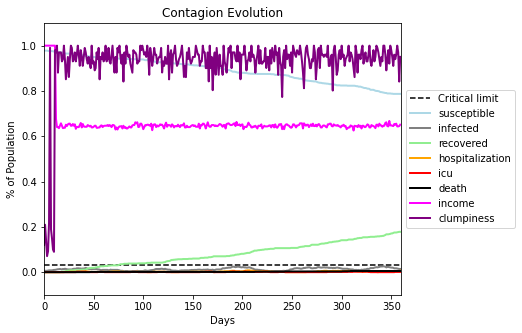

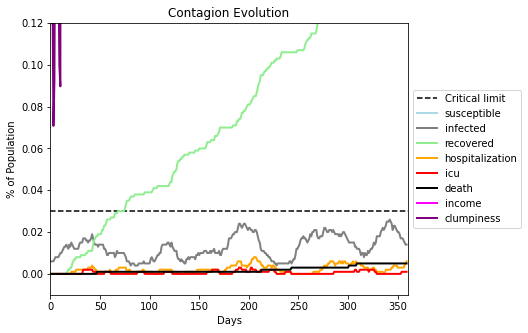

In [9]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)